## 毛色と柄による猫の画像分類

In [1]:
# 必要なライブラリのインストール
!pip3 install tweepy
!pip3 install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### 1. 画像データの収集

In [2]:
# 必要なライブラリのインポート
import os
import tweepy
import time 
import urllib.request, urllib.error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

from pathlib import Path

In [3]:
# 環境変数
# '*****'に適切なキーを入力して実行
CONSUMER_KEY        = '*****'
CONSUMER_SECRET     = '*****'
ACCESS_TOKEN_KEY    = '*****'
ACCESS_TOKEN_SECRET = '*****'

# 検索オプション
SEARCH_PAGES_NUMBER = 200 # 読み込むページ数
PER_PAGE_NUMBER = 100 # ページごとに返されるツイートの数

class imageDownloader(object):
    def __init__(self):
        """初期設定"""
        super(imageDownloader, self).__init__()
        self.set_api()

    def run(self):
        """実行
            1. twitterページを指定数取得
            2. ページ内のツイートのうち、キーワードがあるtweetのみ取得
            3. 画像URLを取得
            4. ダウンロード実行
        """
        self.max_id = None # ページを跨ぐ検索対象IDの初期化
        # counter = 0
        for page in range(SEARCH_PAGES_NUMBER):
            ret_url_list = self.search(TARGET, PER_PAGE_NUMBER)
            for url in ret_url_list:
                print('OK ' + url)
                self.download(url)
            time.sleep(0.1) # TimeOut防止

    def set_api(self):
        """apiの設定"""
        auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)
        self.api = tweepy.API(auth)

    def search(self, target, rpp):
        """twitterで検索実行"""
        # 検索結果
        ret_url_list = []

        try:
            # 検索実行
            if self.max_id:
                # q: クエリ文字列, rpp: ツイート数, max_id: より小さい（古い）IDを持つステータスのみを返す
                res_search = self.api.search_tweets(q=target, lang='ja', rpp=rpp, max_id=self.max_id)
            else:
                res_search = self.api.search_tweets(q=target, lang='ja', rpp=rpp)
            # 結果を保存
            for result in res_search:
                if 'media' not in result.entities: continue
                for media in result.entities['media']:
                    url = media['media_url_https']
                    if url not in ret_url_list:
                        ret_url_list.append(url)

            # 検索済みidの更新し、より古いツイートを検索させる
            self.max_id = result.id
            # 検索結果の返却
            return ret_url_list
        except Exception as e:
            self.error_catch(e)

    def download(self, url):
        """画像のダウンロード
        """
        url_orig = '%s:orig' % url
        path = IMG_DIR + url.split('/')[-1]
        try:
            response = urllib.request.urlopen(url=url_orig)
            with open(path, "wb") as f:
                f.write(response.read())
        except Exception as e:
            self.error_catch(e)

    def error_catch(self, error):
        """エラー処理
        """
        print("NG ", error)

def main():
    """メイン処理
    """
    try:
        downloader = imageDownloader()
        downloader.run()
    except KeyboardInterrupt:
        # Ctrl-Cで終了
        pass

##### 以下のコードを実行する前に、imagesディレクトリ下に”shironeko”,”kuroneko”,”kijitora”,”hachiware”,”chatora”,”sabineko”フォルダを作成する。

#### #白猫の画像収集

In [4]:
# 画像の保存先
IMG_DIR = 'images/shironeko/'

# 検索キーワード
TARGET = '#白猫'

if __name__ == '__main__':
    main()

Unexpected parameter: rpp
Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuXoRLaMAApSff.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FkVLl9oUYAAWjJe.jpg
OK https://pbs.twimg.com/media/FnuV7NraEAAfWBK.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntzIZVaEAIZ3hF.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619896182536548353/pu/img/F5iSaPmRD9AnkMzi.jpg
OK https://pbs.twimg.com/media/FnuUSuraIAMIIEx.jpg
OK https://pbs.twimg.com/media/FnkLdiDaYAMV0pe.jpg
OK https://pbs.twimg.com/media/FnrFnmtagAAhrVb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619973486281367552/pu/img/jce3NMPftRw1sAhi.jpg
OK https://pbs.twimg.com/media/FnuLSNUaUAAqhSr.jpg
OK https://pbs.twimg.com/media/FnuLPZ_acAA1rPk.jpg
OK https://pbs.twimg.com/media/FnuIzc8acAgnk_y.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuJ6Q0acAAKPp4.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619896182536548353/pu/img/F5iSaPmRD9AnkMzi.jpg
OK https://pbs.twimg.com/media/FnuHdK2aEAIWQLM.jpg
OK https://pbs.twimg.com/media/FnuHLbeaQAAZJhb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuFw3LakAM5Esc.jpg
OK https://pbs.twimg.com/media/FnuDj72acAAHseH.jpg
OK https://pbs.twimg.com/media/FnuDNhYaEAAVrk1.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnq3bKTaEAIPJZW.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619896182536548353/pu/img/F5iSaPmRD9AnkMzi.jpg
OK https://pbs.twimg.com/media/Fns3qYqaMAE1O0D.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620029285393375232/pu/img/QW9o2CFXc2H5N3bn.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FmAIt50aYAYr5rX.jpg
OK https://pbs.twimg.com/media/FnSX5H1aMAEc_bG.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619896182536548353/pu/img/F5iSaPmRD9AnkMzi.jpg
OK https://pbs.twimg.com/media/Fntpw7raMAEm-22.jpg
OK https://pbs.twimg.com/media/FntkdqjagAEj74-.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619896182536548353/pu/img/F5iSaPmRD9AnkMzi.jpg
OK https://pbs.twimg.com/media/Fnt7KGmaQAAzZ50.jpg
OK https://pbs.twimg.com/media/FnrFnmtagAAhrVb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fntpw7raMAEm-22.jpg
OK https://pbs.twimg.com/media/Fntdp1faQAEnSDh.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fntdp1faQAEnSDh.jpg
OK https://pbs.twimg.com/media/FnpOvTzakAUOCV9.jpg
OK https://pbs.twimg.com/media/FntzIZVaEAIZ3hF.jpg
OK https://pbs.twimg.com/media/Fntpw7raMAEm-22.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fntpw7raMAEm-22.jpg
OK https://pbs.twimg.com/media/Fntwtp5aMAIi83j.jpg
OK https://pbs.twimg.com/media/FnrFnmtagAAhrVb.jpg
OK https://pbs.twimg.com/media/Fnq3bKTaEAIPJZW.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnq3bKTaEAIPJZW.jpg
OK https://pbs.twimg.com/media/Fntpw7raMAEm-22.jpg
OK https://pbs.twimg.com/media/FntqbfsaUAAxhsl.jpg
OK https://pbs.twimg.com/media/FntqBYfaQAEcp39.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fntk91PaYAAWSBH.jpg
OK https://pbs.twimg.com/media/Fntp799aAAEJz6E.jpg
OK https://pbs.twimg.com/media/Fntpw7raMAEm-22.jpg
OK https://pbs.twimg.com/media/Fnsx-tlaQAA9nJY.jpg
OK https://pbs.twimg.com/media/Fntoy5AaMAECfsZ.jpg
OK https://pbs.twimg.com/media/FntmD5EaMAEACMH.jpg
OK https://pbs.twimg.com/media/FntleDGaUAA7b0D.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntkdqjagAEj74-.jpg
OK https://pbs.twimg.com/media/FntjcTLaEAAok4M.jpg
OK https://pbs.twimg.com/media/FnoQ8XbaQAA2KmE.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619960928468086784/pu/img/a8Su2-A-jE7QPgd0.jpg
OK https://pbs.twimg.com/media/FnnyllBaUAAXB2e.jpg
OK https://pbs.twimg.com/media/FntfglVaEAIryZ5.jpg
OK https://pbs.twimg.com/media/FntemfXaQAEFkxN.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fntdp1faQAEnSDh.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619896182536548353/pu/img/F5iSaPmRD9AnkMzi.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntZU6UakAAxdm8.jpg
OK https://pbs.twimg.com/media/FntY81zagAALScQ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619896182536548353/pu/img/F5iSaPmRD9AnkMzi.jpg
OK https://pbs.twimg.com/media/Fnq3bKTaEAIPJZW.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntT6VAaMAEImJ6.jpg
OK https://pbs.twimg.com/media/FntTpRMaEAA0yRo.jpg
OK https://pbs.twimg.com/media/FntTh0makAAhA1R.jpg
OK https://pbs.twimg.com/media/FntPUqcaIAYuCle.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/DHT6_QqVwAAxh__.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619973486281367552/pu/img/jce3NMPftRw1sAhi.jpg
OK https://pbs.twimg.com/media/Fnsx-tlaQAA9nJY.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619960928468086784/pu/img/a8Su2-A-jE7QPgd0.jpg
OK https://pbs.twimg.com/media/Fnq3bKTaEAIPJZW.jpg
OK https://pbs.twimg.com/media/FneqgfxaQAEJZMO.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneqgfxaQAEJZMO.jpg
OK https://pbs.twimg.com/media/FntA6BEaEAA-V5d.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619959406518738945/pu/img/0bPKD3abY2VKShvT.jpg
OK https://pbs.twimg.com/media/Fnr73czacAI8zKv.jpg
OK https://pbs.twimg.com/media/FnjT-OnaYAI9ptq.jpg
OK https://pbs.twimg.com/media/FnrFnmtagAAhrVb.jpg
OK https://pbs.twimg.com/media/FnUVht-akAAcJGT.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619896182536548353/pu/img/F5iSaPmRD9AnkMzi.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619896182536548353/pu/img/F5iSaPmRD9AnkMzi.jpg
OK https://pbs.twimg.com/media/Fns6sIHaEAA7qFX.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618420531094786049/pu/img/yvANEA_ztI-e2lgz.jpg
OK https://pbs.twimg.com/media/Fns5FoIaEAAsJEg.jpg
OK https://pbs.twimg.com/media/Fns3qYqaMAE1O0D.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsyiraagAE38cQ.jpg
OK https://pbs.twimg.com/media/Fnsx-tlaQAA9nJY.jpg
OK https://pbs.twimg.com/media/Fnss9VSaYAEq4b-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619896182536548353/pu/img/F5iSaPmRD9AnkMzi.jpg
OK https://pbs.twimg.com/media/FnrFnmtagAAhrVb.jpg
OK https://pbs.twimg.com/media/Fnq3bKTaEAIPJZW.jpg


Unexpected parameter: rpp
Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnss9VSaYAEq4b-.jpg
OK https://pbs.twimg.com/media/FnslADraAAEdW-1.jpg
OK https://pbs.twimg.com/media/FnskQDeaIAEVVJW.jpg
OK https://pbs.twimg.com/media/Fnsh4dNakAMx5Fn.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618420531094786049/pu/img/yvANEA_ztI-e2lgz.jpg
OK https://pbs.twimg.com/media/FnpOvTzakAUOCV9.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619896182536548353/pu/img/F5iSaPmRD9AnkMzi.jpg
OK https://pbs.twimg.com/media/FnscNlFaYAABTH3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619918142771458049/pu/img/BmryKgz284LeE8CX.jpg
OK https://pbs.twimg.com/media/FnsZXA8aEAAjqjl.jpg
OK https://pbs.twimg.com/media/FnrFnmtagAAhrVb.jpg
OK https://pbs.twimg.com/media/FnrVs5uaAAQqTXM.jpg
OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/media/FnsTGckaYAASJEm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsTGckaYAASJEm.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619896182536548353/pu/img/F5iSaPmRD9AnkMzi.jpg
OK https://pbs.twimg.com/media/FnrFnmtagAAhrVb.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619905131608424450/pu/img/uqxqlZS8jgMRMrO9.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619904562835427328/pu/img/2pA-zW5CI7d5S6jN.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619904419155288071/pu/img/lFNl8uQDHt0qo6R1.jpg
OK https://pbs.twimg.com/media/FnsNePUagAA5OSq.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619896182536548353/pu/img/F5iSaPmRD9AnkMzi.jpg
OK https://pbs.twimg.com/media/FnsHWoUaQAEek8g.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619896182536548353/pu/img/F5iSaPmRD9AnkMzi.jpg
OK https://pbs.twimg.com/media/Fnq3bKTaEAIPJZW.jpg
OK https://pbs.twimg.com/media/Fnr2lQXagAYfeNM.jpg
OK https://pbs.twimg.com/media/FnsCgkgaUAU6goy.jpg
OK https://pbs.twimg.com/media/Fnr73czacAI8zKv.jpg
OK https://pbs.twimg.com/media/Fnr9K9naMAIIGf1.jpg
OK https://pbs.twimg.com/media/FnrFnmtagAAhrVb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnr73czacAI8zKv.jpg
OK https://pbs.twimg.com/media/Fnr2lQXagAYfeNM.jpg
OK https://pbs.twimg.com/media/FnrFnmtagAAhrVb.jpg
OK https://pbs.twimg.com/media/FnrzcPaaEAElWJy.jpg
OK https://pbs.twimg.com/media/FnrzRNiaYAI4EaO.jpg
OK https://pbs.twimg.com/media/FnrzBBBaAAA9e6e.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnq3bKTaEAIPJZW.jpg
OK https://pbs.twimg.com/media/FnrFnmtagAAhrVb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoBKuMaEAE0g5Q.jpg
OK https://pbs.twimg.com/media/FnmVnd5aEAI-jNA.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrdZAdaAAEcRcw.jpg
OK https://pbs.twimg.com/media/FnrVs5uaAAQqTXM.jpg
OK https://pbs.twimg.com/media/FnrFnmtagAAhrVb.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619844609898860545/pu/img/_nFXPmQQCGfOjH25.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/media/FnrVs5uaAAQqTXM.jpg
OK https://pbs.twimg.com/media/FnrRhEGaYAIw2rP.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/media/FnpOvTzakAUOCV9.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1609610195956822017/pu/img/vsSvtpl0yOsrUpNo.jpg
OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/media/FnrFnmtagAAhrVb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/media/FnrG66taQAE0Oot.jpg
OK https://pbs.twimg.com/media/FnrFnmtagAAhrVb.jpg
OK https://pbs.twimg.com/media/Bx30R04IIAAmy8v.jpg
OK https://pbs.twimg.com/media/FnrCAxyaUAEvOFp.jpg
OK https://pbs.twimg.com/media/FnrAtg8aEAEThZE.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrAtg8aEAEThZE.jpg
OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/media/Fnq66a2aEAER-K0.jpg
OK https://pbs.twimg.com/media/Fnq5Bt2agAAsU4K.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnq5Bt2agAAsU4K.jpg
OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/media/Fnq3bKTaEAIPJZW.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/media/EIlyTTOU4AEov8I.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619793419995598849/pu/img/XDtIv-SJjRgiycOk.jpg
OK https://pbs.twimg.com/media/FnnMfpPaMAAL9pF.jpg
OK https://pbs.twimg.com/media/FnkP9E0agAEZ75z.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkP9E0agAEZ75z.jpg
OK https://pbs.twimg.com/media/FnmTqQyaQAQm2t7.jpg
OK https://pbs.twimg.com/media/FnnyllBaUAAXB2e.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnMfpPaMAAL9pF.jpg
OK https://pbs.twimg.com/media/FnpvoRmaMAArlCA.jpg
OK https://pbs.twimg.com/media/FnprM4CaQAAtpur.jpg
OK https://pbs.twimg.com/media/Fnpm-27aUAE8kHB.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnolaPgacAIdcSl.jpg
OK https://pbs.twimg.com/media/FnnNZtkaYAAxtHJ.jpg
OK https://pbs.twimg.com/media/FnokF2ZaEAQPiur.jpg
OK https://pbs.twimg.com/media/FnoXckxaUAEC880.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoD465akAQSzz_.jpg
OK https://pbs.twimg.com/media/FDWh9-PaUAA3lrZ.jpg
OK https://pbs.twimg.com/media/FnoQ8XbaQAA2KmE.jpg
OK https://pbs.twimg.com/media/FnpOvTzakAUOCV9.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fno3edZaIAI7HSW.jpg
OK https://pbs.twimg.com/media/FnpOvTzakAUOCV9.jpg
OK https://pbs.twimg.com/media/FnoQ8XbaQAA2KmE.jpg
OK https://pbs.twimg.com/media/FnmBsszaYAAIhlk.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmBsszaYAAIhlk.jpg
OK https://pbs.twimg.com/media/FnoQ8XbaQAA2KmE.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619664802229657600/pu/img/rypso5DViqwuGp30.jpg
OK https://pbs.twimg.com/media/Fno3edZaIAI7HSW.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoQ8XbaQAA2KmE.jpg
OK https://pbs.twimg.com/media/FhZIBdPagAAzvnN.jpg
OK https://pbs.twimg.com/media/FnkLdiDaYAMV0pe.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkLdiDaYAMV0pe.jpg
OK https://pbs.twimg.com/media/Fno3edZaIAI7HSW.jpg
OK https://pbs.twimg.com/media/FnncwROacAE8Khy.jpg
OK https://pbs.twimg.com/media/Fno2UtLaEAAgjO9.jpg
OK https://pbs.twimg.com/media/Fno2DK_agAI4CgL.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fno2DK_agAI4CgL.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619664802229657600/pu/img/rypso5DViqwuGp30.jpg
OK https://pbs.twimg.com/media/FnoQ8XbaQAA2KmE.jpg
OK https://pbs.twimg.com/media/FjhinyIaAAAXs5s.jpg
OK https://pbs.twimg.com/media/FnocktlaAAIM4SD.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnolaPgacAIdcSl.jpg
OK https://pbs.twimg.com/media/FnouBxPacAQy2Ue.jpg
OK https://pbs.twimg.com/media/FnoQ8XbaQAA2KmE.jpg
OK https://pbs.twimg.com/media/FnnyllBaUAAXB2e.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnolaPgacAIdcSl.jpg
OK https://pbs.twimg.com/media/FnoQ8XbaQAA2KmE.jpg
OK https://pbs.twimg.com/media/FnoBKuMaEAE0g5Q.jpg
OK https://pbs.twimg.com/media/FnnyllBaUAAXB2e.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnyllBaUAAXB2e.jpg
OK https://pbs.twimg.com/media/FnoXckxaUAEC880.jpg
OK https://pbs.twimg.com/media/FnokF2ZaEAQPiur.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnl_ZHsaIAE-ORz.jpg
OK https://pbs.twimg.com/media/FnoXckxaUAEC880.jpg
OK https://pbs.twimg.com/media/FnocktlaAAIM4SD.jpg
OK https://pbs.twimg.com/media/Fnoax8lacAEvp_O.jpg
OK https://pbs.twimg.com/media/FnoZmJAakAA-Usv.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoZmJAakAA-Usv.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619633588810711040/pu/img/UiazXDcVXbv6mceH.jpg
OK https://pbs.twimg.com/media/FnoXckxaUAEC880.jpg
OK https://pbs.twimg.com/media/FnoQ8XbaQAA2KmE.jpg
OK https://pbs.twimg.com/media/FnUVht-akAAcJGT.jpg
OK https://pbs.twimg.com/media/FnnJik9aQAICtmg.jpg
OK https://pbs.twimg.com/media/FnmTqQyaQAQm2t7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoTdMlacAE14_v.jpg
OK https://pbs.twimg.com/media/FnoQ8XbaQAA2KmE.jpg
OK https://pbs.twimg.com/media/FnoOpEAaUAEu-kb.jpg
OK https://pbs.twimg.com/media/FnncwROacAE8Khy.jpg
OK https://pbs.twimg.com/media/FnoRAaZacAMpn-E.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoOpEAaUAEu-kb.jpg
OK https://pbs.twimg.com/media/FnmVnd5aEAI-jNA.jpg
OK https://pbs.twimg.com/media/FnoBKuMaEAE0g5Q.jpg
OK https://pbs.twimg.com/media/FnoNTgAaYAAiYyS.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoKXRxaYAIVwya.jpg
OK https://pbs.twimg.com/media/FnoBKuMaEAE0g5Q.jpg
OK https://pbs.twimg.com/media/FnoHZbtaYAEmQ-b.jpg
OK https://pbs.twimg.com/media/FnmTqQyaQAQm2t7.jpg
OK https://pbs.twimg.com/media/FnoEjJ9acAAD5yM.jpg
OK https://pbs.twimg.com/media/FnoD465akAQSzz_.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoD465akAQSzz_.jpg
OK https://pbs.twimg.com/media/FnoDCn9aYAADps2.jpg
OK https://pbs.twimg.com/media/FnoBKuMaEAE0g5Q.jpg
OK https://pbs.twimg.com/media/FnYqbGFaMAARa99.jpg
OK https://pbs.twimg.com/media/Fnl_ZHsaIAE-ORz.jpg
OK https://pbs.twimg.com/media/FnnJik9aQAICtmg.jpg
OK https://pbs.twimg.com/media/Fnn6z4zaUAASFPB.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnn6z4zaUAASFPB.jpg
OK https://pbs.twimg.com/media/Fnn2elWagAMDA7q.jpg
OK https://pbs.twimg.com/media/Fnn18-YaYAAAhhO.jpg
OK https://pbs.twimg.com/media/Fnn0ngHacAAu9P7.jpg
OK https://pbs.twimg.com/media/FnnyllBaUAAXB2e.jpg
OK https://pbs.twimg.com/media/FMWoF-qagAM4gs4.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnyllBaUAAXB2e.jpg
OK https://pbs.twimg.com/media/FnnwZjBakAEGEYZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnnq45haYAAGfUn.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619582428884111360/pu/img/n70ZXIkYCu70Vm3p.jpg
OK https://pbs.twimg.com/media/FnnpkmgaEAAy2YL.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnczZKaQAAQYjo.jpg
OK https://pbs.twimg.com/media/Fnnl5-HaYAEfw4-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619571479137640449/pu/img/J-UsyVIjn7z7HU3Z.jpg
OK https://pbs.twimg.com/media/Fnnd2xQaIAMoStw.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnczZKaQAAQYjo.jpg
OK https://pbs.twimg.com/media/FnncwROacAE8Khy.jpg
OK https://pbs.twimg.com/media/Fnncq5RagAEcVvp.jpg
OK https://pbs.twimg.com/media/FnnJik9aQAICtmg.jpg
OK https://pbs.twimg.com/media/FnncG51aYAE-im0.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619565815296327683/pu/img/kJdmxRKKWErhBaIf.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619565580662751234/pu/img/LBqMlN8TJnv190FA.jpg
OK https://pbs.twimg.com/media/FnmTqQyaQAQm2t7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619560197940461568/pu/img/MSctLPFuQ0MiV7Zp.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619557683996102656/pu/img/5e_1zjpf2ZuIUX9b.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619557683996102656/pu/img/5e_1zjpf2ZuIUX9b.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619557543696539648/pu/img/msA0ifxnvFSwBmG6.jpg
OK https://pbs.twimg.com/media/FnnMfpPaMAAL9pF.jpg
OK https://pbs.twimg.com/media/FnnNZtkaYAAxtHJ.jpg
OK https://pbs.twimg.com/media/Fnm_ai8akAA9KOu.jpg
OK https://pbs.twimg.com/media/FnnPDjUaEAI5Pl7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnPDjUaEAI5Pl7.jpg
OK https://pbs.twimg.com/media/FnnNZtkaYAAxtHJ.jpg
OK https://pbs.twimg.com/media/FnnJik9aQAICtmg.jpg
OK https://pbs.twimg.com/media/FnnNLl_aYAAUO0a.jpg
OK https://pbs.twimg.com/media/FnnMfpPaMAAL9pF.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnMfpPaMAAL9pF.jpg
OK https://pbs.twimg.com/media/FnnMWF5aQAAfbLC.jpg
OK https://pbs.twimg.com/media/FnmBsszaYAAIhlk.jpg
OK https://pbs.twimg.com/media/Fnm_ai8akAA9KOu.jpg
OK https://pbs.twimg.com/media/FnnJik9aQAICtmg.jpg


Unexpected parameter: rpp
Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkLdiDaYAMV0pe.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619536528056938496/pu/img/FbOY_d84-ZIG2acS.jpg
OK https://pbs.twimg.com/media/Fnm_ai8akAA9KOu.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmTqQyaQAQm2t7.jpg
OK https://pbs.twimg.com/media/Fnm5ID6aIAAU0Di.jpg
OK https://pbs.twimg.com/media/FnjT-OnaYAI9ptq.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkLdiDaYAMV0pe.jpg
OK https://pbs.twimg.com/media/FnmxSjEaMAESboO.jpg
OK https://pbs.twimg.com/media/FnmwrdAaIAEHLND.jpg
OK https://pbs.twimg.com/media/FnmshR9acAE6WtZ.jpg
OK https://pbs.twimg.com/media/FnkP9E0agAEZ75z.jpg
OK https://pbs.twimg.com/media/Fnl_ZHsaIAE-ORz.jpg
OK https://pbs.twimg.com/media/FnUVNisaUAEt_3-.jpg
OK https://pbs.twimg.com/media/FjYZ_khWYAAXXC6.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmBsszaYAAIhlk.jpg
OK https://pbs.twimg.com/media/FnmTqQyaQAQm2t7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmTqQyaQAQm2t7.jpg
OK https://pbs.twimg.com/media/FnkLdiDaYAMV0pe.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmaAKkagAIkAAb.jpg
OK https://pbs.twimg.com/media/FnmBsszaYAAIhlk.jpg
OK https://pbs.twimg.com/media/Fnl_ZHsaIAE-ORz.jpg
OK https://pbs.twimg.com/media/FnmVnd5aEAI-jNA.jpg
OK https://pbs.twimg.com/media/FnkP9E0agAEZ75z.jpg
OK https://pbs.twimg.com/media/FnmTqQyaQAQm2t7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmTqQyaQAQm2t7.jpg
OK https://pbs.twimg.com/media/FnkP9E0agAEZ75z.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneqgfxaQAEJZMO.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616010211395010560/pu/img/GdBTalLz7x6mmQem.jpg
OK https://pbs.twimg.com/media/FnmJqkbaIAAKy0y.jpg
OK https://pbs.twimg.com/media/Fnhymr6aYAIrYUH.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneqgfxaQAEJZMO.jpg
OK https://pbs.twimg.com/media/FnmBsszaYAAIhlk.jpg
OK https://pbs.twimg.com/media/Fnl_ZHsaIAE-ORz.jpg
OK https://pbs.twimg.com/media/CpE76h8VYAAQoZe.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkLdiDaYAMV0pe.jpg
OK https://pbs.twimg.com/media/FnkP9E0agAEZ75z.jpg
OK https://pbs.twimg.com/media/Bx30R04IIAAmy8v.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Bx30R04IIAAmy8v.jpg
OK https://pbs.twimg.com/media/Fnlr9_IaUAA3we-.jpg
OK https://pbs.twimg.com/media/FnkP9E0agAEZ75z.jpg


Unexpected parameter: rpp
Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkLdiDaYAMV0pe.jpg
OK https://pbs.twimg.com/media/Fnk475IaAAIBB6m.jpg
OK https://pbs.twimg.com/media/FnkP9E0agAEZ75z.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkP9E0agAEZ75z.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkdkOiaYAARsRC.jpg
OK https://pbs.twimg.com/media/FnkLdiDaYAMV0pe.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fe4HgLVUAAQ9pFV.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619086786084626433/pu/img/QR9QUdc-eTneGvwf.jpg
OK https://pbs.twimg.com/media/FnjT-OnaYAI9ptq.jpg
OK https://pbs.twimg.com/media/FnkP9E0agAEZ75z.jpg
OK https://pbs.twimg.com/media/FniwlQKakAAVTDy.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkP9E0agAEZ75z.jpg
OK https://pbs.twimg.com/media/FnkLdiDaYAMV0pe.jpg
OK https://pbs.twimg.com/media/Fe4HgLVUAAQ9pFV.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619341711419019266/pu/img/PCu0SDOzX-2Dnc4o.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkLdiDaYAMV0pe.jpg
OK https://pbs.twimg.com/media/Fnj7X4iaUAEtNUr.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjDrOyaUAYWCV5.jpg
OK https://pbs.twimg.com/media/FnjioD7aUAA_1sd.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619325604440182787/pu/img/XP7d9TYPchKyw8dF.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnj7X4iaUAEtNUr.jpg
OK https://pbs.twimg.com/media/ErYICjqU0AEbOwl.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/ErYICjqU0AEbOwl.jpg
OK https://pbs.twimg.com/media/Fnj45o8aQAExxEB.jpg
OK https://pbs.twimg.com/media/FneqgfxaQAEJZMO.jpg
OK https://pbs.twimg.com/media/FngRiJMaYAAOXIm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FjhinyIaAAAXs5s.jpg
OK https://pbs.twimg.com/media/FnjwD62aYAAkAQU.jpg
OK https://pbs.twimg.com/media/FnjvMOTaQAIejpq.jpg
OK https://pbs.twimg.com/media/FkETHvTVUAI-Ol3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjdsZ8aIAEoOC9.jpg
OK https://pbs.twimg.com/media/Fnjr8O3aIAEqx9S.jpg
OK https://pbs.twimg.com/media/FnjpLfCaMAIYkmQ.jpg
OK https://pbs.twimg.com/media/Fnjo06FagAES7Yk.jpg
OK https://pbs.twimg.com/media/FnjT-OnaYAI9ptq.jpg
OK https://pbs.twimg.com/media/Fnh659WacAI6zY2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjdsZ8aIAEoOC9.jpg
OK https://pbs.twimg.com/media/FnjfTN6aUAAoM1j.jpg
OK https://pbs.twimg.com/media/DU65v8nU8AABPBo.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FjhinyIaAAAXs5s.jpg
OK https://pbs.twimg.com/media/FnjdsZ8aIAEoOC9.jpg
OK https://pbs.twimg.com/media/FnjT-OnaYAI9ptq.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjT-OnaYAI9ptq.jpg
OK https://pbs.twimg.com/media/FniW3osagAAf2cZ.jpg
OK https://pbs.twimg.com/media/FneXKHyaYAEqU3i.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneXKHyaYAEqU3i.jpg
OK https://pbs.twimg.com/media/FniW3osagAAf2cZ.jpg
OK https://pbs.twimg.com/media/ErYICjqU0AEbOwl.jpg
OK https://pbs.twimg.com/media/FnjLH02aYAAdAL7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjHXejakAALR9j.jpg
OK https://pbs.twimg.com/media/FnjEV8saYAAFHue.jpg
OK https://pbs.twimg.com/media/FnjDrOyaUAYWCV5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneO59xaMAAPjjy.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619200238031622144/pu/img/eCxWFe0_7k9W_D-8.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FngRiJMaYAAOXIm.jpg
OK https://pbs.twimg.com/media/Fni7oLPaIAACECR.jpg
OK https://pbs.twimg.com/media/Fngbg7KagAA6m2H.jpg
OK https://pbs.twimg.com/media/Fni6ONcacAAZp7p.jpg
OK https://pbs.twimg.com/media/FniOBhjacAE4Aic.jpg
OK https://pbs.twimg.com/media/Fni2-m-aUAEJPeY.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fni2O4ZaAAEtCNE.jpg
OK https://pbs.twimg.com/media/Fni13llaMAQjh8m.jpg
OK https://pbs.twimg.com/media/Fni1uZxaUAArXYx.jpg
OK https://pbs.twimg.com/media/FniwlQKakAAVTDy.jpg
OK https://pbs.twimg.com/media/FngRiJMaYAAOXIm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneO59xaMAAPjjy.jpg
OK https://pbs.twimg.com/media/D6q2SNUUwAAVDIP.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnikUuYaEAALvlK.jpg
OK https://pbs.twimg.com/media/FniivooakAAk-qc.jpg
OK https://pbs.twimg.com/media/FniOBhjacAE4Aic.jpg
OK https://pbs.twimg.com/media/Fnhymr6aYAIrYUH.jpg
OK https://pbs.twimg.com/media/FncU2GdakAAISFx.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FngRiJMaYAAOXIm.jpg
OK https://pbs.twimg.com/media/FneXKHyaYAEqU3i.jpg
OK https://pbs.twimg.com/media/FniaN0IaMAMNc98.jpg
OK https://pbs.twimg.com/media/Fnh3NWtaIAAKb_f.jpg
OK https://pbs.twimg.com/media/FniW3osagAAf2cZ.jpg
OK https://pbs.twimg.com/media/FniDB0VaIAETyel.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FniU0zwakAAh2Xc.jpg
OK https://pbs.twimg.com/media/Fng6KqxaMAATuzN.jpg
OK https://pbs.twimg.com/media/Fnh3NWtaIAAKb_f.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FniQDagaQAA6kG8.jpg
OK https://pbs.twimg.com/media/FniPJSXacAAwYHi.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619200238031622144/pu/img/eCxWFe0_7k9W_D-8.jpg
OK https://pbs.twimg.com/media/FniOBhjacAE4Aic.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619198300611293185/pu/img/GnrkrHwPyrBiH5Wy.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FMWoF-qagAM4gs4.jpg
OK https://pbs.twimg.com/media/Fnhymr6aYAIrYUH.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619175079027544064/pu/img/h05qq5pVgOU2zTa-.jpg
OK https://pbs.twimg.com/media/FniDICTaYAEnCxR.jpg
OK https://pbs.twimg.com/media/FniDB0VaIAETyel.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnh659WacAI6zY2.jpg
OK https://pbs.twimg.com/media/FnhONZyaAAAqiVe.jpg
OK https://pbs.twimg.com/media/FngRiJMaYAAOXIm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnh3NWtaIAAKb_f.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619175079027544064/pu/img/h05qq5pVgOU2zTa-.jpg
OK https://pbs.twimg.com/media/Fnhymr6aYAIrYUH.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnhymr6aYAIrYUH.jpg
OK https://pbs.twimg.com/media/FngRiJMaYAAOXIm.jpg
OK https://pbs.twimg.com/media/Fnht2GFaEAAAOx3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnhkM6DaMAIWA9U.jpg
OK https://pbs.twimg.com/media/Fnhf8HsacAEHiJ7.jpg
OK https://pbs.twimg.com/media/Fng6KqxaMAATuzN.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnhUH3xaMAEbGp2.jpg
OK https://pbs.twimg.com/media/FngRiJMaYAAOXIm.jpg
OK https://pbs.twimg.com/media/FnhYd2haMAYOxq3.jpg
OK https://pbs.twimg.com/media/FnhYMgxaEAEA4oM.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnhUH3xaMAEbGp2.jpg
OK https://pbs.twimg.com/media/FnhSG0eaEAA8qnZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnhONZyaAAAqiVe.jpg
OK https://pbs.twimg.com/media/FlgVB_4acAAtzdI.jpg
OK https://pbs.twimg.com/media/Fng6KqxaMAATuzN.jpg
OK https://pbs.twimg.com/media/FnhIY-HaEAMlFE9.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FngRiJMaYAAOXIm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fng9bs4aUAElAQO.jpg
OK https://pbs.twimg.com/media/Fng6KqxaMAATuzN.jpg
OK https://pbs.twimg.com/media/FngRiJMaYAAOXIm.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619086786084626433/pu/img/QR9QUdc-eTneGvwf.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FlmlZd6aYAAehx8.png
OK https://pbs.twimg.com/media/FneZQKwaQAA-vC6.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619086786084626433/pu/img/QR9QUdc-eTneGvwf.jpg
OK https://pbs.twimg.com/media/FZrexEKVQAAWU4M.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FngRiJMaYAAOXIm.jpg
OK https://pbs.twimg.com/media/FngeZmLaUAAysVb.jpg
OK https://pbs.twimg.com/media/Fngbg7KagAA6m2H.jpg
OK https://pbs.twimg.com/media/FjLumHbacAAQnT5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Bx30R04IIAAmy8v.jpg
OK https://pbs.twimg.com/media/FngRiJMaYAAOXIm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnfDm97akAIGF8H.jpg
OK https://pbs.twimg.com/media/FneHCx4aIAAjb9W.jpg
OK https://pbs.twimg.com/media/FneL_l4aMAAld5b.jpg
OK https://pbs.twimg.com/media/FjhinyIaAAAXs5s.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FjhinyIaAAAXs5s.jpg
OK https://pbs.twimg.com/media/FnfgikVaQAEM6wB.jpg
OK https://pbs.twimg.com/media/FnfeSBeXwAANGoe.jpg
OK https://pbs.twimg.com/media/FnfbCmhaIAQrL0I.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnfDm97akAIGF8H.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnfPjSGaQAAc7jZ.jpg
OK https://pbs.twimg.com/media/FneWf40aYAYiG2D.jpg
OK https://pbs.twimg.com/media/Fnd_CDkaAAA4cQV.jpg
OK https://pbs.twimg.com/media/FnfDm97akAIGF8H.jpg
OK https://pbs.twimg.com/media/FnfMfcZaAAA11Xs.jpg
OK https://pbs.twimg.com/media/FneqgfxaQAEJZMO.jpg
OK https://pbs.twimg.com/media/FYljlplUsAA6X3u.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FYljlplUsAA6X3u.jpg
OK https://pbs.twimg.com/media/FnfGRYaaMAIz4uM.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnfDm97akAIGF8H.jpg
OK https://pbs.twimg.com/media/FMWoF-qagAM4gs4.jpg
OK https://pbs.twimg.com/media/Fne_KxDaYAEoWsf.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneZQKwaQAA-vC6.jpg
OK https://pbs.twimg.com/media/Fne-cP-aIAA3Fmn.jpg
OK https://pbs.twimg.com/media/FneWmUkaAAIxvsG.jpg
OK https://pbs.twimg.com/media/FneL_l4aMAAld5b.jpg
OK https://pbs.twimg.com/media/FnbQ-9caEAAA69M.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fne2Qr1agAEygYN.jpg
OK https://pbs.twimg.com/media/Fne2Hh3aUAEs4FX.jpg
OK https://pbs.twimg.com/media/Fne12G8aMAA5XRY.jpg
OK https://pbs.twimg.com/media/Fm7DPlMaEAATlLE.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616644078040649728/pu/img/GEw_o7Lhdyy4BnCm.jpg
OK https://pbs.twimg.com/media/FneZQKwaQAA-vC6.jpg
OK https://pbs.twimg.com/media/FnezXr7aIAI4sRv.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618959629467406337/pu/img/BM1iSYKvM6OIsqes.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneL_l4aMAAld5b.jpg
OK https://pbs.twimg.com/media/FneyOX9aUAAfleZ.jpg
OK https://pbs.twimg.com/media/FneZQKwaQAA-vC6.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneWmUkaAAIxvsG.jpg
OK https://pbs.twimg.com/media/FneqgfxaQAEJZMO.jpg
OK https://pbs.twimg.com/media/FneqFfQagAEuHC7.jpg
OK https://pbs.twimg.com/media/FneqB90acAAuktN.jpg
OK https://pbs.twimg.com/media/Fnd_CDkaAAA4cQV.jpg
OK https://pbs.twimg.com/media/FneXKHyaYAEqU3i.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneoE8oagAEGRcP.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618945234850963457/pu/img/0jp63uDhAzgveqY0.jpg
OK https://pbs.twimg.com/amplify_video_thumb/1618942561456107521/img/GoSAx6wN8bcXrXX2.jpg
OK https://pbs.twimg.com/media/Fnej-guaYAEHtgn.jpg
OK https://pbs.twimg.com/media/FneZQKwaQAA-vC6.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneQXIraMAACytR.jpg
OK https://pbs.twimg.com/media/FnebYY5aEAEK7UH.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FncU2GdakAAISFx.jpg
OK https://pbs.twimg.com/media/FneZQKwaQAA-vC6.jpg
OK https://pbs.twimg.com/media/FneYRTSacAM9LdQ.jpg
OK https://pbs.twimg.com/media/FneQXIraMAACytR.jpg
OK https://pbs.twimg.com/media/FneL_l4aMAAld5b.jpg
OK https://pbs.twimg.com/media/FneXKHyaYAEqU3i.jpg
OK https://pbs.twimg.com/media/FneWmUkaAAIxvsG.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneWmUkaAAIxvsG.jpg
OK https://pbs.twimg.com/media/FneWf40aYAYiG2D.jpg
OK https://pbs.twimg.com/media/FneTlp9aMAII_l1.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneQXIraMAACytR.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618752445697654784/pu/img/SeY-oJ1m9bR6vA-G.jpg
OK https://pbs.twimg.com/media/FneQXIraMAACytR.jpg
OK https://pbs.twimg.com/media/FnePrLzaYAAF5md.jpg
OK https://pbs.twimg.com/media/FnbQ-9caEAAA69M.jpg
OK https://pbs.twimg.com/media/FneO59xaMAAPjjy.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneMceRaAAAXdTN.jpg
OK https://pbs.twimg.com/media/FneM_LdakAImKr7.jpg
OK https://pbs.twimg.com/media/FneL_l4aMAAld5b.jpg
OK https://pbs.twimg.com/media/FneHCx4aIAAjb9W.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneHCx4aIAAjb9W.jpg
OK https://pbs.twimg.com/media/Fnd_CDkaAAA4cQV.jpg
OK https://pbs.twimg.com/media/FneFDoCaAAAl1R3.jpg
OK https://pbs.twimg.com/media/FneAUS5aMAAgPF3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneAUS5aMAAgPF3.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618420531094786049/pu/img/yvANEA_ztI-e2lgz.jpg
OK https://pbs.twimg.com/media/FnCoMO7aYAAp85e.jpg
OK https://pbs.twimg.com/media/FneAlt8agAA7K3Z.jpg
OK https://pbs.twimg.com/media/Fnd_CDkaAAA4cQV.jpg
OK https://pbs.twimg.com/media/Fnd73SvaAAA6JXa.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnd73SvaAAA6JXa.jpg
OK https://pbs.twimg.com/media/Fnd6ORzaEAAxJ8t.jpg
OK https://pbs.twimg.com/media/Fnd3zaMaQAACpSy.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnd2lxcaEAAav7M.jpg
OK https://pbs.twimg.com/media/Fnd1mOJaYAAHBni.jpg
OK https://pbs.twimg.com/media/Fnd2CU_aEAAR3SS.jpg
OK https://pbs.twimg.com/media/FnbX9K2aQAABaRT.jpg
OK https://pbs.twimg.com/media/FndOTpuaIAAw8jr.jpg
OK https://pbs.twimg.com/media/FndxvwpaMAAZvME.jpg
OK https://pbs.twimg.com/media/FndxadSaEAIBIlR.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FndxadSaEAIBIlR.jpg
OK https://pbs.twimg.com/media/FndwQ7oaMAEe9UX.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618877769211080704/pu/img/x1V1FjSQwAcenqCe.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fndl1LgaIAANRzi.jpg
OK https://pbs.twimg.com/media/FncmVceaYAEdyJ6.jpg
OK https://pbs.twimg.com/media/FndhBbrakAE-LxF.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnddG-kaQAAikCZ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618567244342263810/pu/img/ZFBIp4OI1PXYEgLa.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618567244342263810/pu/img/ZFBIp4OI1PXYEgLa.jpg
OK https://pbs.twimg.com/media/FndT7h2aUAEZ_MX.png
OK https://pbs.twimg.com/media/FndTlHEaMAA_dTJ.jpg
OK https://pbs.twimg.com/media/FndRxcFaEAEOkfv.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FndOTpuaIAAw8jr.jpg
OK https://pbs.twimg.com/media/FndN5KkaIAEvsZj.png
OK https://pbs.twimg.com/media/FnbX9K2aQAABaRT.jpg
OK https://pbs.twimg.com/media/FndKAasaQAEJtrI.jpg
OK https://pbs.twimg.com/media/FndJW5_aUAAgTlL.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FndJW5_aUAAgTlL.jpg
OK https://pbs.twimg.com/media/FncU2GdakAAISFx.jpg
OK https://pbs.twimg.com/media/FndHqdvaUAID_NH.jpg
OK https://pbs.twimg.com/media/FndGGCsacAAXwpu.jpg
OK https://pbs.twimg.com/media/FnSFswKaAAIlIY2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnb7i9_aEAAybOb.jpg
OK https://pbs.twimg.com/media/Fnc7XhBaUAAAEFj.jpg
OK https://pbs.twimg.com/media/FncdxvQakAEtb5Y.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FncU2GdakAAISFx.jpg
OK https://pbs.twimg.com/media/FncmVceaYAEdyJ6.jpg
OK https://pbs.twimg.com/media/Fncl3ljakAExifm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnbiecfaIAEzUdZ.jpg
OK https://pbs.twimg.com/media/FncdxvQakAEtb5Y.jpg
OK https://pbs.twimg.com/media/FnEPrB4acAAmtu4.jpg
OK https://pbs.twimg.com/media/FncU2GdakAAISFx.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnSFswKaAAIlIY2.jpg
OK https://pbs.twimg.com/media/FMWoF-qagAM4gs4.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FncEf3dXwAEvgo3.jpg
OK https://pbs.twimg.com/media/Fnb9TNIakAA7Tjd.jpg
OK https://pbs.twimg.com/media/FncCHZDaUAAfdL7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnb7xRJacAAM44L.jpg
OK https://pbs.twimg.com/media/Fnb7i9_aEAAybOb.jpg
OK https://pbs.twimg.com/media/Fnb6zZsaYAEv_ub.jpg
OK https://pbs.twimg.com/media/Fnb3ApKaAAAjVlB.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnb3ApKaAAAjVlB.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618752445697654784/pu/img/SeY-oJ1m9bR6vA-G.jpg
OK https://pbs.twimg.com/media/Fnb0FG3aEAA7MrD.jpg
OK https://pbs.twimg.com/media/FnbQ-9caEAAA69M.jpg
OK https://pbs.twimg.com/media/FnbyX8KakAAFD0T.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnbyX8KakAAFD0T.jpg
OK https://pbs.twimg.com/media/FnQ79zFaUAEpsC-.jpg
OK https://pbs.twimg.com/media/FnbiecfaIAEzUdZ.jpg
OK https://pbs.twimg.com/media/FnbX9K2aQAABaRT.jpg
OK https://pbs.twimg.com/media/Fnbt8OBaUAQLrfr.jpg
OK https://pbs.twimg.com/media/FnbSzpPaQAE1YoV.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnbrAnzaAAAKXaM.jpg
OK https://pbs.twimg.com/media/FnbQ-9caEAAA69M.jpg
OK https://pbs.twimg.com/media/FnbjBQGaUAERFl3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnbiecfaIAEzUdZ.jpg
OK https://pbs.twimg.com/media/FnbZqASagAM5Djv.jpg
OK https://pbs.twimg.com/media/FnbX9K2aQAABaRT.jpg
OK https://pbs.twimg.com/media/FnbUWFtaEAEttj9.jpg
OK https://pbs.twimg.com/media/FnbSzpPaQAE1YoV.jpg
OK https://pbs.twimg.com/media/FnbQ-9caEAAA69M.jpg


Unexpected parameter: rpp
Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Bx30R04IIAAmy8v.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618644154652983296/pu/img/27EFTS7oiMpgIi8q.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FjhinyIaAAAXs5s.jpg
OK https://pbs.twimg.com/media/FnUIh6daMAE5sLc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnUVht-akAAcJGT.jpg
OK https://pbs.twimg.com/media/FnUVht-akAAcJGT.jpg
OK https://pbs.twimg.com/media/FnZ_6rFaYAEaNjO.jpg
OK https://pbs.twimg.com/media/FnZ8F5YacAEjsUe.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnZ5sT3aYAEpUu7.jpg
OK https://pbs.twimg.com/media/FnZ5clyaAAI7OVN.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnZ1XNDaYAEUTrf.jpg
OK https://pbs.twimg.com/media/FnZ0LJ0aYAEuxso.jpg
OK https://pbs.twimg.com/media/FjhinyIaAAAXs5s.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618420531094786049/pu/img/yvANEA_ztI-e2lgz.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618420531094786049/pu/img/yvANEA_ztI-e2lgz.jpg
OK https://pbs.twimg.com/media/FnW5X2AagAEXLq6.jpg
OK https://pbs.twimg.com/media/FnZoH12aUAAhisE.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618548337317408769/pu/img/E57UlJAejj1wgB8f.jpg
OK https://pbs.twimg.com/media/FnUwXRrX0AE_QYP.jpg
OK https://pbs.twimg.com/media/FnWRxaeaMAAqmpy.jpg
OK https://pbs.twimg.com/media/FnZgFs_aAAA0dIC.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnZgFs_aAAA0dIC.jpg
OK https://pbs.twimg.com/media/FnZezhMacAAiJpU.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618419531021709312/pu/img/9K5bvr41hz_NZ3C8.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618420531094786049/pu/img/yvANEA_ztI-e2lgz.jpg
OK https://pbs.twimg.com/media/FnZdtM9aEAEfyj9.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618567244342263810/pu/img/ZFBIp4OI1PXYEgLa.jpg
OK https://pbs.twimg.com/media/FnZaqbKacAEH0oc.jpg
OK https://pbs.twimg.com/media/FnUdO8LaAAAGCzj.jpg
OK https://pbs.twimg.com/media/FnJzQQ7aEAE0aa5.jpg
OK https://pbs.twimg.com/media/FnFJyS0aAAAvllM.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FjhinyIaAAAXs5s.jpg
OK https://pbs.twimg.com/media/FnZXCMxaAAAJnva.jpg
OK https://pbs.twimg.com/media/Fm5rXLfagAA_YFY.jpg
OK https://pbs.twimg.com/media/FnUwXRrX0AE_QYP.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618548337317408769/pu/img/E57UlJAejj1wgB8f.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnUwXRrX0AE_QYP.jpg
OK https://pbs.twimg.com/media/FnZOXmcaUAAwHAm.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618567244342263810/pu/img/ZFBIp4OI1PXYEgLa.jpg
OK https://pbs.twimg.com/media/FnZN9J2aYAI1e4F.jpg


Unexpected parameter: rpp
Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618548337317408769/pu/img/E57UlJAejj1wgB8f.jpg
OK https://pbs.twimg.com/media/FnTtgqiacAEwk0f.jpg
OK https://pbs.twimg.com/media/FnZDafiacAEEfYA.jpg
OK https://pbs.twimg.com/media/FnZCP0zaMAAmdEI.jpg
OK https://pbs.twimg.com/media/FnZBQSWaEAY2qIU.jpg
OK https://pbs.twimg.com/media/FnYGXo4acAAXyJo.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618550914616553474/pu/img/ej2LjT7SwcPda-s3.jpg
OK https://pbs.twimg.com/media/FnY_VWjaAAAtORA.jpg
OK https://pbs.twimg.com/media/FnY-9AvakAA5do5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618548337317408769/pu/img/E57UlJAejj1wgB8f.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618545788656979968/pu/img/OBTlo-ExnIaK_0Sg.jpg
OK https://pbs.twimg.com/media/FnYqbGFaMAARa99.jpg
OK https://pbs.twimg.com/media/FnXd9QjaUAEtXi1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618163905146261505/pu/img/lznhwo8B_3Gmg8C_.jpg
OK https://pbs.twimg.com/media/FnY45g6aMAMH7du.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnY45g6aMAMH7du.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618540191177932800/pu/img/MHxukU0UIP147HeU.jpg
OK https://pbs.twimg.com/media/FnW5X2AagAEXLq6.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnQ8rhWaUAEv1PL.jpg
OK https://pbs.twimg.com/media/FnYuXg-acAIrPqI.jpg
OK https://pbs.twimg.com/media/FnYsPe6agAYYZOm.jpg
OK https://pbs.twimg.com/media/FnYqbGFaMAARa99.jpg
OK https://pbs.twimg.com/media/FnXd9QjaUAEtXi1.jpg


Unexpected parameter: rpp
Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnXd9QjaUAEtXi1.jpg
OK https://pbs.twimg.com/media/FnXVuE9aEAAHrle.jpg
OK https://pbs.twimg.com/media/FnYc_FtagAAy2mf.png


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnYL0J6aAAEQ5gw.jpg
OK https://pbs.twimg.com/media/FnXd9QjaUAEtXi1.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnYL0J6aAAEQ5gw.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FMWoF-qagAM4gs4.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617089523552485377/pu/img/rN9KnEQ7KU8XlRR_.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1352879343026860032/pu/img/F-oj52ZmG6FoNmTH.jpg
OK https://pbs.twimg.com/media/FnYGXo4acAAXyJo.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnXd9QjaUAEtXi1.jpg
OK https://pbs.twimg.com/media/FnG5IxuaUAI8Kl_.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnG5IxuaUAI8Kl_.jpg
OK https://pbs.twimg.com/media/FnTHbbYaUAIeWQw.jpg
OK https://pbs.twimg.com/media/FnW7pEPaUAELbST.jpg
OK https://pbs.twimg.com/media/FnS60RbaEA4tch5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnS60RbaEA4tch5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618462481474805762/pu/img/9awwGs-kOyztz8cc.jpg
OK https://pbs.twimg.com/media/FnMywHraUAATeEH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618420531094786049/pu/img/yvANEA_ztI-e2lgz.jpg


Unexpected parameter: rpp


NG  429 Too Many Requests
88 - Rate limit exceeded


TypeError: 'NoneType' object is not iterable

#### #黒猫の画像収集

In [6]:
# 画像の保存先
IMG_DIR = 'images/kuroneko/'

# 検索キーワード
TARGET = '#黒猫'

if __name__ == '__main__':
    main()

Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnumAMbaIAgWo1c.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620038574375833600/pu/img/_7MDM-nvJtqcEwY5.jpg
OK https://pbs.twimg.com/media/FnulFcAaQAUe-Ho.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620004114158735360/pu/img/tJO2rg3FhjNND0mP.jpg
OK https://pbs.twimg.com/media/BanjYBuCAAApxVn.jpg
OK https://pbs.twimg.com/media/FnuVcjIaIAM9jgP.jpg
OK https://pbs.twimg.com/media/FnuS1jXacAAQofv.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuS1jXacAAQofv.jpg
OK https://pbs.twimg.com/media/FnuetNIaQAAyJ4o.jpg
OK https://pbs.twimg.com/media/FK-SPJAVUAAVdXT.jpg
OK https://pbs.twimg.com/media/FnulgNCagAIj7C4.jpg
OK https://pbs.twimg.com/media/FnuBC91acAA7MIC.jpg
OK https://pbs.twimg.com/media/FnhbzDCaMAEuP8p.jpg
OK https://pbs.twimg.com/media/FnulFcAaQAUe-Ho.jpg
OK https://pbs.twimg.com/media/FnugeXqacAAgEtE.jpg
OK https://pbs.twimg.com/amplify_video_thumb/1620065983426887682/img/WwyzuSzgBX1UEJGp.jpg
OK https://pbs.twimg.com/media/BanjYBuCAAApxVn.jpg
OK https://pbs.twimg.com/media/FnujoQPaUAEmmVf.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/BanjYBuCAAApxVn.jpg
OK https://pbs.twimg.com/media/FnuiXh_agAEUCjy.jpg
OK https://pbs.twimg.com/amplify_video_thumb/1620065983426887682/img/WwyzuSzgBX1UEJGp.jpg
OK https://pbs.twimg.com/media/FnugeXqacAAgEtE.jpg
OK https://pbs.twimg.com/media/FnufwUnaYAAeU_V.jpg
OK https://pbs.twimg.com/media/FnrcGIAaEAAMvuN.jpg
OK https://pbs.twimg.com/media/FnlqE1DaUAA3r_5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnlqE1DaUAA3r_5.jpg
OK https://pbs.twimg.com/media/Fnq1yyFacAAC4Ts.jpg
OK https://pbs.twimg.com/media/FnufTwAaAAMT_jv.jpg
OK https://pbs.twimg.com/media/FnuetNIaQAAyJ4o.jpg
OK https://pbs.twimg.com/media/Fnues6CaIAAToPX.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619952823181135875/pu/img/b40KVnR5_GEGeOsA.jpg
OK https://pbs.twimg.com/media/FncWkCRaQAIcazh.jpg
OK https://pbs.twimg.com/media/FnuaXGtaMAMiR-_.jpg
OK https://pbs.twimg.com/media/FnKGSSRaUAEEhag.jpg
OK https://pbs.twimg.com/media/FnuaxyHaIAA7qrq.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619952823181135875/pu/img/b40KVnR5_GEGeOsA.jpg
OK https://pbs.twimg.com/media/Fnub4E4aQAklEkF.jpg
OK https://pbs.twimg.com/media/Fnt8H80aAAQubYz.jpg
OK https://pbs.twimg.com/media/Fnubh5yaEAMO9gp.jpg
OK https://pbs.twimg.com/media/FnuaxyHaIAA7qrq.jpg
OK https://pbs.twimg.com/media/FnuaxnOaUAUJcYV.jpg
OK https://pbs.twimg.com/media/FnuaglCaEAE3VCE.jpg
OK https://pbs.twimg.com/media/FnuaXGtaMAMiR-_.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1620052513205682176/pu/img/f8cTq_Pg9-cSvJar.jpg
OK https://pbs.twimg.com/media/FnogKBNaYAAPYV6.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620055303999094784/pu/img/lMoXxJDcDAXDzmL8.jpg
OK https://pbs.twimg.com/media/Fnt8M-HacAAlNmG.jpg
OK https://pbs.twimg.com/media/FnuIftuagAEzJsR.jpg
OK https://pbs.twimg.com/media/FnuXABoacAMCH8v.jpg
OK https://pbs.twimg.com/media/FnuW1uWaIAITF0Z.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuIftuagAEzJsR.jpg
OK https://pbs.twimg.com/media/FnuWbdQXoAEsMQ7.jpg
OK https://pbs.twimg.com/media/Fnt_YIXagAAGVby.jpg
OK https://pbs.twimg.com/media/FntlHnNaQAAuyJY.jpg
OK https://pbs.twimg.com/media/FnuVcjIaIAM9jgP.jpg
OK https://pbs.twimg.com/media/BQsiG0-CQAEyqJn.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620052513205682176/pu/img/f8cTq_Pg9-cSvJar.jpg
OK https://pbs.twimg.com/media/FnuS1jXacAAQofv.jpg
OK https://pbs.twimg.com/media/FntOqp5aQAAS48O.jpg
OK https://pbs.twimg.com/media/FndppyAaAAA2RYU.jpg
OK https://pbs.twimg.com/media/FnuURiwakAEWwTK.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntUHeJaMAMl9K7.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620050775832662016/pu/img/VTmvZ9hhqwHcnXS4.jpg
OK https://pbs.twimg.com/media/FnuTiOhakAEiaM0.jpg
OK https://pbs.twimg.com/media/FnuS1jXacAAQofv.jpg
OK https://pbs.twimg.com/media/EW6lSCdUcAUDTrH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620049376537358336/pu/img/jN4CzHki_HaZImTw.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619978845825953792/pu/img/96wbqhCK0I4_e9md.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620048883614380032/pu/img/EWX-yOfQcS9Ub-Ko.jpg
OK https://pbs.twimg.com/media/FnuR4bwacAAgZNK.jpg
OK https://pbs.twimg.com/media/FnuRt8DaIAYtAuz.jpg
OK https://pbs.twimg.com/media/FnsEQcmaIAA5A_u.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsEQcmaIAA5A_u.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/FnpG0zOaEAAwQDM.jpg
OK https://pbs.twimg.com/media/FnuRVbBacAEnSNT.jpg
OK https://pbs.twimg.com/media/FnuAf6MaQAY_iLS.jpg
OK https://pbs.twimg.com/media/Fnt8H80aAAQubYz.jpg
OK https://pbs.twimg.com/media/FntnYvaaQAAYYkq.jpg
OK https://pbs.twimg.com/media/FnuPdzCaMAE9X5s.jpg
OK https://pbs.twimg.com/media/Fnl9MKGakAI4Y33.jpg
OK https://pbs.twimg.com/media/FnuOVx2aYAA0esQ.jpg
OK https://pbs.twimg.com/media/Fnq4w6DaEAAsMT1.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnq4w6DaEAAsMT1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619816479897325568/pu/img/KLb0yoy9WqfugfkI.jpg
OK https://pbs.twimg.com/media/FnuONvzaMAAevL7.jpg
OK https://pbs.twimg.com/media/Fnt8ONYakAAajUn.jpg
OK https://pbs.twimg.com/media/FnuNV9AaUAEs_J1.jpg
OK https://pbs.twimg.com/media/FnuNMoeakAEP1Lb.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619891693150699522/pu/img/CWyHn1_qKvBJ9Jwr.jpg
OK https://pbs.twimg.com/media/FnuIftuagAEzJsR.jpg
OK https://pbs.twimg.com/media/Fnny1PqacAEtpXS.jpg
OK https://pbs.twimg.com/media/FnuL5FRaUAIgGYJ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1615310101765828608/pu/img/xKrZlMqhK-hMI7kb.jpg
OK https://pbs.twimg.com/media/FnuLl5haEAEkkz2.jpg
OK https://pbs.twimg.com/media/FnuLIg7aQAA4S-9.jpg
OK https://pbs.twimg.com/media/Fngoh1jaQAMkeA2.jpg
OK https://pbs.twimg.com/media/FnuIftuagAEzJsR.jpg
OK https://pbs.twimg.com/media/Fnt-d9AaUAEwvP3.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620038574375833600/pu/img/_7MDM-nvJtqcEwY5.jpg
OK https://pbs.twimg.com/media/Fnmcj99agAA4suj.jpg
OK https://pbs.twimg.com/media/FnuKbvuaUAIVkp3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuKbvuaUAIVkp3.jpg
OK https://pbs.twimg.com/media/FnrQuddaQAAs0Xq.jpg
OK https://pbs.twimg.com/media/FntUHeJaMAMl9K7.jpg
OK https://pbs.twimg.com/media/FnuJ55jaMAA4gR6.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620039977861255170/pu/img/uo1p3_gAclAj-FMH.jpg
OK https://pbs.twimg.com/media/FnuJpiAaQAEM9N_.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuIftuagAEzJsR.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620038574375833600/pu/img/_7MDM-nvJtqcEwY5.jpg
OK https://pbs.twimg.com/media/FnofOYxakAIeTAj.jpg
OK https://pbs.twimg.com/media/FnuHzP9aQAAfSgU.jpg
OK https://pbs.twimg.com/media/Banj6dzCQAAxNda.jpg
OK https://pbs.twimg.com/media/FnuHRF9aYAIwU-3.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620037417108660224/pu/img/GooNNj-mswl_lqIS.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619816479897325568/pu/img/KLb0yoy9WqfugfkI.jpg
OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/Fnq6XZ5acAAbWVc.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619828457604784129/pu/img/chLIFa59f8HhRwxg.jpg
OK https://pbs.twimg.com/media/FnsIVlkakAE6uJY.jpg
OK https://pbs.twimg.com/media/FnnYww-aAAAQkhO.jpg
OK https://pbs.twimg.com/media/FnuGMnaaIAEIoES.jpg
OK https://pbs.twimg.com/media/FnrgiLYaMAIhEwW.jpg
OK https://pbs.twimg.com/media/BVgFLoOCcAAMC4Q.jpg
OK https://pbs.twimg.com/media/FnrGS1-aUAAmJqN.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619828457604784129/pu/img/chLIFa59f8HhRwxg.jpg
OK https://pbs.twimg.com/media/FntTOIoaIAEmDtZ.jpg
OK https://pbs.twimg.com/media/Fnr-aQ9akAEE-TH.jpg
OK https://pbs.twimg.com/media/Fnt0d7aaAAIV_Gz.jpg
OK https://pbs.twimg.com/media/Fnrab2waEAA_mhX.jpg
OK https://pbs.twimg.com/media/FnuDty2aYAIZTCH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620032650454134784/pu/img/nxxuMRxcTnv_dYfC.jpg
OK https://pbs.twimg.com/media/FexVXBgUUAAjukV.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntjRnXaEAEKqn9.jpg
OK https://pbs.twimg.com/media/Fnt8M-HacAAlNmG.jpg
OK https://pbs.twimg.com/media/FntUHeJaMAMl9K7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620031855671246850/pu/img/eTqtsqVqYgkGR-fK.jpg
OK https://pbs.twimg.com/media/FnogKBNaYAAPYV6.jpg
OK https://pbs.twimg.com/media/FnuBuptaAAIUsSm.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620030837734637570/pu/img/eb6fcgsQArVxbAam.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuBC91acAA7MIC.jpg
OK https://pbs.twimg.com/media/Fnt8M-HacAAlNmG.jpg
OK https://pbs.twimg.com/media/FnuAgxiaIAEqzr6.jpg
OK https://pbs.twimg.com/media/FnuAf6MaQAY_iLS.jpg
OK https://pbs.twimg.com/media/FnsEQcmaIAA5A_u.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620029285393375232/pu/img/QW9o2CFXc2H5N3bn.jpg
OK https://pbs.twimg.com/media/Fntwk3iaMAABtci.jpg
OK https://pbs.twimg.com/media/Fnt_510aAAMMAEh.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnt_YIXagAAGVby.jpg
OK https://pbs.twimg.com/media/Fnt_Ri8agAAif1L.jpg
OK https://pbs.twimg.com/media/Fnt8M-HacAAlNmG.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/Fnt-igTaYAAX0IM.jpg
OK https://pbs.twimg.com/media/Fnt-d9AaUAEwvP3.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/Fnt8amuaEAAJqao.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619844506744127489/pu/img/yXQiYf2i1U3p4z-u.jpg
OK https://pbs.twimg.com/media/Fnt8M-HacAAlNmG.jpg
OK https://pbs.twimg.com/media/Fnt8amuaEAAJqao.jpg
OK https://pbs.twimg.com/media/FiuRYFeVIAA119T.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1601919512269320192/pu/img/0GJ1CAbbDwJ7Xev3.jpg
OK https://pbs.twimg.com/media/Fnt8ONYakAAajUn.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnt8ONYakAAajUn.jpg
OK https://pbs.twimg.com/media/Fnt8M-HacAAlNmG.jpg
OK https://pbs.twimg.com/media/Fnt8H80aAAQubYz.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/FnrGS1-aUAAmJqN.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/Fnt6EMracAAH73f.jpg
OK https://pbs.twimg.com/media/BVgFLoOCcAAMC4Q.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620022161632284676/pu/img/VwL4d0xAZJEcCW7W.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1620018995872288769/pu/img/I5Vsu69F67_r1R2y.jpg
OK https://pbs.twimg.com/media/FntnYvaaQAAYYkq.jpg
OK https://pbs.twimg.com/media/FntshPeaYAQkjo2.jpg
OK https://pbs.twimg.com/media/Fnq4w6DaEAAsMT1.jpg
OK https://pbs.twimg.com/media/Fnt3JbyaQAAG_qe.jpg
OK https://pbs.twimg.com/media/Fnt3-yDagAIJwxF.jpg
OK https://pbs.twimg.com/media/Fnt4H9saUAATT2x.jpg
OK https://pbs.twimg.com/media/FntjRnXaEAEKqn9.jpg
OK https://pbs.twimg.com/media/Fnt2ZojaMAInZqT.jpg
OK https://pbs.twimg.com/media/FnsnkfrakAEbWEo.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnq4w6DaEAAsMT1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620018995872288769/pu/img/I5Vsu69F67_r1R2y.jpg
OK https://pbs.twimg.com/media/FntzZF_aYAIL98_.jpg
OK https://pbs.twimg.com/media/Fnt2ZojaMAInZqT.jpg
OK https://pbs.twimg.com/media/FnpG0zOaEAAwQDM.jpg
OK https://pbs.twimg.com/media/Fnt0d7aaAAIV_Gz.jpg
OK https://pbs.twimg.com/media/Fnt1dWqaIAYfT0A.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnt1dWqaIAYfT0A.jpg
OK https://pbs.twimg.com/media/FntTOIoaIAEmDtZ.jpg
OK https://pbs.twimg.com/media/Fnt1OFUaIAIPYUb.jpg
OK https://pbs.twimg.com/media/Fnt1FPwaAAAR72C.jpg
OK https://pbs.twimg.com/media/FntnYvaaQAAYYkq.jpg
OK https://pbs.twimg.com/media/Fnt0d7aaAAIV_Gz.jpg
OK https://pbs.twimg.com/media/E-wzRBFUYAAHUOX.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fntz6mZaUAA3tId.jpg
OK https://pbs.twimg.com/media/Fntz58IaQAMT0A2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620003193693564929/pu/img/1oB8IYHmMWDvV2fn.jpg
OK https://pbs.twimg.com/media/Fntz2HqaAAAptPZ.jpg
OK https://pbs.twimg.com/media/Fntz1KraMAAuZxh.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620015658925957122/pu/img/kpBkNIs_7vKVkyiK.jpg
OK https://pbs.twimg.com/media/FntzsEraYAEva39.jpg
OK https://pbs.twimg.com/media/FntzBnvagAEDDId.jpg
OK https://pbs.twimg.com/media/FntzZF_aYAIL98_.jpg
OK https://pbs.twimg.com/media/FnpMi06aYAEYnds.jpg
OK https://pbs.twimg.com/media/Fntkco0aQAY8Stf.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fntkco0aQAY8Stf.jpg
OK https://pbs.twimg.com/media/FntywsMaAAIaq-M.jpg
OK https://pbs.twimg.com/media/FntVGpGaAAEfqvm.jpg
OK https://pbs.twimg.com/media/FnsOj1saQAIU2VJ.jpg
OK https://pbs.twimg.com/media/FnPggM8agAEJTVY.jpg
OK https://pbs.twimg.com/media/FnQLsJNaAAI0_Xd.jpg
OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/FntxgjUaAAAmDmT.jpg
OK https://pbs.twimg.com/media/Fntxa6GacAAl-oW.jpg
OK https://pbs.twimg.com/media/FnmohJqacAElvD1.jpg
OK https://pbs.twimg.com/media/FntnYvaaQAAYYkq.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntnYvaaQAAYYkq.jpg
OK https://pbs.twimg.com/media/FntUHeJaMAMl9K7.jpg
OK https://pbs.twimg.com/media/FnmohJqacAElvD1.jpg
OK https://pbs.twimg.com/media/FntvoMiaIAAhq4w.jpg
OK https://pbs.twimg.com/media/FntvinpaUAEQMEh.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620010231207194624/pu/img/iew3LG-TUWYGdM7B.jpg
OK https://pbs.twimg.com/media/FntPufbaQAETq7R.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntkKHzaAAEgseO.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619944433285480448/pu/img/dhq-QbgVmg7AH529.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619816479897325568/pu/img/KLb0yoy9WqfugfkI.jpg
OK https://pbs.twimg.com/media/Fntrw9vaYAEHUMy.jpg
OK https://pbs.twimg.com/media/Fns834makAAwz5H.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1501026096678006784/pu/img/bo41d6GyLisHKDRz.jpg
OK https://pbs.twimg.com/media/FnttHsZaQAAc4wG.jpg
OK https://pbs.twimg.com/media/FntFY9UagAMspYy.jpg
OK https://pbs.twimg.com/media/FnttEpJakAYdioM.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619999706264006656/pu/img/oGUMBvpPyGYgD9HG.jpg
OK https://pbs.twimg.com/media/FntsNIpaYAAO-FD.jpg
OK https://pbs.twimg.com/media/FntshPeaYAQkjo2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fntrw9vaYAEHUMy.jpg
OK https://pbs.twimg.com/media/FntsTXraAAEJ8U4.jpg
OK https://pbs.twimg.com/media/FntsNIpaYAAO-FD.jpg
OK https://pbs.twimg.com/media/BTgRtQmCQAAYN5w.jpg
OK https://pbs.twimg.com/media/Fns834makAAwz5H.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620005944787881986/pu/img/BVFYsPCw0XrHBw_F.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1620005944787881986/pu/img/BVFYsPCw0XrHBw_F.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg
OK https://pbs.twimg.com/media/Fntp-thaEAEbrIE.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620004114158735360/pu/img/tJO2rg3FhjNND0mP.jpg
OK https://pbs.twimg.com/media/Fntkco0aQAY8Stf.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1620004114158735360/pu/img/tJO2rg3FhjNND0mP.jpg
OK https://pbs.twimg.com/media/FntnYvaaQAAYYkq.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619999706264006656/pu/img/oGUMBvpPyGYgD9HG.jpg
OK https://pbs.twimg.com/media/Fntom-aagAAh18C.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620003193693564929/pu/img/1oB8IYHmMWDvV2fn.jpg
OK https://pbs.twimg.com/media/FntPufbaQAETq7R.jpg
OK https://pbs.twimg.com/media/FntoEy_aUAMADzc.jpg
OK https://pbs.twimg.com/media/FnrdEwYagAAam7_.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntUHeJaMAMl9K7.jpg
OK https://pbs.twimg.com/media/FntUHeJaMAMl9K7.jpg
OK https://pbs.twimg.com/media/FntnYvaaQAAYYkq.jpg
OK https://pbs.twimg.com/media/FntnTYTaMAAw00_.jpg
OK https://pbs.twimg.com/media/FntMvExaAAAKzSk.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/FntFY9UagAMspYy.jpg
OK https://pbs.twimg.com/media/Fntl0ClaIAQEK2F.jpg
OK https://pbs.twimg.com/media/FnrCb6maQAM20nb.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619999706264006656/pu/img/oGUMBvpPyGYgD9HG.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619999706264006656/pu/img/oGUMBvpPyGYgD9HG.jpg
OK https://pbs.twimg.com/media/Fnpe0IaaEAA7_KN.jpg
OK https://pbs.twimg.com/media/FntlHnNaQAAuyJY.jpg
OK https://pbs.twimg.com/media/FntklyjaUAAXwvk.jpg
OK https://pbs.twimg.com/media/Fntkco0aQAY8Stf.jpg
OK https://pbs.twimg.com/media/FntkKHzaAAEgseO.jpg
OK https://pbs.twimg.com/media/FnsOj1saQAIU2VJ.jpg
OK https://pbs.twimg.com/media/FntjRnXaEAEKqn9.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntjRnXaEAEKqn9.jpg
OK https://pbs.twimg.com/media/Fns834makAAwz5H.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619997075101597696/pu/img/BsE0z6Dg-aG82Kkr.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/Fntho7OaYAMXElA.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/Fns834makAAwz5H.jpg
OK https://pbs.twimg.com/media/FntgPsNaUAEkFQd.jpg
OK https://pbs.twimg.com/media/FntKp7JaIAMJKNz.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619816479897325568/pu/img/KLb0yoy9WqfugfkI.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/BSvfpvLCYAAkEAi.jpg
OK https://pbs.twimg.com/media/FntePhHaQAAlknw.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FntTOIoaIAEmDtZ.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619991482672517126/pu/img/1BZfGDEUjXDXD2Wl.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619990785746944000/pu/img/9qqeFh7FTLBgexs9.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619990785746944000/pu/img/9qqeFh7FTLBgexs9.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FntVGpGaAAEfqvm.jpg
OK https://pbs.twimg.com/media/FntTZVmaYAAVaVs.jpg
OK https://pbs.twimg.com/media/FntZezbaYAAVVBX.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619884697257140226/pu/img/sPojiO2WpoA1W2Tg.jpg
OK https://pbs.twimg.com/media/FntTOIoaIAEmDtZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntTOIoaIAEmDtZ.jpg
OK https://pbs.twimg.com/media/FnTi2maaEAAJQhX.jpg
OK https://pbs.twimg.com/media/FnmOE_iaUAAa0d8.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/FntX2a_aUAAoW86.jpg
OK https://pbs.twimg.com/media/FkgIljEXkAAqwko.jpg
OK https://pbs.twimg.com/media/FntXc40aUAIzpf7.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619984230154645504/pu/img/p67FbNxJly9yNgvR.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsOtpSacAQMMiE.jpg
OK https://pbs.twimg.com/media/FnrLOewaYAErU-6.jpg
OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/FntTOIoaIAEmDtZ.jpg
OK https://pbs.twimg.com/media/FntVGpGaAAEfqvm.jpg
OK https://pbs.twimg.com/media/FntU69MaUAEWYzw.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619981478783483910/pu/img/zyOpiIVErmj4cXum.jpg
OK https://pbs.twimg.com/media/FntUHeJaMAMl9K7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntUHeJaMAMl9K7.jpg
OK https://pbs.twimg.com/media/Fnog9xkaYAAyiFd.jpg
OK https://pbs.twimg.com/media/FntTn6QagAABNgn.jpg
OK https://pbs.twimg.com/media/FntTZVmaYAAVaVs.jpg
OK https://pbs.twimg.com/media/FntTOIoaIAEmDtZ.jpg
OK https://pbs.twimg.com/media/FntS2qCagAAsYB7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619978845825953792/pu/img/96wbqhCK0I4_e9md.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/FntR339aMAEUw6_.jpg
OK https://pbs.twimg.com/media/FntBfdLacAIRsxc.jpg
OK https://pbs.twimg.com/media/FntPufbaQAETq7R.jpg
OK https://pbs.twimg.com/media/FnsQCpsaIAEJHfH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619952823181135875/pu/img/b40KVnR5_GEGeOsA.jpg
OK https://pbs.twimg.com/media/FnslP8xaAAMiJfV.jpg
OK https://pbs.twimg.com/media/BSvfwywCQAAthDQ.jpg
OK https://pbs.twimg.com/media/BTgSExaCcAA9f9t.jpg
OK https://pbs.twimg.com/media/FnsdLNXaEAEY1Rf.jpg
OK https://pbs.twimg.com/media/FntIkZ9aYAAGZd8.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntPufbaQAETq7R.jpg
OK https://pbs.twimg.com/media/FntFY9UagAMspYy.jpg
OK https://pbs.twimg.com/media/FndsmhhaYAECCZx.png
OK https://pbs.twimg.com/media/FnrAL2takAEZI98.jpg
OK https://pbs.twimg.com/media/FntOqp5aQAAS48O.jpg
OK https://pbs.twimg.com/media/FntOnVPaYAEcUaC.jpg
OK https://pbs.twimg.com/media/FntNniBaMAEaqRi.jpg
OK https://pbs.twimg.com/media/FntCiAqaYAA-a_9.jpg
OK https://pbs.twimg.com/media/Fns834makAAwz5H.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntMvExaAAAKzSk.jpg
OK https://pbs.twimg.com/media/FntMCApaYAANSOp.jpg
OK https://pbs.twimg.com/media/Fnpe0IaaEAA7_KN.jpg
OK https://pbs.twimg.com/media/FnrdEwYagAAam7_.jpg
OK https://pbs.twimg.com/media/FntIkZ9aYAAGZd8.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntKp7JaIAMJKNz.jpg
OK https://pbs.twimg.com/media/FntJslCaIAEJUZe.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/FntIkZ9aYAAGZd8.jpg
OK https://pbs.twimg.com/media/FntHPZragAAz1JC.jpg
OK https://pbs.twimg.com/media/FntGzxdacAMmNvY.jpg
OK https://pbs.twimg.com/media/FnsnkfrakAEbWEo.jpg
OK https://pbs.twimg.com/media/FnsEQcmaIAA5A_u.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsEQcmaIAA5A_u.jpg
OK https://pbs.twimg.com/media/FntFY9UagAMspYy.jpg
OK https://pbs.twimg.com/media/FntCiAqaYAA-a_9.jpg
OK https://pbs.twimg.com/media/FnrCUClacAEyILE.jpg
OK https://pbs.twimg.com/media/FnrAL2takAEZI98.jpg
OK https://pbs.twimg.com/media/FntAvScaIAAjxVw.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntBfdLacAIRsxc.jpg
OK https://pbs.twimg.com/media/FnotqMlaIAA5oWj.jpg
OK https://pbs.twimg.com/media/FntAvScaIAAjxVw.jpg
OK https://pbs.twimg.com/media/FntAqkPagAAnIWB.jpg
OK https://pbs.twimg.com/media/Fns834makAAwz5H.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1590243079378042880/pu/img/2RoMvAJW-okLWTpV.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/Fns834makAAwz5H.jpg
OK https://pbs.twimg.com/media/Fns9VybaYAA6VGp.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619952823181135875/pu/img/b40KVnR5_GEGeOsA.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619952823181135875/pu/img/b40KVnR5_GEGeOsA.jpg
OK https://pbs.twimg.com/media/FnsEQcmaIAA5A_u.jpg
OK https://pbs.twimg.com/media/Fns7V8naEAA3fX8.jpg
OK https://pbs.twimg.com/media/FnrcGIAaEAAMvuN.jpg
OK https://pbs.twimg.com/media/BVgGMfXCEAASRk0.jpg
OK https://pbs.twimg.com/media/Fns3cCyaEAAVMxI.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1590243079378042880/pu/img/2RoMvAJW-okLWTpV.jpg
OK https://pbs.twimg.com/media/Fns3WOqagAAC9eH.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fns3WOqagAAC9eH.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/FnroER4aYAAmC_b.jpg
OK https://pbs.twimg.com/media/BVgGMfXCEAASRk0.jpg
OK https://pbs.twimg.com/media/BSvfTbfCMAAqtj9.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrkwRTaEAAW2Vc.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619944433285480448/pu/img/dhq-QbgVmg7AH529.jpg
OK https://pbs.twimg.com/media/Fnl8vXWaIAAbcTJ.jpg
OK https://pbs.twimg.com/media/FnsKC1UaIAI-1gZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnspIv0agAAHPGw.jpg
OK https://pbs.twimg.com/media/FnsvPPPaEAEVJtm.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619935307377557504/pu/img/f3zHsZa7Ke9z_F2h.jpg
OK https://pbs.twimg.com/media/FnstngUaQAA0oaj.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnstngUaQAA0oaj.jpg
OK https://pbs.twimg.com/media/FnmUqVKacAIC1s2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618495626693742592/pu/img/ixNRTM3eWprhYgwN.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619935307377557504/pu/img/f3zHsZa7Ke9z_F2h.jpg
OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg
OK https://pbs.twimg.com/media/FnspIv0agAAHPGw.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnspIv0agAAHPGw.jpg
OK https://pbs.twimg.com/media/FnsEQcmaIAA5A_u.jpg
OK https://pbs.twimg.com/media/FnspF_jaMAAVbu2.jpg
OK https://pbs.twimg.com/media/Fnso8VlaEAAp0-J.jpg
OK https://pbs.twimg.com/media/FnsOj1saQAIU2VJ.jpg
OK https://pbs.twimg.com/media/FnsnkfrakAEbWEo.jpg
OK https://pbs.twimg.com/media/Fnq4w6DaEAAsMT1.jpg
OK https://pbs.twimg.com/media/BVgGMfXCEAASRk0.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnq6XZ5acAAbWVc.jpg
OK https://pbs.twimg.com/media/Fnq6XZ5acAAbWVc.jpg
OK https://pbs.twimg.com/media/BVgGMfXCEAASRk0.jpg
OK https://pbs.twimg.com/media/Fno-ixDaUAIW5cx.jpg
OK https://pbs.twimg.com/media/FnrgiLYaMAIhEwW.jpg
OK https://pbs.twimg.com/media/FnslP8xaAAMiJfV.jpg
OK https://pbs.twimg.com/media/FnslCANaAAEnSvx.jpg
OK https://pbs.twimg.com/media/FnslA5WaQAARXju.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjhVlmaEAYp0TU.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnshUeWakAMU-Rs.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnshUeWakAMU-Rs.jpg
OK https://pbs.twimg.com/media/FnrPa05aAAAfn3_.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619923185365032960/pu/img/fU-3oRXm6vV8S4js.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619891693150699522/pu/img/CWyHn1_qKvBJ9Jwr.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1590243079378042880/pu/img/2RoMvAJW-okLWTpV.jpg
OK https://pbs.twimg.com/media/Fnse38OaIAAYBAV.jpg
OK https://pbs.twimg.com/media/FnsEQcmaIAA5A_u.jpg
OK https://pbs.twimg.com/media/Fnq4w6DaEAAsMT1.jpg
OK https://pbs.twimg.com/media/Fly1MHRaAAAgOyU.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fly1MHRaAAAgOyU.jpg
OK https://pbs.twimg.com/media/FnsEQcmaIAA5A_u.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619921495119261698/pu/img/MXDJVJ1HOPoWEEDT.jpg
OK https://pbs.twimg.com/media/Fnsdw4XaIAAlmDa.jpg
OK https://pbs.twimg.com/media/FnrkrFyacAMPT77.jpg
OK https://pbs.twimg.com/media/FnroER4aYAAmC_b.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619920714618007554/pu/img/f6irOGaocpPlBdN4.jpg
OK https://pbs.twimg.com/media/FnrsAyAakAEN0YQ.jpg
OK https://pbs.twimg.com/media/FnsdLNXaEAEY1Rf.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsdLNXaEAEY1Rf.jpg
OK https://pbs.twimg.com/media/BVgGMfXCEAASRk0.jpg
OK https://pbs.twimg.com/media/Fnsc4eQaMAAxCaq.jpg
OK https://pbs.twimg.com/media/Fnscv35aMAEjNuq.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/FnsaKPYaYAA_K7O.jpg
OK https://pbs.twimg.com/media/BVgE2kgCUAAZ71E.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/BVgE2kgCUAAZ71E.jpg
OK https://pbs.twimg.com/media/FnncZtNagAEQPmj.jpg
OK https://pbs.twimg.com/media/FnsZRJzaIAIMzOE.jpg
OK https://pbs.twimg.com/media/FnsZNxxaIAI5xNV.jpg
OK https://pbs.twimg.com/media/FnsZBqeaQAADfb6.jpg
OK https://pbs.twimg.com/media/Fly1MHRaAAAgOyU.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/Fbk-eOeUEAImauZ.jpg
OK https://pbs.twimg.com/media/FnpCusqaMAYeI3i.jpg
OK https://pbs.twimg.com/media/FnsBrF_aYAAOH-9.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsXK0zaMAAZmNI.jpg
OK https://pbs.twimg.com/media/Fnr-aQ9akAEE-TH.jpg
OK https://pbs.twimg.com/media/FnsSfe4aQAAjJ_W.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/Fnq6XZ5acAAbWVc.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619909413170724870/pu/img/akss8BGSnt_OtjN4.jpg
OK https://pbs.twimg.com/media/Fnqv6eyakAA1lhq.jpg
OK https://pbs.twimg.com/media/FnofiLmaYAA4Nim.jpg
OK https://pbs.twimg.com/media/FnsSoCraIAEBSkR.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/Fnpe0IaaEAA7_KN.jpg
OK https://pbs.twimg.com/media/Fnr0P1GaQAI39-Y.jpg
OK https://pbs.twimg.com/media/Fnr-BjkaAAEoZTI.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/FnsQ8UCacAAMm7k.jpg
OK https://pbs.twimg.com/media/FnrPa05aAAAfn3_.jpg
OK https://pbs.twimg.com/media/FnsQvoKaEAAhicK.jpg
OK https://pbs.twimg.com/media/Fnr2lb7aUAILU89.jpg
OK https://pbs.twimg.com/media/FnsBrF_aYAAOH-9.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619906268457742336/pu/img/xXKIy6qGlx6br2h2.jpg
OK https://pbs.twimg.com/media/FnsQCpsaIAEJHfH.jpg
OK https://pbs.twimg.com/media/FnsP6zxaYAAakta.jpg
OK https://pbs.twimg.com/media/FnsEQcmaIAA5A_u.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619895909638340609/pu/img/-OOSSI9KuUqInXUR.jpg
OK https://pbs.twimg.com/media/FnjsJhZaIAYNNtE.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619816479897325568/pu/img/KLb0yoy9WqfugfkI.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/FnsOj1saQAIU2VJ.jpg
OK https://pbs.twimg.com/media/FnsOtpSacAQMMiE.jpg
OK https://pbs.twimg.com/media/FnsOlhzaIAEMAmF.jpg
OK https://pbs.twimg.com/media/Fnq4w6DaEAAsMT1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1611316109575344128/pu/img/Pru8DZ0vlTrDK7ej.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1611316109575344128/pu/img/Pru8DZ0vlTrDK7ej.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/FnrcGIAaEAAMvuN.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/FnrClrYaUAInX9l.jpg
OK https://pbs.twimg.com/media/FnsM3VOaUAAO0A9.jpg
OK https://pbs.twimg.com/media/FTMN1SBUUAA9gxL.jpg
OK https://pbs.twimg.com/media/FnsMh7-acAArqcT.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsMh7-acAArqcT.jpg
OK https://pbs.twimg.com/media/FnrgiLYaMAIhEwW.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619901676558884864/pu/img/0tGCY2sWKrSu6J8V.jpg
OK https://pbs.twimg.com/media/BQsh7YdCcAAUh3B.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsEQcmaIAA5A_u.jpg
OK https://pbs.twimg.com/media/FnsKC1UaIAI-1gZ.jpg
OK https://pbs.twimg.com/media/FnsJzVyaYAArOTx.jpg
OK https://pbs.twimg.com/media/Fnr-aQ9akAEE-TH.jpg
OK https://pbs.twimg.com/media/FnsItwPaUAMZ7XK.jpg
OK https://pbs.twimg.com/media/FnOaLcWaMAIu6Bg.jpg
OK https://pbs.twimg.com/media/FnsIi28aUAMHYR0.jpg
OK https://pbs.twimg.com/media/Fnj9ySKaYAEL_EQ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrO-3PaEAIhChN.jpg
OK https://pbs.twimg.com/media/FnsIVlkakAE6uJY.jpg
OK https://pbs.twimg.com/media/FnsEQcmaIAA5A_u.jpg
OK https://pbs.twimg.com/media/FnryusdaAAAeo5Z.jpg
OK https://pbs.twimg.com/media/Fnr-aQ9akAEE-TH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619895909638340609/pu/img/-OOSSI9KuUqInXUR.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/FndsmhhaYAECCZx.png


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrgiLYaMAIhEwW.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/Fm5F-FEaUAE3Y1z.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619893522861273089/pu/img/7FWbe2HrlR_VPw58.jpg
OK https://pbs.twimg.com/media/FnsEYGfaIAAtacH.jpg
OK https://pbs.twimg.com/media/FnsEQcmaIAA5A_u.jpg
OK https://pbs.twimg.com/media/FndsmhhaYAECCZx.png
OK https://pbs.twimg.com/media/Fng2QZKaMAAGj3I.jpg
OK https://pbs.twimg.com/media/BSvfwywCQAAthDQ.jpg
OK https://pbs.twimg.com/media/FnjKfpQakAE_7ef.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619891693150699522/pu/img/CWyHn1_qKvBJ9Jwr.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsCqJEaQAEas5n.jpg
OK https://pbs.twimg.com/media/Fnrab2waEAA_mhX.jpg
OK https://pbs.twimg.com/media/BVgE6mvCAAAbDM4.jpg
OK https://pbs.twimg.com/media/FnsB4unaEAAkpsR.jpg
OK https://pbs.twimg.com/media/FnsBrF_aYAAOH-9.jpg
OK https://pbs.twimg.com/media/FnsBEQSagAEq12o.jpg
OK https://pbs.twimg.com/media/FnhbzDCaMAEuP8p.jpg
OK https://pbs.twimg.com/media/Fnr-aQ9akAEE-TH.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/Fnr_VMkaYAAL43Z.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/Fnr-BjkaAAEoZTI.jpg
OK https://pbs.twimg.com/media/Fnr-aQ9akAEE-TH.jpg
OK https://pbs.twimg.com/media/Fnr-UkGaIAIljeY.jpg
OK https://pbs.twimg.com/media/BTgSExaCcAA9f9t.jpg
OK https://pbs.twimg.com/media/Fnr-P2TaAAIb36C.jpg
OK https://pbs.twimg.com/media/Fnr9O1ragAENiBd.jpg
OK https://pbs.twimg.com/media/Fnrab2waEAA_mhX.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnrab2waEAA_mhX.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619884697257140226/pu/img/sPojiO2WpoA1W2Tg.jpg
OK https://pbs.twimg.com/media/Fnr8R2MaYAIoPzJ.jpg
OK https://pbs.twimg.com/media/Fnr8S-BaAAApYPD.jpg
OK https://pbs.twimg.com/media/Fnr8G4jagAMURh1.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/Fnr4oDaaAAAR5pF.jpg
OK https://pbs.twimg.com/media/Fnq_3fSaAAInYnQ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnq_3fSaAAInYnQ.jpg
OK https://pbs.twimg.com/media/FnrVudnaEAIwLyx.jpg
OK https://pbs.twimg.com/media/FnotqMlaIAA5oWj.jpg
OK https://pbs.twimg.com/media/Fnr3XBvXEAAqtNu.jpg
OK https://pbs.twimg.com/media/FnrsAyAakAEN0YQ.jpg
OK https://pbs.twimg.com/media/FnryusdaAAAeo5Z.jpg
OK https://pbs.twimg.com/media/Fnr2lb7aUAILU89.jpg
OK https://pbs.twimg.com/media/Fnr2f3WaUAAamOy.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/FnrgiLYaMAIhEwW.jpg
OK https://pbs.twimg.com/media/Fnr1qzXaAAEJ-6I.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnr1qzXaAAEJ-6I.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpymE-aQAE1Bts.jpg
OK https://pbs.twimg.com/media/Fnr0P1GaQAI39-Y.jpg
OK https://pbs.twimg.com/media/Fnr0SnIaEAA4Wyj.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/FnryYI_agAAx2fW.jpg
OK https://pbs.twimg.com/media/Fmb1nP9akAEBBYa.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fmb1nP9akAEBBYa.jpg
OK https://pbs.twimg.com/media/FnhK2WyaMAAnYWB.jpg
OK https://pbs.twimg.com/media/FnryusdaAAAeo5Z.jpg
OK https://pbs.twimg.com/media/FnryYI_agAAx2fW.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnrMmwlaAAA3E7S.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/Banjn6qCYAA6ki_.jpg
OK https://pbs.twimg.com/media/FnrN7xaaAAABOC-.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrN7xaaAAABOC-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619840759641034752/pu/img/Q9cbpB_Dg7LTmQP4.jpg
OK https://pbs.twimg.com/media/FnrdEwYagAAam7_.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619709469419773955/pu/img/T1qJ--fPYdqW5opL.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619825921841848320/pu/img/m_aVfjKF2lpkqDu5.jpg
OK https://pbs.twimg.com/media/FnrsONEakAEkOHj.jpg
OK https://pbs.twimg.com/media/FnrsAyAakAEN0YQ.jpg
OK https://pbs.twimg.com/media/FnrrujHagAMLb6p.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrrujHagAMLb6p.jpg
OK https://pbs.twimg.com/media/FnrrGYbagAIasug.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/Fm5F-FEaUAE3Y1z.jpg
OK https://pbs.twimg.com/media/FnroER4aYAAmC_b.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619840759641034752/pu/img/Q9cbpB_Dg7LTmQP4.jpg
OK https://pbs.twimg.com/media/FnrAA2-aEAMxU6K.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619857981960761344/pu/img/d4tb06VLHU7N-Bg7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619857981960761344/pu/img/d4tb06VLHU7N-Bg7.jpg
OK https://pbs.twimg.com/media/FnrPa05aAAAfn3_.jpg
OK https://pbs.twimg.com/media/FnroER4aYAAmC_b.jpg
OK https://pbs.twimg.com/media/FnrGS1-aUAAmJqN.jpg
OK https://pbs.twimg.com/media/FnrnO4BaUAAGXpO.jpg
OK https://pbs.twimg.com/media/FnrDHrwaEAE9A-b.jpg
OK https://pbs.twimg.com/media/FnrnEDgaYAE3OfZ.jpg
OK https://pbs.twimg.com/media/FnrN7xaaAAABOC-.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/FnrWOIGaMAEoshr.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrWOIGaMAEoshr.jpg
OK https://pbs.twimg.com/media/FnrlP2zaYAAJ8Dy.jpg
OK https://pbs.twimg.com/media/FnrlJvgakAA_v_0.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/FnrkwRTaEAAW2Vc.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619828457604784129/pu/img/chLIFa59f8HhRwxg.jpg
OK https://pbs.twimg.com/media/FnrkrFyacAMPT77.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619857981960761344/pu/img/d4tb06VLHU7N-Bg7.jpg
OK https://pbs.twimg.com/media/FnrkKk5aUAMr9B5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrMmwlaAAA3E7S.jpg
OK https://pbs.twimg.com/media/FnrMmwlaAAA3E7S.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/FnrjqIzaYAAMR2D.jpg
OK https://pbs.twimg.com/media/FnrdEwYagAAam7_.jpg
OK https://pbs.twimg.com/media/BVgE6mvCAAAbDM4.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619855781406593025/pu/img/2zciKYmfgFik6qLt.jpg
OK https://pbs.twimg.com/media/FnriOJSakAc_mCf.jpg
OK https://pbs.twimg.com/media/FnrhPKdaQAAXgn7.jpg
OK https://pbs.twimg.com/media/FnrGS1-aUAAmJqN.jpg
OK https://pbs.twimg.com/media/FnrgiLYaMAIhEwW.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrgiLYaMAIhEwW.jpg
OK https://pbs.twimg.com/media/Fnre7q9aUAMGrh-.jpg
OK https://pbs.twimg.com/media/FnrfNJWaIAEvKGb.jpg
OK https://pbs.twimg.com/media/Fnre1iCagAAZmvC.jpg
OK https://pbs.twimg.com/media/FnrexTaagAA3Vt8.jpg
OK https://pbs.twimg.com/media/FnrdEwYagAAam7_.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrcGIAaEAAMvuN.jpg
OK https://pbs.twimg.com/media/FnrWOIGaMAEoshr.jpg
OK https://pbs.twimg.com/media/FnpXU4raMAAOQQ2.jpg
OK https://pbs.twimg.com/media/FnmUqVKacAIC1s2.jpg
OK https://pbs.twimg.com/media/BTgSsi3CUAEAjf1.jpg
OK https://pbs.twimg.com/media/Fnrab2waEAA_mhX.jpg
OK https://pbs.twimg.com/media/BTgSExaCcAA9f9t.jpg
OK https://pbs.twimg.com/media/FnMuUToaUAEQ-Ic.jpg
OK https://pbs.twimg.com/media/FnrAA2-aEAMxU6K.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrF7CjakAAuGsG.jpg
OK https://pbs.twimg.com/media/Fnq1yyFacAAC4Ts.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619844506744127489/pu/img/yXQiYf2i1U3p4z-u.jpg
OK https://pbs.twimg.com/media/FnrXakLagAA968e.jpg
OK https://pbs.twimg.com/media/FnrWOIGaMAEoshr.jpg
OK https://pbs.twimg.com/media/Fnoi959agAE6geK.jpg
OK https://pbs.twimg.com/media/FnrClrYaUAInX9l.jpg
OK https://pbs.twimg.com/media/FnrVudnaEAIwLyx.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/BankIBJCAAEwrE8.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619840759641034752/pu/img/Q9cbpB_Dg7LTmQP4.jpg
OK https://pbs.twimg.com/media/FnrUH2qaQAEIef3.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619828457604784129/pu/img/chLIFa59f8HhRwxg.jpg
OK https://pbs.twimg.com/media/FnkKseaaUAA8vEC.jpg
OK https://pbs.twimg.com/media/FnrSw97agAEF5Mw.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/FnrSs7ZaAAArzap.jpg
OK https://pbs.twimg.com/media/FnrN7xaaAAABOC-.jpg
OK https://pbs.twimg.com/media/FnrR-RZaYAA2k3a.jpg
OK https://pbs.twimg.com/media/FnhLENgaQAAVaQt.jpg
OK https://pbs.twimg.com/media/FnrRyLgakAIeCaG.jpg
OK https://pbs.twimg.com/media/FnrRu9BaUAEtsqT.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619816479897325568/pu/img/KLb0yoy9WqfugfkI.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619836863480754177/pu/img/oef-br2vjaVMZs6s.jpg
OK https://pbs.twimg.com/media/FnrMmwlaAAA3E7S.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrMmwlaAAA3E7S.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619816479897325568/pu/img/KLb0yoy9WqfugfkI.jpg
OK https://pbs.twimg.com/media/Fnq6XZ5acAAbWVc.jpg
OK https://pbs.twimg.com/media/FnrQuddaQAAs0Xq.jpg
OK https://pbs.twimg.com/media/FnrDHrwaEAE9A-b.jpg
OK https://pbs.twimg.com/media/FnrGS1-aUAAmJqN.jpg
OK https://pbs.twimg.com/media/FnrN7p-akAAvly5.jpg
OK https://pbs.twimg.com/media/FnrPa05aAAAfn3_.jpg
OK https://pbs.twimg.com/media/FnrF7CjakAAuGsG.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FbagWygakAEnGvx.jpg
OK https://pbs.twimg.com/media/FnrO-3PaEAIhChN.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/FnrOBtPacAEoJkj.jpg
OK https://pbs.twimg.com/media/FnrN7p-akAAvly5.jpg
OK https://pbs.twimg.com/media/FnrN7xaaAAABOC-.jpg
OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg
OK https://pbs.twimg.com/media/FnrNXJFaQAMHjus.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnox-eEaEAMhXaP.jpg
OK https://pbs.twimg.com/media/FnrMmwlaAAA3E7S.jpg
OK https://pbs.twimg.com/media/FnrL9XcaAAEWNiy.jpg
OK https://pbs.twimg.com/media/Fnq6XZ5acAAbWVc.jpg
OK https://pbs.twimg.com/media/FnrL25wakAEJwDF.jpg
OK https://pbs.twimg.com/media/Fnq4w6DaEAAsMT1.jpg
OK https://pbs.twimg.com/media/BTgSoReCAAM39CA.jpg
OK https://pbs.twimg.com/media/FnrLY5vagAEaveI.jpg
OK https://pbs.twimg.com/media/FnrLOewaYAErU-6.jpg
OK https://pbs.twimg.com/media/FnrK8BLacAExWeA.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrK8BLacAExWeA.jpg
OK https://pbs.twimg.com/media/FnrKysxaAAIcch4.jpg
OK https://pbs.twimg.com/media/Fnq6XZ5acAAbWVc.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619828457604784129/pu/img/chLIFa59f8HhRwxg.jpg
OK https://pbs.twimg.com/media/FnqxHhYaAAAu5oB.jpg
OK https://pbs.twimg.com/media/FnrClrYaUAInX9l.jpg
OK https://pbs.twimg.com/media/Fnox-eEaEAMhXaP.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnox-eEaEAMhXaP.jpg
OK https://pbs.twimg.com/media/FnoiP_maQAAfJ4s.jpg
OK https://pbs.twimg.com/media/FnrETe8aMAADKtC.jpg
OK https://pbs.twimg.com/media/Fno9RC8aIAAvfO2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619825921841848320/pu/img/m_aVfjKF2lpkqDu5.jpg
OK https://pbs.twimg.com/media/FnrHdB0akAAfAMJ.jpg
OK https://pbs.twimg.com/media/FnmOE_iaUAAa0d8.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnrGt3gaEAAip5n.jpg
OK https://pbs.twimg.com/media/FnrGilRaIAEWT4H.jpg
OK https://pbs.twimg.com/media/FnrGS1-aUAAmJqN.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrGS1-aUAAmJqN.jpg
OK https://pbs.twimg.com/media/FnrGV4NakAELRY6.jpg
OK https://pbs.twimg.com/media/FnrF7CjakAAuGsG.jpg
OK https://pbs.twimg.com/media/FnrFoRGaIAINTiT.jpg
OK https://pbs.twimg.com/media/FnrFksfaUAEMkFA.jpg
OK https://pbs.twimg.com/media/Fnq6XZ5acAAbWVc.jpg
OK https://pbs.twimg.com/media/FnrETe8aMAADKtC.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrETe8aMAADKtC.jpg
OK https://pbs.twimg.com/media/FnrD5VhaUAA7Ui7.jpg
OK https://pbs.twimg.com/media/FnrD0XgagAM0Ynt.jpg
OK https://pbs.twimg.com/media/FnrDYeXaYAACs8Z.jpg
OK https://pbs.twimg.com/media/FnrDHrwaEAE9A-b.jpg
OK https://pbs.twimg.com/media/FnrClrYaUAInX9l.jpg
OK https://pbs.twimg.com/media/FnrCUClacAEyILE.jpg
OK https://pbs.twimg.com/media/FnrCb6maQAM20nb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg
OK https://pbs.twimg.com/media/FnrAL2takAEZI98.jpg
OK https://pbs.twimg.com/media/FnrAA2-aEAMxU6K.jpg
OK https://pbs.twimg.com/media/Fnq6XZ5acAAbWVc.jpg
OK https://pbs.twimg.com/media/Fnq_3fSaAAInYnQ.jpg
OK https://pbs.twimg.com/media/FnnjnwxaAAEJwJv.jpg
OK https://pbs.twimg.com/media/Fnq_s9VacAATTlA.jpg
OK https://pbs.twimg.com/media/FnpG0zOaEAAwQDM.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619816479897325568/pu/img/KLb0yoy9WqfugfkI.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619816479897325568/pu/img/KLb0yoy9WqfugfkI.jpg
OK https://pbs.twimg.com/media/Fnqv6eyakAA1lhq.jpg
OK https://pbs.twimg.com/media/Fnog9xkaYAAyiFd.jpg
OK https://pbs.twimg.com/media/Fnmcj99agAA4suj.jpg
OK https://pbs.twimg.com/media/Fnq6XZ5acAAbWVc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnq6XZ5acAAbWVc.jpg
OK https://pbs.twimg.com/media/Fnq6TOuagAAaPSc.jpg
OK https://pbs.twimg.com/media/Fnq2FISaQAAUYON.jpg
OK https://pbs.twimg.com/media/BTgSoReCAAM39CA.jpg
OK https://pbs.twimg.com/media/Fnq4w6DaEAAsMT1.jpg
OK https://pbs.twimg.com/media/FnoqaUPaUAANypf.jpg
OK https://pbs.twimg.com/media/Fnq4kqsacAIEz7j.jpg
OK https://pbs.twimg.com/media/Fnmcj99agAA4suj.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1611316109575344128/pu/img/Pru8DZ0vlTrDK7ej.jpg
OK https://pbs.twimg.com/media/Fnq1NbeaAAAIZSs.jpg
OK https://pbs.twimg.com/media/Fly1MHRaAAAgOyU.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619809158664171520/pu/img/3fOjWv-vZN2m7xtd.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/B-CJyq5CUAAhUj4.jpg
OK https://pbs.twimg.com/media/Fnq2kqkaQAEwSxU.jpg
OK https://pbs.twimg.com/media/Fnq2FISaQAAUYON.jpg
OK https://pbs.twimg.com/media/Fnoi569aUAES76h.jpg
OK https://pbs.twimg.com/media/Fnq1yyFacAAC4Ts.jpg
OK https://pbs.twimg.com/media/FnmKNKhaAAEgIiD.jpg
OK https://pbs.twimg.com/media/Fnq1NbeaAAAIZSs.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnqxHhYaAAAu5oB.jpg
OK https://pbs.twimg.com/media/Fnqv6eyakAA1lhq.jpg
OK https://pbs.twimg.com/media/FnqvTOZacAA0D6M.jpg
OK https://pbs.twimg.com/media/FnquuAwaQAQX9Iy.jpg
OK https://pbs.twimg.com/media/FnqsaHoacAAdq_p.jpg
OK https://pbs.twimg.com/media/BanjrPKCQAAVUA6.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg
OK https://pbs.twimg.com/media/Fnqn4nLaYAAjZpT.jpg
OK https://pbs.twimg.com/media/Fnqm7wOaEAAXGHo.jpg
OK https://pbs.twimg.com/media/Fly1MHRaAAAgOyU.jpg
OK https://pbs.twimg.com/media/Fbk-eOeUEAImauZ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618495626693742592/pu/img/ixNRTM3eWprhYgwN.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619481267892023296/pu/img/JkkiDlzXcM6V3LWG.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619481267892023296/pu/img/JkkiDlzXcM6V3LWG.jpg
OK https://pbs.twimg.com/media/FnnU4RuaEAEcaJc.jpg
OK https://pbs.twimg.com/media/BVgFLoOCcAAMC4Q.jpg
OK https://pbs.twimg.com/media/FnoZgNkaEAA_UK1.jpg
OK https://pbs.twimg.com/media/Fnmq_AkagAAG2G3.jpg
OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg
OK https://pbs.twimg.com/media/FnpMi06aYAEYnds.jpg
OK https://pbs.twimg.com/media/FnpymE-aQAE1Bts.jpg
OK https://pbs.twimg.com/media/Fnn1PXyaYAAJo5g.jpg
OK https://pbs.twimg.com/media/FnmPKPFakAAgb8E.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/E6BvkJyVEAIhBz_.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/Fnn1PXyaYAAJo5g.jpg
OK https://pbs.twimg.com/media/FnofiLmaYAA4Nim.jpg
OK https://pbs.twimg.com/media/FnjjJ7LaAAAEbGs.jpg
OK https://pbs.twimg.com/media/FnpDBFRaAAAwRLo.jpg
OK https://pbs.twimg.com/media/Fnmcj99agAA4suj.jpg
OK https://pbs.twimg.com/media/BVgEzwCCIAEsK9K.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619680764060405761/pu/img/yPaSNIb6z9aIWYaE.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpgWGkaIAQhBS5.jpg
OK https://pbs.twimg.com/media/FnoxwHqaAAACaka.jpg
OK https://pbs.twimg.com/media/BanjYBuCAAApxVn.jpg
OK https://pbs.twimg.com/media/Fnpe0IaaEAA7_KN.jpg
OK https://pbs.twimg.com/media/FnniPVaaIAA91OK.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/BQsiG0-CQAEyqJn.jpg
OK https://pbs.twimg.com/media/FnpgD0zaIAIev0x.jpg
OK https://pbs.twimg.com/media/Fnm55BQaYAADJ9G.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnm55BQaYAADJ9G.jpg
OK https://pbs.twimg.com/media/FnomOQLagAUgChE.jpg
OK https://pbs.twimg.com/media/BTgRvuSCcAAT8tt.jpg
OK https://pbs.twimg.com/media/BTgSExaCcAA9f9t.jpg
OK https://pbs.twimg.com/media/BQshsQmCYAABykM.jpg
OK https://pbs.twimg.com/media/BQsiG0-CQAEyqJn.jpg
OK https://pbs.twimg.com/media/BSvfTbfCMAAqtj9.jpg
OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619482637546164225/pu/img/QM95dtiERUZ73rDj.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoqaUPaUAANypf.jpg
OK https://pbs.twimg.com/media/FnpymE-aQAE1Bts.jpg
OK https://pbs.twimg.com/media/FnpgD0zaIAIev0x.jpg
OK https://pbs.twimg.com/media/FnpG0zOaEAAwQDM.jpg
OK https://pbs.twimg.com/media/FnpMi06aYAEYnds.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/FnmfmvNacAArY48.jpg
OK https://pbs.twimg.com/media/FnogKBNaYAAPYV6.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnogKBNaYAAPYV6.jpg
OK https://pbs.twimg.com/media/Fnox-eEaEAMhXaP.jpg
OK https://pbs.twimg.com/media/FnhbzDCaMAEuP8p.jpg
OK https://pbs.twimg.com/media/FnpnmpFaYAAI8Ew.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/BQsiG0-CQAEyqJn.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619704851138740224/pu/img/q5YXtkllhfkaXQ8I.jpg
OK https://pbs.twimg.com/media/FnpmwhWacAAdmAG.jpg
OK https://pbs.twimg.com/media/FnpgD0zaIAIev0x.jpg
OK https://pbs.twimg.com/media/Fnl_2ntaQAEekRF.jpg
OK https://pbs.twimg.com/media/FnpmFhyaEAYDDk-.jpg
OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619259615149170688/pu/img/LDusuH34Hl3lCBNY.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619360888615755778/pu/img/LawCyzyiHz0Zo4MG.jpg
OK https://pbs.twimg.com/media/Fnm4cJ5aIAA__mm.jpg
OK https://pbs.twimg.com/media/FnpkyW-akAAX-o-.jpg
OK https://pbs.twimg.com/media/Fni7BMHaYAASqY_.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg
OK https://pbs.twimg.com/media/FnpkS6NagAIc2sL.jpg
OK https://pbs.twimg.com/media/FnpgD0zaIAIev0x.jpg
OK https://pbs.twimg.com/media/FnpG0zOaEAAwQDM.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpgD0zaIAIev0x.jpg
OK https://pbs.twimg.com/media/Fnl_2ntaQAEekRF.jpg
OK https://pbs.twimg.com/media/Fnmcj99agAA4suj.jpg
OK https://pbs.twimg.com/media/Fnpe0IaaEAA7_KN.jpg
OK https://pbs.twimg.com/media/FnpgWGkaIAQhBS5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/FnpejHiakAM_wvt.jpg
OK https://pbs.twimg.com/media/FnTxx51aAAM44Cs.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnTxx51aAAM44Cs.jpg
OK https://pbs.twimg.com/media/Fnpe0IaaEAA7_KN.jpg
OK https://pbs.twimg.com/media/FnpejHiakAM_wvt.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619710534781390848/pu/img/yY9WK72_kBNl1xt7.jpg
OK https://pbs.twimg.com/media/Fnl_2ntaQAEekRF.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619709469419773955/pu/img/T1qJ--fPYdqW5opL.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619676120596770823/pu/img/TuYhdixistEN8UkE.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpCusqaMAYeI3i.jpg
OK https://pbs.twimg.com/media/FnbbOWtaMAEMbTw.jpg
OK https://pbs.twimg.com/media/FngpYd3aQAAlMFD.jpg
OK https://pbs.twimg.com/media/Fnl9MKGakAI4Y33.jpg
OK https://pbs.twimg.com/media/Fnpa4zgagAAG6z3.jpg
OK https://pbs.twimg.com/media/BTgSExaCcAA9f9t.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoiP_maQAAfJ4s.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619704851138740224/pu/img/q5YXtkllhfkaXQ8I.jpg
OK https://pbs.twimg.com/media/BQshsQmCYAABykM.jpg
OK https://pbs.twimg.com/media/FnpDBFRaAAAwRLo.jpg
OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/FnpXU4raMAAOQQ2.jpg
OK https://pbs.twimg.com/media/Fno1x_6aUAAahSP.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmOE_iaUAAa0d8.jpg
OK https://pbs.twimg.com/media/FnpAgDNaYAANDfU.jpg
OK https://pbs.twimg.com/media/FnpVfajaMAArgSX.jpg
OK https://pbs.twimg.com/media/FnpUpWQaIAMwHUh.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnhbzDCaMAEuP8p.jpg
OK https://pbs.twimg.com/media/FnpDBFRaAAAwRLo.jpg
OK https://pbs.twimg.com/media/FnpTHwYaAAAQ1Q9.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnpTdjBakAEbtDQ.jpg
OK https://pbs.twimg.com/media/FnpTHwYaAAAQ1Q9.jpg
OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/FnpDBFRaAAAwRLo.jpg
OK https://pbs.twimg.com/media/FnpDXFmaAAEmwDw.jpg
OK https://pbs.twimg.com/media/FnpG0zOaEAAwQDM.jpg
OK https://pbs.twimg.com/media/FnlhPlgakAAWjY5.jpg
OK https://pbs.twimg.com/media/FnnYww-aAAAQkhO.jpg
OK https://pbs.twimg.com/media/FnoF3oDaEAQo1-O.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjwS-DaEAEvL88.jpg
OK https://pbs.twimg.com/media/FnpQ8FyaMAAVudN.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618899904302292992/pu/img/SBbE1Zav99MZwtXx.jpg
OK https://pbs.twimg.com/media/Fnmcj99agAA4suj.jpg
OK https://pbs.twimg.com/media/FnpPzf9aAAAK6X5.jpg
OK https://pbs.twimg.com/media/FmqXFbtaUAAO8v3.jpg
OK https://pbs.twimg.com/media/FTMN1SBUUAA9gxL.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619693418657255424/pu/img/GA_WrMEccLoPepWV.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619693418657255424/pu/img/GA_WrMEccLoPepWV.jpg
OK https://pbs.twimg.com/media/FnpOt44aAAAhMWg.jpg
OK https://pbs.twimg.com/media/FnW2EeCaEAAnYCt.jpg
OK https://pbs.twimg.com/media/FnpN6oLaAAAF3PP.jpg
OK https://pbs.twimg.com/media/FnoLymdaAAAXFPI.jpg
OK https://pbs.twimg.com/media/Fng-ez9aMAAwPO1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619693125324386305/pu/img/mJJPed3jkRlVaPqZ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619692324543668225/pu/img/AKYHzUHeVXPTQc_G.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619692324543668225/pu/img/AKYHzUHeVXPTQc_G.jpg
OK https://pbs.twimg.com/media/FnpNPlbaAAALZ_9.jpg
OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/Fnny1PqacAEtpXS.jpg
OK https://pbs.twimg.com/media/FnpM3PMacAYrbbc.jpg
OK https://pbs.twimg.com/media/FnnjnwxaAAEJwJv.jpg
OK https://pbs.twimg.com/media/FnpMi06aYAEYnds.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1614524217122492417/pu/img/qcBeFbfJ6u1nF-Rq.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617815774730805249/pu/img/2ut5MKzGqro6AsEg.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fng-W-CagAMABea.jpg
OK https://pbs.twimg.com/media/FnpL3JjaEAEoUUR.jpg
OK https://pbs.twimg.com/media/BTgSExaCcAA9f9t.jpg
OK https://pbs.twimg.com/media/FnpLvvKaUAIKJpX.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg
OK https://pbs.twimg.com/media/Flf4yATaUAAy4Vg.jpg
OK https://pbs.twimg.com/media/FnpKj2-aIAEA5yM.jpg
OK https://pbs.twimg.com/media/FnmCVvfaYAEFvzY.jpg
OK https://pbs.twimg.com/media/FnpG0zOaEAAwQDM.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpG0zOaEAAwQDM.jpg
OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1611316109575344128/pu/img/Pru8DZ0vlTrDK7ej.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/FnoqaUPaUAANypf.jpg
OK https://pbs.twimg.com/media/FnpJmbLacAoIMK-.jpg
OK https://pbs.twimg.com/media/FnpJWC8aYAEkElv.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnpImroaQAAxzYr.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619680764060405761/pu/img/yPaSNIb6z9aIWYaE.jpg
OK https://pbs.twimg.com/media/FnpDXFmaAAEmwDw.jpg
OK https://pbs.twimg.com/media/FnnYww-aAAAQkhO.jpg
OK https://pbs.twimg.com/media/FnpG0zOaEAAwQDM.jpg
OK https://pbs.twimg.com/media/FnoZgNkaEAA_UK1.jpg
OK https://pbs.twimg.com/media/FnpD0SpaAAIMrCg.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpD0SpaAAIMrCg.jpg
OK https://pbs.twimg.com/media/FndChuxaUAIFmOf.jpg
OK https://pbs.twimg.com/media/FnoqaUPaUAANypf.jpg
OK https://pbs.twimg.com/media/FnpCusqaMAYeI3i.jpg
OK https://pbs.twimg.com/media/FnmOE_iaUAAa0d8.jpg
OK https://pbs.twimg.com/media/FnpE5YIaYAAfdpy.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619680764060405761/pu/img/yPaSNIb6z9aIWYaE.jpg
OK https://pbs.twimg.com/media/FnpD0SpaAAIMrCg.jpg
OK https://pbs.twimg.com/media/FnpDn7raUAAfji1.jpg
OK https://pbs.twimg.com/media/FngzuwAaYAU82_H.jpg
OK https://pbs.twimg.com/media/FnpDXFmaAAEmwDw.jpg
OK https://pbs.twimg.com/media/FnpDBFRaAAAwRLo.jpg
OK https://pbs.twimg.com/media/FnpCxzUaQAEsGEp.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpCxzUaQAEsGEp.jpg
OK https://pbs.twimg.com/media/FnpCusqaMAYeI3i.jpg
OK https://pbs.twimg.com/media/FjxoB3BVIAAvIFb.jpg
OK https://pbs.twimg.com/media/FnpCKHIacAAHyMT.jpg
OK https://pbs.twimg.com/media/FnIe7-ZaUAE3tgI.jpg
OK https://pbs.twimg.com/media/Fnenn1EaEAA_Wqk.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618495626693742592/pu/img/ixNRTM3eWprhYgwN.jpg
OK https://pbs.twimg.com/media/FnnU4RuaEAEcaJc.jpg
OK https://pbs.twimg.com/media/FnnYww-aAAAQkhO.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/FnoqaUPaUAANypf.jpg
OK https://pbs.twimg.com/media/Fnj3MREakAEqHOL.jpg
OK https://pbs.twimg.com/media/FnpBChKagAEGhac.jpg
OK https://pbs.twimg.com/media/FnpA5NWaIAEDvgx.jpg
OK https://pbs.twimg.com/media/FnpA5cQaEAA_6Z6.jpg
OK https://pbs.twimg.com/media/FnpAqT_acAIDtyz.jpg
OK https://pbs.twimg.com/media/FnpAgDNaYAANDfU.jpg
OK https://pbs.twimg.com/media/Fno5w1_aAAAhiQ9.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnox-eEaEAMhXaP.jpg
OK https://pbs.twimg.com/media/Fno_3iNagAIQfxp.jpg
OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg
OK https://pbs.twimg.com/media/FnoZgNkaEAA_UK1.jpg
OK https://pbs.twimg.com/media/Fno_oQZaYAAaahX.jpg
OK https://pbs.twimg.com/media/Fno90qxaQAACpeE.jpg
OK https://pbs.twimg.com/media/Fno_Yp4aIAIZLfL.jpg
OK https://pbs.twimg.com/media/FnmUqVKacAIC1s2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619676120596770823/pu/img/TuYhdixistEN8UkE.jpg
OK https://pbs.twimg.com/media/Fnl_2ntaQAEekRF.jpg
OK https://pbs.twimg.com/media/E37UNGMXEAsVBc3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkKseaaUAA8vEC.jpg
OK https://pbs.twimg.com/media/Fno-ixDaUAIW5cx.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619675590499643393/pu/img/ghXl7oi24pRULxoi.jpg
OK https://pbs.twimg.com/media/BTgRvuSCcAAT8tt.jpg
OK https://pbs.twimg.com/media/Fno90qxaQAACpeE.jpg
OK https://pbs.twimg.com/media/FnoqaUPaUAANypf.jpg
OK https://pbs.twimg.com/media/Fno9lviagAAn6lp.jpg
OK https://pbs.twimg.com/media/Fno9RC8aIAAvfO2.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnTxx51aAAM44Cs.jpg
OK https://pbs.twimg.com/media/FnozsSCaEAElUG3.jpg
OK https://pbs.twimg.com/media/Fnmcj99agAA4suj.jpg
OK https://pbs.twimg.com/media/FnoqaUPaUAANypf.jpg
OK https://pbs.twimg.com/media/Fno44CraMAEMgVE.jpg
OK https://pbs.twimg.com/media/Fno7emjaEAAUPGI.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/FnncZtNagAEQPmj.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnncZtNagAEQPmj.jpg
OK https://pbs.twimg.com/media/FnoHlo0aEAA-RuB.jpg
OK https://pbs.twimg.com/media/FnofiLmaYAA4Nim.jpg
OK https://pbs.twimg.com/media/FnW1c9LaYAE7VqL.jpg
OK https://pbs.twimg.com/media/Fno6e2tagAI3kHs.jpg
OK https://pbs.twimg.com/media/Fno59RUacAAF_pl.jpg
OK https://pbs.twimg.com/media/FnooT0GacAAal-D.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619481267892023296/pu/img/JkkiDlzXcM6V3LWG.jpg
OK https://pbs.twimg.com/media/Fno5w1_aAAAhiQ9.jpg
OK https://pbs.twimg.com/media/FnncwROacAE8Khy.jpg
OK https://pbs.twimg.com/media/Fnoo0qxaEAAflvO.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnoo0qxaEAAflvO.jpg
OK https://pbs.twimg.com/media/FnonakaaQAAfnSM.jpg
OK https://pbs.twimg.com/media/Fno5DCyaEAcXE09.jpg
OK https://pbs.twimg.com/media/Fno44CraMAEMgVE.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FhjahNGaUAABDZ4.jpg
OK https://pbs.twimg.com/media/Fno3uCuaEAAc--l.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg
OK https://pbs.twimg.com/media/FnoqaUPaUAANypf.jpg
OK https://pbs.twimg.com/media/FnozsSCaEAElUG3.jpg
OK https://pbs.twimg.com/media/FnTxx51aAAM44Cs.jpg
OK https://pbs.twimg.com/media/Fno3AB6aYAIPd1p.jpg
OK https://pbs.twimg.com/media/Fnox-eEaEAMhXaP.jpg
OK https://pbs.twimg.com/media/Fno2FBMaYAA9-Ef.jpg
OK https://pbs.twimg.com/media/FnXrtzyaAAIOJRa.jpg
OK https://pbs.twimg.com/media/FnoVYRhaUAE__Mm.jpg
OK https://pbs.twimg.com/media/FnlhPlgakAAWjY5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1611316109575344128/pu/img/Pru8DZ0vlTrDK7ej.jpg
OK https://pbs.twimg.com/media/FnmBlwvaAAA3vYQ.jpg
OK https://pbs.twimg.com/media/FnmWEhEacAEPLaU.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmWEhEacAEPLaU.jpg
OK https://pbs.twimg.com/media/Fnm55BQaYAADJ9G.jpg
OK https://pbs.twimg.com/media/FnnK7NdaEAIvQcC.jpg
OK https://pbs.twimg.com/media/FnoF3oDaEAQo1-O.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/Fno1x_6aUAAahSP.jpg
OK https://pbs.twimg.com/media/Fnoi959agAE6geK.jpg
OK https://pbs.twimg.com/media/Fno1Z91aAAQ3S3e.jpg
OK https://pbs.twimg.com/media/Fnog9xkaYAAyiFd.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnog9xkaYAAyiFd.jpg
OK https://pbs.twimg.com/media/Fnn9SyfaAAI2KYC.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619511795596804097/pu/img/qIQ2Y0A0E7hued8T.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoiP_maQAAfJ4s.jpg
OK https://pbs.twimg.com/media/FnoiP_maQAAfJ4s.jpg
OK https://pbs.twimg.com/media/Fnooh3AacAUTL-j.jpg
OK https://pbs.twimg.com/media/FnoWYQQacAAtRy2.jpg
OK https://pbs.twimg.com/media/FnozsSCaEAElUG3.jpg
OK https://pbs.twimg.com/media/Fnozhq6aIAAlXkM.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/Fnozcz8aIAAyvJ2.jpg
OK https://pbs.twimg.com/media/FnoqaUPaUAANypf.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1611316109575344128/pu/img/Pru8DZ0vlTrDK7ej.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoyT0WaQAM37Ah.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/Fnm_qPDaMAESm7t.jpg
OK https://pbs.twimg.com/media/FnocktlaAAIM4SD.jpg
OK https://pbs.twimg.com/media/FnoxwHqaAAACaka.jpg
OK https://pbs.twimg.com/media/Fnox-eEaEAMhXaP.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnox-eEaEAMhXaP.jpg
OK https://pbs.twimg.com/media/FnoJm8baQAI1sFk.jpg
OK https://pbs.twimg.com/media/FnoxwHqaAAACaka.jpg
OK https://pbs.twimg.com/media/FnPMTtnagAAVWqR.jpg
OK https://pbs.twimg.com/media/FnjjJ7LaAAAEbGs.jpg
OK https://pbs.twimg.com/media/FXqFbEPaMAErMjq.jpg
OK https://pbs.twimg.com/media/FnnjnwxaAAEJwJv.jpg
OK https://pbs.twimg.com/media/FnjalFQacAIZ0Dm.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/BVgGMfXCEAASRk0.jpg
OK https://pbs.twimg.com/media/FnowSEuaMAAnMRb.jpg
OK https://pbs.twimg.com/media/FnoqaUPaUAANypf.jpg
OK https://pbs.twimg.com/media/FnogKBNaYAAPYV6.jpg
OK https://pbs.twimg.com/media/FnoF3oDaEAQo1-O.jpg
OK https://pbs.twimg.com/media/Fnoi959agAE6geK.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/BSvfwywCQAAthDQ.jpg
OK https://pbs.twimg.com/media/FnoqaUPaUAANypf.jpg
OK https://pbs.twimg.com/media/FnkzZhtaUAIF6kw.jpg
OK https://pbs.twimg.com/media/FnnU4RuaEAEcaJc.jpg
OK https://pbs.twimg.com/media/Fnot43RacAA_F-_.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnot43RacAA_F-_.jpg
OK https://pbs.twimg.com/media/FnotqMlaIAA5oWj.jpg
OK https://pbs.twimg.com/media/FnogKBNaYAAPYV6.jpg
OK https://pbs.twimg.com/media/FnnYww-aAAAQkhO.jpg
OK https://pbs.twimg.com/media/FnjcivLacAAtltc.jpg
OK https://pbs.twimg.com/media/Fnoi959agAE6geK.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnYww-aAAAQkhO.jpg
OK https://pbs.twimg.com/media/FnosyowaAAAQo92.jpg
OK https://pbs.twimg.com/media/FnoqaUPaUAANypf.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoqaUPaUAANypf.jpg
OK https://pbs.twimg.com/media/Fnoqp7qakAId-Dw.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoqaUPaUAANypf.jpg
OK https://pbs.twimg.com/media/FnopzslaUAILKI7.jpg
OK https://pbs.twimg.com/media/FnopvEmaAAQQhKc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnog9xkaYAAyiFd.jpg
OK https://pbs.twimg.com/media/Fnopmu8WYAAWgfo.jpg
OK https://pbs.twimg.com/media/Fnoi569aUAES76h.jpg
OK https://pbs.twimg.com/media/BVgFy__CMAAtQS9.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FncCkqXaMAUysyg.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FncCkqXaMAUysyg.jpg
OK https://pbs.twimg.com/media/Fnoo0qxaEAAflvO.jpg
OK https://pbs.twimg.com/media/Fnooh3AacAUTL-j.jpg
OK https://pbs.twimg.com/media/FnoocV0aQAEPej7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnooT0GacAAal-D.jpg
OK https://pbs.twimg.com/media/FnooNvWagAIGF_g.jpg
OK https://pbs.twimg.com/media/FnonqdmaAAcpVVi.jpg
OK https://pbs.twimg.com/media/FnohFmAaMAAbJ9U.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnn1PXyaYAAJo5g.jpg
OK https://pbs.twimg.com/media/FnonakaaQAAfnSM.jpg
OK https://pbs.twimg.com/media/Fnom_z8aIAYhQjg.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnogKBNaYAAPYV6.jpg
OK https://pbs.twimg.com/media/FnZ1qMxakAA32-m.jpg
OK https://pbs.twimg.com/media/FnomOQLagAUgChE.jpg
OK https://pbs.twimg.com/media/Fnn1PXyaYAAJo5g.jpg
OK https://pbs.twimg.com/media/FnolWNxaEAE8QBF.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnnL8FbaQAEEQWh.jpg
OK https://pbs.twimg.com/media/Fnok5hGagAAVFIX.jpg
OK https://pbs.twimg.com/media/Fnok0LnacAA58K8.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619481267892023296/pu/img/JkkiDlzXcM6V3LWG.jpg
OK https://pbs.twimg.com/media/FnoZgNkaEAA_UK1.jpg
OK https://pbs.twimg.com/media/FnmUqVKacAIC1s2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnojExUaAAA-_Jo.jpg
OK https://pbs.twimg.com/media/Fnoi959agAE6geK.jpg
OK https://pbs.twimg.com/media/Fnoi569aUAES76h.jpg
OK https://pbs.twimg.com/media/FnmOE_iaUAAa0d8.jpg
OK https://pbs.twimg.com/media/BankBaECQAA-Uuc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoiP_maQAAfJ4s.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnmUqVKacAIC1s2.jpg
OK https://pbs.twimg.com/media/FnogKBNaYAAPYV6.jpg
OK https://pbs.twimg.com/media/FnoLzGdakAAd0ND.jpg
OK https://pbs.twimg.com/media/FnohFmAaMAAbJ9U.jpg
OK https://pbs.twimg.com/media/Fnog9xkaYAAyiFd.jpg
OK https://pbs.twimg.com/media/FnnYww-aAAAQkhO.jpg
OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnogKBNaYAAPYV6.jpg
OK https://pbs.twimg.com/media/FnnjnwxaAAEJwJv.jpg
OK https://pbs.twimg.com/media/FnogJS8akAIcUpx.jpg
OK https://pbs.twimg.com/media/Fnof11YaMAAl5Lv.jpg
OK https://pbs.twimg.com/media/FnoZgNkaEAA_UK1.jpg
OK https://pbs.twimg.com/media/FnofiLmaYAA4Nim.jpg
OK https://pbs.twimg.com/media/FnmUqVKacAIC1s2.jpg
OK https://pbs.twimg.com/media/FnofRHYakAE-YRF.jpg
OK https://pbs.twimg.com/media/FnofOYxakAIeTAj.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/BTgSsi3CUAEAjf1.jpg
OK https://pbs.twimg.com/media/BTgSsi3CUAEAjf1.jpg
OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/Fnoe24sXwAITw1W.jpg
OK https://pbs.twimg.com/media/FnmUqVKacAIC1s2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/ERah5ZsVAAEwpNv.jpg
OK https://pbs.twimg.com/media/BSvfwywCQAAthDQ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619639376493035520/pu/img/9gKTPpjHjV5oWTa_.jpg
OK https://pbs.twimg.com/media/FnodeQ3aMAE9x84.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnocktlaAAIM4SD.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/FnCe0U1aUAA93sK.jpg
OK https://pbs.twimg.com/media/FnobWVracAAhB2W.jpg
OK https://pbs.twimg.com/media/FnWoktOaMAAmc_F.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoZyhcaYAAlf2L.jpg
OK https://pbs.twimg.com/media/FnoZgNkaEAA_UK1.jpg
OK https://pbs.twimg.com/media/FnoZGb7aQAU4EsO.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619633588810711040/pu/img/UiazXDcVXbv6mceH.jpg
OK https://pbs.twimg.com/media/Fnl_2ntaQAEekRF.jpg
OK https://pbs.twimg.com/media/FnoYcKhakAEShIV.jpg
OK https://pbs.twimg.com/media/FnoYVOjaAAAW8fQ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoYVOjaAAAW8fQ.jpg
OK https://pbs.twimg.com/media/FnoYHpTaQAA4DBl.jpg
OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/FnoXkRnaAAEYF9D.jpg
OK https://pbs.twimg.com/media/FnmWEhEacAEPLaU.jpg
OK https://pbs.twimg.com/media/Fnmcj99agAA4suj.jpg
OK https://pbs.twimg.com/media/FnoWyeeaYAANc6L.jpg
OK https://pbs.twimg.com/media/FnoWYQQacAAtRy2.jpg
OK https://pbs.twimg.com/media/FnoWFpHaAAEi_fP.jpg
OK https://pbs.twimg.com/media/FnoV-LCaMAIqJc6.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoV-LCaMAIqJc6.jpg
OK https://pbs.twimg.com/media/FnoV6E9aUAAnRVw.jpg
OK https://pbs.twimg.com/media/FnoVYRhaUAE__Mm.jpg
OK https://pbs.twimg.com/media/ERah5ZsVAAEwpNv.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/Fnl_2ntaQAEekRF.jpg
OK https://pbs.twimg.com/media/FnnL8FbaQAEEQWh.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmOE_iaUAAa0d8.jpg
OK https://pbs.twimg.com/media/Fnm69QCakAMecuq.jpg
OK https://pbs.twimg.com/media/FnoUBCjakAAPUDe.jpg
OK https://pbs.twimg.com/media/FnoT_7maIAAJuIU.jpg
OK https://pbs.twimg.com/media/BSvfwywCQAAthDQ.jpg
OK https://pbs.twimg.com/media/FnoTLiKaYAIM0OO.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619465974658514944/pu/img/o2y-epE9s9XKGiQ1.jpg
OK https://pbs.twimg.com/media/FnnYww-aAAAQkhO.jpg
OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoSjDHacAA_GYl.jpg
OK https://pbs.twimg.com/media/FnnK_yGaMAARJw9.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/FnncwROacAE8Khy.jpg
OK https://pbs.twimg.com/media/FnoQzRcaUAI-c4a.jpg
OK https://pbs.twimg.com/media/FnnM9YjaAAYqBf2.jpg
OK https://pbs.twimg.com/media/Fnmcj99agAA4suj.jpg
OK https://pbs.twimg.com/media/FnehNMGaYAASg1p.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619260377401032704/pu/img/zompnqwDLGXFDX7Q.jpg
OK https://pbs.twimg.com/media/Fnl-P9dacAEPQxu.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnl-P9dacAEPQxu.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/FnoN9RKaYAEetHF.jpg
OK https://pbs.twimg.com/media/FnoF3oDaEAQo1-O.jpg
OK https://pbs.twimg.com/media/FnoLzGdakAAd0ND.jpg
OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/FnoOXboakAAqMaE.jpg
OK https://pbs.twimg.com/media/FnjjJ7LaAAAEbGs.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/FnoN9RKaYAEetHF.jpg
OK https://pbs.twimg.com/media/FnoLymdaAAAXFPI.jpg
OK https://pbs.twimg.com/media/Fnn9SyfaAAI2KYC.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/FnoF3oDaEAQo1-O.jpg
OK https://pbs.twimg.com/media/FnoLzGdakAAd0ND.jpg
OK https://pbs.twimg.com/media/FnoLdRfaEAAU8y5.jpg
OK https://pbs.twimg.com/media/FnnYww-aAAAQkhO.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnYww-aAAAQkhO.jpg
OK https://pbs.twimg.com/media/FnmUqVKacAIC1s2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/Fnm4pTtaMAEkrFt.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619100778026905600/pu/img/AV4u4ByQrdSSE9aG.jpg
OK https://pbs.twimg.com/media/FnoF3oDaEAQo1-O.jpg
OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/Fnny1PqacAEtpXS.jpg
OK https://pbs.twimg.com/media/FnoJm8baQAI1sFk.jpg
OK https://pbs.twimg.com/media/FnoJk8waQAMU0Ur.jpg
OK https://pbs.twimg.com/media/Fni7BMHaYAASqY_.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoHlo0aEAA-RuB.jpg
OK https://pbs.twimg.com/media/BTgSH-UCEAAk9md.jpg
OK https://pbs.twimg.com/media/FnoGcMAaUAAFGkC.jpg
OK https://pbs.twimg.com/media/FnoGIwlaUAMePFI.jpg
OK https://pbs.twimg.com/media/FnoF3oDaEAQo1-O.jpg
OK https://pbs.twimg.com/media/BSvfwywCQAAthDQ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoE5w-acAA1UN8.jpg
OK https://pbs.twimg.com/media/FnjalFQacAIZ0Dm.jpg
OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/FnmUqVKacAIC1s2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619598235630473216/pu/img/x1Xjm5-PkRRiEhop.jpg
OK https://pbs.twimg.com/media/FnoC13OagAErdOj.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoC13OagAErdOj.jpg
OK https://pbs.twimg.com/media/FnoB2ZDaQAAAFpt.jpg
OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg
OK https://pbs.twimg.com/media/FnoAEkzakAAFYya.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619360888615755778/pu/img/LawCyzyiHz0Zo4MG.jpg
OK https://pbs.twimg.com/media/FnnEw1SakAAE9AQ.jpg
OK https://pbs.twimg.com/media/Fnnkj2OaAAAyNcP.jpg
OK https://pbs.twimg.com/media/FnnK_yGaMAARJw9.jpg
OK https://pbs.twimg.com/media/Fnn-KVGaUAA9dMu.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg
OK https://pbs.twimg.com/media/Fnn8zL5aQAEi6aB.jpg
OK https://pbs.twimg.com/media/FnjjJ7LaAAAEbGs.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnm7fA3aUAAAXRL.jpg
OK https://pbs.twimg.com/media/Fnn6DphaAAElUyI.jpg
OK https://pbs.twimg.com/media/BSvfwywCQAAthDQ.jpg
OK https://pbs.twimg.com/media/Fnny1PqacAEtpXS.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619598235630473216/pu/img/x1Xjm5-PkRRiEhop.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619599127482097664/pu/img/Ip0GI3mpLZkX-Vg2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/BSvfwywCQAAthDQ.jpg
OK https://pbs.twimg.com/media/Fnj2ilOagAM7vyE.jpg
OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg
OK https://pbs.twimg.com/media/FnnK_yGaMAARJw9.jpg
OK https://pbs.twimg.com/media/Fnn4eW7aIAE5UaS.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619598235630473216/pu/img/x1Xjm5-PkRRiEhop.jpg
OK https://pbs.twimg.com/media/Fnn361HaEAMU7ET.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619597827210117120/pu/img/MN8Y5NZwETTCnDH4.jpg
OK https://pbs.twimg.com/media/Fm39H9qakAEzYO8.jpg
OK https://pbs.twimg.com/media/FnmnSJnaMAEzcpx.jpg
OK https://pbs.twimg.com/media/FnZ1gKDacAEOHSh.jpg
OK https://pbs.twimg.com/media/Fnn2oKUaAAEztgh.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnn2oKUaAAEztgh.jpg
OK https://pbs.twimg.com/media/Fnn2NudagAAlGpG.jpg
OK https://pbs.twimg.com/media/FnbbOWtaMAEMbTw.jpg
OK https://pbs.twimg.com/media/FngpYd3aQAAlMFD.jpg
OK https://pbs.twimg.com/media/Fnl9MKGakAI4Y33.jpg
OK https://pbs.twimg.com/media/Fnn1PXyaYAAJo5g.jpg
OK https://pbs.twimg.com/media/Fnn09kiakAA8_QD.jpg
OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg
OK https://pbs.twimg.com/media/FnmhVxZakAYV7KV.jpg
OK https://pbs.twimg.com/media/Fnnyp5naYAAJVjj.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnny1PqacAEtpXS.jpg
OK https://pbs.twimg.com/media/FnnzGKiaMAAUBhw.jpg
OK https://pbs.twimg.com/media/FnFE5oRaUAEAWNd.jpg
OK https://pbs.twimg.com/media/FnmUqVKacAIC1s2.jpg
OK https://pbs.twimg.com/media/FnnwN8yaAAA97Cm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnwN8yaAAA97Cm.jpg
OK https://pbs.twimg.com/media/FnnjnwxaAAEJwJv.jpg
OK https://pbs.twimg.com/media/FnnvnwWakAARdKA.jpg
OK https://pbs.twimg.com/media/FnnvCWWaMAMfHFS.jpg
OK https://pbs.twimg.com/media/FnnvYyJaYAIyxav.jpg
OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg
OK https://pbs.twimg.com/media/Fnip2ZfaQAIT-hK.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619481267892023296/pu/img/JkkiDlzXcM6V3LWG.jpg
OK https://pbs.twimg.com/media/FnniPVaaIAA91OK.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnEDwCRaEAADTO7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619294198150356993/pu/img/z2syn5I_dHaYzKF-.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/FnnsS6-acAAtkQM.jpg
OK https://pbs.twimg.com/media/FnhbzDCaMAEuP8p.jpg
OK https://pbs.twimg.com/media/Banj0S-CIAAY4r2.jpg
OK https://pbs.twimg.com/media/FnWkhs2aMAAtFhY.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619553339720728579/pu/img/aRT3euSY-sAzk-bk.jpg
OK https://pbs.twimg.com/media/FnnjnwxaAAEJwJv.jpg
OK https://pbs.twimg.com/media/FnnpN67aYAAJ8pG.jpg
OK https://pbs.twimg.com/media/Fnnkj2OaAAAyNcP.jpg
OK https://pbs.twimg.com/media/FnnK7NdaEAIvQcC.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/FnmZdxVaMAI0BXx.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619544705271992320/pu/img/kgwKiU3L8tiItJWG.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619544705271992320/pu/img/kgwKiU3L8tiItJWG.jpg
OK https://pbs.twimg.com/media/FnnmvMPaMAEraMa.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnnmF1taMAADpgk.jpg
OK https://pbs.twimg.com/media/FnnmcXpaIAEl7by.jpg
OK https://pbs.twimg.com/media/Fnh6HLwaQAIV4HH.jpg
OK https://pbs.twimg.com/media/FnmUqVKacAIC1s2.jpg
OK https://pbs.twimg.com/media/FnnjnwxaAAEJwJv.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnjnwxaAAEJwJv.jpg
OK https://pbs.twimg.com/media/FnnK_yGaMAARJw9.jpg
OK https://pbs.twimg.com/media/FnnM9YjaAAYqBf2.jpg
OK https://pbs.twimg.com/media/Fnnkj2OaAAAyNcP.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619553339720728579/pu/img/aRT3euSY-sAzk-bk.jpg
OK https://pbs.twimg.com/media/Fni7BMHaYAASqY_.jpg
OK https://pbs.twimg.com/media/Fnm55BQaYAADJ9G.jpg
OK https://pbs.twimg.com/media/FnniPVaaIAA91OK.jpg
OK https://pbs.twimg.com/media/FnniA0eagAAV0bu.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnniA0eagAAV0bu.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619573847082291202/pu/img/RLGVBKw8AsDSmsAl.jpg
OK https://pbs.twimg.com/media/FnnI3HwaEAE2ICH.jpg
OK https://pbs.twimg.com/media/FnjxFahaYAUQRtH.jpg
OK https://pbs.twimg.com/media/FnnSJL2aUAE1vqU.jpg
OK https://pbs.twimg.com/media/FnmfmvNacAArY48.jpg
OK https://pbs.twimg.com/media/FnmyJzlaQAEe206.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnnYww-aAAAQkhO.jpg
OK https://pbs.twimg.com/media/FnmOE_iaUAAa0d8.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/FnnM9YjaAAYqBf2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnM9YjaAAYqBf2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1611316109575344128/pu/img/Pru8DZ0vlTrDK7ej.jpg
OK https://pbs.twimg.com/media/BTgSsi3CUAEAjf1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnmohJqacAElvD1.jpg
OK https://pbs.twimg.com/media/FnnfCeuaEAEJ4mt.jpg
OK https://pbs.twimg.com/media/FnnIs5FaEAA_-5H.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmohJqacAElvD1.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnncwROacAE8Khy.jpg
OK https://pbs.twimg.com/media/Fnmcj99agAA4suj.jpg
OK https://pbs.twimg.com/media/FnJ-tsKakAYgdNC.jpg
OK https://pbs.twimg.com/media/FnnYevEaIAMdm7I.jpg
OK https://pbs.twimg.com/media/FnncZtNagAEQPmj.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/BankOmiCMAAQCPV.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/Fni7BMHaYAASqY_.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619566500465213441/pu/img/xi7JEls1CL8tz53P.jpg
OK https://pbs.twimg.com/media/FnnagOnacAE3MWv.jpg
OK https://pbs.twimg.com/media/FnnaQuyaQAEb-5q.jpg
OK https://pbs.twimg.com/media/FnnZ6hCaYAEmG2s.jpg
OK https://pbs.twimg.com/media/FnmohJqacAElvD1.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmohJqacAElvD1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1590243079378042880/pu/img/2RoMvAJW-okLWTpV.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/Fni7BMHaYAASqY_.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/FnnYww-aAAAQkhO.jpg
OK https://pbs.twimg.com/media/FnnYevEaIAMdm7I.jpg
OK https://pbs.twimg.com/media/FnhbzDCaMAEuP8p.jpg
OK https://pbs.twimg.com/media/Fnmcj99agAA4suj.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjjJ7LaAAAEbGs.jpg
OK https://pbs.twimg.com/media/FnnW-vjaUAEpmgG.jpg
OK https://pbs.twimg.com/media/FnnU4RuaEAEcaJc.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619561450934251521/pu/img/hzDRmeAvANzollEr.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnmUqVKacAIC1s2.jpg
OK https://pbs.twimg.com/media/FneRddNaQAAqOZd.jpg
OK https://pbs.twimg.com/media/FnnVqqPaUAUAYCB.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnU4RuaEAEcaJc.jpg
OK https://pbs.twimg.com/media/FnnUhIUacAAsWaH.jpg
OK https://pbs.twimg.com/media/FnnUU4lakAM3sh4.jpg
OK https://pbs.twimg.com/media/FnnT7obaAAAXUe8.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/media/FnkG3xtaAAIX2zH.jpg
OK https://pbs.twimg.com/media/FnnTnruacAAlnp1.jpg
OK https://pbs.twimg.com/media/FZGG4iAVQAAaO49.jpg
OK https://pbs.twimg.com/media/Fni9wlfagAA_KTI.jpg
OK https://pbs.twimg.com/media/Fnm-GT0agAE-Aoz.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnm-GT0agAE-Aoz.jpg
OK https://pbs.twimg.com/media/FnnTW7takAA3nw6.jpg
OK https://pbs.twimg.com/media/FnnSJL2aUAE1vqU.jpg
OK https://pbs.twimg.com/media/FnmuIPTakAAUnm7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619465974658514944/pu/img/o2y-epE9s9XKGiQ1.jpg
OK https://pbs.twimg.com/media/FnnR0qmaQAAiFOS.jpg
OK https://pbs.twimg.com/media/FnmUqVKacAIC1s2.jpg
OK https://pbs.twimg.com/media/FnmWEhEacAEPLaU.jpg
OK https://pbs.twimg.com/media/FnnRFPaaEAEWuEw.jpg


Unexpected parameter: rpp


NG  429 Too Many Requests
88 - Rate limit exceeded


TypeError: 'NoneType' object is not iterable

#### #キジトラの画像収集

In [11]:
# 画像の保存先
IMG_DIR = 'images/kijitora/'

# 検索キーワード
TARGET = '#キジトラ'

if __name__ == '__main__':
    main()

Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1620063074249224199/pu/img/DundTA2zV1lf-nzI.jpg
OK https://pbs.twimg.com/media/FntMkpeaIAY5MJ0.jpg
OK https://pbs.twimg.com/media/Fnuoe7jaUAEp0X9.jpg
OK https://pbs.twimg.com/media/FnucOruaAAEQbct.jpg
OK https://pbs.twimg.com/media/FnumzakaMAAPTCq.jpg
OK https://pbs.twimg.com/media/FnumsCsaQAE7U1j.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fnukv-9aQAA7Qyc.jpg
OK https://pbs.twimg.com/media/FnrEN-ZaQAE_6kC.jpg
OK https://pbs.twimg.com/media/FnukJqHaIAIw156.jpg
OK https://pbs.twimg.com/media/Fnuje-IaMAA4aZS.jpg
OK https://pbs.twimg.com/media/FntMkpeaIAY5MJ0.jpg
OK https://pbs.twimg.com/media/Fnui0XkaQAINFjh.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620064533271445505/pu/img/8NBeGm9EJJyguiJa.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620063074249224199/pu/img/DundTA2zV1lf-nzI.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnug8D5agAAHN0L.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620064533271445505/pu/img/8NBeGm9EJJyguiJa.jpg
OK https://pbs.twimg.com/media/Fnufz1iakAALg1m.jpg
OK https://pbs.twimg.com/media/FnufJ_caQAI2hkA.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620063074249224199/pu/img/DundTA2zV1lf-nzI.jpg
OK https://pbs.twimg.com/media/FnucOruaAAEQbct.jpg
OK https://pbs.twimg.com/media/FnkFAN_aIAA5SwN.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620061629059850243/pu/img/j2A7yS1pVMMQVaXa.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1620061629059850243/pu/img/j2A7yS1pVMMQVaXa.jpg
OK https://pbs.twimg.com/media/FnrIXz3aIAU8EcM.jpg
OK https://pbs.twimg.com/media/Fnucm3SaMAIL-vq.png
OK https://pbs.twimg.com/media/FnucOruaAAEQbct.jpg
OK https://pbs.twimg.com/media/Fnubh5yaEAMO9gp.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnuWMlQaEAcsMAL.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntY7aoaYAAfXoX.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/FnuV_T2aUAEysBT.jpg
OK https://pbs.twimg.com/media/FnuAiMDaIAA8-t6.jpg
OK https://pbs.twimg.com/media/Fnt9OXPaAAIXnw1.jpg
OK https://pbs.twimg.com/media/FnuU0fFakAAxKX9.jpg
OK https://pbs.twimg.com/media/FntbvrBaEAA7p8u.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619707350277033987/pu/img/YY-gGTml2MBfyLZT.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnuSDvDaMAIU4jE.png
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/tweet_video_thumb/FnuRaF8aAAI7NM8.jpg
OK https://pbs.twimg.com/media/FnuQtN9aEAA9HHG.jpg
OK https://pbs.twimg.com/media/FntpBgcakAAcsB3.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617748691003244544/pu/img/HGk3aFgE6K8PhSby.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1449208425351577601/pu/img/FeDQw8P2CR3_0aHm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoTPQOacAI3Cfc.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrT8FeakAAWkoz.jpg
OK https://pbs.twimg.com/media/FnrYDloaMAARPPW.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/Fnq_2D7akAAck8j.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/media/FntMkpeaIAY5MJ0.jpg
OK https://pbs.twimg.com/media/FnuKKZFaAAALs8z.jpg
OK https://pbs.twimg.com/media/FnuJTeqagAEke_8.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620039224228737024/pu/img/6bUJXEWDSc_DFr6H.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619922032615116801/pu/img/Ppd30Eu8oWdToIVe.jpg
OK https://pbs.twimg.com/media/Fntl7kAaAAEuc6Z.jpg
OK https://pbs.twimg.com/media/FntXGF8agAQWa51.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntMkpeaIAY5MJ0.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnuGsd_acAEiC3e.jpg
OK https://pbs.twimg.com/media/FnuFEkcacAEi_A1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617748691003244544/pu/img/HGk3aFgE6K8PhSby.jpg
OK https://pbs.twimg.com/media/FntymKYaAAAG628.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fntl7kAaAAEuc6Z.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/FntMkpeaIAY5MJ0.jpg
OK https://pbs.twimg.com/media/Fnt1y2WaQAEpDMd.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/FntMkpeaIAY5MJ0.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619922032615116801/pu/img/Ppd30Eu8oWdToIVe.jpg
OK https://pbs.twimg.com/media/FnrYDBtaQAAtFGI.jpg
OK https://pbs.twimg.com/media/FnuAiMDaIAA8-t6.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/Fnt9csHacAAN4XZ.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FntXGF8agAQWa51.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1620028163358326788/pu/img/KlfoPKPybzJ8HlKB.jpg
OK https://pbs.twimg.com/media/Fnt-2vvakAIbmXH.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/Fnt-ftcaAAICA_U.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FH52emHaAAA8tjW.jpg
OK https://pbs.twimg.com/media/FnpCEl6aEAEIc-u.jpg
OK https://pbs.twimg.com/media/Fnt9csHacAAN4XZ.jpg
OK https://pbs.twimg.com/media/Fnt9OXPaAAIXnw1.jpg
OK https://pbs.twimg.com/media/Fnt8OS3agAILrPy.jpg
OK https://pbs.twimg.com/media/FnhVSHEaIAIICCV.jpg
OK https://pbs.twimg.com/media/Fnt8DnFaUAIvmsp.jpg
OK https://pbs.twimg.com/media/FnrDI9CagAAwys7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrDI9CagAAwys7.jpg
OK https://pbs.twimg.com/media/Fnt7eCwaQAARe2M.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FntbvrBaEAA7p8u.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/Fnt6F9MaYAUBioy.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620022161632284676/pu/img/VwL4d0xAZJEcCW7W.jpg
OK https://pbs.twimg.com/media/Fnt5mKMagAEG2uL.jpg
OK https://pbs.twimg.com/media/Fnt5OPXaEAQjW4u.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1620020562096689152/pu/img/gTsrgSv_qxBRl2mp.jpg
OK https://pbs.twimg.com/media/Fnt3-yDagAIJwxF.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/Fntiy0haUAIbKGZ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620019567899856898/pu/img/j8a7_cmPBFi0QJbH.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/FntpBgcakAAcsB3.jpg
OK https://pbs.twimg.com/media/FntMkpeaIAY5MJ0.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntMkpeaIAY5MJ0.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/Fnt1y2WaQAEpDMd.jpg
OK https://pbs.twimg.com/media/Fnt1P9eagAE1Qpg.jpg
OK https://pbs.twimg.com/media/FntymKYaAAAG628.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620013890053746689/pu/img/pkhFmICmObzDXNHA.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/FntxeZ3aEAIJQCW.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FntwjKQaAAAykWn.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/media/FmquNRQakAIngH1.jpg
OK https://pbs.twimg.com/media/Fm93W_5akAEbRsL.jpg
OK https://pbs.twimg.com/media/FntMkpeaIAY5MJ0.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FntvoMiaIAAhq4w.jpg
OK https://pbs.twimg.com/media/Fntl7kAaAAEuc6Z.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/Fntiy0haUAIbKGZ.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fntl7kAaAAEuc6Z.jpg
OK https://pbs.twimg.com/media/FntthXSaMAQEJV7.jpg
OK https://pbs.twimg.com/media/Fntg6-PaUAIDCsI.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620008715570249728/pu/img/k9oe_oagIgUi4FAl.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FntMkpeaIAY5MJ0.jpg
OK https://pbs.twimg.com/media/FntseJHaIAIMDAk.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/Fntl7kAaAAEuc6Z.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617748691003244544/pu/img/HGk3aFgE6K8PhSby.jpg
OK https://pbs.twimg.com/media/Fntiy0haUAIbKGZ.jpg
OK https://pbs.twimg.com/media/FntpBgcakAAcsB3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fntiy0haUAIbKGZ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617748691003244544/pu/img/HGk3aFgE6K8PhSby.jpg
OK https://pbs.twimg.com/media/FntpBgcakAAcsB3.jpg
OK https://pbs.twimg.com/media/Fnstwg5aIAE2zV3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntY7aoaYAAfXoX.jpg
OK https://pbs.twimg.com/media/Fntl7kAaAAEuc6Z.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/Fntiy0haUAIbKGZ.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/FntMkpeaIAY5MJ0.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fntku63agAUvt2f.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1601756097270132736/pu/img/hJIcGXzxe5X0ROxu.jpg
OK https://pbs.twimg.com/media/Fntiy0haUAIbKGZ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619922032615116801/pu/img/Ppd30Eu8oWdToIVe.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/Fntiy0haUAIbKGZ.jpg
OK https://pbs.twimg.com/media/B-bLFV-CEAA1IrB.jpg
OK https://pbs.twimg.com/media/FntMkpeaIAY5MJ0.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/media/FntY7aoaYAAfXoX.jpg
OK https://pbs.twimg.com/media/Fntg6-PaUAIDCsI.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fntg6-PaUAIDCsI.jpg
OK https://pbs.twimg.com/media/Fntg9-_aEAA1OkO.jpg
OK https://pbs.twimg.com/media/FnoO1w4akAAFEB3.jpg
OK https://pbs.twimg.com/media/FntMkpeaIAY5MJ0.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/FntdeY8acAELTsM.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/FntdJqiaMAEbdBC.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619990361723785216/pu/img/QhefLrmUM4oeKk_k.jpg
OK https://pbs.twimg.com/media/FntcQjpagAAJyly.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619989877344600064/pu/img/XZs8R6-b0hjiVzQp.jpg
OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/media/FntbvrBaEAA7p8u.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntbvrBaEAA7p8u.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619836651093786625/pu/img/40rveKhpV8pblbqh.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619703871638753282/pu/img/u5pRAmurxLGObkAC.jpg
OK https://pbs.twimg.com/media/FntZhcjaAAM5oxp.jpg
OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FntY7aoaYAAfXoX.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/FntXGF8agAQWa51.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntXGF8agAQWa51.jpg
OK https://pbs.twimg.com/media/FntWZ3CakAI_tm2.jpg
OK https://pbs.twimg.com/media/FnizOGkaQAAOX_N.jpg
OK https://pbs.twimg.com/media/Fno690AaEAcVF3O.jpg
OK https://pbs.twimg.com/media/FntT7-zaYAIpWKL.jpg
OK https://pbs.twimg.com/media/FntTvekaYAAS5N-.jpg
OK https://pbs.twimg.com/media/FntTn6QagAABNgn.jpg
OK https://pbs.twimg.com/media/FnsMUxkacAAPZVG.jpg
OK https://pbs.twimg.com/media/FntScO9aIAEggXk.jpg
OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/media/FntMkpeaIAY5MJ0.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619922032615116801/pu/img/Ppd30Eu8oWdToIVe.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/Fnstwg5aIAE2zV3.jpg
OK https://pbs.twimg.com/media/FnsTEEiaUAAPsJK.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntMkpeaIAY5MJ0.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619703871638753282/pu/img/u5pRAmurxLGObkAC.jpg
OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/media/FnrNE8YacAIW5aD.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FntImp2aQAITvZs.jpg
OK https://pbs.twimg.com/media/FntFucZaYAENp9w.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntFucZaYAENp9w.jpg
OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/media/FntG3YHaIAIQlIR.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619965755889688582/pu/img/mldm-ezPFWQ_Ma_H.jpg
OK https://pbs.twimg.com/media/FntFgNUaUAcZeQm.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/FnsMUxkacAAPZVG.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/Fnstwg5aIAE2zV3.jpg
OK https://pbs.twimg.com/media/FntALlHWYAA_h4K.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntALlHWYAA_h4K.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/media/FmaK3A3aUAErKQA.jpg
OK https://pbs.twimg.com/media/FOrqpLRaMAUW6k6.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619922032615116801/pu/img/Ppd30Eu8oWdToIVe.jpg
OK https://pbs.twimg.com/media/Fns2960aYAIFQVW.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/Fns2VRNaQAAFjVO.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619947118571180034/pu/img/lnMqS0sx3XUAs3Ez.jpg
OK https://pbs.twimg.com/media/Fns03QpaIAARQnb.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fnl8vXWaIAAbcTJ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619943863728349186/pu/img/eOG2waepzwcILvAH.jpg
OK https://pbs.twimg.com/media/FnsQs0PaYAIK9rg.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsQs0PaYAIK9rg.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrU8P2aUAAO54n.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619922032615116801/pu/img/Ppd30Eu8oWdToIVe.jpg
OK https://pbs.twimg.com/media/FnsuQrCaEAEmgn7.jpg
OK https://pbs.twimg.com/media/FnsTEEiaUAAPsJK.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsTEEiaUAAPsJK.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619922032615116801/pu/img/Ppd30Eu8oWdToIVe.jpg
OK https://pbs.twimg.com/media/Fnstwg5aIAE2zV3.jpg
OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fnsr4jraQAALhf7.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnZo3PnacAUdKGF.jpg
OK https://pbs.twimg.com/media/FnsMUxkacAAPZVG.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/media/FnsmGd4aIAAM-RR.jpg
OK https://pbs.twimg.com/media/FnsmGOZaMAEesxP.jpg
OK https://pbs.twimg.com/media/FnsVdA8aYAIrEsa.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnskJSQakAULBif.jpg
OK https://pbs.twimg.com/media/FnsjzTHaAAIxzuO.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsjzTHaAAIxzuO.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619868114895917056/pu/img/-hO6zGwgYA66BQ4Y.jpg
OK https://pbs.twimg.com/media/Fnc86w_akAMRJm4.jpg
OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/FnexjnsaYAAicVo.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619922032615116801/pu/img/Ppd30Eu8oWdToIVe.jpg
OK https://pbs.twimg.com/media/FnrYDloaMAARPPW.jpg
OK https://pbs.twimg.com/media/FnsKIOcaMAEoyIh.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsKIOcaMAEoyIh.jpg
OK https://pbs.twimg.com/media/FnseIlYacAI7vKo.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619922032615116801/pu/img/Ppd30Eu8oWdToIVe.jpg
OK https://pbs.twimg.com/media/FnsMUxkacAAPZVG.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnscrGTacAALHuo.jpg
OK https://pbs.twimg.com/media/FnhnW1LacAAQToZ.jpg
OK https://pbs.twimg.com/media/FnsbYDKaIAAzIKp.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsbYDKaIAAzIKp.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnsZIS2aIAEsIG3.jpg
OK https://pbs.twimg.com/media/FnsZBqeaQAADfb6.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/FnrT8FeakAAWkoz.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/FnsWIlIaMAErABn.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616062444140658691/pu/img/Km2saqgcj53WD2Yx.jpg
OK https://pbs.twimg.com/media/FnsVdA8aYAIrEsa.jpg
OK https://pbs.twimg.com/media/FnrVs5uaAAQqTXM.jpg
OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619868114895917056/pu/img/-hO6zGwgYA66BQ4Y.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619868114895917056/pu/img/-hO6zGwgYA66BQ4Y.jpg
OK https://pbs.twimg.com/media/Fnpd91IaMAM3o1f.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnsTEEiaUAAPsJK.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnsQs0PaYAIK9rg.jpg
OK https://pbs.twimg.com/media/Fnr2lb7aUAILU89.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnr2lb7aUAILU89.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnsQiz5aMAEn5DM.jpg
OK https://pbs.twimg.com/media/FnrH9V_agAEBlvQ.jpg
OK https://pbs.twimg.com/media/FnsPXsGaIAA2jRq.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnsMUxkacAAPZVG.jpg
OK https://pbs.twimg.com/media/FkFGN17acAA2Iir.jpg
OK https://pbs.twimg.com/media/Fnq_2D7akAAck8j.jpg
OK https://pbs.twimg.com/media/FnsL26taEAA0tMt.png
OK https://pbs.twimg.com/media/FnsLaeWaAAARVUk.jpg
OK https://pbs.twimg.com/media/FnsLb7AacAA3FxD.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsLb7AacAA3FxD.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/FnsKIOcaMAEoyIh.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnhnW1LacAAQToZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnhnW1LacAAQToZ.jpg
OK https://pbs.twimg.com/media/FnsGyveaIAIj1MX.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619819237132079105/pu/img/WpzZZotHkTBiAbnx.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnsE1dwakAMhu8n.jpg
OK https://pbs.twimg.com/media/FnsC42waMAARgGn.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsC42waMAARgGn.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnpAJ9qaQAU-9jX.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnoALFXakAAvXVF.jpg
OK https://pbs.twimg.com/media/Fnr7vQQaAAYRUge.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnmnkDMaQAApRKQ.jpg
OK https://pbs.twimg.com/media/FnrDI9CagAAwys7.jpg
OK https://pbs.twimg.com/media/Fnq_2D7akAAck8j.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fnr2lb7aUAILU89.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619682891935662081/pu/img/BIi1LqBHZ6z-CqAv.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619870458161274881/pu/img/jg-piio6AVdO_n9v.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619871436264591360/pu/img/7H8ZFfScRba9Ny3m.jpg
OK https://pbs.twimg.com/media/FnhlP-AaEAEtHv8.jpg
OK https://pbs.twimg.com/media/FnrwVC3aEAEh-4j.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619868114895917056/pu/img/-hO6zGwgYA66BQ4Y.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/FnmDatRaYAEpHSM.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrrGYbagAIasug.jpg
OK https://pbs.twimg.com/media/FnrIXz3aIAU8EcM.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fnrpq4PaEAAsmgX.jpg
OK https://pbs.twimg.com/media/FnroS0BaUAA1gz5.jpg
OK https://pbs.twimg.com/media/FnrmbFAaAAEMwfm.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619703871638753282/pu/img/u5pRAmurxLGObkAC.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/Fnri355aEAI2g0Y.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619854801562632192/pu/img/gOrEsRE23PLqZ--f.jpg
OK https://pbs.twimg.com/media/FiGGC5LacAA-1t_.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/FnhFrKMaYAIYho4.jpg
OK https://pbs.twimg.com/media/FnrYDloaMAARPPW.jpg
OK https://pbs.twimg.com/media/FnrecVNaIAEIVVQ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619836651093786625/pu/img/40rveKhpV8pblbqh.jpg
OK https://pbs.twimg.com/media/Fnrc5lPaUAAO-Vh.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619848965939396608/pu/img/LCDuTKlGVR8jsFOV.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619848965939396608/pu/img/LCDuTKlGVR8jsFOV.jpg
OK https://pbs.twimg.com/media/Fnrb8a8aMAENGN9.jpg
OK https://pbs.twimg.com/media/Fnq_2D7akAAck8j.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrT8FeakAAWkoz.jpg
OK https://pbs.twimg.com/media/FnrbEfCaUAAI91Z.jpg
OK https://pbs.twimg.com/media/FnrVs5uaAAQqTXM.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/Fnd-SohakAIOLId.jpg
OK https://pbs.twimg.com/media/FnrYDloaMAARPPW.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/FnrU8P2aUAAO54n.jpg
OK https://pbs.twimg.com/media/FnrYDBtaQAAtFGI.jpg
OK https://pbs.twimg.com/media/FnrXx2AaQAAmZTw.jpg
OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619819237132079105/pu/img/WpzZZotHkTBiAbnx.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/FnrVs5uaAAQqTXM.jpg
OK https://pbs.twimg.com/media/FnrU8P2aUAAO54n.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrT8FeakAAWkoz.jpg
OK https://pbs.twimg.com/media/FnrT5zWaYAANsLX.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnrRNCvaEAIpa3m.jpg
OK https://pbs.twimg.com/media/Fnq_2D7akAAck8j.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619836651093786625/pu/img/40rveKhpV8pblbqh.jpg
OK https://pbs.twimg.com/media/FnrQ46zaUAAY7E6.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183665345003522/pu/img/q3miDy7UQ4o79Gfn.jpg
OK https://pbs.twimg.com/media/FnoO1w4akAAFEB3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrOf-9aQAAyImZ.jpg
OK https://pbs.twimg.com/media/Fm3beeSaMAAluiB.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/FnrOif2aUAExQAL.jpg
OK https://pbs.twimg.com/media/FnrOXMtakAI9AsM.jpg
OK https://pbs.twimg.com/media/FnrOTEbaYAAfXAa.jpg
OK https://pbs.twimg.com/media/FnrIXz3aIAU8EcM.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619832707374252032/pu/img/5k8eo1iiY72N4JPc.jpg
OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrNE8YacAIW5aD.jpg
OK https://pbs.twimg.com/media/FnrMiFBacAE_u6U.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/Fnq94aLaMAEFKZk.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrIXz3aIAU8EcM.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnpsGXjakAQLZEJ.jpg
OK https://pbs.twimg.com/media/Fnq_2D7akAAck8j.jpg
OK https://pbs.twimg.com/media/FnrKysxaAAIcch4.jpg
OK https://pbs.twimg.com/media/FnrDI9CagAAwys7.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnrIXz3aIAU8EcM.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619827329542553600/pu/img/2mNjSRfl-abYP_-1.jpg
OK https://pbs.twimg.com/media/FnrIXz3aIAU8EcM.jpg
OK https://pbs.twimg.com/media/Fnq4Nf7acAAZo0l.jpg
OK https://pbs.twimg.com/media/Fnq_2D7akAAck8j.jpg
OK https://pbs.twimg.com/media/FnrH9V_agAEBlvQ.jpg
OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/media/FnrG8xGaEAA7cv7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnrFMVOacAEU63f.jpg
OK https://pbs.twimg.com/media/Fnq_2D7akAAck8j.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrEyGkaYAEZ4Qt.jpg
OK https://pbs.twimg.com/media/FnrEN-ZaQAE_6kC.jpg
OK https://pbs.twimg.com/media/FnrD0XgagAM0Ynt.jpg
OK https://pbs.twimg.com/media/FnrDy8vaYAIIgDT.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrDI9CagAAwys7.jpg
OK https://pbs.twimg.com/media/FnrDHm2aYAAAkC_.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619821074602147840/pu/img/A63WNJ9HxDil-Biy.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619820759857364993/pu/img/8nq3irg3BQejWlSy.jpg
OK https://pbs.twimg.com/media/Fnq_2D7akAAck8j.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619819237132079105/pu/img/WpzZZotHkTBiAbnx.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnq_2D7akAAck8j.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/Fm928g7aAAEru51.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/Fnq_nvraAAAOz2Y.jpg
OK https://pbs.twimg.com/media/Fnq94aLaMAEFKZk.jpg
OK https://pbs.twimg.com/media/Fnq4Nf7acAAZo0l.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619671018230124546/pu/img/FyUCWSMzI3rBWBo8.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/media/Fnq7Zc4aEAEi9Ev.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/Fnq7ChpaYAE5Pvz.jpg
OK https://pbs.twimg.com/media/Fnq40BTaMAAvi37.jpg
OK https://pbs.twimg.com/media/Fnq4kqsacAIEz7j.jpg
OK https://pbs.twimg.com/media/Fnq4Nf7acAAZo0l.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619807345995030534/pu/img/USk7IigJjtYii5NR.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/Fnqxjb3acAA1B3o.jpg
OK https://pbs.twimg.com/media/Fnqxl74aAAAKf0r.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnqqKA-aYAEDIKS.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnmVhJUagAElju6.jpg
OK https://pbs.twimg.com/media/FnqgAJWaUAAumgC.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/Fnl0oitaUAEb-tr.jpg
OK https://pbs.twimg.com/media/FnqYWJ9akAIZmz-.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmDatRaYAEpHSM.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1388702338655817728/pu/img/d-gE3ozcwooD0QJk.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183665345003522/pu/img/q3miDy7UQ4o79Gfn.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnqJyUraMAAc_-r.jpg
OK https://pbs.twimg.com/media/FnqISddacAIrml0.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg


Unexpected parameter: rpp
Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpgD0zaIAIev0x.jpg
OK https://pbs.twimg.com/media/Fnp7KiSaEAAjWgc.jpg
OK https://pbs.twimg.com/media/FnpzsRVacAAb36b.png
OK https://pbs.twimg.com/media/FnmDatRaYAEpHSM.jpg
OK https://pbs.twimg.com/media/FnjRQ7GakAMRKcZ.jpg
OK https://pbs.twimg.com/media/FnpsGXjakAQLZEJ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FniKJOTaQAEJq3k.jpg
OK https://pbs.twimg.com/media/FnoTPQOacAI3Cfc.jpg
OK https://pbs.twimg.com/media/FmoDN7eaAAAFd0W.jpg
OK https://pbs.twimg.com/media/Fmp0ovsaEAAvvvS.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618130584014065664/pu/img/qowBRvkGVfXtFe0b.jpg
OK https://pbs.twimg.com/media/FnY5Bn0aEAAFhGT.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618593776406237185/pu/img/QVpSFyh0-DCJHGoe.jpg
OK https://pbs.twimg.com/media/FnpAS9OaYAI8i4K.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1613183665345003522/pu/img/q3miDy7UQ4o79Gfn.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618575270688206849/pu/img/xdNjRt1LoTYiqaNX.jpg
OK https://pbs.twimg.com/media/FnpnVM_aQAAyQr-.jpg
OK https://pbs.twimg.com/media/FnpgD0zaIAIev0x.jpg
OK https://pbs.twimg.com/media/FnpS8uUakAA9K-_.jpg
OK https://pbs.twimg.com/media/Fnplir7aIAIH7Z5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fne8rgvaEAAntUI.jpg
OK https://pbs.twimg.com/media/FnhtDO6aIAEyCOp.jpg
OK https://pbs.twimg.com/media/FnpgD0zaIAIev0x.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/media/FnpLZPdaIAAjD7G.jpg
OK https://pbs.twimg.com/media/Fnph7ZDaMAEpsPt.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpLZPdaIAAjD7G.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619703871638753282/pu/img/u5pRAmurxLGObkAC.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/Fnpg0neaYAExshq.jpg
OK https://pbs.twimg.com/media/FnpgD0zaIAIev0x.jpg
OK https://pbs.twimg.com/media/FnofwjZaUAIANv9.jpg
OK https://pbs.twimg.com/media/Fm_ZSm-aMAQeAwH.jpg
OK https://pbs.twimg.com/media/FnPAL38aMAgG_VC.jpg
OK https://pbs.twimg.com/media/FnT7gAiacAAO08J.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnT7gAiacAAO08J.jpg
OK https://pbs.twimg.com/media/FnZAwGpaEAUV2Tq.jpg
OK https://pbs.twimg.com/media/FnoW8EaaMAMTiKA.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1546106191616839687/pu/img/jqeonJ6m4PBRGLE2.jpg
OK https://pbs.twimg.com/media/FnmwAvXacAIjSlQ.jpg
OK https://pbs.twimg.com/media/FnoRMpyaUAE0xD1.jpg
OK https://pbs.twimg.com/media/Fnpd91IaMAM3o1f.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnpLZPdaIAAjD7G.jpg
OK https://pbs.twimg.com/media/Fnpb518aAAEf_TY.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619481149079973888/pu/img/w1nvL3SFNpfsnXzt.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619481149079973888/pu/img/w1nvL3SFNpfsnXzt.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619707350277033987/pu/img/YY-gGTml2MBfyLZT.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619703871638753282/pu/img/u5pRAmurxLGObkAC.jpg
OK https://pbs.twimg.com/media/FnhQBtCaQAIw2Te.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618575270688206849/pu/img/xdNjRt1LoTYiqaNX.jpg
OK https://pbs.twimg.com/media/FnpUdUvaMAI7RLn.jpg
OK https://pbs.twimg.com/media/FnpS8uUakAA9K-_.jpg
OK https://pbs.twimg.com/media/FnpR9-haMAAixUo.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg
OK https://pbs.twimg.com/media/FnhQBtCaQAIw2Te.jpg
OK https://pbs.twimg.com/media/FmIGKz7acAAMCVY.jpg
OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpJ201agAYvhjs.jpg
OK https://pbs.twimg.com/media/FnpLZPdaIAAjD7G.jpg
OK https://pbs.twimg.com/media/FnpKc2OaIAsGqje.jpg
OK https://pbs.twimg.com/media/FnoO1w4akAAFEB3.jpg
OK https://pbs.twimg.com/media/B-bLFV-CEAA1IrB.jpg
OK https://pbs.twimg.com/media/FnpI-KZaEAEpxiw.jpg
OK https://pbs.twimg.com/media/Fb-TeJ6aUAAynK1.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoeSAlacAE83Rk.jpg
OK https://pbs.twimg.com/media/FnomZm9aEAAyIhV.jpg
OK https://pbs.twimg.com/media/FnmnkDMaQAApRKQ.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnpE5RkaMAAQ2EG.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnl0oitaUAEb-tr.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1388702338655817728/pu/img/d-gE3ozcwooD0QJk.jpg
OK https://pbs.twimg.com/media/FnpFgEtaMAApnzc.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619682891935662081/pu/img/BIi1LqBHZ6z-CqAv.jpg
OK https://pbs.twimg.com/media/Fni3wkQaAAARO2-.jpg
OK https://pbs.twimg.com/media/FnoO1w4akAAFEB3.jpg
OK https://pbs.twimg.com/media/FnpE5RkaMAAQ2EG.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/Fnolg90agAAgtpQ.jpg
OK https://pbs.twimg.com/media/FnIFfKmaUAAsa0M.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnIFfKmaUAAsa0M.jpg
OK https://pbs.twimg.com/media/FnZKEiKacAQC_Z2.jpg
OK https://pbs.twimg.com/media/FnpDFXWaIAEad1Q.jpg
OK https://pbs.twimg.com/media/FnpCEl6aEAEIc-u.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnmnkDMaQAApRKQ.jpg
OK https://pbs.twimg.com/media/FnomZm9aEAAyIhV.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnomZm9aEAAyIhV.jpg
OK https://pbs.twimg.com/media/FnoeSAlacAE83Rk.jpg
OK https://pbs.twimg.com/media/FnpArj9aMAEnCab.jpg
OK https://pbs.twimg.com/media/FnpAoM6aEAAckAY.jpg
OK https://pbs.twimg.com/media/FnpAhL4agAAYaOe.jpg
OK https://pbs.twimg.com/media/FnpAZHXaQAIQBZ0.jpg
OK https://pbs.twimg.com/media/FnpAS9OaYAI8i4K.jpg
OK https://pbs.twimg.com/media/FnpAJ9qaQAU-9jX.jpg
OK https://pbs.twimg.com/media/FniGs0naUAIw5jP.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fno-fKFaIAEXGnC.jpg
OK https://pbs.twimg.com/media/Fnod82EaAAA9RhP.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619675086138785792/pu/img/kZqaoyW6gp53dAif.jpg
OK https://pbs.twimg.com/media/Fnh7ZkEaQAAi2aw.jpg
OK https://pbs.twimg.com/media/Fnozrf-akAE_SOr.jpg
OK https://pbs.twimg.com/media/Fnn2TrJaIAIGBBG.jpg
OK https://pbs.twimg.com/media/Fno9xaWaQAABPf6.jpg
OK https://pbs.twimg.com/media/Fno9ZtzagAIDyh2.jpg
OK https://pbs.twimg.com/media/FnmVhJUagAElju6.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/Fnob5JHagAAnQ91.jpg
OK https://pbs.twimg.com/media/Fno690AaEAcVF3O.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fno690AaEAcVF3O.jpg
OK https://pbs.twimg.com/media/Fno6lsNaEAAxgrZ.jpg
OK https://pbs.twimg.com/media/Fno6e2tagAI3kHs.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619671018230124546/pu/img/FyUCWSMzI3rBWBo8.jpg
OK https://pbs.twimg.com/media/FnomZm9aEAAyIhV.jpg
OK https://pbs.twimg.com/media/Fnl5kPzaAAEoGia.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/amplify_video_thumb/1615833149237497858/img/0x6YVprfECM7A-7f.jpg
OK https://pbs.twimg.com/amplify_video_thumb/1616556731609542658/img/V6mtDpnTQUp7NfBj.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fno3hE8acAABlJV.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619667850901487618/pu/img/bZHM2o5yBIPbOSKu.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183665345003522/pu/img/q3miDy7UQ4o79Gfn.jpg
OK https://pbs.twimg.com/media/FnoO1w4akAAFEB3.jpg
OK https://pbs.twimg.com/media/Fno2gCgaQAA_wWq.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnozrf-akAE_SOr.jpg
OK https://pbs.twimg.com/media/FnoRMpyaUAE0xD1.jpg
OK https://pbs.twimg.com/media/FnkkexqaIAAnZMG.jpg
OK https://pbs.twimg.com/media/Fnh7ZkEaQAAi2aw.jpg
OK https://pbs.twimg.com/media/Fnow8ohaIAAUK0p.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnow8ohaIAAUK0p.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/FlQxgtdaAAEusse.jpg
OK https://pbs.twimg.com/media/FnowFopaQAEpTUe.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183665345003522/pu/img/q3miDy7UQ4o79Gfn.jpg
OK https://pbs.twimg.com/media/FnovOXRaMAE5diL.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnovOXRaMAE5diL.jpg
OK https://pbs.twimg.com/media/FnouggQaMAARTL3.jpg
OK https://pbs.twimg.com/media/FnouUR1aEAEeSSB.jpg
OK https://pbs.twimg.com/media/FnmnkDMaQAApRKQ.jpg
OK https://pbs.twimg.com/media/FnoRMpyaUAE0xD1.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoRMpyaUAE0xD1.jpg
OK https://pbs.twimg.com/media/FnoO1w4akAAFEB3.jpg
OK https://pbs.twimg.com/media/Fnoq2-paEAAr34u.jpg
OK https://pbs.twimg.com/media/FNCi1XqaAAI4nzE.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FNCi1XqaAAI4nzE.jpg
OK https://pbs.twimg.com/media/Fnop22VacAAkum-.jpg
OK https://pbs.twimg.com/media/FnnOcSraYAELNAf.jpg
OK https://pbs.twimg.com/media/FnogsqLaMAAK1C7.jpg
OK https://pbs.twimg.com/media/FnomZm9aEAAyIhV.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613150952915369985/pu/img/osknTCaSBHFszo2x.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1613150952915369985/pu/img/osknTCaSBHFszo2x.jpg
OK https://pbs.twimg.com/media/Fnolg90agAAgtpQ.jpg
OK https://pbs.twimg.com/media/FnolMYZaIAAJ6-l.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/Fnoj3RpaIAAtGcx.jpg
OK https://pbs.twimg.com/media/FnnZ-YQakAAUUP_.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183665345003522/pu/img/q3miDy7UQ4o79Gfn.jpg
OK https://pbs.twimg.com/media/FnogsqLaMAAK1C7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619312862039773189/pu/img/57hJAIy3BbEl_Vyu.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619594396168769536/pu/img/6mw4qO5aANArCgRq.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619594396168769536/pu/img/6mw4qO5aANArCgRq.jpg
OK https://pbs.twimg.com/media/FnogsqLaMAAK1C7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619641737689055234/pu/img/MmueFttlDmzPUsIv.jpg
OK https://pbs.twimg.com/media/FnohdG7aQAAGHmN.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619643746873921536/pu/img/1EtdGjgHbRAX7wGV.jpg
OK https://pbs.twimg.com/media/FnkRf3jagAAKCdG.jpg
OK https://pbs.twimg.com/media/Fnj4jmNakAIhCYr.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnofwjZaUAIANv9.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619641737689055234/pu/img/MmueFttlDmzPUsIv.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/Fnl_ZHsaIAE-ORz.jpg
OK https://pbs.twimg.com/media/FnoeSAlacAE83Rk.jpg
OK https://pbs.twimg.com/media/FnoeYKCacAAqV-S.jpg
OK https://pbs.twimg.com/media/Fnod82EaAAA9RhP.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnod82EaAAA9RhP.jpg
OK https://pbs.twimg.com/media/Fnob5JHagAAnQ91.jpg
OK https://pbs.twimg.com/media/FnkRf3jagAAKCdG.jpg
OK https://pbs.twimg.com/media/FnoNDQ5aYAEOuNX.jpg
OK https://pbs.twimg.com/media/FnoZfLNaYAEsYAG.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoZfLNaYAEsYAG.jpg
OK https://pbs.twimg.com/media/FnoZNsXaQAA2JzL.jpg
OK https://pbs.twimg.com/media/FnmnkDMaQAApRKQ.jpg
OK https://pbs.twimg.com/media/FnoYWrFaYAA9YUX.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/media/FnoW8EaaMAMTiKA.jpg
OK https://pbs.twimg.com/media/FnoWbsvaUAEqqHA.jpg
OK https://pbs.twimg.com/media/FnoV6E9aUAAnRVw.jpg
OK https://pbs.twimg.com/media/FnoVsyBaAAEHEzs.jpg
OK https://pbs.twimg.com/media/FnoVlqzaEAA6Nf4.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoVlqzaEAA6Nf4.jpg
OK https://pbs.twimg.com/media/FnoTPQOacAI3Cfc.jpg
OK https://pbs.twimg.com/media/FnoUXeZaEAMCCK2.jpg
OK https://pbs.twimg.com/media/FnoT0R9aYAIrtNe.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoScG7aYAI-jKY.jpg
OK https://pbs.twimg.com/media/FnoRMpyaUAE0xD1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619481149079973888/pu/img/w1nvL3SFNpfsnXzt.jpg
OK https://pbs.twimg.com/media/FnoO1w4akAAFEB3.jpg
OK https://pbs.twimg.com/media/FnoOU15aQAAGj3h.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnoLdYLaUAEcN2E.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619443206751666177/pu/img/BhaXQaFOBthx7LQO.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619329666468433922/pu/img/kyENxHXfz3PYvvcV.jpg
OK https://pbs.twimg.com/media/FnoJhaQaMAETcJU.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoJhaQaMAETcJU.jpg
OK https://pbs.twimg.com/media/FnoHzeYagAAzW0i.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619594396168769536/pu/img/6mw4qO5aANArCgRq.jpg
OK https://pbs.twimg.com/media/FnoGMxSaAAEeOxg.jpg
OK https://pbs.twimg.com/media/Fnn2TrJaIAIGBBG.jpg
OK https://pbs.twimg.com/media/FnoFiyHaIAEp4-0.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoFiyHaIAEp4-0.jpg
OK https://pbs.twimg.com/media/FnZLcx7agAAYdig.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/Fnn_-6naMAEIry6.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/media/FnoALFXakAAvXVF.jpg
OK https://pbs.twimg.com/media/FnmuRCTaIAAIYsv.jpg
OK https://pbs.twimg.com/media/Fng7drYaEAE8AUh.jpg
OK https://pbs.twimg.com/media/Fnn_kWoaUAE2nRQ.jpg
OK https://pbs.twimg.com/media/Fnni9lLaUAYN2SA.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnni9lLaUAYN2SA.jpg
OK https://pbs.twimg.com/media/Fnl_ZHsaIAE-ORz.jpg
OK https://pbs.twimg.com/media/Fnn2TrJaIAIGBBG.jpg
OK https://pbs.twimg.com/media/Fnnti6WaAAAo_bx.jpg
OK https://pbs.twimg.com/media/Fnn9GJtaAAAMzi6.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/Fnn6JqXaYAAXZj1.jpg
OK https://pbs.twimg.com/media/Fnnti6WaAAAo_bx.jpg
OK https://pbs.twimg.com/media/Fnn5H_BakAADOWj.jpg
OK https://pbs.twimg.com/media/Fnn2TrJaIAIGBBG.jpg
OK https://pbs.twimg.com/media/FnmVhJUagAElju6.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619226819865219073/pu/img/lxao7lGgHww-gM_E.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619481149079973888/pu/img/w1nvL3SFNpfsnXzt.jpg
OK https://pbs.twimg.com/media/Fnn2TrJaIAIGBBG.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183655425499141/pu/img/Cj3u1is3vz2WEOT2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619594396168769536/pu/img/6mw4qO5aANArCgRq.jpg
OK https://pbs.twimg.com/media/FnnodXLaMAEgytw.jpg
OK https://pbs.twimg.com/media/Fnhwd3taMAM_jG2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619594396168769536/pu/img/6mw4qO5aANArCgRq.jpg
OK https://pbs.twimg.com/media/Fnn0E9ZaEAACah_.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619591276248326146/pu/img/ENl_gT02jeLbTIvP.jpg
OK https://pbs.twimg.com/media/FnZLcx7agAAYdig.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnZLcx7agAAYdig.jpg
OK https://pbs.twimg.com/media/FnnOcSraYAELNAf.jpg
OK https://pbs.twimg.com/media/Fnnti6WaAAAo_bx.jpg
OK https://pbs.twimg.com/media/FnnvDFDaIAAECon.jpg
OK https://pbs.twimg.com/media/FnnvBJDaMAEHisg.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1571819322078793728/pu/img/4yZECUCPcXgJG29O.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnnti6WaAAAo_bx.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619241445067726849/pu/img/kRdHHbWL-2a8lMIP.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/media/FniGs0naUAIw5jP.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/Fl2UBHfaEAM_6MS.jpg
OK https://pbs.twimg.com/media/Fm3eeflacAAuBjZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm3eeflacAAuBjZ.jpg
OK https://pbs.twimg.com/media/Fnnp76TaQAMOf7q.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619226819865219073/pu/img/lxao7lGgHww-gM_E.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnnodXLaMAEgytw.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnlnTkaMAAQMQ1.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnnUibTaMAAv6-6.jpg
OK https://pbs.twimg.com/media/Fnnk-eFaYAE3lkD.jpg
OK https://pbs.twimg.com/media/Fnmtwt9aQAIr-j5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnmtwt9aQAIr-j5.jpg
OK https://pbs.twimg.com/media/FnblbUMaEAEkbTn.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/Fnni9lLaUAYN2SA.jpg
OK https://pbs.twimg.com/media/FnniLxOaYAEU6dd.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619329666468433922/pu/img/kyENxHXfz3PYvvcV.jpg
OK https://pbs.twimg.com/media/FnnD5URaQAAHjkJ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619443206751666177/pu/img/BhaXQaFOBthx7LQO.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1571819322078793728/pu/img/4yZECUCPcXgJG29O.jpg
OK https://pbs.twimg.com/media/Fnng4UtaEAAjha2.jpg
OK https://pbs.twimg.com/media/FnngqrZaQAE0T_7.jpg
OK https://pbs.twimg.com/media/FnnVmt6aYAAoBcM.jpg
OK https://pbs.twimg.com/media/Fnnf7QUaAAAZ28m.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnd04WYaAAEtwgj.jpg
OK https://pbs.twimg.com/media/Fnmg1xUaYAAtpxV.jpg
OK https://pbs.twimg.com/media/FnmnkDMaQAApRKQ.jpg
OK https://pbs.twimg.com/media/FnnciS6aQAA3QLu.jpg
OK https://pbs.twimg.com/media/FnnbzUxaYAEky_g.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnnOcSraYAELNAf.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619565580662751234/pu/img/LBqMlN8TJnv190FA.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619241445067726849/pu/img/kRdHHbWL-2a8lMIP.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619241445067726849/pu/img/kRdHHbWL-2a8lMIP.jpg
OK https://pbs.twimg.com/media/FnnZ-YQakAAUUP_.jpg
OK https://pbs.twimg.com/media/FnnZNKbacAQJLu6.jpg
OK https://pbs.twimg.com/media/FnnY9__aEAA7qDh.jpg
OK https://pbs.twimg.com/media/FnnY2P1aYAExJqE.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnmwAvXacAIjSlQ.jpg
OK https://pbs.twimg.com/media/FnkH3LRaIAIAdNF.jpg
OK https://pbs.twimg.com/media/FnXDjTraAAEuDKH.png
OK https://pbs.twimg.com/ext_tw_video_thumb/1615507005023870976/pu/img/xgMLzbqf7XibK6OY.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1615507005023870976/pu/img/xgMLzbqf7XibK6OY.jpg
OK https://pbs.twimg.com/media/FnnXQI0aEAE37pT.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnnVmt6aYAAoBcM.jpg
OK https://pbs.twimg.com/media/FnnVYsXaEAIcfMI.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnUjxHaQAc7b7I.jpg
OK https://pbs.twimg.com/media/FnnUibTaMAAv6-6.jpg
OK https://pbs.twimg.com/media/FnnTnruacAAlnp1.jpg
OK https://pbs.twimg.com/media/FnnTZ-OaMAAxDRz.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnmDatRaYAEpHSM.jpg
OK https://pbs.twimg.com/media/FnmwAvXacAIjSlQ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/Fnl0ZP8aYAAmBTJ.jpg
OK https://pbs.twimg.com/media/FnnPqnVaIAAgjyV.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmBnjYacAEnri3.jpg
OK https://pbs.twimg.com/media/FnnPqnVaIAAgjyV.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/Fng2m0-aUAAPnwk.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183655425499141/pu/img/Cj3u1is3vz2WEOT2.jpg
OK https://pbs.twimg.com/media/FnnOcSraYAELNAf.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnOcSraYAELNAf.jpg
OK https://pbs.twimg.com/media/FnnOLLtaUAEoASm.jpg
OK https://pbs.twimg.com/media/FnkRf3jagAAKCdG.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/FnnM7ywagAEmc3x.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183655425499141/pu/img/Cj3u1is3vz2WEOT2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkRf3jagAAKCdG.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnnMWF5aQAAfbLC.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183655425499141/pu/img/Cj3u1is3vz2WEOT2.jpg
OK https://pbs.twimg.com/media/Fnm1KPSaYAMumaD.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnl0ZP8aYAAmBTJ.jpg
OK https://pbs.twimg.com/media/FnnJu6EaIAAjzFo.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FiQIj7JaYAUvXxS.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnmbb2ZacAEHz-9.jpg
OK https://pbs.twimg.com/media/FnmnkDMaQAApRKQ.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnnD5URaQAAHjkJ.jpg
OK https://pbs.twimg.com/media/Fnl0oitaUAEb-tr.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnl0oitaUAEb-tr.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/media/FnnAYCbaYAEkbi1.jpg
OK https://pbs.twimg.com/media/Fnm_0vsaUAAJJa7.jpg
OK https://pbs.twimg.com/media/Fnm-ZuVacAAJ-es.jpg
OK https://pbs.twimg.com/media/Fnm9nhYWYAAOTx3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnm9nhYWYAAOTx3.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/Fnm77Y_aMAEewDe.jpg
OK https://pbs.twimg.com/media/Fng2m0-aUAAPnwk.jpg
OK https://pbs.twimg.com/media/FnkVXVGacAI1HIm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkVXVGacAI1HIm.jpg
OK https://pbs.twimg.com/media/FnmnkDMaQAApRKQ.jpg
OK https://pbs.twimg.com/media/Fnm2o7haAAAPAZu.jpg
OK https://pbs.twimg.com/media/Fnm2BswakAQYbNS.jpg
OK https://pbs.twimg.com/media/FnmDatRaYAEpHSM.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/Fnm1KPSaYAMumaD.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnm1KPSaYAMumaD.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183655425499141/pu/img/Cj3u1is3vz2WEOT2.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/media/Fnm0GN6aUAAkuWm.jpg
OK https://pbs.twimg.com/media/FnmzyQOaIAE2bZx.jpg
OK https://pbs.twimg.com/media/Fnmy8WgaQAIlPCU.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnWKeiTaYAAwEnw.jpg
OK https://pbs.twimg.com/media/FnmxFYGaIAE8V5U.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmxFYGaIAE8V5U.jpg
OK https://pbs.twimg.com/media/Fnmwm8LakAA1tzX.jpg
OK https://pbs.twimg.com/media/FnmwAvXacAIjSlQ.jpg
OK https://pbs.twimg.com/media/FnmP9W8aUAEgb11.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/media/FV5-QTTUsAESAov.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnh7ZkEaQAAi2aw.jpg
OK https://pbs.twimg.com/media/FnizOGkaQAAOX_N.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnmuRCTaIAAIYsv.jpg
OK https://pbs.twimg.com/media/Fnmtwt9aQAIr-j5.jpg
OK https://pbs.twimg.com/media/Fnms_f8aYAUZp_c.jpg
OK https://pbs.twimg.com/media/FnmsXaeacAA9SSh.jpg
OK https://pbs.twimg.com/media/Fnl_ZHsaIAE-ORz.jpg
OK https://pbs.twimg.com/media/FnmVhJUagAElju6.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/Fnmp1ilagAEpR8B.png
OK https://pbs.twimg.com/ext_tw_video_thumb/1619481149079973888/pu/img/w1nvL3SFNpfsnXzt.jpg
OK https://pbs.twimg.com/media/FnmpRrZaIAAKwIp.jpg
OK https://pbs.twimg.com/media/FnmpWgfaYAITEAa.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619226819865219073/pu/img/lxao7lGgHww-gM_E.jpg
OK https://pbs.twimg.com/media/FnkRf3jagAAKCdG.jpg
OK https://pbs.twimg.com/media/FnmoHDlaIAMtbia.jpg
OK https://pbs.twimg.com/media/Fnl0oitaUAEb-tr.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkRf3jagAAKCdG.jpg
OK https://pbs.twimg.com/media/FnmnkDMaQAApRKQ.jpg
OK https://pbs.twimg.com/media/FnmnhefaQAAkH9o.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619481149079973888/pu/img/w1nvL3SFNpfsnXzt.jpg
OK https://pbs.twimg.com/media/FniGs0naUAIw5jP.jpg
OK https://pbs.twimg.com/media/FnmP9W8aUAEgb11.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618783771544932354/pu/img/MODTrIPGaXOoYrLZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618783771544932354/pu/img/MODTrIPGaXOoYrLZ.jpg
OK https://pbs.twimg.com/media/FnmP9W8aUAEgb11.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/media/FniF_aIaAAERr2p.jpg
OK https://pbs.twimg.com/media/FnmZSnuaIAE1XRA.jpg
OK https://pbs.twimg.com/media/Fni3wkQaAAARO2-.jpg
OK https://pbs.twimg.com/media/Fnl0oitaUAEb-tr.jpg
OK https://pbs.twimg.com/media/FnhQBtCaQAIw2Te.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619241445067726849/pu/img/kRdHHbWL-2a8lMIP.jpg
OK https://pbs.twimg.com/media/Fnb4LREaYAAoXha.jpg
OK https://pbs.twimg.com/media/Fnmg1xUaYAAtpxV.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnmg1xUaYAAtpxV.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/Fnmf5IOaYAE2FEf.jpg
OK https://pbs.twimg.com/media/FnmVhJUagAElju6.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/Fnmc1QWaQAIcHGP.jpg
OK https://pbs.twimg.com/media/FnmcdahagAIwLeT.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/media/FnmbnAXaUAIk-Hz.jpg
OK https://pbs.twimg.com/media/Fnmbb2ZacAEHz-9.jpg
OK https://pbs.twimg.com/tweet_video_thumb/Fnmad4fakAAL6xz.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619438659287269376/pu/img/sUJ81ZwwCrjKiXk1.jpg
OK https://pbs.twimg.com/media/FnmDatRaYAEpHSM.jpg
OK https://pbs.twimg.com/media/Fnl_ZHsaIAE-ORz.jpg
OK https://pbs.twimg.com/media/FnmZSnuaIAE1XRA.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmZSnuaIAE1XRA.jpg
OK https://pbs.twimg.com/media/FnblbUMaEAEkbTn.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/media/FnmY60gaUAA4kYd.jpg
OK https://pbs.twimg.com/media/FnmVhJUagAElju6.jpg
OK https://pbs.twimg.com/media/Fnl0oitaUAEb-tr.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619241445067726849/pu/img/kRdHHbWL-2a8lMIP.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnmW1CIaUAAE7vY.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/media/FnmDatRaYAEpHSM.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619490762294706176/pu/img/ThlzFaZtCvM1vZlb.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/FnkRf3jagAAKCdG.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/FnmVhJUagAElju6.jpg
OK https://pbs.twimg.com/media/FnmVE4VaIAIs4Tu.jpg
OK https://pbs.twimg.com/media/Fnl0oitaUAEb-tr.jpg
OK https://pbs.twimg.com/media/FnkH3LRaIAIAdNF.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmSYVaaIAEEQLQ.jpg
OK https://pbs.twimg.com/media/FnmSFnRagAEsw6o.jpg
OK https://pbs.twimg.com/media/FnmRK6AaYAEhGBb.jpg
OK https://pbs.twimg.com/media/Fnl5kPzaAAEoGia.jpg
OK https://pbs.twimg.com/media/FnmP9W8aUAEgb11.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmOa2faMAAVrWJ.jpg
OK https://pbs.twimg.com/media/Fnj4jmNakAIhCYr.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619481149079973888/pu/img/w1nvL3SFNpfsnXzt.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619480460052279297/pu/img/-UoXHO7gfk3GaBi-.jpg
OK https://pbs.twimg.com/media/FnmNUWLaQAAWR4N.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg
OK https://pbs.twimg.com/media/FnmDatRaYAEpHSM.jpg
OK https://pbs.twimg.com/media/FnhzDuMagAYmfEa.jpg
OK https://pbs.twimg.com/media/Fnhr_EOakAcNPHG.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fni3wkQaAAARO2-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg
OK https://pbs.twimg.com/media/FnmHTNfagAEyTPd.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619473130896125952/pu/img/301s_gd935E1Ej2p.jpg
OK https://pbs.twimg.com/media/FnkRf3jagAAKCdG.jpg
OK https://pbs.twimg.com/media/FnmF7YDaEAA35QW.jpg
OK https://pbs.twimg.com/media/FnmFhQYaMAAHqA-.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619438659287269376/pu/img/sUJ81ZwwCrjKiXk1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619438659287269376/pu/img/sUJ81ZwwCrjKiXk1.jpg
OK https://pbs.twimg.com/media/FnmEJHKaMAAypLc.jpg
OK https://pbs.twimg.com/media/FnmDatRaYAEpHSM.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619226819865219073/pu/img/lxao7lGgHww-gM_E.jpg
OK https://pbs.twimg.com/media/Fnl0ZP8aYAAmBTJ.jpg
OK https://pbs.twimg.com/media/FnmBnjYacAEnri3.jpg
OK https://pbs.twimg.com/media/FnmAfqhaQAIty44.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnl_ZHsaIAE-ORz.jpg
OK https://pbs.twimg.com/media/FnkRf3jagAAKCdG.jpg
OK https://pbs.twimg.com/media/Fnl9p7IaMAAFOBP.jpg
OK https://pbs.twimg.com/media/Fnl8vXWaIAAbcTJ.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/Fnl7D6qagAAYGGn.jpg
OK https://pbs.twimg.com/media/Fnl5kPzaAAEoGia.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnl5kPzaAAEoGia.jpg
OK https://pbs.twimg.com/media/Fnl0oitaUAEb-tr.jpg
OK https://pbs.twimg.com/media/Fnl5JqlaEAAFeRM.jpg
OK https://pbs.twimg.com/media/Fnl4rPQaMAAa6hA.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619443206751666177/pu/img/BhaXQaFOBthx7LQO.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619455202066825216/pu/img/bGCCwZ7GrFm-b3-H.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnl0oitaUAEb-tr.jpg
OK https://pbs.twimg.com/media/Fnl0ZP8aYAAmBTJ.jpg
OK https://pbs.twimg.com/media/FneOtH_aAAMjii-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619451736850313217/pu/img/uZ2gg5UShQOo7r28.jpg
OK https://pbs.twimg.com/media/FnkVXVGacAI1HIm.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619443206751666177/pu/img/BhaXQaFOBthx7LQO.jpg
OK https://pbs.twimg.com/media/Fnlx6VXagAcXrLV.jpg
OK https://pbs.twimg.com/media/FnkRf3jagAAKCdG.jpg
OK https://pbs.twimg.com/media/FnlwJEbaUAENlji.jpg
OK https://pbs.twimg.com/media/FnlvoXGagAAS8HE.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnlvoXGagAAS8HE.jpg
OK https://pbs.twimg.com/media/Fnludk1aYAAFO2N.jpg
OK https://pbs.twimg.com/media/FnltKqpaQAI76gg.jpg
OK https://pbs.twimg.com/media/FnlsoVGacAETbIe.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619443206751666177/pu/img/BhaXQaFOBthx7LQO.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619438659287269376/pu/img/sUJ81ZwwCrjKiXk1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619438659287269376/pu/img/sUJ81ZwwCrjKiXk1.jpg
OK https://pbs.twimg.com/media/FnljuZEacAEfQj-.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619329666468433922/pu/img/kyENxHXfz3PYvvcV.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619167979652124672/pu/img/6tv3-IVbYomNla74.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg
OK https://pbs.twimg.com/media/FnlUyORaUAAFxQK.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkRf3jagAAKCdG.jpg
OK https://pbs.twimg.com/media/FnjS1CxagAATCGQ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183655425499141/pu/img/Cj3u1is3vz2WEOT2.jpg
OK https://pbs.twimg.com/media/Fnk99H-aEAAO74Y.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fng2m0-aUAAPnwk.jpg
OK https://pbs.twimg.com/media/FnkRf3jagAAKCdG.jpg
OK https://pbs.twimg.com/media/FmlQGyJaEAAbGu4.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg
OK https://pbs.twimg.com/media/FnezTTJaAAE_AdM.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/FnkRf3jagAAKCdG.jpg
OK https://pbs.twimg.com/media/B-bLFV-CEAA1IrB.jpg
OK https://pbs.twimg.com/media/FnkVXVGacAI1HIm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg
OK https://pbs.twimg.com/media/FnkkexqaIAAnZMG.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619363887266304001/pu/img/-C4ZcJpnAC4Ukk7f.jpg
OK https://pbs.twimg.com/media/FnkRf3jagAAKCdG.jpg
OK https://pbs.twimg.com/media/FnkH3LRaIAIAdNF.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkH3LRaIAIAdNF.jpg
OK https://pbs.twimg.com/media/FnkVXVGacAI1HIm.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619226819865219073/pu/img/lxao7lGgHww-gM_E.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613150952915369985/pu/img/osknTCaSBHFszo2x.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183655425499141/pu/img/Cj3u1is3vz2WEOT2.jpg
OK https://pbs.twimg.com/media/Fng2m0-aUAAPnwk.jpg
OK https://pbs.twimg.com/media/FmwE4-OagAIsiTv.jpg
OK https://pbs.twimg.com/media/FnjYK1GakAIEq5d.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjYK1GakAIEq5d.jpg
OK https://pbs.twimg.com/media/FnkH3LRaIAIAdNF.jpg
OK https://pbs.twimg.com/media/FnhQBtCaQAIw2Te.jpg
OK https://pbs.twimg.com/media/FnjdA-bakAUplH2.jpg
OK https://pbs.twimg.com/media/FnhnW1LacAAQToZ.jpg
OK https://pbs.twimg.com/media/FnkVXVGacAI1HIm.jpg
OK https://pbs.twimg.com/media/FnbdKBNaIAITVrp.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619329666468433922/pu/img/kyENxHXfz3PYvvcV.jpg
OK https://pbs.twimg.com/media/Fni3p8XaAAAYOug.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fni3p8XaAAAYOug.jpg
OK https://pbs.twimg.com/media/FnkTNpKaIAExmKA.jpg
OK https://pbs.twimg.com/media/FnkS427acAAN4-n.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183655425499141/pu/img/Cj3u1is3vz2WEOT2.jpg
OK https://pbs.twimg.com/media/FnkRf3jagAAKCdG.jpg
OK https://pbs.twimg.com/media/Fni3wkQaAAARO2-.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fni3wkQaAAARO2-.jpg
OK https://pbs.twimg.com/media/FnkPGGCaIAExzDg.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/FnkNt49aYAALDp-.jpg
OK https://pbs.twimg.com/media/FnkH3LRaIAIAdNF.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618783771544932354/pu/img/MODTrIPGaXOoYrLZ.jpg
OK https://pbs.twimg.com/media/FnkL8TWaUAgau7x.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619124678932725760/pu/img/_S6GLa4ar7pKHJcU.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619124678932725760/pu/img/_S6GLa4ar7pKHJcU.jpg
OK https://pbs.twimg.com/media/FnkJmZ1acAAYPqQ.png
OK https://pbs.twimg.com/media/FnkH3LRaIAIAdNF.jpg
OK https://pbs.twimg.com/media/Fne8rgvaEAAntUI.jpg
OK https://pbs.twimg.com/media/FnkIYhgakAIFig0.jpg
OK https://pbs.twimg.com/media/FnkIUjuagAALeQg.jpg
OK https://pbs.twimg.com/media/FnkH18ZakAAw0Lv.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619262443024449536/pu/img/YI0dL-oSdaTiPyYw.jpg
OK https://pbs.twimg.com/media/FnkHgCzacAAcMGv.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkHgCzacAAcMGv.jpg
OK https://pbs.twimg.com/media/FnkHNUYaUAAh8Im.jpg
OK https://pbs.twimg.com/media/FnkGMB0aUAEr7P0.jpg
OK https://pbs.twimg.com/media/FnkF7kMaEAAKzm8.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619329666468433922/pu/img/kyENxHXfz3PYvvcV.jpg
OK https://pbs.twimg.com/media/FnkFo6LaMAAdkLV.jpg
OK https://pbs.twimg.com/media/FnkFAN_aIAA5SwN.jpg
OK https://pbs.twimg.com/media/FnblbUMaEAEkbTn.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619329666468433922/pu/img/kyENxHXfz3PYvvcV.jpg
OK https://pbs.twimg.com/media/FnhQBtCaQAIw2Te.jpg
OK https://pbs.twimg.com/media/FnkDmAiaQAMz68R.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/FivUJHsacAALsp5.jpg
OK https://pbs.twimg.com/media/FjOLJUjaUAAYFrS.jpg
OK https://pbs.twimg.com/media/FlJu7SdaUAMixcA.jpg
OK https://pbs.twimg.com/media/FlUJJmJakAQ5Xjr.jpg
OK https://pbs.twimg.com/media/FlzAG59aUAIjJUt.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FlzAG59aUAIjJUt.jpg
OK https://pbs.twimg.com/media/Fl9T81XaEAUfqdu.jpg
OK https://pbs.twimg.com/media/FnjRQ7GakAMRKcZ.jpg
OK https://pbs.twimg.com/media/Fnj99FBaAAE2WcU.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/Fnj--zBaIAIbUAb.jpg
OK https://pbs.twimg.com/media/FnizOGkaQAAOX_N.jpg
OK https://pbs.twimg.com/media/Fnj9t0XaQAAF5Ji.jpg
OK https://pbs.twimg.com/media/FBY_Q_9VUAMP53f.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618783771544932354/pu/img/MODTrIPGaXOoYrLZ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619319599425794048/pu/img/RMvJojgU_OFRnIRy.jpg
OK https://pbs.twimg.com/media/Fnj6HO-aMAABqCp.jpg
OK https://pbs.twimg.com/media/Fnj6HJ8aAAEhkVM.jpg
OK https://pbs.twimg.com/media/Fni3wkQaAAARO2-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg
OK https://pbs.twimg.com/media/Fnj45o8aQAExxEB.jpg
OK https://pbs.twimg.com/media/Fm0g5DUaUAAPW-_.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnj4jmNakAIhCYr.jpg
OK https://pbs.twimg.com/media/Fnj36gOaUAE9FpR.jpg
OK https://pbs.twimg.com/media/FnizOGkaQAAOX_N.jpg
OK https://pbs.twimg.com/media/FnhQBtCaQAIw2Te.jpg
OK https://pbs.twimg.com/media/FniqdbnagAENc88.jpg
OK https://pbs.twimg.com/media/Fni3wkQaAAARO2-.jpg
OK https://pbs.twimg.com/media/Fnii75uaIAEBhdo.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fni3p8XaAAAYOug.jpg
OK https://pbs.twimg.com/media/Fnj0y4uaEAcOXS-.jpg
OK https://pbs.twimg.com/media/Fng2m0-aUAAPnwk.jpg
OK https://pbs.twimg.com/media/FniF_aIaAAERr2p.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619312862039773189/pu/img/57hJAIy3BbEl_Vyu.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619226819865219073/pu/img/lxao7lGgHww-gM_E.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1123696910722850817/pu/img/vLNSqyY7PIwK-pZD.jpg
OK https://pbs.twimg.com/media/Fnj0EhFaMAEwFcR.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/FnTqqWKaAAAfq5_.jpg
OK https://pbs.twimg.com/media/FnjyS9uacAA9uXp.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjyS9uacAA9uXp.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183655425499141/pu/img/Cj3u1is3vz2WEOT2.jpg
OK https://pbs.twimg.com/media/FnjxmW-aQAACwDI.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618742001545129984/pu/img/C5tLR6osEljDPd1Y.jpg
OK https://pbs.twimg.com/media/FnjxPeGaAAEsFZl.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618783771544932354/pu/img/MODTrIPGaXOoYrLZ.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg
OK https://pbs.twimg.com/media/FnjwFkNakAAt97-.jpg
OK https://pbs.twimg.com/media/FnjwD62aYAAkAQU.jpg
OK https://pbs.twimg.com/media/Fnjv40kaYAAfYfV.jpg
OK https://pbs.twimg.com/media/Fni3wkQaAAARO2-.jpg
OK https://pbs.twimg.com/media/FnjvZtlaEAINilM.jpg
OK https://pbs.twimg.com/media/FnhqlosaEAE9zfC.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg
OK https://pbs.twimg.com/media/Fnjt9H8akAAvUI5.jpg
OK https://pbs.twimg.com/media/FnjYK1GakAIEq5d.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619303862535610371/pu/img/G7mtXD-4dwQnBqq_.jpg
OK https://pbs.twimg.com/media/FnjsLCRaYAE4Y-7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619226819865219073/pu/img/lxao7lGgHww-gM_E.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/media/FnjoGWBakAETsqO.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg
OK https://pbs.twimg.com/media/FnjoM0SaAAAMZOb.jpg
OK https://pbs.twimg.com/media/FnizOGkaQAAOX_N.jpg
OK https://pbs.twimg.com/media/FngtoyGaYAAKxGz.jpg
OK https://pbs.twimg.com/media/FmeW7aQagAIZxDQ.jpg
OK https://pbs.twimg.com/media/FmjycCDaEAAbq1g.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FmjycCDaEAAbq1g.jpg
OK https://pbs.twimg.com/media/FmuG7FcaEAAWWEV.jpg
OK https://pbs.twimg.com/media/Fm1K2dqaAAA-SWe.jpg
OK https://pbs.twimg.com/media/Fm-XRAcaEAIjoRf.jpg
OK https://pbs.twimg.com/media/FnN5eu1aAAAbVt2.jpg
OK https://pbs.twimg.com/media/FnXLel7aYAA6MeH.jpg
OK https://pbs.twimg.com/media/Fnh8K0XacAAn_6R.jpg
OK https://pbs.twimg.com/media/FnhVSHEaIAIICCV.jpg
OK https://pbs.twimg.com/media/FmcJCmSakAAFv0i.jpg
OK https://pbs.twimg.com/media/FniF_aIaAAERr2p.jpg
OK https://pbs.twimg.com/media/FnjkyTEaMAANJ1g.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FniF_aIaAAERr2p.jpg
OK https://pbs.twimg.com/media/FniJAnraYAAv6hy.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618783771544932354/pu/img/MODTrIPGaXOoYrLZ.jpg
OK https://pbs.twimg.com/media/Fnjg7dLaMAAD4pK.jpg
OK https://pbs.twimg.com/media/Fnjfi2IacAEqKTq.jpg
OK https://pbs.twimg.com/media/FnjfInHaQAArW-q.jpg
OK https://pbs.twimg.com/media/Fnjet_zagAAmap5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnjdv_IacAYePj0.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619133355479699459/pu/img/p5FY9r4QLkTg4crY.jpg
OK https://pbs.twimg.com/media/FnjdA-bakAUplH2.jpg
OK https://pbs.twimg.com/media/FnjcRyGacAETkWc.jpg
OK https://pbs.twimg.com/media/FnjbvMEagAU3Ia4.jpg
OK https://pbs.twimg.com/media/FnhqlosaEAE9zfC.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619284165412917249/pu/img/TEHKwKd4CZ1UifMV.jpg


Unexpected parameter: rpp


NG  429 Too Many Requests
88 - Rate limit exceeded


TypeError: 'NoneType' object is not iterable

#### #ハチワレ猫の画像収集

In [12]:
# 画像の保存先
IMG_DIR = 'images/hachiware/'

# 検索キーワード
TARGET = '#ハチワレ猫'

if __name__ == '__main__':
    main()

Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/media/FnuYdtTaUAIU6Vh.jpg
OK https://pbs.twimg.com/media/FnuVINyaUAE7O9u.jpg
OK https://pbs.twimg.com/media/Fnt5INsaYAAJMvl.jpg
OK https://pbs.twimg.com/media/FnuKmkTakAE8wGB.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Ehogf7EVoAM1KJb.jpg
OK https://pbs.twimg.com/media/Fnt5INsaYAAJMvl.jpg
OK https://pbs.twimg.com/media/Fnra0thakAI9Myn.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnt5INsaYAAJMvl.jpg
OK https://pbs.twimg.com/media/Fnt3QGhaMAIyTik.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/media/Fnt2kZNagAACE4m.jpg
OK https://pbs.twimg.com/media/Fnt2gNHakAI5c6g.jpg
OK https://pbs.twimg.com/media/FntWxO9aYAEsT80.jpg
OK https://pbs.twimg.com/media/Fntw3FXaIAAJXb6.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619996915575459841/pu/img/N2_hI8e--oOQX_pR.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntWxO9aYAEsT80.jpg
OK https://pbs.twimg.com/media/FnsfyAbaYAA8by4.jpg
OK https://pbs.twimg.com/media/FntHmtxaUAArRrV.jpg
OK https://pbs.twimg.com/media/Fns3tKHaYAEomSD.jpg
OK https://pbs.twimg.com/media/FnsaX23aMAA1kz4.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsaX23aMAA1kz4.jpg
OK https://pbs.twimg.com/media/Fnn_nU2aEAIQp6w.jpg
OK https://pbs.twimg.com/media/FnpsVFpaMAE0uUv.jpg
OK https://pbs.twimg.com/media/Fnra0thakAI9Myn.jpg
OK https://pbs.twimg.com/media/FnrsklBaEAMe7aI.jpg
OK https://pbs.twimg.com/media/FnrpExOaIAY5BBL.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnra0thakAI9Myn.jpg
OK https://pbs.twimg.com/media/Fnrb-DXaAAEyDES.jpg
OK https://pbs.twimg.com/media/FnM55UnakAERVRI.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnM55UnakAERVRI.jpg
OK https://pbs.twimg.com/media/FnpBHZfaAAslcS4.jpg
OK https://pbs.twimg.com/media/FnrOtYAaYAAKjpl.jpg
OK https://pbs.twimg.com/media/Fnq-1GwaAAE4mQo.jpg
OK https://pbs.twimg.com/media/Fnq-eX-aMAAmBNI.jpg
OK https://pbs.twimg.com/media/Fnq4f8PaQAATIBb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnq4f8PaQAATIBb.jpg
OK https://pbs.twimg.com/media/FnqrvvEaQAAuiWI.jpg
OK https://pbs.twimg.com/media/FnqrrqfagAAIiVq.jpg
OK https://pbs.twimg.com/media/FnpsVFpaMAE0uUv.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619723935385530368/pu/img/0Pg2uWIJqqDNiboh.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619723935385530368/pu/img/0Pg2uWIJqqDNiboh.jpg
OK https://pbs.twimg.com/media/FnpfArZaAAAuaN8.jpg
OK https://pbs.twimg.com/media/FnovzJlaQAA3mF2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619700085683802114/pu/img/wJuN-yR7osA-5-z-.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619681859147030529/pu/img/HtT8X3j3q-j5xs94.jpg
OK https://pbs.twimg.com/media/FnpC7qVaQAEPSXv.jpg
OK https://pbs.twimg.com/media/FnpBHZfaAAslcS4.jpg
OK https://pbs.twimg.com/media/FnoyFHsaIAAyq_k.jpg
OK https://pbs.twimg.com/media/FnovzJlaQAA3mF2.jpg
OK https://pbs.twimg.com/media/FnepDnDacAIvrP8.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnndT5AaIAIf0R2.jpg
OK https://pbs.twimg.com/media/FnokIJIagAA75IU.jpg
OK https://pbs.twimg.com/media/FmelGFoakAAs93K.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnn_nU2aEAIQp6w.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/media/Fnm1tDMaMAABXjs.jpg
OK https://pbs.twimg.com/media/FnndT5AaIAIf0R2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnndT5AaIAIf0R2.jpg
OK https://pbs.twimg.com/media/FnRnMjTaUAM3vL9.jpg
OK https://pbs.twimg.com/media/FnZRlSvacAMbtp3.jpg
OK https://pbs.twimg.com/media/FnnaQ5RagAACobt.jpg
OK https://pbs.twimg.com/media/FnnUbaUakAA9BTg.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnm1tDMaMAABXjs.jpg
OK https://pbs.twimg.com/media/FnmyRWuakAAtguh.jpg
OK https://pbs.twimg.com/media/Fnmn3d9aQAUYfMv.jpg
OK https://pbs.twimg.com/media/FnmE5NkagAEMogO.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnlvVp0acAAuFre.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616964168393035777/pu/img/utVvJivf9OQzq8JF.jpg
OK https://pbs.twimg.com/media/FnlWO0ZaMAARzfp.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/media/Fnk9gQjaEAMLqqc.jpg
OK https://pbs.twimg.com/media/FnkodhdaMAAVyYe.jpg
OK https://pbs.twimg.com/media/FnkiuEAakAAO1qn.jpg
OK https://pbs.twimg.com/media/FnhUKMmaAAAP1_8.jpg
OK https://pbs.twimg.com/media/FnkUzrfaIAMXWEQ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkUzrfaIAMXWEQ.jpg
OK https://pbs.twimg.com/media/Fnj7-xiaAAEEJFh.jpg
OK https://pbs.twimg.com/media/FnjAyFmaAAE1sCY.jpg
OK https://pbs.twimg.com/media/Fnj-vBkagAEDz9r.jpg
OK https://pbs.twimg.com/media/Fnhnwu0aEAEhLPP.jpg
OK https://pbs.twimg.com/media/Fnj4rV0agAARBTD.jpg
OK https://pbs.twimg.com/media/Fnj2dhgacAA4Hp2.jpg
OK https://pbs.twimg.com/media/FnhUKMmaAAAP1_8.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjqnCyaEAAefS1.jpg
OK https://pbs.twimg.com/media/FnjAyFmaAAE1sCY.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619289543353724928/pu/img/CE-U9Hse-jn8g0L3.jpg
OK https://pbs.twimg.com/media/FnjfcHiaUAAiU3w.jpg
OK https://pbs.twimg.com/media/FnjcLOCaMAU_fTL.jpg
OK https://pbs.twimg.com/media/FnjUyRPacAI31Qq.jpg
OK https://pbs.twimg.com/media/FnjNW2faIAAPzNw.jpg
OK https://pbs.twimg.com/media/FnjGsy1akAAKh2J.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjGsy1akAAKh2J.jpg
OK https://pbs.twimg.com/media/FnjAyFmaAAE1sCY.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/media/FnitOCPaQAIsrI_.jpg
OK https://pbs.twimg.com/media/FnihFz5aUAEK5ZI.jpg
OK https://pbs.twimg.com/media/FnhUKMmaAAAP1_8.jpg
OK https://pbs.twimg.com/media/FniZlkKaYAAr2Y5.jpg
OK https://pbs.twimg.com/media/Fng2ZGtaAAAqr48.jpg
OK https://pbs.twimg.com/media/Fngp8EiaQAA-IKh.jpg
OK https://pbs.twimg.com/media/Fnh7E8dakAAyVab.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnh7E8dakAAyVab.jpg
OK https://pbs.twimg.com/media/Fnhnwu0aEAEhLPP.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619173802231107584/pu/img/lN7T7lIHYQn0snTb.jpg
OK https://pbs.twimg.com/media/Fnh06GRaYAAR0hd.jpg
OK https://pbs.twimg.com/media/Fng2ZGtaAAAqr48.jpg
OK https://pbs.twimg.com/media/Fnbj_b2aEAAmcY0.jpg
OK https://pbs.twimg.com/media/FnhUKMmaAAAP1_8.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619109888835334144/pu/img/qT-gOaJUyd1R_DNc.jpg
OK https://pbs.twimg.com/media/FnhnZw0aAAAKhBr.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnhUKMmaAAAP1_8.jpg
OK https://pbs.twimg.com/media/FnZru1taMAE37hZ.jpg
OK https://pbs.twimg.com/media/FneF7TraUAAlGeK.jpg
OK https://pbs.twimg.com/media/FnhNW7ZaYAUMV7o.jpg
OK https://pbs.twimg.com/media/Fng2ZGtaAAAqr48.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1615934964230656000/pu/img/amUq4AuMgWMalMlM.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619109888835334144/pu/img/qT-gOaJUyd1R_DNc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619109888835334144/pu/img/qT-gOaJUyd1R_DNc.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619109766445551616/pu/img/xHkkyr2HL08Zpxdu.jpg
OK https://pbs.twimg.com/media/Fng2ZGtaAAAqr48.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/media/FnguMV8aUAA8xiJ.jpg
OK https://pbs.twimg.com/media/Fngp8EiaQAA-IKh.jpg
OK https://pbs.twimg.com/media/FmvFxIGaMAIhJR1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619004883176419329/pu/img/1k55Yz289vPoCPPw.jpg
OK https://pbs.twimg.com/media/FnNxl8TaYAI7x6J.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnNxl8TaYAI7x6J.jpg
OK https://pbs.twimg.com/media/FmvFxIGaMAIhJR1.jpg
OK https://pbs.twimg.com/media/Fne50ncaYAEsQAJ.jpg
OK https://pbs.twimg.com/media/FnewxUDaIAAmmKc.jpg
OK https://pbs.twimg.com/media/FnevtOHaIAY3ZCw.jpg
OK https://pbs.twimg.com/media/FnZEofiagAM4jeW.jpg
OK https://pbs.twimg.com/media/FnepDnDacAIvrP8.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnepDnDacAIvrP8.jpg
OK https://pbs.twimg.com/media/FnepCYbaAAEY0AJ.jpg
OK https://pbs.twimg.com/media/FneF7TraUAAlGeK.jpg
OK https://pbs.twimg.com/media/Fnef0puaEAAaC7a.jpg
OK https://pbs.twimg.com/media/FnJvHVyWAAAMpW5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618913602941100033/pu/img/KTMDe3pNfi31kfTr.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618913602941100033/pu/img/KTMDe3pNfi31kfTr.jpg
OK https://pbs.twimg.com/media/FneF7TraUAAlGeK.jpg
OK https://pbs.twimg.com/media/FneGGgVaMAA5rEP.jpg
OK https://pbs.twimg.com/media/FnZVJLPaUAAJ7tm.jpg
OK https://pbs.twimg.com/media/FndqIH1aEAEdVtv.jpg
OK https://pbs.twimg.com/media/FndJx8ZaMAQaNkL.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FndJx8ZaMAQaNkL.jpg
OK https://pbs.twimg.com/media/FnZru1taMAE37hZ.jpg
OK https://pbs.twimg.com/media/Fnc9ld3aUAANVPW.jpg
OK https://pbs.twimg.com/media/Fnc2Az9aAAAKg0i.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FncvGzkaMAAf0Df.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618813275873099779/pu/img/RLSFzF3dYHse0n6x.jpg
OK https://pbs.twimg.com/media/FncsVgoaQAEs4UZ.jpg
OK https://pbs.twimg.com/media/FnZaRxSaYAMhinx.jpg
OK https://pbs.twimg.com/media/FnZRlSvacAMbtp3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnZRlSvacAMbtp3.jpg
OK https://pbs.twimg.com/media/Fnb_ZhcacAAMfG5.jpg
OK https://pbs.twimg.com/media/Fnb-2-gaEAABbam.jpg
OK https://pbs.twimg.com/media/Fnb6N3aacAEwFCi.jpg
OK https://pbs.twimg.com/media/Fnbj_b2aEAAmcY0.jpg
OK https://pbs.twimg.com/media/FnNxl8TaYAI7x6J.jpg
OK https://pbs.twimg.com/media/FnSPfPpaMAAyuXl.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnbq8EXaEAENXxI.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnbj_b2aEAAmcY0.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618726849047306245/pu/img/psMEPq07jWYyQK52.jpg
OK https://pbs.twimg.com/media/Fna0B5JaIAEsaUD.jpg
OK https://pbs.twimg.com/media/FnZP16XaAAIkIIj.jpg
OK https://pbs.twimg.com/media/FnaJZ_0aYAEzfBb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618628258429534209/pu/img/52f49dHtFqVrP7zt.jpg
OK https://pbs.twimg.com/media/FnZ96z1aMAE3GDV.jpg
OK https://pbs.twimg.com/media/FnNxl8TaYAI7x6J.jpg
OK https://pbs.twimg.com/media/FnZru1taMAE37hZ.jpg
OK https://pbs.twimg.com/media/FnZP16XaAAIkIIj.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnZP16XaAAIkIIj.jpg
OK https://pbs.twimg.com/media/FnZRlSvacAMbtp3.jpg
OK https://pbs.twimg.com/media/FnZru1taMAE37hZ.jpg
OK https://pbs.twimg.com/media/FnZVPZiaYAkdU5N.jpg
OK https://pbs.twimg.com/media/FnZVJLPaUAAJ7tm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnZVPZiaYAkdU5N.jpg
OK https://pbs.twimg.com/media/FnZZPw0aEAEf_Ar.jpg
OK https://pbs.twimg.com/media/FnZZG66akAE_qtP.jpg
OK https://pbs.twimg.com/media/FnZVJLPaUAAJ7tm.jpg
OK https://pbs.twimg.com/media/FnZRlSvacAMbtp3.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618568958185197568/pu/img/SCRtHivcVQGrfVrw.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618568958185197568/pu/img/SCRtHivcVQGrfVrw.jpg
OK https://pbs.twimg.com/media/FnZP16XaAAIkIIj.jpg
OK https://pbs.twimg.com/media/FnZEofiagAM4jeW.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618549507867967488/pu/img/gQl28EfIslG9fPkK.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618543825458434048/pu/img/Yk8IL2Igy-X89XCK.jpg
OK https://pbs.twimg.com/media/FnY1yIXaAAAlL0W.jpg
OK https://pbs.twimg.com/media/FnYl0yBaYAEde-0.jpg
OK https://pbs.twimg.com/media/FnYgKSRaEAAgkAb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnYgKSRaEAAgkAb.jpg
OK https://pbs.twimg.com/media/FnYZ2UPakAA4oOS.jpg
OK https://pbs.twimg.com/media/FnYRbSKakAM-Lqr.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/media/FnXK26iacAMXm90.jpg
OK https://pbs.twimg.com/media/FnXF-xNaYAE0yBg.jpg
OK https://pbs.twimg.com/media/FnXFKs0agAIkGtR.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnXFKs0agAIkGtR.jpg
OK https://pbs.twimg.com/media/FnW4-jFaMAoKhDH.jpg
OK https://pbs.twimg.com/media/FnW410HaMAM6oWf.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618400442077286400/pu/img/emKDpff9EUWxG-tX.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618393645685833728/pu/img/obTG_KPIc2qEAE87.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618376774932656129/pu/img/JP771UKw8lOJW8Iz.jpg
OK https://pbs.twimg.com/media/FnVlazjakAAiUzd.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnSPfPpaMAAyuXl.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618257212543205384/pu/img/eshoE73MhbxszGdt.jpg
OK https://pbs.twimg.com/media/FnUsFIyXkAABx1B.jpg
OK https://pbs.twimg.com/media/FnUmB-CaEAEChZK.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnUmB-CaEAEChZK.jpg
OK https://pbs.twimg.com/media/FnUhWbLakAEqx_W.jpg
OK https://pbs.twimg.com/media/FnSPfPpaMAAyuXl.jpg
OK https://pbs.twimg.com/media/FnT-7pPaEAA5i0R.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/media/FnUX2iEakAMBbnc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/media/FnUFSc4akAMLI1H.jpg
OK https://pbs.twimg.com/media/FnSPfPpaMAAyuXl.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618195015934828545/pu/img/sHmq0IyIBOtby4Ms.jpg
OK https://pbs.twimg.com/media/FnT-7pPaEAA5i0R.jpg
OK https://pbs.twimg.com/media/FnTu0DOagAIgaG3.jpg
OK https://pbs.twimg.com/media/FnTkYIeaAAAI2mm.jpg
OK https://pbs.twimg.com/media/FnTes-iaYAEujqd.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnSPfPpaMAAyuXl.jpg
OK https://pbs.twimg.com/media/FnRvOmqaYAI9zi-.jpg
OK https://pbs.twimg.com/media/FnS8Ya3agAI71rd.jpg
OK https://pbs.twimg.com/media/FnNxl8TaYAI7x6J.jpg
OK https://pbs.twimg.com/media/FnOlt-paUAAWGN8.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1440099630054707203/pu/img/9U12zpOmj1cz5tBl.jpg
OK https://pbs.twimg.com/media/E_443KzUYAcQ41Q.jpg
OK https://pbs.twimg.com/media/FnOxqoiakAAnSPT.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618091332266004480/pu/img/7gRdECl5FBMDGDp2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618091332266004480/pu/img/7gRdECl5FBMDGDp2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618087059180384256/pu/img/UvXJbn_jkoVJHYxv.jpg
OK https://pbs.twimg.com/media/FnNxl8TaYAI7x6J.jpg
OK https://pbs.twimg.com/media/FnSXnKzaUAA6JmN.jpg
OK https://pbs.twimg.com/media/FnSPfPpaMAAyuXl.jpg
OK https://pbs.twimg.com/media/FnPBUKvaUAItXK8.jpg
OK https://pbs.twimg.com/media/FnSIQh2agAE-_La.jpg
OK https://pbs.twimg.com/media/FnRnMjTaUAM3vL9.jpg
OK https://pbs.twimg.com/media/FnSDpOAaUAE5DBI.jpg
OK https://pbs.twimg.com/media/FnR_JvdagAAS8Tx.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617785095024447491/pu/img/Hep5ByFPzE5rFPGO.jpg
OK https://pbs.twimg.com/media/FnRvOmqaYAI9zi-.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnRvOmqaYAI9zi-.jpg
OK https://pbs.twimg.com/media/FnRnMjTaUAM3vL9.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618014625894895616/pu/img/jO6XaAGr0uzrcbfQ.jpg
OK https://pbs.twimg.com/media/FnRX4ZnaAAAUqse.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617998397440688129/pu/img/WN1mknngNsb5HSIJ.jpg
OK https://pbs.twimg.com/media/FnOxqoiakAAnSPT.jpg
OK https://pbs.twimg.com/media/FnQLOA8aMAANKTE.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnPcoKXacAE0t_k.jpg
OK https://pbs.twimg.com/media/FnJYLYHaYAApmdC.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617855719709237249/pu/img/J_ZwEK9SQ8YqUdzk.jpg
OK https://pbs.twimg.com/media/FnNxl8TaYAI7x6J.jpg
OK https://pbs.twimg.com/media/FnPBPTaaEAEoGAp.jpg
OK https://pbs.twimg.com/media/FnO-Uo1aUAAL4QR.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnO-Uo1aUAAL4QR.jpg
OK https://pbs.twimg.com/media/FnO-FuWaAAAUZSv.jpg
OK https://pbs.twimg.com/media/FnO4cmdaUAEfF2n.jpg
OK https://pbs.twimg.com/media/FnOxqoiakAAnSPT.jpg
OK https://pbs.twimg.com/media/FnOt-ZeacAE5QT5.jpg
OK https://pbs.twimg.com/media/FnOlt-paUAAWGN8.jpg
OK https://pbs.twimg.com/media/FnOhNsbaEAAebYO.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnOhNsbaEAAebYO.jpg
OK https://pbs.twimg.com/media/FnNxl8TaYAI7x6J.jpg
OK https://pbs.twimg.com/media/FnOeF7BagAEk8-3.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1602621360366587904/pu/img/s5izLd-WNGk5PIut.jpg
OK https://pbs.twimg.com/media/FltgkdqagAEJ8lB.jpg
OK https://pbs.twimg.com/media/Fly9FUpacAE3Fy1.jpg
OK https://pbs.twimg.com/media/FnOKoV4aMAAwC51.jpg
OK https://pbs.twimg.com/media/FnHUouraAAAFTa1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617785095024447491/pu/img/Hep5ByFPzE5rFPGO.jpg
OK https://pbs.twimg.com/media/FnMxQuZaYAA2cQR.jpg
OK https://pbs.twimg.com/media/FnN3wsIagAEGzem.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnN3wsIagAEGzem.jpg
OK https://pbs.twimg.com/media/FnNxl8TaYAI7x6J.jpg
OK https://pbs.twimg.com/media/FnKQZw7aMAAAC0i.jpg
OK https://pbs.twimg.com/media/FnM55UnakAERVRI.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617441743049486337/pu/img/37a2DfYCncXfm4Tb.jpg
OK https://pbs.twimg.com/media/FnMxQuZaYAA2cQR.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnMxQuZaYAA2cQR.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617661361022205952/pu/img/iZdBGZjmIVL7IBlj.jpg
OK https://pbs.twimg.com/media/FnKQZw7aMAAAC0i.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnKQZw7aMAAAC0i.jpg
OK https://pbs.twimg.com/media/FnKCVNuaEAA6SeP.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617643902705733638/pu/img/htq9Ol6-MnbM6U7C.jpg
OK https://pbs.twimg.com/media/FnMBSOjacAE6G5v.jpg
OK https://pbs.twimg.com/media/FmMB2bhaUAgZOeZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FmMB2bhaUAgZOeZ.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/media/FnHPX33aUAEF7AX.jpg
OK https://pbs.twimg.com/media/FnKqrZ7acAE8dRf.jpg
OK https://pbs.twimg.com/media/FnFHpfpaUAEgL9M.jpg
OK https://pbs.twimg.com/media/FnKQZw7aMAAAC0i.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnKQZw7aMAAAC0i.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617510220598771715/pu/img/4hW0YJ-jle6FNkfQ.jpg
OK https://pbs.twimg.com/media/FnKItoRacAo2u_c.jpg
OK https://pbs.twimg.com/media/FnKCVNuaEAA6SeP.jpg
OK https://pbs.twimg.com/media/FnKC6IcaAAAWQOq.jpg
OK https://pbs.twimg.com/media/FnEO5ptagAMBCv7.jpg
OK https://pbs.twimg.com/media/FnJ-T8ZaYAEsC-i.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnJ-T8ZaYAEsC-i.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1503128790943531008/pu/img/BikEXdUMCRBuQ4db.jpg
OK https://pbs.twimg.com/media/FnJ8LFIagAIPdjH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617481502157332481/pu/img/wqd-R2F0-1TzyiHQ.jpg
OK https://pbs.twimg.com/media/FnJw2FjaEAAwNiY.jpg
OK https://pbs.twimg.com/media/FnJvHVyWAAAMpW5.jpg
OK https://pbs.twimg.com/media/FnJmSjUagAA-LBB.jpg
OK https://pbs.twimg.com/media/FnJaFThaMAEzjX3.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617441743049486337/pu/img/37a2DfYCncXfm4Tb.jpg
OK https://pbs.twimg.com/media/FnJachWagAMgKad.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnJachWagAMgKad.jpg
OK https://pbs.twimg.com/media/FnJaFThaMAEzjX3.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/media/FnJYLYHaYAApmdC.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617441743049486337/pu/img/37a2DfYCncXfm4Tb.jpg
OK https://pbs.twimg.com/media/FnJLKKOaUAUFz44.jpg
OK https://pbs.twimg.com/media/FnI_lJaaYAQAqOf.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617424296305111040/pu/img/ngKjy1imKQYTyauQ.jpg
OK https://pbs.twimg.com/media/FnCSQaDaUAEBZ-3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnIgSrpakAAMb46.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617385105412194305/pu/img/lUfs7sZ_B7h3fB69.jpg
OK https://pbs.twimg.com/media/FnILqfxakAEuBfC.jpg
OK https://pbs.twimg.com/media/FnDkvrFacAUUlRx.jpg
OK https://pbs.twimg.com/media/FnIFzJVaEAI0RjA.jpg
OK https://pbs.twimg.com/media/FnH8m5vaMAEMlhz.jpg
OK https://pbs.twimg.com/media/FnHUouraAAAFTa1.jpg
OK https://pbs.twimg.com/media/FnHPX33aUAEF7AX.jpg
OK https://pbs.twimg.com/media/FnHryXJaAAI4vWc.jpg
OK https://pbs.twimg.com/media/FnHroHnacAEzlRC.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnHPX33aUAEF7AX.jpg
OK https://pbs.twimg.com/media/FnHUouraAAAFTa1.jpg
OK https://pbs.twimg.com/media/FnGByu-acAAuiv2.jpg
OK https://pbs.twimg.com/media/FmywA0vaEAAJTDX.jpg
OK https://pbs.twimg.com/media/FnFHpfpaUAEgL9M.jpg
OK https://pbs.twimg.com/media/FnGv4cXaEAANvbu.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnGByu-acAAuiv2.jpg
OK https://pbs.twimg.com/media/FnCSBz0agAAVHsU.jpg
OK https://pbs.twimg.com/media/FnFHpfpaUAEgL9M.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617152064114819072/pu/img/_nBXAPt4uNBkGcGl.jpg
OK https://pbs.twimg.com/media/FnEkkqMaUAIEdyH.jpg
OK https://pbs.twimg.com/media/FnCSQaDaUAEBZ-3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnCSQaDaUAEBZ-3.jpg
OK https://pbs.twimg.com/media/FnEkkqMaUAIEdyH.jpg
OK https://pbs.twimg.com/media/FnErhcraAAA_wNu.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617119563656876032/pu/img/EDOrPNFb9rY1gG8k.jpg
OK https://pbs.twimg.com/media/FnEO5ptagAMBCv7.jpg
OK https://pbs.twimg.com/media/Fm_35bwaYAEkuJz.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1616348519492907008/pu/img/oQ13z-wnHt8_NjPP.jpg
OK https://pbs.twimg.com/media/FnEO5ptagAMBCv7.jpg
OK https://pbs.twimg.com/media/FnEXni6acAAnNzp.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617096372876083201/pu/img/nE6UuHP56qoqDVTx.jpg
OK https://pbs.twimg.com/media/FnESHcOaYAEXX39.jpg
OK https://pbs.twimg.com/media/FnERj9baAAEAJoQ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617092557393235969/pu/img/cudjEtPSJPmLys6J.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/media/FnCrl8KacAAQdpK.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnEDJMVaUAEhn6Y.jpg
OK https://pbs.twimg.com/media/FnDkvrFacAUUlRx.jpg
OK https://pbs.twimg.com/media/FnDx-DhagAEWNtR.jpg
OK https://pbs.twimg.com/media/FnDuqqMacAcR996.jpg
OK https://pbs.twimg.com/media/FmujOjbaAAAUEGo.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnDkvrFacAUUlRx.jpg
OK https://pbs.twimg.com/media/FnC5ls-aAAAJrsZ.jpg
OK https://pbs.twimg.com/media/FmipOxaakAA5Ae7.jpg
OK https://pbs.twimg.com/media/FnCSBz0agAAVHsU.jpg
OK https://pbs.twimg.com/media/FnCcNc_acAMsCzY.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1441532162356830218/pu/img/uJ6lc-fNdnuMwrBs.jpg
OK https://pbs.twimg.com/media/FnCu527aUAEWUKm.jpg
OK https://pbs.twimg.com/media/FnCrl8KacAAQdpK.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnCrl8KacAAQdpK.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616964168393035777/pu/img/utVvJivf9OQzq8JF.jpg
OK https://pbs.twimg.com/media/FnCcNc_acAMsCzY.jpg
OK https://pbs.twimg.com/media/FnCSQaDaUAEBZ-3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnCSBz0agAAVHsU.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616923897366183938/pu/img/zfIaw4Sxk9rZAcW1.jpg
OK https://pbs.twimg.com/media/Fm_pYvfacAIj8lN.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616348519492907008/pu/img/oQ13z-wnHt8_NjPP.jpg
OK https://pbs.twimg.com/media/Fm34aVeacAEhW4I.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm_pYvfacAIj8lN.jpg
OK https://pbs.twimg.com/media/Fm_1-mVakAImLol.jpg
OK https://pbs.twimg.com/media/Fm_35bwaYAEkuJz.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm_pYvfacAIj8lN.jpg
OK https://pbs.twimg.com/media/Fm8x2YRaEAA58gz.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616439689153740800/pu/img/MkpeY3szZtZZYXMy.jpg
OK https://pbs.twimg.com/media/Fm_YCwBakAInW51.jpg
OK https://pbs.twimg.com/media/Fm_YeddagAEU074.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm-y73RagAEmCEA.jpg
OK https://pbs.twimg.com/media/Fm6RGhMakAMosfH.jpg
OK https://pbs.twimg.com/media/Fm9LHUpaYAAcJES.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm-y73RagAEmCEA.jpg
OK https://pbs.twimg.com/media/Fm34aVeacAEhW4I.jpg
OK https://pbs.twimg.com/media/Fm-WtrXakAIvKhu.jpg
OK https://pbs.twimg.com/media/Fm-WdFDaEAQEPx0.jpg
OK https://pbs.twimg.com/media/Fm-VQ_YaYAE8lho.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616674814416257024/pu/img/hB8bzpiu1h-Wu78n.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1616348519492907008/pu/img/oQ13z-wnHt8_NjPP.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616348519492907008/pu/img/oQ13z-wnHt8_NjPP.jpg
OK https://pbs.twimg.com/media/Fm8x2YRaEAA58gz.jpg
OK https://pbs.twimg.com/media/Fm9uU34akAM5oFg.jpg
OK https://pbs.twimg.com/media/Fm9LHUpaYAAcJES.jpg
OK https://pbs.twimg.com/media/Fm9kSkUagAEMW8A.jpg
OK https://pbs.twimg.com/media/Fm9gTqvaMAAIB5a.jpg
OK https://pbs.twimg.com/media/Fm6RGhMakAMosfH.jpg
OK https://pbs.twimg.com/media/FmywA0vaEAAJTDX.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FmywA0vaEAAJTDX.jpg
OK https://pbs.twimg.com/media/Fm9LHUpaYAAcJES.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616596574892883970/pu/img/Rm-9L89LnVJW4Qks.jpg
OK https://pbs.twimg.com/media/Fm9JL5KaAAId9Xq.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm8x2YRaEAA58gz.jpg
OK https://pbs.twimg.com/media/Fm8x2YRaEAA58gz.jpg
OK https://pbs.twimg.com/media/Fm9EloAacAA_jla.jpg
OK https://pbs.twimg.com/media/Fm877BHaEAEXu65.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616573136530739201/pu/img/faiPQ9F-PlZAtwcU.jpg
OK https://pbs.twimg.com/media/FmvFxIGaMAIhJR1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616566500005117956/pu/img/kiP5XGa_Bba6_oJ3.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616564875320516608/pu/img/JWfDjoRX6h_XawTZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1616348519492907008/pu/img/oQ13z-wnHt8_NjPP.jpg
OK https://pbs.twimg.com/media/Fm77HSlaEAAN8-b.jpg
OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FmO91s-acAI38Tb.jpg
OK https://pbs.twimg.com/media/Fmv9f6CaAAERQK1.jpg
OK https://pbs.twimg.com/media/Fm6J-G-acAAwS5h.jpg
OK https://pbs.twimg.com/media/Fm7Kj43aEAIZ6jD.jpg
OK https://pbs.twimg.com/media/Fm5-_iZaAAAO9yz.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616439689153740800/pu/img/MkpeY3szZtZZYXMy.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1616348519492907008/pu/img/oQ13z-wnHt8_NjPP.jpg
NG  local variable 'result' referenced before assignment


TypeError: 'NoneType' object is not iterable

#### #茶トラの画像収集

In [13]:
# 画像の保存先
IMG_DIR = 'images/chatora/'

# 検索キーワード
TARGET = '#茶トラ'

if __name__ == '__main__':
    main()

Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1620016974230335489/pu/img/MkVt1_PCh0Oihy-D.jpg
OK https://pbs.twimg.com/media/FnuutNVaQAIz_52.jpg
OK https://pbs.twimg.com/media/FntZw2iaMAIql2q.jpg
OK https://pbs.twimg.com/media/Fnq5zV8akAEx4py.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnulhYHacAAjDte.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnulioPagAA0zp9.jpg
OK https://pbs.twimg.com/media/Fns6tikaQAAHnNT.jpg
OK https://pbs.twimg.com/media/FnukJqHaIAIw156.jpg
OK https://pbs.twimg.com/media/FnubBApaQAECow4.jpg
OK https://pbs.twimg.com/media/FnugCGnaYAA7NUR.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/FnuHhbfagAI3GLE.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuHhbfagAI3GLE.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620035811914948608/pu/img/fQjtieZNzu48vQs5.jpg
OK https://pbs.twimg.com/media/Fnug8D5agAAHN0L.jpg
OK https://pbs.twimg.com/media/FnubBApaQAECow4.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/FE8WdDmaIAUeAS5.jpg
OK https://pbs.twimg.com/media/Fnt7AaPacAA0sEX.jpg
OK https://pbs.twimg.com/media/FnugCGnaYAA7NUR.jpg
OK https://pbs.twimg.com/media/FnufxmgakAIZLoz.jpg
OK https://pbs.twimg.com/media/Fnr9kqBaEAEh1Jc.jpg
OK https://pbs.twimg.com/media/FnufYRhaUAAVtVW.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnufYRhaUAAVtVW.jpg
OK https://pbs.twimg.com/media/Fnm9rMkaIAEzoOO.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620062769491087361/pu/img/qiHAGLpNH9hz22RP.jpg
OK https://pbs.twimg.com/media/Fnudf68akAEaBKI.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/FnucTvQaYAAov1Q.jpg
OK https://pbs.twimg.com/media/Fnub3MUakAMNAL3.jpg
OK https://pbs.twimg.com/media/FnubBApaQAECow4.jpg
OK https://pbs.twimg.com/media/FnOliJSaYAIi-c2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnOliJSaYAIi-c2.jpg
OK https://pbs.twimg.com/media/FnXCpvIaMAEERCt.jpg
OK https://pbs.twimg.com/media/Fnt0XXDaIAAW7Vk.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnYM9GGagAEuxoc.jpg
OK https://pbs.twimg.com/media/FPUsGtNVIAU_Pyw.jpg
OK https://pbs.twimg.com/media/FnODbbragAI0zYo.jpg
OK https://pbs.twimg.com/media/Fnr0TGJaIAAAbtW.jpg
OK https://pbs.twimg.com/media/FntZw2iaMAIql2q.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntZw2iaMAIql2q.jpg
OK https://pbs.twimg.com/media/FntwIPAaUAEt7sJ.jpg
OK https://pbs.twimg.com/media/Fnt0XXDaIAAW7Vk.jpg
OK https://pbs.twimg.com/media/FnuWGzoaIAI7uB1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/FnuAiMDaIAA8-t6.jpg
OK https://pbs.twimg.com/media/FnuHAkwaAAEdIXG.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuHAkwaAAEdIXG.jpg
OK https://pbs.twimg.com/media/FnuAiMDaIAA8-t6.jpg
OK https://pbs.twimg.com/media/FnuFLjKaEAA3IdU.jpg
OK https://pbs.twimg.com/media/FnuUmOTaQAAnlgg.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/FnuT7NWaIAA31W3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuSyjnaUAAcGT1.jpg
OK https://pbs.twimg.com/media/FnuRQBhaIAMwThv.jpg
OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg
OK https://pbs.twimg.com/media/FnuHAkwaAAEdIXG.jpg
OK https://pbs.twimg.com/media/FnuQxK_aAAAxdGi.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620047334662115328/pu/img/zpmbIo6E_odjikId.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnt7AaPacAA0sEX.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619317541658316801/pu/img/1K7ej6YT-t2QkfLF.jpg
OK https://pbs.twimg.com/media/FnuQFkDacAMR2bw.jpg
OK https://pbs.twimg.com/media/FnuCBt4aQAABeka.jpg
OK https://pbs.twimg.com/media/FnsKXpQaAAEK5gk.jpg
OK https://pbs.twimg.com/media/FnuKmkTakAE8wGB.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618490767466692608/pu/img/VmPA2x7EzXsXj0J4.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618757669887815680/pu/img/sqQoGHgjSd_Yb6Zt.jpg
OK https://pbs.twimg.com/media/FnuNfpFaQAAR3yb.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/FnuChdRaYAANnrI.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619474831178858496/pu/img/xP-D4KyYqV3FDliE.jpg
OK https://pbs.twimg.com/media/FnuLogXakAQslgi.jpg
OK https://pbs.twimg.com/media/FntwIPAaUAEt7sJ.jpg
OK https://pbs.twimg.com/media/FnuLSNUaUAAqhSr.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrFpEBaAAABf8P.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/FnrxVqwagAItzUJ.jpg
OK https://pbs.twimg.com/media/FnpEFyoaEAEIEKb.jpg
OK https://pbs.twimg.com/media/FnuKmkTakAE8wGB.jpg
OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg
OK https://pbs.twimg.com/media/FnuChdRaYAANnrI.jpg
OK https://pbs.twimg.com/media/FnuJTeqagAEke_8.jpg
OK https://pbs.twimg.com/media/FnuIcsFaEAgxRBx.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuIcsFaEAgxRBx.jpg
OK https://pbs.twimg.com/media/FntwIPAaUAEt7sJ.jpg
OK https://pbs.twimg.com/media/FnuHhbfagAI3GLE.jpg
OK https://pbs.twimg.com/media/FnsSx7WakAAVrbz.jpg
OK https://pbs.twimg.com/media/FnuHAkwaAAEdIXG.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnuG9bYaEAEApc6.jpg
OK https://pbs.twimg.com/media/FntZw2iaMAIql2q.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620035811914948608/pu/img/fQjtieZNzu48vQs5.jpg
OK https://pbs.twimg.com/media/FnuFwvgaYAIXtpH.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuFwvgaYAIXtpH.jpg
OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/FnuChdRaYAANnrI.jpg
OK https://pbs.twimg.com/media/FnuFLjKaEAA3IdU.jpg
OK https://pbs.twimg.com/media/FntwIPAaUAEt7sJ.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg
OK https://pbs.twimg.com/media/Fnt0MTfaIAgOiRy.jpg
OK https://pbs.twimg.com/media/Fnt0XXDaIAAW7Vk.jpg
OK https://pbs.twimg.com/media/FnuCzbGaQAcAKoE.jpg
OK https://pbs.twimg.com/media/FnuChdRaYAANnrI.jpg
OK https://pbs.twimg.com/media/FnuCBt4aQAABeka.jpg
OK https://pbs.twimg.com/media/FnrYDBtaQAAtFGI.jpg
OK https://pbs.twimg.com/media/FnuAiMDaIAA8-t6.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620030563498467329/pu/img/18TlJfceYM7SwzFU.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620016974230335489/pu/img/MkVt1_PCh0Oihy-D.jpg
OK https://pbs.twimg.com/media/FnrFpEBaAAABf8P.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuAiMDaIAA8-t6.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620016974230335489/pu/img/MkVt1_PCh0Oihy-D.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/FntwIPAaUAEt7sJ.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fnt-a2caQAApeLL.jpg
OK https://pbs.twimg.com/media/Fnt89KqaYAAE-6U.jpg
OK https://pbs.twimg.com/media/Fnt9hZ3aMAAngK_.jpg
OK https://pbs.twimg.com/media/Fnt7AaPacAA0sEX.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnt89KqaYAAE-6U.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620016974230335489/pu/img/MkVt1_PCh0Oihy-D.jpg
OK https://pbs.twimg.com/media/FnrDI9CagAAwys7.jpg
OK https://pbs.twimg.com/media/Fnt7-vlaYAEu2_l.jpg
OK https://pbs.twimg.com/media/FnrGAX_aYAA6_es.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/FntlaQgaAAIHhfA.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/Fnt7AaPacAA0sEX.jpg
OK https://pbs.twimg.com/media/FE8WdDmaIAUeAS5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntlaQgaAAIHhfA.jpg
OK https://pbs.twimg.com/media/Fns6tikaQAAHnNT.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/FntOpJLaUAAl-Gq.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/FntZw2iaMAIql2q.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620016974230335489/pu/img/MkVt1_PCh0Oihy-D.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fntbno4akAAS7xH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/Fnt1OFUaIAIPYUb.jpg
OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620016974230335489/pu/img/MkVt1_PCh0Oihy-D.jpg
OK https://pbs.twimg.com/media/FnnRTbzaEAEeAv4.jpg
OK https://pbs.twimg.com/media/Fnt0XXDaIAAW7Vk.jpg
OK https://pbs.twimg.com/media/Fnt0MTfaIAgOiRy.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg
OK https://pbs.twimg.com/media/FnpU_z2aIAABWH5.jpg
OK https://pbs.twimg.com/media/FntmvjIaUAEff1b.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrOXAaaAAI2tKp.jpg
OK https://pbs.twimg.com/media/FntZw2iaMAIql2q.jpg
OK https://pbs.twimg.com/media/Fntbno4akAAS7xH.jpg
OK https://pbs.twimg.com/media/FntwIPAaUAEt7sJ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntZw2iaMAIql2q.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183676359274498/pu/img/bOv6kkz01FB2zxBm.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620008715570249728/pu/img/k9oe_oagIgUi4FAl.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnttEpJakAYdioM.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrOMB8aUAI6vB4.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg
OK https://pbs.twimg.com/media/Fnr0TGJaIAAAbtW.jpg
OK https://pbs.twimg.com/media/FntZw2iaMAIql2q.jpg
OK https://pbs.twimg.com/media/FntlaQgaAAIHhfA.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619317541658316801/pu/img/1K7ej6YT-t2QkfLF.jpg
OK https://pbs.twimg.com/media/FnrGAX_aYAA6_es.jpg
OK https://pbs.twimg.com/media/FntnwmracAQyzuN.jpg
OK https://pbs.twimg.com/media/FntmvjIaUAEff1b.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntmvjIaUAEff1b.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/FntlaQgaAAIHhfA.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fntku63agAUvt2f.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619317541658316801/pu/img/1K7ej6YT-t2QkfLF.jpg
OK https://pbs.twimg.com/media/FnqwfuAagAAvCCT.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnqwfuAagAAvCCT.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619317541658316801/pu/img/1K7ej6YT-t2QkfLF.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1608048026878357504/pu/img/O9P-WttQeQyleIrd.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrAdQZacAAAK6C.jpg
OK https://pbs.twimg.com/media/FntiD8AacAEhD0N.jpg
OK https://pbs.twimg.com/media/FntZw2iaMAIql2q.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnte4kPagAAkikP.jpg
OK https://pbs.twimg.com/media/Fnteq6xaQAA2OGx.jpg
OK https://pbs.twimg.com/media/FntekRcaEAE-npo.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnqwfuAagAAvCCT.jpg
OK https://pbs.twimg.com/media/FntZw2iaMAIql2q.jpg
OK https://pbs.twimg.com/media/FntdwdxaEAM04_x.jpg
OK https://pbs.twimg.com/media/FmaU8B2aMAAlmCI.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg
OK https://pbs.twimg.com/media/FnqwfuAagAAvCCT.jpg
OK https://pbs.twimg.com/media/Fntbno4akAAS7xH.jpg
OK https://pbs.twimg.com/media/FntZw2iaMAIql2q.jpg
OK https://pbs.twimg.com/media/FnjYpNXaIAE0r1b.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg
OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619980442052198401/pu/img/TsEwYY-UckXxYLSZ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/FnsSx7WakAAVrbz.jpg
OK https://pbs.twimg.com/media/FntPYv-aIAERvTL.jpg
OK https://pbs.twimg.com/media/FntOpJLaUAAl-Gq.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrNE8YacAIW5aD.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/FnsKXpQaAAEK5gk.jpg
OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/Fnq_kzcaAAExJBX.jpg
OK https://pbs.twimg.com/media/FnnvQG_acAEvalP.jpg
OK https://pbs.twimg.com/media/FntBXHraIAACYIk.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg
OK https://pbs.twimg.com/media/Fnq5zV8akAEx4py.jpg
OK https://pbs.twimg.com/media/Fns96RIaAAAJKEL.jpg
OK https://pbs.twimg.com/media/Fns6tikaQAAHnNT.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fns6tikaQAAHnNT.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fns4mA5aQAEjT-P.jpg
OK https://pbs.twimg.com/media/FnrOXAaaAAI2tKp.jpg
OK https://pbs.twimg.com/media/FnqwfuAagAAvCCT.jpg
OK https://pbs.twimg.com/media/Fns0-mBaYAA3Us9.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619686579462885376/pu/img/L024beENvsKh-EqP.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg
OK https://pbs.twimg.com/media/FnsvZiPaYAM03nk.jpg
OK https://pbs.twimg.com/media/FnsKXpQaAAEK5gk.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/Fnss00taUAI3znm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg
OK https://pbs.twimg.com/media/Fnh_SBnakAUX7N5.jpg
OK https://pbs.twimg.com/media/Fnh_FfpaYAAAGdA.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/FnrxVqwagAItzUJ.jpg
OK https://pbs.twimg.com/media/Fnr0TGJaIAAAbtW.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618542595935997952/pu/img/jerqLFXCYNWYXwB1.jpg
OK https://pbs.twimg.com/media/FnqwfuAagAAvCCT.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619923185365032960/pu/img/fU-3oRXm6vV8S4js.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619923185365032960/pu/img/fU-3oRXm6vV8S4js.jpg
OK https://pbs.twimg.com/media/Fnse38OaIAAYBAV.jpg
OK https://pbs.twimg.com/media/FnseLfLaUAEePRa.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619921495119261698/pu/img/MXDJVJ1HOPoWEEDT.jpg
OK https://pbs.twimg.com/media/Fnsdw4XaIAAlmDa.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619920714618007554/pu/img/f6irOGaocpPlBdN4.jpg
OK https://pbs.twimg.com/media/Fnsc4eQaMAAxCaq.jpg
OK https://pbs.twimg.com/media/Fnh_SBnakAUX7N5.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/Fnr0TGJaIAAAbtW.jpg
OK https://pbs.twimg.com/media/Fnq5zV8akAEx4py.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnsZIS2aIAEsIG3.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/FnqwfuAagAAvCCT.jpg
OK https://pbs.twimg.com/media/FnsSfe4aQAAjJ_W.jpg
OK https://pbs.twimg.com/media/Fnh_SBnakAUX7N5.jpg
OK https://pbs.twimg.com/media/Fnh_FfpaYAAAGdA.jpg
OK https://pbs.twimg.com/media/FnsSx7WakAAVrbz.jpg
OK https://pbs.twimg.com/media/FnsRYyxaAAAQJ7w.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsRYyxaAAAQJ7w.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fnr56PKaAAEBhq0.jpg
OK https://pbs.twimg.com/media/Fnr0TGJaIAAAbtW.jpg
OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg
OK https://pbs.twimg.com/media/Fnr9kqBaEAEh1Jc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnsMMX8aEAM1VTH.jpg
OK https://pbs.twimg.com/media/Fnr0TGJaIAAAbtW.jpg
OK https://pbs.twimg.com/media/FnsLATfaAAADG9J.jpg
OK https://pbs.twimg.com/media/FnsKXpQaAAEK5gk.jpg
OK https://pbs.twimg.com/media/Fnrjo3DaMAEJeiv.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/Fnr56PKaAAEBhq0.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnr56PKaAAEBhq0.jpg
OK https://pbs.twimg.com/media/FnsHn7iaQAcNtxL.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnmNltIacAAfvHT.jpg
OK https://pbs.twimg.com/media/Fnr0TGJaIAAAbtW.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg
OK https://pbs.twimg.com/media/Fnr0TGJaIAAAbtW.jpg
OK https://pbs.twimg.com/media/FnqwfuAagAAvCCT.jpg
OK https://pbs.twimg.com/media/Fnr9d-DaYAEJbhs.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619885778368368640/pu/img/omeqyacXuS8sVc2s.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619885778368368640/pu/img/omeqyacXuS8sVc2s.jpg
OK https://pbs.twimg.com/media/Fnr9kqBaEAEh1Jc.jpg
OK https://pbs.twimg.com/media/FnoRaolakAAp1_7.jpg
OK https://pbs.twimg.com/media/Fnr9d-DaYAEJbhs.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrxVqwagAItzUJ.jpg
OK https://pbs.twimg.com/media/Fnh_FfpaYAAAGdA.jpg
OK https://pbs.twimg.com/media/Fnh_SBnakAUX7N5.jpg
OK https://pbs.twimg.com/media/Fnr0TGJaIAAAbtW.jpg
OK https://pbs.twimg.com/media/Fnr7KCYaEAYFuvm.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnr0TGJaIAAAbtW.jpg
OK https://pbs.twimg.com/media/Fnr56PKaAAEBhq0.jpg
OK https://pbs.twimg.com/media/FnrDI9CagAAwys7.jpg
OK https://pbs.twimg.com/media/Fls7PC6aUAAvdU1.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fnh_SBnakAUX7N5.jpg
OK https://pbs.twimg.com/media/Fnh_FfpaYAAAGdA.jpg
OK https://pbs.twimg.com/media/Fnr3ai4aIAAZJIX.jpg
OK https://pbs.twimg.com/media/Fnr3YVXagAAo__A.jpg
OK https://pbs.twimg.com/media/FnrGAX_aYAA6_es.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrOXAaaAAI2tKp.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619682891935662081/pu/img/BIi1LqBHZ6z-CqAv.jpg
OK https://pbs.twimg.com/media/Fk-7afcaYAQywzt.jpg
OK https://pbs.twimg.com/media/Fnr0TGJaIAAAbtW.jpg
OK https://pbs.twimg.com/media/Fnr0JCPaIAA5pm-.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrxVqwagAItzUJ.jpg
OK https://pbs.twimg.com/media/FnrY0XMaUAA7_TP.jpg
OK https://pbs.twimg.com/media/Fnh_FfpaYAAAGdA.jpg
OK https://pbs.twimg.com/media/Fnh_SBnakAUX7N5.jpg
OK https://pbs.twimg.com/media/FnompEzakAEfM_S.jpg
OK https://pbs.twimg.com/media/Fnrjo3DaMAEJeiv.jpg
OK https://pbs.twimg.com/media/FnrD6qjaUAEClb2.jpg
OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/Fnh_SBnakAUX7N5.jpg
OK https://pbs.twimg.com/media/Fnh_FfpaYAAAGdA.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrrqSTaMAAk79T.jpg
OK https://pbs.twimg.com/media/FnrrUMHaAAABvAb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnh_FfpaYAAAGdA.jpg
OK https://pbs.twimg.com/media/Fnh_SBnakAUX7N5.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fnrjo3DaMAEJeiv.jpg
OK https://pbs.twimg.com/media/FnkP9hqaUAEnKFO.jpg
OK https://pbs.twimg.com/media/FnrmOhjagAUoPAt.jpg
OK https://pbs.twimg.com/media/FnrAdQZacAAAK6C.jpg
OK https://pbs.twimg.com/media/Fnrk3UJaEAcXRGg.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnrk3UJaEAcXRGg.jpg
OK https://pbs.twimg.com/media/Fls7PC6aUAAvdU1.jpg
OK https://pbs.twimg.com/media/Fnrjo3DaMAEJeiv.jpg
OK https://pbs.twimg.com/media/Fnh_FfpaYAAAGdA.jpg
OK https://pbs.twimg.com/media/Fnh_SBnakAUX7N5.jpg
OK https://pbs.twimg.com/media/FnrifCtaMAADCnv.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrAdQZacAAAK6C.jpg
OK https://pbs.twimg.com/media/FnqwfuAagAAvCCT.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrAdQZacAAAK6C.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1610065501803413505/pu/img/kazFoudC05UGFpU9.jpg
OK https://pbs.twimg.com/media/Fnre1iCagAAZmvC.jpg
OK https://pbs.twimg.com/media/Fnq5zV8akAEx4py.jpg
OK https://pbs.twimg.com/media/FnreFUnagAAtsw3.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619560676997099523/pu/img/N0MEzTDlWJ4oDDq2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg
OK https://pbs.twimg.com/media/FnpGXH9aYAAc4BO.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617873163257532418/pu/img/5Vx1p3YolvumKSHL.jpg
OK https://pbs.twimg.com/media/FPUsGtNVIAU_Pyw.jpg
OK https://pbs.twimg.com/media/FnrY0XMaUAA7_TP.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrY0XMaUAA7_TP.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1610065501803413505/pu/img/kazFoudC05UGFpU9.jpg
OK https://pbs.twimg.com/media/FnrYDBtaQAAtFGI.jpg
OK https://pbs.twimg.com/media/FnrYB4fagAAEHL-.jpg
OK https://pbs.twimg.com/media/FnrWxAaaEAA_my_.jpg
OK https://pbs.twimg.com/media/FnYM9GGagAEuxoc.jpg
OK https://pbs.twimg.com/media/FPUsGtNVIAU_Pyw.jpg
OK https://pbs.twimg.com/media/FnrWc2laYAAWSV6.jpg
OK https://pbs.twimg.com/media/Fnq_kzcaAAExJBX.jpg
OK https://pbs.twimg.com/media/FnrOMB8aUAI6vB4.jpg
OK https://pbs.twimg.com/media/FnrRLVUaYAAfTMv.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619838620223033344/pu/img/2X0iMx3HbiJjgVXs.jpg
OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg
OK https://pbs.twimg.com/media/FnrS6lbaMAIWKS6.jpg
OK https://pbs.twimg.com/media/FnrSOpGacAAbywJ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrQN7maEAEqq1u.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619686579462885376/pu/img/L024beENvsKh-EqP.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg
OK https://pbs.twimg.com/media/FnrRLVUaYAAfTMv.jpg
OK https://pbs.twimg.com/media/FnrQN1LacAIIjba.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183665345003522/pu/img/q3miDy7UQ4o79Gfn.jpg
OK https://pbs.twimg.com/media/Fnq5zV8akAEx4py.jpg
OK https://pbs.twimg.com/media/FnrOXAaaAAI2tKp.jpg
OK https://pbs.twimg.com/media/FnrOMB8aUAI6vB4.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnWhb6UaUAAQM3M.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnWhb6UaUAAQM3M.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/FnrNE8YacAIW5aD.jpg
OK https://pbs.twimg.com/media/Fnq5zV8akAEx4py.jpg
OK https://pbs.twimg.com/media/Fnmc8s3aUAA9tvx.jpg
OK https://pbs.twimg.com/media/FnpFinnaUAAEGFS.jpg
OK https://pbs.twimg.com/media/FnpEFyoaEAEIEKb.jpg
OK https://pbs.twimg.com/media/FnoivIRacAAKRWK.jpg
OK https://pbs.twimg.com/media/Fnq_kzcaAAExJBX.jpg
OK https://pbs.twimg.com/media/FnrD6qjaUAEClb2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fnq9T5takAMq2-R.jpg
OK https://pbs.twimg.com/media/Fnq94aLaMAEFKZk.jpg
OK https://pbs.twimg.com/media/Fnq5zV8akAEx4py.jpg
OK https://pbs.twimg.com/media/FnpeIoyagAI7QoV.jpg
OK https://pbs.twimg.com/media/Fnq_kzcaAAExJBX.jpg
OK https://pbs.twimg.com/media/FnqwfuAagAAvCCT.jpg
OK https://pbs.twimg.com/media/FnpsGXjakAQLZEJ.jpg
OK https://pbs.twimg.com/media/FnrDI9CagAAwys7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg
OK https://pbs.twimg.com/media/FnrImKoaIAA4rv5.jpg
OK https://pbs.twimg.com/media/Fnq_kzcaAAExJBX.jpg
OK https://pbs.twimg.com/media/FnrGAX_aYAA6_es.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg
OK https://pbs.twimg.com/media/Fnq5zV8akAEx4py.jpg
OK https://pbs.twimg.com/media/Fnq_kzcaAAExJBX.jpg
OK https://pbs.twimg.com/media/FnrGAX_aYAA6_es.jpg
OK https://pbs.twimg.com/media/FnrFpEBaAAABf8P.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619823100304183296/pu/img/gDPQKSVhF6b-gDTi.jpg
OK https://pbs.twimg.com/media/FnrD6qjaUAEClb2.jpg
OK https://pbs.twimg.com/media/FnpEFyoaEAEIEKb.jpg
OK https://pbs.twimg.com/media/FnrDI9CagAAwys7.jpg
OK https://pbs.twimg.com/media/FnrAdQZacAAAK6C.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrAdQZacAAAK6C.jpg
OK https://pbs.twimg.com/media/Fnq_kzcaAAExJBX.jpg
OK https://pbs.twimg.com/media/Fnq-o96akAAV68Y.jpg
OK https://pbs.twimg.com/media/FnpU_z2aIAABWH5.jpg
OK https://pbs.twimg.com/media/Fnq-1GwaAAE4mQo.jpg
OK https://pbs.twimg.com/media/FnnvQG_acAEvalP.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnq9T5takAMq2-R.jpg
OK https://pbs.twimg.com/media/Fnq94aLaMAEFKZk.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg
OK https://pbs.twimg.com/media/FnnvQG_acAEvalP.jpg
OK https://pbs.twimg.com/media/Fnq7Ei8aMAEKY_4.jpg
OK https://pbs.twimg.com/media/Fnq5zV8akAEx4py.jpg
OK https://pbs.twimg.com/media/FnqwfuAagAAvCCT.jpg
OK https://pbs.twimg.com/media/Fnq5AU5aUAA6upP.jpg
OK https://pbs.twimg.com/media/FE8WdDmaIAUeAS5.jpg
OK https://pbs.twimg.com/media/Fnm2ZLuakAA3Woo.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnqwfuAagAAvCCT.jpg
OK https://pbs.twimg.com/media/FnpGXH9aYAAc4BO.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg
OK https://pbs.twimg.com/media/FnpbtkCagAEdouq.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg
OK https://pbs.twimg.com/media/FnqqKA-aYAEDIKS.jpg
OK https://pbs.twimg.com/media/FnooqUSaQAANDR5.jpg
OK https://pbs.twimg.com/media/FnkogV0akAEts3X.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619453408251084800/pu/img/By4ZrUJ2PqA9kJ9j.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183665345003522/pu/img/q3miDy7UQ4o79Gfn.jpg
OK https://pbs.twimg.com/media/FnpGXH9aYAAc4BO.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619524637595176960/pu/img/ihKDqKkLDWSgI7yI.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpeIoyagAI7QoV.jpg
OK https://pbs.twimg.com/media/Fnm4tF9aQAIxk4w.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnm4tF9aQAIxk4w.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/FnpeIoyagAI7QoV.jpg
OK https://pbs.twimg.com/media/FnpvZWoaAAApU2H.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnptbmJaYAEZKcG.jpg
OK https://pbs.twimg.com/media/FnoRaolakAAp1_7.jpg
OK https://pbs.twimg.com/media/FnpsGXjakAQLZEJ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg
OK https://pbs.twimg.com/media/FmoDN7eaAAAFd0W.jpg
OK https://pbs.twimg.com/media/Fmp0ovsaEAAvvvS.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618130584014065664/pu/img/qowBRvkGVfXtFe0b.jpg
OK https://pbs.twimg.com/media/FnY5Bn0aEAAFhGT.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618593776406237185/pu/img/QVpSFyh0-DCJHGoe.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618593776406237185/pu/img/QVpSFyh0-DCJHGoe.jpg
OK https://pbs.twimg.com/media/FnpAS9OaYAI8i4K.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619453408251084800/pu/img/By4ZrUJ2PqA9kJ9j.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183665345003522/pu/img/q3miDy7UQ4o79Gfn.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg
OK https://pbs.twimg.com/media/Fngku0LagAA2o6Z.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg
OK https://pbs.twimg.com/media/FnpGXH9aYAAc4BO.jpg
OK https://pbs.twimg.com/media/FnoTsgKaAAMFPrv.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619580042530689032/pu/img/645peEYplOR95nMM.jpg
OK https://pbs.twimg.com/media/FnpeIoyagAI7QoV.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/DpABDaOU0AApy7V.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619453408251084800/pu/img/By4ZrUJ2PqA9kJ9j.jpg
OK https://pbs.twimg.com/media/FnpbtkCagAEdouq.jpg
OK https://pbs.twimg.com/media/FnpbolYaYAAYpcR.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/FQYOdWVaQAQmPGy.jpg
OK https://pbs.twimg.com/media/FQY3N8rakAUO6jd.jpg
OK https://pbs.twimg.com/media/FQhi8hEaMAY34-6.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FQhi8hEaMAY34-6.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg
OK https://pbs.twimg.com/media/FnpGXH9aYAAc4BO.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/FnpYuoLakAAsu69.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1608048026878357504/pu/img/O9P-WttQeQyleIrd.jpg
OK https://pbs.twimg.com/media/EqPeeo_VgAAqZE8.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpGXH9aYAAc4BO.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1615678608986755074/pu/img/J00tbfrXJW8v-4Cw.jpg
OK https://pbs.twimg.com/media/Fm_ueCJaYAE5hUB.jpg
OK https://pbs.twimg.com/media/FfPdqqyaAAMeKtm.jpg
OK https://pbs.twimg.com/media/FnoTsgKaAAMFPrv.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/FnpU_z2aIAABWH5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpU_z2aIAABWH5.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/FnpGXH9aYAAc4BO.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619696649986801665/pu/img/kuLbRkF-SbF4WNLo.jpg
OK https://pbs.twimg.com/media/FnoEKOyaEAMs7yb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoEKOyaEAMs7yb.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/FnkogV0akAEts3X.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619686579462885376/pu/img/L024beENvsKh-EqP.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619178119130390528/pu/img/KrAbtbXeiKn8ya08.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619580042530689032/pu/img/645peEYplOR95nMM.jpg
OK https://pbs.twimg.com/media/FmIGKz7acAAMCVY.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619453408251084800/pu/img/By4ZrUJ2PqA9kJ9j.jpg
OK https://pbs.twimg.com/media/FnoRaolakAAp1_7.jpg
OK https://pbs.twimg.com/media/FnpGXH9aYAAc4BO.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/E55pNtXUcAYUGBW.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619560676997099523/pu/img/N0MEzTDlWJ4oDDq2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619560676997099523/pu/img/N0MEzTDlWJ4oDDq2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg
OK https://pbs.twimg.com/media/FnpLGeXaMAEkZ76.jpg
OK https://pbs.twimg.com/media/FnophIHaQAEOBW0.jpg
OK https://pbs.twimg.com/media/FnpKG2faQAAjr-S.jpg
OK https://pbs.twimg.com/media/FnpJmbLacAoIMK-.jpg
OK https://pbs.twimg.com/media/FnooqUSaQAANDR5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1610771235251826691/pu/img/0bORo-kRMaeRe2q7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1610771235251826691/pu/img/0bORo-kRMaeRe2q7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619686579462885376/pu/img/L024beENvsKh-EqP.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/FnpGXH9aYAAc4BO.jpg
OK https://pbs.twimg.com/media/FnompEzakAEfM_S.jpg
OK https://pbs.twimg.com/media/FnoRaolakAAp1_7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpGXH9aYAAc4BO.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/FnpFinnaUAAEGFS.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619682891935662081/pu/img/BIi1LqBHZ6z-CqAv.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619456923539247104/pu/img/_HRvfHL0uG67DHky.jpg
OK https://pbs.twimg.com/media/FnkhQGMakAATqiy.jpg
OK https://pbs.twimg.com/media/FnooqUSaQAANDR5.jpg
OK https://pbs.twimg.com/media/FnpEb73aIAARmBd.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg
OK https://pbs.twimg.com/media/FnpEFyoaEAEIEKb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpEFyoaEAEIEKb.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg
OK https://pbs.twimg.com/media/FnpBo_BaAAAoDWj.jpg
OK https://pbs.twimg.com/media/FnpB9fXakAEgbuj.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619678226070241281/pu/img/TCCL3ilVd3NsI_r9.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg
OK https://pbs.twimg.com/media/FnpAS9OaYAI8i4K.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619677389491159041/pu/img/wktNkAs06SNIoxIT.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/Fno-xpIaEAAguma.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/FnnBzL3aQAAHWOi.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg
OK https://pbs.twimg.com/media/Fnozrf-akAE_SOr.jpg
OK https://pbs.twimg.com/media/FnoRaolakAAp1_7.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg
OK https://pbs.twimg.com/media/Fno825GacAAOC4X.jpg
OK https://pbs.twimg.com/media/Fno82qkaYAEMXUr.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fno82qkaYAEMXUr.jpg
OK https://pbs.twimg.com/media/FnoRaolakAAp1_7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619453408251084800/pu/img/By4ZrUJ2PqA9kJ9j.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619317541658316801/pu/img/1K7ej6YT-t2QkfLF.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619456923539247104/pu/img/_HRvfHL0uG67DHky.jpg
OK https://pbs.twimg.com/media/FnENmHaaYAAMyZg.jpg
OK https://pbs.twimg.com/media/Fno6ID-agAEG4in.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg
OK https://pbs.twimg.com/media/FnooqUSaQAANDR5.jpg
OK https://pbs.twimg.com/amplify_video_thumb/1615833149237497858/img/0x6YVprfECM7A-7f.jpg
OK https://pbs.twimg.com/media/FnophIHaQAEOBW0.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnophIHaQAEOBW0.jpg
OK https://pbs.twimg.com/amplify_video_thumb/1616556731609542658/img/V6mtDpnTQUp7NfBj.jpg
OK https://pbs.twimg.com/media/Fno30rZaQAIV2M9.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg
OK https://pbs.twimg.com/media/Fno3FuPaEAAqtg0.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183665345003522/pu/img/q3miDy7UQ4o79Gfn.jpg
OK https://pbs.twimg.com/media/Fno3OHSaUAAEuNP.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/FnjhwDwaYAIKPv5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjhwDwaYAIKPv5.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/Fnm2ZLuakAA3Woo.jpg
OK https://pbs.twimg.com/media/Fno2dboaIAAQhKV.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619453408251084800/pu/img/By4ZrUJ2PqA9kJ9j.jpg
OK https://pbs.twimg.com/media/FnnvQG_acAEvalP.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnvQG_acAEvalP.jpg
OK https://pbs.twimg.com/media/Fnozrf-akAE_SOr.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg
OK https://pbs.twimg.com/media/FnoyU7OaQAEHkdT.jpg
OK https://pbs.twimg.com/media/FnoyFHsaIAAyq_k.jpg
OK https://pbs.twimg.com/media/FnkkexqaIAAnZMG.jpg
OK https://pbs.twimg.com/media/FnooqUSaQAANDR5.jpg
OK https://pbs.twimg.com/media/FnowyRtaQAEBw_a.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619560676997099523/pu/img/N0MEzTDlWJ4oDDq2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183665345003522/pu/img/q3miDy7UQ4o79Gfn.jpg
OK https://pbs.twimg.com/media/FnophIHaQAEOBW0.jpg
OK https://pbs.twimg.com/media/FnoRDaIaUAMWSZB.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619659016568967178/pu/img/6qBeiics0_2QWDmM.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619317541658316801/pu/img/1K7ej6YT-t2QkfLF.jpg
OK https://pbs.twimg.com/media/FnouQg-acAAGS55.jpg
OK https://pbs.twimg.com/media/FnmCddQaEAEizcw.jpg
OK https://pbs.twimg.com/media/FnnibEdaYAYfSxT.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619560676997099523/pu/img/N0MEzTDlWJ4oDDq2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619456923539247104/pu/img/_HRvfHL0uG67DHky.jpg
OK https://pbs.twimg.com/media/Fnoq8nGaQAEFL_Q.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnvQG_acAEvalP.jpg
OK https://pbs.twimg.com/media/Fnoq8nGaQAEFL_Q.jpg
OK https://pbs.twimg.com/media/FNCi1XqaAAI4nzE.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1608035271647592454/pu/img/UgzlUpg2fDywScMi.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg
OK https://pbs.twimg.com/media/FnophIHaQAEOBW0.jpg
OK https://pbs.twimg.com/media/FnooqUSaQAANDR5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnooqUSaQAANDR5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619651775442845698/pu/img/G22rzPJ9Ca3cadoc.jpg
OK https://pbs.twimg.com/media/FnoRaolakAAp1_7.jpg
OK https://pbs.twimg.com/media/FnompEzakAEfM_S.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613150952915369985/pu/img/osknTCaSBHFszo2x.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619317541658316801/pu/img/1K7ej6YT-t2QkfLF.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/media/FnojCD7akAILVrh.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnojCD7akAILVrh.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183665345003522/pu/img/q3miDy7UQ4o79Gfn.jpg
OK https://pbs.twimg.com/media/FnoivIRacAAKRWK.jpg
OK https://pbs.twimg.com/media/FnoTsgKaAAMFPrv.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1446107488231649302/pu/img/02RFj4dnHDeG0dWN.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619643761868537860/pu/img/Jd0smAFMqlif_AI8.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619642837947269120/pu/img/TK56EFONciMAXkow.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619453408251084800/pu/img/By4ZrUJ2PqA9kJ9j.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619453408251084800/pu/img/By4ZrUJ2PqA9kJ9j.jpg
OK https://pbs.twimg.com/media/FnofHS2aQAIeB4I.jpg
OK https://pbs.twimg.com/media/FnmCMzXaYAEKBzE.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg
OK https://pbs.twimg.com/media/FnnHQCOaIAARnXn.jpg
OK https://pbs.twimg.com/media/FnjTW0KaAAYLZmp.jpg
OK https://pbs.twimg.com/media/FnodY_yagAY4lUT.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnodY_yagAY4lUT.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619638616598417408/pu/img/j7GgGeHj6V_cYlLH.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/media/FnoRaolakAAp1_7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619636705765777409/pu/img/b3qBTnYRwSpM2kwB.jpg
OK https://pbs.twimg.com/media/FnobCISaUAAP-Ak.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnobCISaUAAP-Ak.jpg
OK https://pbs.twimg.com/media/FnmqFz1agAA27Wj.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619580042530689032/pu/img/645peEYplOR95nMM.jpg
OK https://pbs.twimg.com/media/FnoYHpTaQAA4DBl.jpg
OK https://pbs.twimg.com/media/FnoXejSacAAMF3o.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/media/FnmCddQaEAEizcw.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoV-LCaMAIqJc6.jpg
OK https://pbs.twimg.com/media/FnoTsgKaAAMFPrv.jpg
OK https://pbs.twimg.com/media/FnoRaolakAAp1_7.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/Fnm2ZLuakAA3Woo.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619456923539247104/pu/img/_HRvfHL0uG67DHky.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619465974658514944/pu/img/o2y-epE9s9XKGiQ1.jpg
OK https://pbs.twimg.com/media/E55pNtXUcAYUGBW.jpg
OK https://pbs.twimg.com/media/FnoRfHLagAAlkOO.jpg
OK https://pbs.twimg.com/media/FnoRaolakAAp1_7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619453408251084800/pu/img/By4ZrUJ2PqA9kJ9j.jpg
OK https://pbs.twimg.com/media/EqPeeo_VgAAqZE8.jpg
OK https://pbs.twimg.com/media/FnmCddQaEAEizcw.jpg
OK https://pbs.twimg.com/media/FnoRDaIaUAMWSZB.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoPsDGaEAE8jjh.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619622074376679424/pu/img/-7bBWpri2lqigP6C.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/FnoEKOyaEAMs7yb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnibEdaYAYfSxT.jpg
OK https://pbs.twimg.com/media/FnnvQG_acAEvalP.jpg
OK https://pbs.twimg.com/media/FnoFh8-aUAAbOtQ.jpg
OK https://pbs.twimg.com/media/FnoEKOyaEAMs7yb.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619453408251084800/pu/img/By4ZrUJ2PqA9kJ9j.jpg
OK https://pbs.twimg.com/media/Fnkl_wyaEAQFn_J.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/media/FnnibEdaYAYfSxT.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619453408251084800/pu/img/By4ZrUJ2PqA9kJ9j.jpg
OK https://pbs.twimg.com/media/FQhoUB_aMAYUaRz.jpg
OK https://pbs.twimg.com/media/FQ3tww7aUAEFYlK.jpg
OK https://pbs.twimg.com/media/FQ3ut1xaQAAARBZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FR14ST8acAEu9qO.jpg
OK https://pbs.twimg.com/media/FVoZ_SBUUAAEKLh.jpg
OK https://pbs.twimg.com/media/FneU2VsaUAYhC_l.jpg
OK https://pbs.twimg.com/media/FnkJyO_aAAYBL-g.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/Fnm2ZLuakAA3Woo.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnm2ZLuakAA3Woo.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619317541658316801/pu/img/1K7ej6YT-t2QkfLF.jpg
OK https://pbs.twimg.com/media/FiyhM_PVsAAjLYk.jpg
OK https://pbs.twimg.com/media/FjgvGiyUUAAnZki.jpg
OK https://pbs.twimg.com/media/FmFbzQgacAA4USS.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmNltIacAAfvHT.jpg
OK https://pbs.twimg.com/media/FnmNltIacAAfvHT.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/media/Fnj3oO8aEAMvdkl.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619597278846799872/pu/img/_YZJnBfwcqxuwZ2k.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183655425499141/pu/img/Cj3u1is3vz2WEOT2.jpg
OK https://pbs.twimg.com/media/Fnn0KNyaUAIlhK4.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/Fm3gXJvagAAArvk.jpg
OK https://pbs.twimg.com/media/Fnm2ZLuakAA3Woo.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1610065501803413505/pu/img/kazFoudC05UGFpU9.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619453408251084800/pu/img/By4ZrUJ2PqA9kJ9j.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619453408251084800/pu/img/By4ZrUJ2PqA9kJ9j.jpg
OK https://pbs.twimg.com/media/Fl5srdsaEAIPoDl.jpg
OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/media/FnnvQG_acAEvalP.jpg
OK https://pbs.twimg.com/media/Fnnt-M_aQAE4hpO.jpg
OK https://pbs.twimg.com/media/Fnnso7JaEAEkIX5.jpg
OK https://pbs.twimg.com/media/Fnm9ZkVaUAA4i5U.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fl0lwnUacAIKz4n.jpg
OK https://pbs.twimg.com/media/Fnj8HtkakAEEGIF.jpg
OK https://pbs.twimg.com/media/FnnRTbzaEAEeAv4.jpg
OK https://pbs.twimg.com/media/Fnm9ZkVaUAA4i5U.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619580042530689032/pu/img/645peEYplOR95nMM.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619560676997099523/pu/img/N0MEzTDlWJ4oDDq2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619576223201656833/pu/img/bKIT6OjPJyYVcPXc.jpg
OK https://pbs.twimg.com/media/FnnjHV-aYAAH0uI.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnjHV-aYAAH0uI.jpg
OK https://pbs.twimg.com/media/FnnjAgIacAApiAc.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619317541658316801/pu/img/1K7ej6YT-t2QkfLF.jpg
OK https://pbs.twimg.com/media/FnnibEdaYAYfSxT.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619218368166506497/pu/img/PH8yNv_KNXKyWK8m.jpg
OK https://pbs.twimg.com/media/Fnm2ZLuakAA3Woo.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619207249960013825/pu/img/HfsOWqdwrL6O4q8Z.jpg
OK https://pbs.twimg.com/media/FnkogV0akAEts3X.jpg
OK https://pbs.twimg.com/media/FnnfCeuaEAEJ4mt.jpg
OK https://pbs.twimg.com/media/FnmNltIacAAfvHT.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmNltIacAAfvHT.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619317541658316801/pu/img/1K7ej6YT-t2QkfLF.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/media/FnZu0VTaEAASRm4.jpg
OK https://pbs.twimg.com/media/FnSDYq_akAI_Keg.jpg
OK https://pbs.twimg.com/media/FnPMWN-aEAAwJJe.jpg
OK https://pbs.twimg.com/media/FneryZcakAEwC8D.jpg
OK https://pbs.twimg.com/media/Fnkl_wyaEAQFn_J.jpg
OK https://pbs.twimg.com/media/FnjhwDwaYAIKPv5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjhwDwaYAIKPv5.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/media/FnnYevtacAAWWDU.jpg
OK https://pbs.twimg.com/media/FnJRojvaMAADFVz.jpg
OK https://pbs.twimg.com/media/FnmNltIacAAfvHT.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619560676997099523/pu/img/N0MEzTDlWJ4oDDq2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619560197940461568/pu/img/MSctLPFuQ0MiV7Zp.jpg
OK https://pbs.twimg.com/media/FnnSrmvaYAEJGPY.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619465974658514944/pu/img/o2y-epE9s9XKGiQ1.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619465974658514944/pu/img/o2y-epE9s9XKGiQ1.jpg
OK https://pbs.twimg.com/media/FnnRTbzaEAEeAv4.jpg
OK https://pbs.twimg.com/media/FnnNW1qaAAIRc_S.jpg
OK https://pbs.twimg.com/media/FnnPgXIagAA_NRa.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183655425499141/pu/img/Cj3u1is3vz2WEOT2.jpg
OK https://pbs.twimg.com/media/FnnOgI9aIAAmDEi.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619530076185571329/pu/img/yhGLKg1Z7_N3ZbOv.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1613183655425499141/pu/img/Cj3u1is3vz2WEOT2.jpg
OK https://pbs.twimg.com/media/Fnm9rMkaIAEzoOO.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619317541658316801/pu/img/1K7ej6YT-t2QkfLF.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619453408251084800/pu/img/By4ZrUJ2PqA9kJ9j.jpg
OK https://pbs.twimg.com/media/FnnJl8BaYAAPWFM.jpg
OK https://pbs.twimg.com/media/FnnHQCOaIAARnXn.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnHQCOaIAARnXn.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/media/Fnm2ZLuakAA3Woo.jpg
OK https://pbs.twimg.com/media/FnkogV0akAEts3X.jpg
OK https://pbs.twimg.com/media/FnJRojvaMAADFVz.jpg
OK https://pbs.twimg.com/media/FnnBzL3aQAAHWOi.jpg
OK https://pbs.twimg.com/media/Fnh_4SCaMAEjAXI.jpg
OK https://pbs.twimg.com/media/Fnm9rMkaIAEzoOO.jpg
OK https://pbs.twimg.com/media/FnmCMzXaYAEKBzE.jpg
OK https://pbs.twimg.com/media/Fnm9ZkVaUAA4i5U.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnm9ZkVaUAA4i5U.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1568194263472832512/pu/img/w5-f9_d5srwzy1xA.jpg
OK https://pbs.twimg.com/media/FnkAuyGaMAAbfEO.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619207249960013825/pu/img/HfsOWqdwrL6O4q8Z.jpg
OK https://pbs.twimg.com/media/FnmuX1wakAI6DXQ.jpg
OK https://pbs.twimg.com/media/Fnm4tF9aQAIxk4w.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619530076185571329/pu/img/yhGLKg1Z7_N3ZbOv.jpg
OK https://pbs.twimg.com/media/Fnh-TcfaQAEjxT4.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1610065501803413505/pu/img/kazFoudC05UGFpU9.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1610065501803413505/pu/img/kazFoudC05UGFpU9.jpg
OK https://pbs.twimg.com/media/Fnm2ZLuakAA3Woo.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619453408251084800/pu/img/By4ZrUJ2PqA9kJ9j.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619317541658316801/pu/img/1K7ej6YT-t2QkfLF.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613183655425499141/pu/img/Cj3u1is3vz2WEOT2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619524637595176960/pu/img/ihKDqKkLDWSgI7yI.jpg
OK https://pbs.twimg.com/media/Fnm0bcgagAEfWSp.jpg
OK https://pbs.twimg.com/media/FnmCMzXaYAEKBzE.jpg
OK https://pbs.twimg.com/media/Fnm0YhSaIAAnBjZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnmCMzXaYAEKBzE.jpg
OK https://pbs.twimg.com/media/FnjhwDwaYAIKPv5.jpg
OK https://pbs.twimg.com/media/Fnmxyn_akAA0sEy.jpg
OK https://pbs.twimg.com/media/Fnkl_wyaEAQFn_J.jpg
OK https://pbs.twimg.com/media/FnhvFeVaMAE5aOg.jpg
OK https://pbs.twimg.com/media/FnmqFz1agAA27Wj.jpg
OK https://pbs.twimg.com/media/FnmuX1wakAI6DXQ.jpg
OK https://pbs.twimg.com/media/FnJRojvaMAADFVz.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619474831178858496/pu/img/xP-D4KyYqV3FDliE.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/media/FniUgBqaIAA7kIC.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FniUgBqaIAA7kIC.jpg
OK https://pbs.twimg.com/media/FnmsXaeacAA9SSh.jpg
OK https://pbs.twimg.com/media/FniLbnaakAE5mUU.jpg
OK https://pbs.twimg.com/media/FnkogV0akAEts3X.jpg
OK https://pbs.twimg.com/media/FnJRojvaMAADFVz.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619207249960013825/pu/img/HfsOWqdwrL6O4q8Z.jpg
OK https://pbs.twimg.com/media/FnmqFz1agAA27Wj.jpg
OK https://pbs.twimg.com/media/FleX4h6akAE0x3c.jpg
OK https://pbs.twimg.com/media/Fnj0a0PagAA8njb.jpg
OK https://pbs.twimg.com/media/FnODbbragAI0zYo.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617873163257532418/pu/img/5Vx1p3YolvumKSHL.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnkl_wyaEAQFn_J.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618504004149051392/pu/img/QqKfeS6mt1nuRgjW.jpg
OK https://pbs.twimg.com/media/FnmNltIacAAfvHT.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619317541658316801/pu/img/1K7ej6YT-t2QkfLF.jpg
OK https://pbs.twimg.com/media/Fnkl_wyaEAQFn_J.jpg
OK https://pbs.twimg.com/media/FnmkflGaMAEiyfa.jpg
OK https://pbs.twimg.com/media/FnJRojvaMAADFVz.jpg
OK https://pbs.twimg.com/media/FnmjEhsaQAApCWR.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnJRojvaMAADFVz.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619317541658316801/pu/img/1K7ej6YT-t2QkfLF.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619229064925163520/pu/img/iCGcAH-GKNcms7VF.jpg
OK https://pbs.twimg.com/media/FnmhRhRaYAAoech.jpg
OK https://pbs.twimg.com/media/Fnkl_wyaEAQFn_J.jpg
OK https://pbs.twimg.com/media/Fnl_liuaAAAOwoi.jpg
OK https://pbs.twimg.com/media/FnmhAKeaUAIRIH7.jpg
OK https://pbs.twimg.com/media/FnmeZFsakAAWH5c.jpg
OK https://pbs.twimg.com/media/FnmeU1FaIAAt6VV.jpg


Unexpected parameter: rpp


NG  429 Too Many Requests
88 - Rate limit exceeded


TypeError: 'NoneType' object is not iterable

#### #サビ猫の画像収集

In [17]:
# 画像の保存先
IMG_DIR = 'images/sabineko/'

# 検索キーワード
TARGET = '#サビ猫'

if __name__ == '__main__':
    main()

Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuapWsaMAAfscM.jpg
OK https://pbs.twimg.com/media/FnuooGjacAU_xOt.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620080110790643714/pu/img/BxEqusYK0jPf4tEy.jpg
OK https://pbs.twimg.com/media/Fnutoc3akAEWBrE.jpg
OK https://pbs.twimg.com/media/FK-SPJAVUAAVdXT.jpg
OK https://pbs.twimg.com/media/FnuBC91acAA7MIC.jpg
OK https://pbs.twimg.com/media/FnrDQFdaEAA1WG3.jpg
OK https://pbs.twimg.com/media/FnugfoUakAEMYAJ.jpg
OK https://pbs.twimg.com/tweet_video_thumb/Fnt0fIhaQAAX6Zo.jpg
OK https://pbs.twimg.com/media/Fnuf59ZaMAAgzbT.jpg
OK https://pbs.twimg.com/media/FnudTSPakAAihNm.jpg
OK https://pbs.twimg.com/media/FnudI5jaEAAh63u.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnuapWsaMAAfscM.jpg
OK https://pbs.twimg.com/media/FnuUjbGWQAESjVx.jpg
OK https://pbs.twimg.com/media/FnkI9MvXoAYrlZ1.jpg
OK https://pbs.twimg.com/media/FnrXqkEaEAEJGSX.jpg
OK https://pbs.twimg.com/media/FnuN8dxakAItL3m.jpg
OK https://pbs.twimg.com/media/FntbCsqaYAAz1lJ.jpg
OK https://pbs.twimg.com/media/FnuLkyQacAAaJgw.jpg
OK https://pbs.twimg.com/media/FnuK3hYaMAAcW7B.jpg
OK https://pbs.twimg.com/media/FnrFpEBaAAABf8P.jpg
OK https://pbs.twimg.com/media/FnuJrqUaYAMQ7sG.jpg
OK https://pbs.twimg.com/media/FnrLtnMakAAaKUQ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrLtnMakAAaKUQ.jpg
OK https://pbs.twimg.com/media/FntzKngaQAA1UJU.jpg
OK https://pbs.twimg.com/tweet_video_thumb/Fnt0fIhaQAAX6Zo.jpg
OK https://pbs.twimg.com/media/FnpOc9aaUAAbxGn.jpg
OK https://pbs.twimg.com/media/FnuBrA_aMAAVIYJ.jpg
OK https://pbs.twimg.com/media/FnuBC91acAA7MIC.jpg
OK https://pbs.twimg.com/media/FnrFpEBaAAABf8P.jpg
OK https://pbs.twimg.com/media/FnuAgxiaIAEqzr6.jpg
OK https://pbs.twimg.com/media/Fnq94smaQAAV2xH.jpg
OK https://pbs.twimg.com/media/Fnt-rQAaMAEO-5K.jpg
OK https://pbs.twimg.com/media/Fnt85jmaAAQ1-MK.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnt85jmaAAQ1-MK.jpg
OK https://pbs.twimg.com/media/FnrUQOVaIAAWn0a.jpg
OK https://pbs.twimg.com/media/FnePfD3aYAAs4Sl.jpg
OK https://pbs.twimg.com/media/Fnt3c6naMAA9Wpl.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1620018008285642752/pu/img/1KXMURxUORCT366Q.jpg
OK https://pbs.twimg.com/tweet_video_thumb/Fnt0fIhaQAAX6Zo.jpg
OK https://pbs.twimg.com/media/FntzKngaQAA1UJU.jpg
OK https://pbs.twimg.com/media/FnncHH4acAAYRJu.jpg
OK https://pbs.twimg.com/media/FntwZB_aAAAh6d3.jpg
OK https://pbs.twimg.com/media/Fntv2xoaQAI2Uy9.jpg
OK https://pbs.twimg.com/media/FntsuzTagAE-B6f.jpg
OK https://pbs.twimg.com/media/FnmTqedacAIjE0Z.jpg
OK https://pbs.twimg.com/media/FntpbsXacAEVw5p.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FntpbsXacAEVw5p.jpg
OK https://pbs.twimg.com/media/FntpNNmagAExfDr.jpg
OK https://pbs.twimg.com/media/FntbCsqaYAAz1lJ.jpg
OK https://pbs.twimg.com/media/FntniDXWYAIvBas.jpg
OK https://pbs.twimg.com/media/FntnhYQX0AE4He7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619661741058842624/pu/img/DxV_ptACcSwMi7kj.jpg
OK https://pbs.twimg.com/media/FnrHb-ZaYAAlpZc.jpg
OK https://pbs.twimg.com/media/FnoVP78akAAyR-m.jpg
OK https://pbs.twimg.com/media/Fnqw6vwagAEsHJe.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnqw6vwagAEsHJe.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619984931836547075/pu/img/i3xSzJ_YPPa2XZei.jpg
OK https://pbs.twimg.com/media/FntKJqfaQAcP61_.jpg
OK https://pbs.twimg.com/media/FntIkZ9aYAAGZd8.jpg
OK https://pbs.twimg.com/media/FntMYYgagAEeuTS.jpg
OK https://pbs.twimg.com/media/FntLyOAaUAAnVFZ.jpg
OK https://pbs.twimg.com/media/Fne07CkagAA5-xT.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fne07CkagAA5-xT.jpg
OK https://pbs.twimg.com/media/FnjdwgOaAAAxkh1.jpg
OK https://pbs.twimg.com/media/FnnGm_EacAI6-Vm.jpg
OK https://pbs.twimg.com/media/FnofSe-aUAAYfKU.jpg
OK https://pbs.twimg.com/media/FnsLkMoagAAt87U.jpg
OK https://pbs.twimg.com/media/FnsNNIVaQAAKECp.jpg
OK https://pbs.twimg.com/media/FnsqY2GaMAAvAux.jpg
OK https://pbs.twimg.com/media/FnsnAoJaQAAJZDH.jpg
OK https://pbs.twimg.com/media/FnoOrLQaUAExJU_.jpg
OK https://pbs.twimg.com/media/Fnsb3lBaMAEY3e6.jpg
OK https://pbs.twimg.com/media/FnsbnzxakAAaYbS.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsbnzxakAAaYbS.jpg
OK https://pbs.twimg.com/media/FnsZr5laIAA0Q4r.jpg
OK https://pbs.twimg.com/media/FnsNNIVaQAAKECp.jpg
OK https://pbs.twimg.com/media/Fnqw6vwagAEsHJe.jpg
OK https://pbs.twimg.com/media/FnsLkMoagAAt87U.jpg
OK https://pbs.twimg.com/media/FnmTqedacAIjE0Z.jpg
OK https://pbs.twimg.com/media/FnsCahMaAAETpo0.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnsCahMaAAETpo0.jpg
OK https://pbs.twimg.com/media/FnrDQFdaEAA1WG3.jpg
OK https://pbs.twimg.com/media/FnrUQOVaIAAWn0a.jpg
OK https://pbs.twimg.com/media/FnncHH4acAAYRJu.jpg
OK https://pbs.twimg.com/media/Fnri_rTaQAIasNI.jpg
OK https://pbs.twimg.com/media/Fnr1DhpaUAApoYg.jpg
OK https://pbs.twimg.com/media/Fnr0h6saYAIFLU2.jpg
OK https://pbs.twimg.com/media/Fnqw6vwagAEsHJe.jpg
OK https://pbs.twimg.com/media/Fnq94smaQAAV2xH.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkSTDCakAIf7Tw.jpg
OK https://pbs.twimg.com/media/Fnrny_JacAMp0r6.jpg
OK https://pbs.twimg.com/media/Fnri_rTaQAIasNI.jpg
OK https://pbs.twimg.com/media/FnrcM4CaEAI0A-a.jpg
OK https://pbs.twimg.com/media/FnrbLqRaMAAsUVh.jpg
OK https://pbs.twimg.com/media/FnrYrNaacAAT5y5.jpg
OK https://pbs.twimg.com/media/FnrXqkEaEAEJGSX.jpg
OK https://pbs.twimg.com/media/FnrUQOVaIAAWn0a.jpg
OK https://pbs.twimg.com/media/FnrXPdVaQAIeiUZ.jpg
OK https://pbs.twimg.com/media/FnrUc3uaYAAf0vb.jpg
OK https://pbs.twimg.com/media/FnrS1RZaUAEDqXf.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrS1RZaUAEDqXf.jpg
OK https://pbs.twimg.com/media/FnrR477acAIjG0C.jpg
OK https://pbs.twimg.com/media/FnrRCweagAAqNAa.jpg
OK https://pbs.twimg.com/media/Fnox-eEaEAMhXaP.jpg
OK https://pbs.twimg.com/media/FnrCgwEagAUbTbC.jpg
OK https://pbs.twimg.com/media/FnrLtnMakAAaKUQ.jpg
OK https://pbs.twimg.com/media/FnrHb-ZaYAAlpZc.jpg
OK https://pbs.twimg.com/media/FnrFpEBaAAABf8P.jpg
OK https://pbs.twimg.com/media/FnrDQFdaEAA1WG3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnrCgwEagAUbTbC.jpg
OK https://pbs.twimg.com/media/FnrB0TDacAA2fuX.jpg
OK https://pbs.twimg.com/media/FndL02WagAASDeH.jpg
OK https://pbs.twimg.com/media/Fnq_k_HaYAAwavT.jpg
OK https://pbs.twimg.com/media/Fnq94smaQAAV2xH.jpg
OK https://pbs.twimg.com/media/FnowuU1akAAye-P.jpg
OK https://pbs.twimg.com/media/Fnqw6vwagAEsHJe.jpg
OK https://pbs.twimg.com/media/Fnnn-2LaEAEtDrA.jpg
OK https://pbs.twimg.com/media/FnoVP78akAAyR-m.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoVP78akAAyR-m.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619680764060405761/pu/img/yPaSNIb6z9aIWYaE.jpg
OK https://pbs.twimg.com/media/Fnp8HknaQAEynHf.jpg
OK https://pbs.twimg.com/media/Fnlp6KyaYAE-8KU.jpg
OK https://pbs.twimg.com/media/Fnox-eEaEAMhXaP.jpg
OK https://pbs.twimg.com/media/FnncHH4acAAYRJu.jpg
OK https://pbs.twimg.com/media/FnpnBXDakAAYoiR.jpg
OK https://pbs.twimg.com/media/Fnl_2ntaQAEekRF.jpg
OK https://pbs.twimg.com/media/Fno-oLwaAAIRIls.jpg
OK https://pbs.twimg.com/media/FneF1rXagAAaelH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616736605724901376/pu/img/swkDmh6CBeAlEWlc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1616736605724901376/pu/img/swkDmh6CBeAlEWlc.jpg
OK https://pbs.twimg.com/media/Fno-oLwaAAIRIls.jpg
OK https://pbs.twimg.com/media/Fnl_2ntaQAEekRF.jpg
OK https://pbs.twimg.com/media/FnpdQaZaIAAdngc.jpg
OK https://pbs.twimg.com/media/FnmTqedacAIjE0Z.jpg
OK https://pbs.twimg.com/media/Fnk-JKhaYAcSYdi.jpg
OK https://pbs.twimg.com/media/FnmgFh-akAEYZQ6.jpg
OK https://pbs.twimg.com/media/FnePfD3aYAAs4Sl.jpg
OK https://pbs.twimg.com/media/Fmwl_M9aMAIOXkD.jpg
OK https://pbs.twimg.com/media/FlUQelXaYAANtKv.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619700885667577857/pu/img/p7sDwBOfi40B3Qng.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619700885667577857/pu/img/p7sDwBOfi40B3Qng.jpg
OK https://pbs.twimg.com/media/Fno-oLwaAAIRIls.jpg
OK https://pbs.twimg.com/media/FnoOrLQaUAExJU_.jpg
OK https://pbs.twimg.com/media/FnpOc9aaUAAbxGn.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619692481419018240/pu/img/b45ns10i7a6MC2y-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619691709990076417/pu/img/leHuwOkgSIanHe47.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619692324543668225/pu/img/AKYHzUHeVXPTQc_G.jpg
OK https://pbs.twimg.com/media/FnpMPOfacAQ0bDs.jpg
OK https://pbs.twimg.com/media/FnpLnIJaQAA_sjA.jpg
OK https://pbs.twimg.com/media/FnpKX4waUAE7aVA.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnpKX4waUAE7aVA.jpg
OK https://pbs.twimg.com/media/FnpIFAWaQAUPJ8N.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619680764060405761/pu/img/yPaSNIb6z9aIWYaE.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619685911943614469/pu/img/8yUc5w5RDUtBn_10.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619677861585235968/pu/img/9kTTBmJQ3u7hHlN2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619682281391792130/pu/img/H0ZfYjpPl3BmdDEk.jpg
OK https://pbs.twimg.com/media/FnpD1dvaEAUXIu8.jpg
OK https://pbs.twimg.com/media/FnpBu83aEAA7Psf.jpg
OK https://pbs.twimg.com/media/Fnox-eEaEAMhXaP.jpg
OK https://pbs.twimg.com/media/Fno_Yp4aIAIZLfL.jpg
OK https://pbs.twimg.com/media/Fno_ICvaYAM7ZVJ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fno_ICvaYAM7ZVJ.jpg
OK https://pbs.twimg.com/media/Fnl_2ntaQAEekRF.jpg
OK https://pbs.twimg.com/media/E37UNGMXEAsVBc3.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619675859937546246/pu/img/KzRbBbhjxxNOrfCr.jpg
OK https://pbs.twimg.com/media/Fno-oLwaAAIRIls.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619661741058842624/pu/img/DxV_ptACcSwMi7kj.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619672618357108743/pu/img/HIkVxsTT899QD9GE.jpg
OK https://pbs.twimg.com/media/Fno44CraMAEMgVE.jpg
OK https://pbs.twimg.com/media/FnofSe-aUAAYfKU.jpg
OK https://pbs.twimg.com/media/Fno6sRpakAAGO3Z.jpg
OK https://pbs.twimg.com/media/Fno6DOkXwAED_2k.jpg
OK https://pbs.twimg.com/media/FnoqudtakAYquxJ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnePfD3aYAAs4Sl.jpg
OK https://pbs.twimg.com/media/Fno44CraMAEMgVE.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619668553661296640/pu/img/ObSE7OiOgjVCwbB_.jpg
OK https://pbs.twimg.com/media/Fnox-eEaEAMhXaP.jpg
OK https://pbs.twimg.com/media/Fd2yJl0UoAAVm7e.jpg
OK https://pbs.twimg.com/media/FnoWYQQacAAtRy2.jpg
OK https://pbs.twimg.com/media/FnmTqedacAIjE0Z.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619661741058842624/pu/img/DxV_ptACcSwMi7kj.jpg
OK https://pbs.twimg.com/media/Fnoxcm3aEAANM-y.jpg
OK https://pbs.twimg.com/media/FnowuU1akAAye-P.jpg
OK https://pbs.twimg.com/media/Fnlp6KyaYAE-8KU.jpg
OK https://pbs.twimg.com/media/FnoqudtakAYquxJ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnoqudtakAYquxJ.jpg
OK https://pbs.twimg.com/media/Fnop3qyaQAAutma.jpg
OK https://pbs.twimg.com/media/FnofSe-aUAAYfKU.jpg
OK https://pbs.twimg.com/media/FnncHH4acAAYRJu.jpg
OK https://pbs.twimg.com/media/FnojOonacAEyQnr.jpg
OK https://pbs.twimg.com/media/FnePfD3aYAAs4Sl.jpg
OK https://pbs.twimg.com/media/FlUQelXaYAANtKv.jpg
OK https://pbs.twimg.com/media/Fnl_2ntaQAEekRF.jpg
OK https://pbs.twimg.com/media/FnoWYQQacAAtRy2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1491624360373002240/pu/img/hloi0SyTfujUtivY.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1491624360373002240/pu/img/hloi0SyTfujUtivY.jpg
OK https://pbs.twimg.com/media/Fnl_2ntaQAEekRF.jpg
OK https://pbs.twimg.com/media/FnoVP78akAAyR-m.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619260377401032704/pu/img/zompnqwDLGXFDX7Q.jpg
OK https://pbs.twimg.com/media/FnoOrLQaUAExJU_.jpg
OK https://pbs.twimg.com/media/Fnl-P9dacAEPQxu.jpg
OK https://pbs.twimg.com/media/FnmTqedacAIjE0Z.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnnn-2LaEAEtDrA.jpg
OK https://pbs.twimg.com/media/FnncHH4acAAYRJu.jpg
OK https://pbs.twimg.com/media/Fnm9eOCaEAEUyYY.jpg
OK https://pbs.twimg.com/media/FnoB2ZDaQAAAFpt.jpg
OK https://pbs.twimg.com/media/Fnn7gfUacAE6CxK.jpg
OK https://pbs.twimg.com/media/FnmTqedacAIjE0Z.jpg
OK https://pbs.twimg.com/media/Fnnv6sbaAAEr9td.jpg
OK https://pbs.twimg.com/media/Fngj2OMakAA3oEA.jpg
OK https://pbs.twimg.com/media/FnnrpMYaMAIuuLe.jpg
OK https://pbs.twimg.com/media/Fnnq45haYAAGfUn.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnnn-2LaEAEtDrA.jpg
OK https://pbs.twimg.com/media/FnmTqedacAIjE0Z.jpg
OK https://pbs.twimg.com/media/Fnm2nH0acAEcXhn.jpg
OK https://pbs.twimg.com/media/FnncHH4acAAYRJu.jpg
OK https://pbs.twimg.com/media/FnkSTDCakAIf7Tw.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619560999983681536/pu/img/f-v75zXig-2K8vhD.jpg
OK https://pbs.twimg.com/media/FnnPrBSagAMzoVf.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnnPrBSagAMzoVf.jpg
OK https://pbs.twimg.com/media/FnePfD3aYAAs4Sl.jpg
OK https://pbs.twimg.com/media/FnnKXy-aMAATk4U.jpg
OK https://pbs.twimg.com/media/FnnJl8BaYAAPWFM.jpg
OK https://pbs.twimg.com/media/FnnGm_EacAI6-Vm.jpg
OK https://pbs.twimg.com/media/FnnD9lJaQAAjD1p.jpg
OK https://pbs.twimg.com/media/FnnF75ragAE5ZQP.jpg
OK https://pbs.twimg.com/media/FnmTqedacAIjE0Z.jpg
OK https://pbs.twimg.com/media/FnnFJ4eaMAM-4q5.jpg
OK https://pbs.twimg.com/media/FndL02WagAASDeH.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FndL02WagAASDeH.jpg
OK https://pbs.twimg.com/media/Fnm9eOCaEAEUyYY.jpg
OK https://pbs.twimg.com/media/Fnm5xgUagAEyGig.jpg
OK https://pbs.twimg.com/media/FnmrAH3aIAEjQTE.jpg
OK https://pbs.twimg.com/media/Fnm2nH0acAEcXhn.jpg
OK https://pbs.twimg.com/media/Fnl4FZ6aYAAFIV7.jpg
OK https://pbs.twimg.com/media/FnmgFh-akAEYZQ6.jpg
OK https://pbs.twimg.com/media/FnmyO9AaQAEqlUA.jpg
OK https://pbs.twimg.com/media/Fnl-P9dacAEPQxu.jpg
OK https://pbs.twimg.com/media/Fnmxsf1aYAEquCj.jpg
OK https://pbs.twimg.com/media/Fneo403aMAAWKr2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fneo403aMAAWKr2.jpg
OK https://pbs.twimg.com/media/Fni--TDaIAACSAt.jpg
OK https://pbs.twimg.com/media/Fnmu0ACaEAApeBs.jpg
OK https://pbs.twimg.com/media/Fnl_2ntaQAEekRF.jpg
OK https://pbs.twimg.com/media/Fnmr-ihaAAA_pNb.jpg
OK https://pbs.twimg.com/media/FnmrAH3aIAEjQTE.jpg
OK https://pbs.twimg.com/media/FnmTqedacAIjE0Z.jpg
OK https://pbs.twimg.com/media/FnmhkRLaMAACRTW.jpg
OK https://pbs.twimg.com/media/FnmgFh-akAEYZQ6.jpg
OK https://pbs.twimg.com/media/Fnme3uxakAArwys.jpg
OK https://pbs.twimg.com/media/FnmdyV4aYAARZKP.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619496130441793536/pu/img/JFYDzywkveVgcu_M.jpg
OK https://pbs.twimg.com/media/Fmwl_M9aMAIOXkD.jpg
OK https://pbs.twimg.com/media/FnePfD3aYAAs4Sl.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnePfD3aYAAs4Sl.jpg
OK https://pbs.twimg.com/media/Fnlp6KyaYAE-8KU.jpg
OK https://pbs.twimg.com/media/FnmTqedacAIjE0Z.jpg
OK https://pbs.twimg.com/media/FnmUSPPaQAAB159.jpg
OK https://pbs.twimg.com/media/FnmSQL8aQAAnmZp.jpg
OK https://pbs.twimg.com/media/FnmRdyUacAAR3o-.jpg
OK https://pbs.twimg.com/media/Fnl4FZ6aYAAFIV7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619479499183394817/pu/img/PzNwnrW86t9MO3I0.jpg
OK https://pbs.twimg.com/media/FnmKfHwaQAMQ19J.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619355607248809984/pu/img/CdbDN5PpekG5ZFYJ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619355607248809984/pu/img/CdbDN5PpekG5ZFYJ.jpg
OK https://pbs.twimg.com/media/FnWZQpoaEAAOcYE.jpg
OK https://pbs.twimg.com/media/Fnl-P9dacAEPQxu.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1387345749415915523/pu/img/pKfcqkEffkp5377d.jpg
OK https://pbs.twimg.com/media/FnmFc4_akAAGJJF.jpg
OK https://pbs.twimg.com/media/Fnl_2ntaQAEekRF.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619104591462932481/pu/img/GjkajYAlzKQt3C7X.jpg
OK https://pbs.twimg.com/media/Fnlp6KyaYAE-8KU.jpg
OK https://pbs.twimg.com/media/Fnl898EaUAEC7UV.jpg
OK https://pbs.twimg.com/media/Fnl4FZ6aYAAFIV7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnl4FZ6aYAAFIV7.jpg
OK https://pbs.twimg.com/media/Fnlp6KyaYAE-8KU.jpg
OK https://pbs.twimg.com/media/FnlfrzWX0AAR0Qz.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619104591462932481/pu/img/GjkajYAlzKQt3C7X.jpg
OK https://pbs.twimg.com/media/FlUQelXaYAANtKv.jpg
OK https://pbs.twimg.com/media/Fnk-JKhaYAcSYdi.jpg
OK https://pbs.twimg.com/media/Fnk6Zv-aAAAlvFo.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnk6Zv-aAAAlvFo.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619104591462932481/pu/img/GjkajYAlzKQt3C7X.jpg
OK https://pbs.twimg.com/media/FnePfD3aYAAs4Sl.jpg
OK https://pbs.twimg.com/media/FnkruVJacAE5A9_.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619260377401032704/pu/img/zompnqwDLGXFDX7Q.jpg
OK https://pbs.twimg.com/media/Fnge4RcaQAAqTu8.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619355607248809984/pu/img/CdbDN5PpekG5ZFYJ.jpg
OK https://pbs.twimg.com/media/FnkSTDCakAIf7Tw.jpg
OK https://pbs.twimg.com/media/FnkAdBwaEAAZ-1N.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619348989354328064/pu/img/vFaWtZyeguQvlOPH.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619348989354328064/pu/img/vFaWtZyeguQvlOPH.jpg
OK https://pbs.twimg.com/media/FnkSTDCakAIf7Tw.jpg
OK https://pbs.twimg.com/media/FnjOflWaYAAXsOE.jpg
OK https://pbs.twimg.com/media/Fnhf1LJaQAANT_k.jpg
OK https://pbs.twimg.com/media/Fnhdm4PaEAEfRd9.jpg
OK https://pbs.twimg.com/media/FnkQltJaQAACgVv.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619339820131831809/pu/img/6FXOplzx0RK8UJfX.jpg
OK https://pbs.twimg.com/media/FnePfD3aYAAs4Sl.jpg
OK https://pbs.twimg.com/media/Fmwl_M9aMAIOXkD.jpg
OK https://pbs.twimg.com/media/FnkI9MvXoAYrlZ1.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnkI9MvXoAYrlZ1.jpg
OK https://pbs.twimg.com/media/FnkI8wVWIAYCqwE.jpg
OK https://pbs.twimg.com/media/FnkI8NLWAAAKA53.jpg
OK https://pbs.twimg.com/media/FnkFo_nacAQQETc.jpg
OK https://pbs.twimg.com/media/FnkEn9maQAAfETt.jpg
OK https://pbs.twimg.com/media/FnkCnXYaYAAv1KC.jpg
OK https://pbs.twimg.com/media/FnkAdBwaEAAZ-1N.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619104591462932481/pu/img/GjkajYAlzKQt3C7X.jpg
OK https://pbs.twimg.com/media/Fnj2LVGaAAE5Hfl.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnj2LVGaAAE5Hfl.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619104591462932481/pu/img/GjkajYAlzKQt3C7X.jpg
OK https://pbs.twimg.com/media/Fnj-AzdWAAIWsWV.jpg
OK https://pbs.twimg.com/media/Fni--TDaIAACSAt.jpg
OK https://pbs.twimg.com/media/Fnii75uaIAEBhdo.jpg
OK https://pbs.twimg.com/media/FncNdt5aYAA8tb3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FniZhYHaYAEgevw.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619104591462932481/pu/img/GjkajYAlzKQt3C7X.jpg
OK https://pbs.twimg.com/media/Fnj0uOPacAIpNB2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1517353014230925312/pu/img/u9XFiMmcqRlDnXLH.jpg
OK https://pbs.twimg.com/media/FnjxB5maAAE9zbc.jpg
OK https://pbs.twimg.com/media/Fne3TGaXgAEASxt.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619260377401032704/pu/img/zompnqwDLGXFDX7Q.jpg
OK https://pbs.twimg.com/media/FniZzlEagAASsoa.jpg
OK https://pbs.twimg.com/media/Fnjl9aNagAAxFn0.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjictiagAEcsRl.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619104591462932481/pu/img/GjkajYAlzKQt3C7X.jpg
OK https://pbs.twimg.com/media/FnjfmQKagAEWEnq.jpg
OK https://pbs.twimg.com/media/Fneo403aMAAWKr2.jpg
OK https://pbs.twimg.com/media/FnjdwgOaAAAxkh1.jpg
OK https://pbs.twimg.com/media/Fnjc87baMAIOICA.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619282940424511488/pu/img/jA9wreUPziKczP25.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619282086933954561/pu/img/d0PfwJNF3So4QiF2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619104591462932481/pu/img/GjkajYAlzKQt3C7X.jpg
OK https://pbs.twimg.com/media/FniZzlEagAASsoa.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619260377401032704/pu/img/zompnqwDLGXFDX7Q.jpg
OK https://pbs.twimg.com/media/FnjOflWaYAAXsOE.jpg
OK https://pbs.twimg.com/media/FneQe8VakAA9KSz.jpg
OK https://pbs.twimg.com/media/Fngj2OMakAA3oEA.jpg
OK https://pbs.twimg.com/media/FnjKPuVaUAEAZj5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnjKPuVaUAEAZj5.jpg
OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg
OK https://pbs.twimg.com/media/Fngj2OMakAA3oEA.jpg
OK https://pbs.twimg.com/media/FnjJQwtaAAEW-sY.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619265110647902208/pu/img/EcHNXb61WagOumRF.jpg
OK https://pbs.twimg.com/media/Fni--TDaIAACSAt.jpg
OK https://pbs.twimg.com/media/FniZhYHaYAEgevw.jpg
OK https://pbs.twimg.com/media/Fnh9mX7acAAKm7G.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619260377401032704/pu/img/zompnqwDLGXFDX7Q.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619258829883195393/pu/img/dvWd53hjEpo05TuN.jpg
OK https://pbs.twimg.com/media/Fneo403aMAAWKr2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619104591462932481/pu/img/GjkajYAlzKQt3C7X.jpg
OK https://pbs.twimg.com/media/Fni--TDaIAACSAt.jpg
OK https://pbs.twimg.com/media/Fnh9mX7acAAKm7G.jpg
OK https://pbs.twimg.com/media/Fni5fhyaUAE344D.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fngj2OMakAA3oEA.jpg
OK https://pbs.twimg.com/media/Fniv-DBagAEgddd.jpg
OK https://pbs.twimg.com/media/FniZzlEagAASsoa.jpg
OK https://pbs.twimg.com/media/Fniqs2daUAAvzE6.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618884581788356609/pu/img/bBdZ_t6UE7HyYAHB.jpg
OK https://pbs.twimg.com/media/FnhooCTaQAAKU1C.jpg
OK https://pbs.twimg.com/media/FnikcvxaUAEDYQ9.jpg
OK https://pbs.twimg.com/media/Fnii75uaIAEBhdo.jpg
OK https://pbs.twimg.com/media/FnieSN2aEAAIdSe.jpg
OK https://pbs.twimg.com/media/FniZhYHaYAEgevw.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FniZhYHaYAEgevw.jpg
OK https://pbs.twimg.com/media/FniZzlEagAASsoa.jpg
OK https://pbs.twimg.com/media/FniVghMaUAAN_hC.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619205921590362113/pu/img/P9DOclRDHY2Xfi2m.jpg
OK https://pbs.twimg.com/media/FniS_MdaEAAbmrl.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618939257057591297/pu/img/yk9KO5STR1Hp4mI5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619201483639259138/pu/img/B9CZwfDd54cGgR2i.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619104591462932481/pu/img/GjkajYAlzKQt3C7X.jpg
OK https://pbs.twimg.com/media/FniKu5taYAAuZew.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FniECIqakAEYpLG.jpg
OK https://pbs.twimg.com/media/FmeSPzZacAAjcAg.jpg
OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg
OK https://pbs.twimg.com/media/FniAviaaYAEQiTW.jpg
OK https://pbs.twimg.com/media/FngtS_yaMAA7Blg.jpg
OK https://pbs.twimg.com/media/Fnh_nPlaQAIGCVh.jpg
OK https://pbs.twimg.com/media/Fnh9mX7acAAKm7G.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FngtS_yaMAA7Blg.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1611876770852245505/pu/img/giPJFtqLSuk00ns9.jpg
OK https://pbs.twimg.com/media/FnYbnG8aAAEjv0w.jpg
OK https://pbs.twimg.com/media/FnhrcZbaAAMZM1Y.jpg
OK https://pbs.twimg.com/media/Fne07CkagAA5-xT.jpg
OK https://pbs.twimg.com/media/FnhooCTaQAAKU1C.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnhlapWaEAAYbSp.jpg
OK https://pbs.twimg.com/media/FnYbnG8aAAEjv0w.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619104591462932481/pu/img/GjkajYAlzKQt3C7X.jpg
OK https://pbs.twimg.com/media/Fnhf1LJaQAANT_k.jpg
OK https://pbs.twimg.com/media/Fnhegw9aAAApwiz.jpg
OK https://pbs.twimg.com/media/Fnhdm4PaEAEfRd9.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1517353014230925312/pu/img/u9XFiMmcqRlDnXLH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619129174685528066/pu/img/y5kj6g7h42nlyGPB.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619129174685528066/pu/img/y5kj6g7h42nlyGPB.jpg
OK https://pbs.twimg.com/media/FnhHv_baMAEdJi7.jpg
OK https://pbs.twimg.com/media/FnhGrRQaUAAE6RB.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619120154436329473/pu/img/L_XsxS3oLuHOmIXk.jpg
OK https://pbs.twimg.com/media/FnePfD3aYAAs4Sl.jpg
OK https://pbs.twimg.com/media/Fng94zzaQAEZYHx.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1619104591462932481/pu/img/GjkajYAlzKQt3C7X.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1619104591462932481/pu/img/GjkajYAlzKQt3C7X.jpg
OK https://pbs.twimg.com/media/Fnge4RcaQAAqTu8.jpg
OK https://pbs.twimg.com/media/Fng0LSWaMAA1AaY.jpg
OK https://pbs.twimg.com/media/FngzPKUaUAIkBdR.jpg
OK https://pbs.twimg.com/media/FngtS_yaMAA7Blg.jpg
OK https://pbs.twimg.com/media/Fnfm4_baAAA4eBE.jpg
OK https://pbs.twimg.com/media/FngnVtWaEAAkzfs.jpg
OK https://pbs.twimg.com/media/Fngj2OMakAA3oEA.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fngj2OMakAA3oEA.jpg
OK https://pbs.twimg.com/media/Fneo49YaQAUh2al.jpg
OK https://pbs.twimg.com/media/Fnge4RcaQAAqTu8.jpg
OK https://pbs.twimg.com/media/Fne07CkagAA5-xT.jpg
OK https://pbs.twimg.com/media/FneQe8VakAA9KSz.jpg
OK https://pbs.twimg.com/media/Fnbqhm4aEAIDY-r.jpg
OK https://pbs.twimg.com/media/FneQtjmaMAAzwnR.jpg
OK https://pbs.twimg.com/media/FlUQelXaYAANtKv.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FlUQelXaYAANtKv.jpg
OK https://pbs.twimg.com/media/Fnfm4_baAAA4eBE.jpg
OK https://pbs.twimg.com/media/FnfXwZeacAENSJe.jpg
OK https://pbs.twimg.com/media/Fneo49YaQAUh2al.jpg
OK https://pbs.twimg.com/media/FnfPM27aUAEpm0D.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618218723650985984/pu/img/5B11X22wtS34Ydl0.jpg
OK https://pbs.twimg.com/media/FneQe8VakAA9KSz.jpg
OK https://pbs.twimg.com/media/FnfGjPxaYAk6WzM.jpg
OK https://pbs.twimg.com/media/FnfJoxKaEAEHTJ4.jpg
OK https://pbs.twimg.com/media/FnePfD3aYAAs4Sl.jpg
OK https://pbs.twimg.com/media/FnbhC2YaIAQ3tl0.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnfJoxKaEAEHTJ4.jpg
OK https://pbs.twimg.com/media/FnfG5PdakAA5p8V.jpg
OK https://pbs.twimg.com/media/FnePfD3aYAAs4Sl.jpg
OK https://pbs.twimg.com/media/FnfGjPxaYAk6WzM.jpg
OK https://pbs.twimg.com/media/FncVnNgaQAEJs0N.jpg
OK https://pbs.twimg.com/media/FnfBCv5aIAAv2dh.jpg
OK https://pbs.twimg.com/media/FnfA-aOacAI1tsL.jpg
OK https://pbs.twimg.com/media/Fnej2GtaMAAL2Im.jpg
OK https://pbs.twimg.com/media/Fne9PuLaMAIMOnE.jpg
OK https://pbs.twimg.com/media/Fne5fTbacAAF9NA.jpg
OK https://pbs.twimg.com/media/Fne4kOHaUAU3M1o.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618964538543714305/pu/img/zl8mXcwHhT-bGklL.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618964538543714305/pu/img/zl8mXcwHhT-bGklL.jpg
OK https://pbs.twimg.com/media/Fne3TGaXgAEASxt.jpg
OK https://pbs.twimg.com/media/Fne07CkagAA5-xT.jpg
OK https://pbs.twimg.com/media/FnezcnIaUAEj2Ap.jpg
OK https://pbs.twimg.com/media/FnewiN9akAEyqcR.jpg
OK https://pbs.twimg.com/media/Fner0aYaUAA0dnG.jpg
OK https://pbs.twimg.com/media/FneF1rXagAAaelH.jpg
OK https://pbs.twimg.com/media/FlUQelXaYAANtKv.jpg
OK https://pbs.twimg.com/media/FneqfIPakAEQC2I.jpg
OK https://pbs.twimg.com/media/FneqB90acAAuktN.jpg
OK https://pbs.twimg.com/media/FneQe8VakAA9KSz.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneQe8VakAA9KSz.jpg
OK https://pbs.twimg.com/media/Fneo49YaQAUh2al.jpg
OK https://pbs.twimg.com/media/Fneo403aMAAWKr2.jpg
OK https://pbs.twimg.com/media/FneF1rXagAAaelH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618946298635513857/pu/img/BvgB2T8tNbJz6Ht9.jpg
OK https://pbs.twimg.com/media/Fmwl_M9aMAIOXkD.jpg
OK https://pbs.twimg.com/media/Fnek4axacAI2ML8.jpg
OK https://pbs.twimg.com/media/Fnej2GtaMAAL2Im.jpg
OK https://pbs.twimg.com/media/FnejbFyaAAACO1g.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618939257057591297/pu/img/yk9KO5STR1Hp4mI5.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618927863159468033/pu/img/A8cAeRYKVPxT3fVM.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneF1rXagAAaelH.jpg
OK https://pbs.twimg.com/media/FnZrjZHaAAEosHf.jpg
OK https://pbs.twimg.com/media/FneZD8iaMAA6DAh.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618927863159468033/pu/img/A8cAeRYKVPxT3fVM.jpg
OK https://pbs.twimg.com/media/FmKkvmdaEAIuXhY.jpg
OK https://pbs.twimg.com/media/FneQe8VakAA9KSz.jpg
OK https://pbs.twimg.com/media/FneTP01akAEMLBB.jpg
OK https://pbs.twimg.com/media/FneA1lkaEAMHjVI.jpg
OK https://pbs.twimg.com/media/FneQ53waMAAp2Fm.jpg
OK https://pbs.twimg.com/media/FneQtjmaMAAzwnR.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneQe8VakAA9KSz.jpg
OK https://pbs.twimg.com/media/FneA1lkaEAMHjVI.jpg
OK https://pbs.twimg.com/media/FnePfD3aYAAs4Sl.jpg
OK https://pbs.twimg.com/media/FneF1rXagAAaelH.jpg
OK https://pbs.twimg.com/media/FnbhC2YaIAQ3tl0.jpg
OK https://pbs.twimg.com/media/FneOvGNaEAEYRbJ.jpg
OK https://pbs.twimg.com/media/FneODC0aQAA1-vO.jpg
OK https://pbs.twimg.com/media/FlUQelXaYAANtKv.jpg
OK https://pbs.twimg.com/media/FneBeXzaAAQjfhI.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FneA1lkaEAMHjVI.jpg
OK https://pbs.twimg.com/media/Fnb9SqBakAIDfYc.jpg
OK https://pbs.twimg.com/media/FnbwHRsaYAEi7Jr.jpg
OK https://pbs.twimg.com/media/FndLKKqaEAMCpeG.jpg
OK https://pbs.twimg.com/media/Fnd2P00agAA23fh.jpg
OK https://pbs.twimg.com/media/FndCoIXaQAAvhiq.jpg
OK https://pbs.twimg.com/media/FnX12IBaUAksoO-.jpg
OK https://pbs.twimg.com/media/Fndh6z6aQAElvkt.jpg
OK https://pbs.twimg.com/media/Fnbqhm4aEAIDY-r.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617477841163268096/pu/img/RgSRTpijnK-1vkbU.jpg
OK https://pbs.twimg.com/media/FnUHRDPaUAIYzSH.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618884581788356609/pu/img/bBdZ_t6UE7HyYAHB.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/Fndh6z6aQAElvkt.jpg
OK https://pbs.twimg.com/media/FncDzJWacAE3Kbm.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618863059682095104/pu/img/de360u5KRqyMgKZw.jpg
OK https://pbs.twimg.com/media/FndZ6UrakAAnVRc.jpg
OK https://pbs.twimg.com/media/FndTSfcaIAIeqZc.jpg
OK https://pbs.twimg.com/media/Fnbqhm4aEAIDY-r.jpg
OK https://pbs.twimg.com/media/FndL02WagAASDeH.jpg
OK https://pbs.twimg.com/media/FndLrGAaUAM-j-K.jpg
OK https://pbs.twimg.com/media/FndLKKqaEAMCpeG.jpg
OK https://pbs.twimg.com/media/FnZYLHDagAAMVow.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnZYLHDagAAMVow.jpg
OK https://pbs.twimg.com/media/FndHTT1aIAASXmR.jpg
OK https://pbs.twimg.com/media/FndCoIXaQAAvhiq.jpg
OK https://pbs.twimg.com/media/Fnc8ehBagAElSFu.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FncVnNgaQAEJs0N.jpg
OK https://pbs.twimg.com/media/Fmz2ii8acAAnrrz.jpg
OK https://pbs.twimg.com/media/FnbYJX8aYAEgpjU.jpg
OK https://pbs.twimg.com/media/FncvCKuaAAARrnl.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnbqhm4aEAIDY-r.jpg
OK https://pbs.twimg.com/media/Fnbqhm4aEAIDY-r.jpg
OK https://pbs.twimg.com/media/Fnbh7FCaIAUbwkT.jpg
OK https://pbs.twimg.com/media/FnXnNV-agAAc5dy.jpg
OK https://pbs.twimg.com/media/Fnbbe4-aQAA8aKz.jpg
OK https://pbs.twimg.com/media/FnbYJX8aYAEgpjU.jpg
OK https://pbs.twimg.com/media/FncVnNgaQAEJs0N.jpg
OK https://pbs.twimg.com/media/Fnb9SqBakAIDfYc.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618786659054788609/pu/img/UIbJ8cIJR2aZWnW_.jpg
OK https://pbs.twimg.com/media/FncUyTVakAM9Zdx.jpg
OK https://pbs.twimg.com/media/FnUQPLhagAEjAPh.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnUQPLhagAEjAPh.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618780243359330305/pu/img/hXg1EsRsjA0jUaQK.jpg
OK https://pbs.twimg.com/media/FncDzJWacAE3Kbm.jpg
OK https://pbs.twimg.com/media/FncNdt5aYAA8tb3.jpg
OK https://pbs.twimg.com/media/FnZWL6uacAIU4iC.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FncCIh9aQAECWR6.jpg
OK https://pbs.twimg.com/media/FncApopaUAEhE0a.jpg
OK https://pbs.twimg.com/media/Fnbqhm4aEAIDY-r.jpg
OK https://pbs.twimg.com/media/Fnb9SqBakAIDfYc.jpg
OK https://pbs.twimg.com/media/Fnb7A16aEAAikaf.jpg
OK https://pbs.twimg.com/media/Fnb6pDdacAAJPE3.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnb6pDdacAAJPE3.jpg
OK https://pbs.twimg.com/media/FnbhC2YaIAQ3tl0.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FnbynjnakAE4shX.jpg
OK https://pbs.twimg.com/media/FnZYLHDagAAMVow.jpg
OK https://pbs.twimg.com/media/FnbwHRsaYAEi7Jr.jpg
OK https://pbs.twimg.com/media/FnbtQCTaAAERdeY.jpg
OK https://pbs.twimg.com/media/Fnbqhm4aEAIDY-r.jpg
OK https://pbs.twimg.com/media/FnVAtEVagAAs_rY.jpg
OK https://pbs.twimg.com/media/FnZb3SoacAAX6Cu.jpg
OK https://pbs.twimg.com/media/Fnbh7FCaIAUbwkT.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fnbh7FCaIAUbwkT.jpg
OK https://pbs.twimg.com/media/FnbhC2YaIAQ3tl0.jpg
OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg
OK https://pbs.twimg.com/media/FnbfaZHaIAYCWT6.jpg
OK https://pbs.twimg.com/media/FnRF3jeagAAAlcI.jpg
OK https://pbs.twimg.com/media/FnbYJX8aYAEgpjU.jpg
OK https://pbs.twimg.com/media/Fnbbe4-aQAA8aKz.jpg
OK https://pbs.twimg.com/media/FnWOCLJaEAABIWI.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618707483077521409/pu/img/omd5tOUV8JWdgDse.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618276795228512256/pu/img/0SC-2PyeM9ouva8i.jpg
OK https://pbs.twimg.com/media/FnbArYOaAAEpAgK.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnbArYOaAAEpAgK.jpg
OK https://pbs.twimg.com/media/FnaqoMHaQAI77Hf.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618276795228512256/pu/img/0SC-2PyeM9ouva8i.jpg
OK https://pbs.twimg.com/media/FlUQelXaYAANtKv.jpg
OK https://pbs.twimg.com/media/Fd2yJl0UoAAVm7e.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1611876770852245505/pu/img/giPJFtqLSuk00ns9.jpg
OK https://pbs.twimg.com/media/FnZ_8WuaEAEn9hu.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnZi7JdaAAEPWm2.jpg
OK https://pbs.twimg.com/media/FnZ3H9lWAAEwDU2.jpg
OK https://pbs.twimg.com/media/FnWZQpoaEAAOcYE.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FnZrjZHaAAEosHf.jpg
OK https://pbs.twimg.com/media/FnWZQpoaEAAOcYE.jpg
OK https://pbs.twimg.com/media/FnZi7JdaAAEPWm2.jpg
OK https://pbs.twimg.com/media/FnZiTxcaAAEV_Kq.jpg
OK https://pbs.twimg.com/media/FnZfFwFaAAAZGT-.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618584881654829056/pu/img/A77NFt3GXYiCv0Qc.jpg
OK https://pbs.twimg.com/media/FnWeUyHaEAMEp0H.jpg
OK https://pbs.twimg.com/media/FnZb3SoacAAX6Cu.jpg
OK https://pbs.twimg.com/media/FnZYLHDagAAMVow.jpg
OK https://pbs.twimg.com/media/FnZaWITaMAAQxN9.jpg
OK https://pbs.twimg.com/media/FnZXCMxaAAAJnva.jpg
OK https://pbs.twimg.com/media/FnZWL6uacAIU4iC.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnZSCmHagAESKMl.jpg
OK https://pbs.twimg.com/media/FnWZQpoaEAAOcYE.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618570617137278977/pu/img/oYl63PbAlDgCKwLn.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618570395560607745/pu/img/Mmb1chpjEKSpTojT.jpg
OK https://pbs.twimg.com/media/Fmwl_M9aMAIOXkD.jpg
OK https://pbs.twimg.com/media/FnZNU_jaEAAzmZ2.jpg
OK https://pbs.twimg.com/media/FnUHRDPaUAIYzSH.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618562937106599936/pu/img/NMln7iVhjCDAfYs1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618563998059986950/pu/img/MswPpLar5QLAuKkP.jpg
OK https://pbs.twimg.com/media/FnZLM0laMAE0o71.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618563425285853185/pu/img/iwQ6I67cgpBacdt2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618562937106599936/pu/img/NMln7iVhjCDAfYs1.jpg
OK https://pbs.twimg.com/media/FnY64rTakAEOPzZ.jpg
OK https://pbs.twimg.com/media/FnZEgX_aAAEeR8_.jpg
OK https://pbs.twimg.com/media/FnZDQiRacAAzXR8.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618542535223414787/pu/img/EL03BZUA6WiVuuXr.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1618542535223414787/pu/img/EL03BZUA6WiVuuXr.jpg
OK https://pbs.twimg.com/media/FnWZQpoaEAAOcYE.jpg
OK https://pbs.twimg.com/media/FnYjrJUagAIW8fl.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnYbnG8aAAEjv0w.jpg
OK https://pbs.twimg.com/media/FnYbnG8aAAEjv0w.jpg
OK https://pbs.twimg.com/media/FnWZQpoaEAAOcYE.jpg
OK https://pbs.twimg.com/media/FnWeUyHaEAMEp0H.jpg
OK https://pbs.twimg.com/media/FnXnbbLaMAIi7nA.jpg
OK https://pbs.twimg.com/media/FmobgxmaAAAZjuk.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617708388665921538/pu/img/r6yc4f_5Aw30co4r.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618491887178117120/pu/img/klvseVQIGQ1SfG3y.jpg
OK https://pbs.twimg.com/media/FnWgQt9aYAAJA6H.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnWgQt9aYAAJA6H.jpg
OK https://pbs.twimg.com/media/FnRFVJCacAIYSh8.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618440861683191808/pu/img/Lj4wUDdqnm66_Xlf.jpg
OK https://pbs.twimg.com/media/FnX12IBaUAksoO-.jpg
OK https://pbs.twimg.com/media/FnWZQpoaEAAOcYE.jpg
OK https://pbs.twimg.com/media/FnXuMySaUAA9ZFr.jpg
OK https://pbs.twimg.com/media/FnW1OVIaMAEjlBx.jpg
OK https://pbs.twimg.com/media/FnMywHraUAATeEH.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnWeUyHaEAMEp0H.jpg
OK https://pbs.twimg.com/media/FnMywHraUAATeEH.jpg
OK https://pbs.twimg.com/media/FnXnbbLaMAIi7nA.jpg
OK https://pbs.twimg.com/media/FnXnNV-agAAc5dy.jpg
OK https://pbs.twimg.com/media/FnXmwvZakAAqfQE.jpg
OK https://pbs.twimg.com/media/FnXk_6eaMAAorkx.jpg
OK https://pbs.twimg.com/media/FnWZQpoaEAAOcYE.jpg
OK https://pbs.twimg.com/media/FnXRsoVaUAEtZUE.jpg
OK https://pbs.twimg.com/media/FnXc6AWagAEL_VZ.jpg
OK https://pbs.twimg.com/media/FmobgxmaAAAZjuk.jpg
OK https://pbs.twimg.com/media/Fm6lx0MaAAAovuc.jpg
OK https://pbs.twimg.com/media/FnSaadGaAAAzFDM.jpg
OK https://pbs.twimg.com/media/FY4auCzaAAAsoVh.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FY4auCzaAAAsoVh.jpg
OK https://pbs.twimg.com/media/FnXc6AWagAEL_VZ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618440861683191808/pu/img/Lj4wUDdqnm66_Xlf.jpg
OK https://pbs.twimg.com/media/FnXbL7_aYAAXFuW.jpg
OK https://pbs.twimg.com/media/FnOp6lzaUAINgoY.jpg
OK https://pbs.twimg.com/media/FnWZQpoaEAAOcYE.jpg
OK https://pbs.twimg.com/media/FnXTTbbakAA-Smw.jpg
OK https://pbs.twimg.com/media/FnXRsoVaUAEtZUE.jpg
OK https://pbs.twimg.com/media/Fmz2ii8acAAnrrz.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fmz2ii8acAAnrrz.jpg
OK https://pbs.twimg.com/media/FnXOKH7akAE83v6.jpg
OK https://pbs.twimg.com/media/FnWZQpoaEAAOcYE.jpg
OK https://pbs.twimg.com/media/FnXI2LEagAAV2gQ.jpg
OK https://pbs.twimg.com/media/FnXH1Z6aYAE7fsO.jpg
OK https://pbs.twimg.com/media/FnXHecgaMAIEV5Y.jpg
OK https://pbs.twimg.com/media/FnXFhRlaAAI7M9b.jpg
OK https://pbs.twimg.com/media/FnW1OVIaMAEjlBx.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FnXBq_PakAEaQMa.jpg
OK https://pbs.twimg.com/media/FnWtWsgaYAANW4P.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnWtWsgaYAANW4P.jpg
OK https://pbs.twimg.com/media/FnTfAesaYAEa_Vn.jpg
OK https://pbs.twimg.com/media/FnW8ei0akAAPtFK.jpg
OK https://pbs.twimg.com/media/FnW8OHpaUAIdqfb.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FnWZQpoaEAAOcYE.jpg
OK https://pbs.twimg.com/media/FnW3jgiaUAEXU7O.jpg
OK https://pbs.twimg.com/media/FnW1umGaAAEOWZY.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnW1umGaAAEOWZY.jpg
OK https://pbs.twimg.com/media/FnW1VuxaEAIIQn1.jpg
OK https://pbs.twimg.com/media/FnW1OVIaMAEjlBx.jpg
OK https://pbs.twimg.com/media/FnWZQpoaEAAOcYE.jpg
OK https://pbs.twimg.com/media/FnWzCJtagAQB5Vw.jpg
OK https://pbs.twimg.com/media/FnWx1bCaEAAzAdf.jpg
OK https://pbs.twimg.com/media/FnWxU2MaAAAlx53.jpg
OK https://pbs.twimg.com/media/FnWxLbTakAMXVr3.jpg
OK https://pbs.twimg.com/media/FnWxKWZacAEycsx.jpg
OK https://pbs.twimg.com/media/FnWxJ1maYAEzl_Z.jpg
OK https://pbs.twimg.com/media/FnWeUyHaEAMEp0H.jpg
OK https://pbs.twimg.com/media/FnWtnyzaEAALonA.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnWtnyzaEAALonA.jpg
OK https://pbs.twimg.com/media/FnWtWsgaYAANW4P.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618281676219744257/pu/img/YRb6PlXo_-NuuIv-.jpg
OK https://pbs.twimg.com/media/FnWZQpoaEAAOcYE.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1522823536695713793/pu/img/kEBGeInuehArwHO8.jpg
OK https://pbs.twimg.com/media/FnWoKQLaAAcCLEc.jpg
OK https://pbs.twimg.com/media/FnWnZDzakAIu1Rj.jpg
OK https://pbs.twimg.com/media/FnMywHraUAATeEH.jpg
OK https://pbs.twimg.com/media/FnWmqqcacAYifAw.jpg
OK https://pbs.twimg.com/media/FnUW4TiagAIM1qS.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnUW4TiagAIM1qS.jpg
OK https://pbs.twimg.com/media/FnWgQt9aYAAJA6H.jpg
OK https://pbs.twimg.com/media/FnWZQpoaEAAOcYE.jpg
OK https://pbs.twimg.com/media/FnWi76UXgAAQh6x.jpg
OK https://pbs.twimg.com/media/FnWOCLJaEAABIWI.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618374986997305360/pu/img/soaGPITWvPSy0vGA.jpg
OK https://pbs.twimg.com/media/FnWeUyHaEAMEp0H.jpg
OK https://pbs.twimg.com/media/FnSzGNoaEAAlh4b.jpg
OK https://pbs.twimg.com/media/FnWdCzCaEAcUyzw.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnWZQpoaEAAOcYE.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FnWOCLJaEAABIWI.jpg
OK https://pbs.twimg.com/media/FnWU6x2akAAGFUG.jpg
OK https://pbs.twimg.com/media/FnWU1YnakAAf3y4.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618281676219744257/pu/img/YRb6PlXo_-NuuIv-.jpg
OK https://pbs.twimg.com/media/FnUbAbbaYAICCQ9.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnUbAbbaYAICCQ9.jpg
OK https://pbs.twimg.com/media/FnV0K6xaUAAZ1XK.jpg
OK https://pbs.twimg.com/media/FnSzGNoaEAAlh4b.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618010900899975168/pu/img/m8Gt3cEawTYZmJ11.jpg
OK https://pbs.twimg.com/media/FnVMrk8akAAfpR6.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618281676219744257/pu/img/YRb6PlXo_-NuuIv-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618276795228512256/pu/img/0SC-2PyeM9ouva8i.jpg
OK https://pbs.twimg.com/media/FnTeNlUaYAMbMz8.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnTeNlUaYAMbMz8.jpg
OK https://pbs.twimg.com/media/FnVAtEVagAAs_rY.jpg
OK https://pbs.twimg.com/media/FnOnWx8aAAUAwDo.jpg
OK https://pbs.twimg.com/media/FnU8PRlacAAfyC6.jpg
OK https://pbs.twimg.com/media/FnU0UdaaAAI1Ss6.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618010900899975168/pu/img/m8Gt3cEawTYZmJ11.jpg
OK https://pbs.twimg.com/media/FnUO6I3acAEjhWD.jpg
OK https://pbs.twimg.com/media/FnUbAbbaYAICCQ9.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FnSXpnPaAAAExh7.jpg
OK https://pbs.twimg.com/media/FnUiO7yXkAA3XeG.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnUiO7yXkAA3XeG.jpg
OK https://pbs.twimg.com/media/FnUiOM4XkAMcYDw.jpg
OK https://pbs.twimg.com/media/FnUdQqTaAAEZMdu.jpg
OK https://pbs.twimg.com/media/FnUbAbbaYAICCQ9.jpg
OK https://pbs.twimg.com/media/FnUO6I3acAEjhWD.jpg
OK https://pbs.twimg.com/media/FnUW4TiagAIM1qS.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618222733405597697/pu/img/2LbvtaYYc6gv1GDz.jpg
OK https://pbs.twimg.com/media/FnRPQDBagAY0Heh.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnULS5caEAAXgI7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618218723650985984/pu/img/5B11X22wtS34Ydl0.jpg
OK https://pbs.twimg.com/media/FnUQPLhagAEjAPh.jpg
OK https://pbs.twimg.com/media/FnUO6I3acAEjhWD.jpg
OK https://pbs.twimg.com/media/FnO9kRJagAAMY5o.jpg
OK https://pbs.twimg.com/media/FnUMgEhagAMz7bz.jpg
OK https://pbs.twimg.com/media/FnSg9O_aAAEHQiI.jpg
OK https://pbs.twimg.com/media/FnULOfyaAAAKMtV.jpg
OK https://pbs.twimg.com/media/FnRF3jeagAAAlcI.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnRF3jeagAAAlcI.jpg
OK https://pbs.twimg.com/media/FnSXpnPaAAAExh7.jpg
OK https://pbs.twimg.com/media/FnUHRDPaUAIYzSH.jpg
OK https://pbs.twimg.com/media/FnPI9QZakAAtz5o.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618010900899975168/pu/img/m8Gt3cEawTYZmJ11.jpg
OK https://pbs.twimg.com/media/FnUFQM9agAAE8cc.jpg
OK https://pbs.twimg.com/media/FnQHR3NaMAEbj7U.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618193138178469889/pu/img/76nDTqpus4eMexkA.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618168617421660160/pu/img/mKfizp9hmYBUu1fN.jpg
OK https://pbs.twimg.com/media/FnT52GBagAAYtsU.jpg
OK https://pbs.twimg.com/media/FnTeNlUaYAMbMz8.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617452880109383680/pu/img/81yOdvaac1CDUe4h.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1617452880109383680/pu/img/81yOdvaac1CDUe4h.jpg
OK https://pbs.twimg.com/media/FnTqHm5acAQhI0I.jpg
OK https://pbs.twimg.com/media/FnSXpnPaAAAExh7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618010900899975168/pu/img/m8Gt3cEawTYZmJ11.jpg
OK https://pbs.twimg.com/media/FmUTmxnaEAAU7vJ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618168617421660160/pu/img/mKfizp9hmYBUu1fN.jpg
OK https://pbs.twimg.com/media/FnTjlQZaMAEb8hf.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnTjlQZaMAEb8hf.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FnTfAesaYAEa_Vn.jpg
OK https://pbs.twimg.com/media/FnTeNlUaYAMbMz8.jpg
OK https://pbs.twimg.com/media/FnRFVJCacAIYSh8.jpg
OK https://pbs.twimg.com/media/FnRz1BOacAUgDZ2.jpg
OK https://pbs.twimg.com/media/FnTRScVaUAEWmY_.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnTRScVaUAEWmY_.jpg
OK https://pbs.twimg.com/media/FnSaadGaAAAzFDM.jpg
OK https://pbs.twimg.com/media/FnTOSN4aEAE3_7d.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618084265035718657/pu/img/N0vJGStiUWCdhGdG.jpg
OK https://pbs.twimg.com/media/FnTJCfSakAEGJL1.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618134870991196161/pu/img/MGZLWgGCwPUE3Sly.jpg
OK https://pbs.twimg.com/media/FnTDMzZaEAAXjgK.jpg
OK https://pbs.twimg.com/media/FnJHYfFaMAADTnR.jpg
OK https://pbs.twimg.com/media/FnS_6bgaYAEu55i.jpg
OK https://pbs.twimg.com/media/FnSg9O_aAAEHQiI.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnSzGNoaEAAlh4b.jpg
OK https://pbs.twimg.com/media/FnSzGNoaEAAlh4b.jpg
OK https://pbs.twimg.com/media/FmUTmxnaEAAU7vJ.jpg
OK https://pbs.twimg.com/media/FnOTjNaakAADZYm.jpg
OK https://pbs.twimg.com/media/Fmwl_M9aMAIOXkD.jpg
OK https://pbs.twimg.com/media/FnSg9O_aAAEHQiI.jpg
OK https://pbs.twimg.com/media/FnSL8x6aUAAsVFl.jpg
OK https://pbs.twimg.com/media/FnSY4SjacAEPUVe.jpg
OK https://pbs.twimg.com/media/FnSXpnPaAAAExh7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618010900899975168/pu/img/m8Gt3cEawTYZmJ11.jpg
OK https://pbs.twimg.com/media/FnSExCRacAAPm33.jpg
OK https://pbs.twimg.com/media/FnSaadGaAAAzFDM.jpg
OK https://pbs.twimg.com/media/FnSZYe-aAAAUPLQ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnSY4SjacAEPUVe.jpg
OK https://pbs.twimg.com/media/FnSXpnPaAAAExh7.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618084265035718657/pu/img/N0vJGStiUWCdhGdG.jpg
OK https://pbs.twimg.com/media/FnSM3vFX0AAhgdT.jpg
OK https://pbs.twimg.com/media/FnSL8x6aUAAsVFl.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618010900899975168/pu/img/m8Gt3cEawTYZmJ11.jpg
OK https://pbs.twimg.com/media/FnPZOkmaUAQVgJN.jpg
OK https://pbs.twimg.com/media/FnSHteHaEAEQ_fY.jpg
OK https://pbs.twimg.com/media/FnRmgkoakAAKN-k.jpg
OK https://pbs.twimg.com/media/FnSEudNaAAEaM_M.jpg
OK https://pbs.twimg.com/media/FnSExCRacAAPm33.jpg
OK https://pbs.twimg.com/media/FnSD-WJaYAELlhE.jpg
OK https://pbs.twimg.com/media/FnSDFHgaMAAq1be.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnSDFHgaMAAq1be.jpg
OK https://pbs.twimg.com/media/FnSCPrXaYAIXSfH.jpg
OK https://pbs.twimg.com/media/FnMEMq4agAMKf08.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FnRHB6raUAAyQTF.jpg
OK https://pbs.twimg.com/media/FnRsZDXacAICEuF.jpg
OK https://pbs.twimg.com/media/FnRz1BOacAUgDZ2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fmwl_M9aMAIOXkD.jpg
OK https://pbs.twimg.com/media/FnRvuAVaEAEnr_V.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618039151626190852/pu/img/zbaGlYeG8As1jRP1.jpg
OK https://pbs.twimg.com/media/FnRF3jeagAAAlcI.jpg
OK https://pbs.twimg.com/media/FnRtA8UaEAAdWop.jpg
OK https://pbs.twimg.com/media/FnOTjNaakAADZYm.jpg
OK https://pbs.twimg.com/media/FnRsZDXacAICEuF.jpg
OK https://pbs.twimg.com/media/FnRrIexaMAI8LER.jpg
OK https://pbs.twimg.com/media/FnRq_KqaMAAau4t.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnRFVJCacAIYSh8.jpg
OK https://pbs.twimg.com/media/FnRmgkoakAAKN-k.jpg
OK https://pbs.twimg.com/media/FnQHR3NaMAEbj7U.jpg
OK https://pbs.twimg.com/tweet_video_thumb/FnRk74AaMAI2qoX.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618027992151912448/pu/img/rmYVt7_oCp1nt9Gl.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FnRkF-WagAMpwJR.jpg
OK https://pbs.twimg.com/media/FnRi0CAaYAINyjv.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnRi0CAaYAINyjv.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618010900899975168/pu/img/m8Gt3cEawTYZmJ11.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FnRfAWoaAAADfNw.jpg
OK https://pbs.twimg.com/media/FnRcu0qaMAIzSYR.jpg
OK https://pbs.twimg.com/media/FnRZTGEaYAYCpV0.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnRFVJCacAIYSh8.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FnRXWokakAED2--.jpg
OK https://pbs.twimg.com/media/FnRPQDBagAY0Heh.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1618010900899975168/pu/img/m8Gt3cEawTYZmJ11.jpg
OK https://pbs.twimg.com/media/FnRU2AHaAAEeYsg.jpg
OK https://pbs.twimg.com/media/FnRTTDfagAA4l01.jpg
OK https://pbs.twimg.com/media/FnMEMq4agAMKf08.jpg
OK https://pbs.twimg.com/media/FnO9kRJagAAMY5o.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnO9kRJagAAMY5o.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617477841163268096/pu/img/RgSRTpijnK-1vkbU.jpg
OK https://pbs.twimg.com/media/FnRL1wQaAAA5idS.jpg
OK https://pbs.twimg.com/media/FnRF3jeagAAAlcI.jpg
OK https://pbs.twimg.com/media/FnRHB6raUAAyQTF.jpg
OK https://pbs.twimg.com/media/FnQHR3NaMAEbj7U.jpg
OK https://pbs.twimg.com/media/FnRFVJCacAIYSh8.jpg
OK https://pbs.twimg.com/media/Fmwl_M9aMAIOXkD.jpg
OK https://pbs.twimg.com/media/FnKgVxTakAACfBI.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnKgVxTakAACfBI.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617945258620506114/pu/img/ZGYJ0t7xGC31yUjz.jpg
OK https://pbs.twimg.com/media/FnL-4W1akAERJ2U.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617927030565408770/pu/img/bmFcf0lKO0ICXVY-.jpg
OK https://pbs.twimg.com/media/FnQHR3NaMAEbj7U.jpg
OK https://pbs.twimg.com/media/FnOp6lzaUAINgoY.jpg
OK https://pbs.twimg.com/media/FnOnWx8aAAUAwDo.jpg
OK https://pbs.twimg.com/media/FnO4i3vaEAE0P7I.jpg
OK https://pbs.twimg.com/media/FnP221OagAEbEUp.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FnPogBLaMAAkd0f.jpg
OK https://pbs.twimg.com/media/FnPo7HsakAUxBvx.jpg
OK https://pbs.twimg.com/media/FnPZOkmaUAQVgJN.jpg
OK https://pbs.twimg.com/media/FnPj-XUaUAMkbGe.jpg
OK https://pbs.twimg.com/media/FnPH1h8agAMagAA.jpg
OK https://pbs.twimg.com/media/FnPiuaOagAAXY2U.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnHFjeEacAAI5xi.jpg
OK https://pbs.twimg.com/media/FnPgw_6aUAMsr1S.jpg
OK https://pbs.twimg.com/media/FnPf2YzaYAU3wtx.jpg
OK https://pbs.twimg.com/media/Fmwl_M9aMAIOXkD.jpg
OK https://pbs.twimg.com/media/FnPayReaMAIv_zz.jpg
OK https://pbs.twimg.com/media/FnPZOkmaUAQVgJN.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617857940224114688/pu/img/id12WD42yadDlu5A.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617481768130732034/pu/img/LFR3-SNWRX6oj9FG.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617868326818181122/pu/img/_0KD1p9z3ys2KCdR.jpg
OK https://pbs.twimg.com/media/FnPQ3sYakAAWVnD.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnPQ3sYakAAWVnD.jpg
OK https://pbs.twimg.com/media/FnPQK4ZagAEBbgP.jpg
OK https://pbs.twimg.com/media/FnOnWx8aAAUAwDo.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616960998845583360/pu/img/n_5QBPBBsGZA2yJg.jpg
OK https://pbs.twimg.com/media/FnPMx5SaUAE3VO7.jpg
OK https://pbs.twimg.com/media/FnKgVxTakAACfBI.jpg
OK https://pbs.twimg.com/media/Fm8s-DjacAARKog.jpg
OK https://pbs.twimg.com/media/Fm_9wWxacAASMRu.jpg
OK https://pbs.twimg.com/media/FnBu3QnaUAA6VTc.jpg
OK https://pbs.twimg.com/media/FnETEAjaAAE1zma.jpg
OK https://pbs.twimg.com/media/FnHFjeEacAAI5xi.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1387345749415915523/pu/img/pKfcqkEffkp5377d.jpg
OK https://pbs.twimg.com/media/FnPKHVLaYAIV_DW.jpg
OK https://pbs.twimg.com/media/FnPI9QZakAAtz5o.jpg
OK https://pbs.twimg.com/media/FnPIE7vaAAALB38.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnPIE7vaAAALB38.jpg
OK https://pbs.twimg.com/media/FnPH1h8agAMagAA.jpg
OK https://pbs.twimg.com/media/FnPG0bMaEAE_1jh.jpg
OK https://pbs.twimg.com/media/FnN_N1VaAAEn3Tl.jpg
OK https://pbs.twimg.com/media/FnIPvnRaMAEB5IX.jpg
OK https://pbs.twimg.com/media/FnMla0JaUAEbBp4.jpg
OK https://pbs.twimg.com/media/FnO9kRJagAAMY5o.jpg
OK https://pbs.twimg.com/media/FnO8RezagAEcnc0.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnO8RezagAEcnc0.jpg
OK https://pbs.twimg.com/media/FnO4i3vaEAE0P7I.jpg
OK https://pbs.twimg.com/media/FnJv27AaYAAeVo0.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617804345608929281/pu/img/x3qKXPFgahw4_I5U.jpg
OK https://pbs.twimg.com/media/FnOnWx8aAAUAwDo.jpg
OK https://pbs.twimg.com/media/FnOp6lzaUAINgoY.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnOp6lzaUAINgoY.jpg
OK https://pbs.twimg.com/media/FnOTjNaakAADZYm.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1613537500299153410/pu/img/8Ptfzt3qd9XqPnQx.jpg
OK https://pbs.twimg.com/media/FnOnWx8aAAUAwDo.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617820841915613184/pu/img/CrKN6ZvvTxNu7Pqk.jpg
OK https://pbs.twimg.com/amplify_video_thumb/1617816902658846721/img/tGx5nm4sECNxxZ7y.jpg
OK https://pbs.twimg.com/media/FnMEMq4agAMKf08.jpg
OK https://pbs.twimg.com/media/FnHNFdVaAAIgVL5.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnHNFdVaAAIgVL5.jpg
OK https://pbs.twimg.com/media/FnOYzOAagAEmkzj.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617804345608929281/pu/img/x3qKXPFgahw4_I5U.jpg
OK https://pbs.twimg.com/media/FmeSPzZacAAjcAg.jpg
OK https://pbs.twimg.com/media/FnOXhMnaUAAJMXW.jpg
OK https://pbs.twimg.com/media/FnOXWxWaMAA0dET.jpg
OK https://pbs.twimg.com/media/FnJrHNOaMAEQG5B.jpg
OK https://pbs.twimg.com/media/FnOTjNaakAADZYm.jpg
OK https://pbs.twimg.com/media/FnMla0JaUAEbBp4.jpg
OK https://pbs.twimg.com/media/FnL-4W1akAERJ2U.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnN_N1VaAAEn3Tl.jpg
OK https://pbs.twimg.com/media/FnMYkkhaAAQGgYk.jpg
OK https://pbs.twimg.com/media/FnN5fpXaEAA0hRp.jpg
OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg
OK https://pbs.twimg.com/media/FmeSPzZacAAjcAg.jpg
OK https://pbs.twimg.com/media/FnKGuF6aEAc4gAS.jpg
OK https://pbs.twimg.com/media/FnNshn7agAEvMEX.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnNshn7agAEvMEX.jpg
OK https://pbs.twimg.com/media/FnMOFtZaEAA8Kcw.jpg
OK https://pbs.twimg.com/media/FnI-a0XakAAAeob.jpg
OK https://pbs.twimg.com/media/FnNnbx4aMAY1v7d.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617748572757430273/pu/img/WpaO5fKAVSaxs6xo.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617708388665921538/pu/img/r6yc4f_5Aw30co4r.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617731925527101443/pu/img/52vV6STirKc0UAHq.jpg
OK https://pbs.twimg.com/media/FmoRPQCacAAUnel.jpg
OK https://pbs.twimg.com/media/FnJHYfFaMAADTnR.jpg
OK https://pbs.twimg.com/media/FnMYkkhaAAQGgYk.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnNF9kVakAYRfyl.jpg
OK https://pbs.twimg.com/media/FnJrHNOaMAEQG5B.jpg
OK https://pbs.twimg.com/media/FnMOFtZaEAA8Kcw.jpg
OK https://pbs.twimg.com/media/FnMEMq4agAMKf08.jpg
OK https://pbs.twimg.com/media/FnNBYLJacAQFhgb.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617708388665921538/pu/img/r6yc4f_5Aw30co4r.jpg
OK https://pbs.twimg.com/media/FnKCv7daUAAhofA.jpg
OK https://pbs.twimg.com/media/FnM511nacAMuYOq.jpg
OK https://pbs.twimg.com/media/FnML9u3aEAgSXgA.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnMla0JaUAEbBp4.jpg
OK https://pbs.twimg.com/media/FnMwCPSagAAbwTk.jpg
OK https://pbs.twimg.com/media/FnMp1-3aYAE8VqT.jpg
OK https://pbs.twimg.com/media/FnKgVxTakAACfBI.jpg
OK https://pbs.twimg.com/media/FnMbvCoaYAIRY2V.jpg
OK https://pbs.twimg.com/media/FnMOFtZaEAA8Kcw.jpg
OK https://pbs.twimg.com/media/FnMZNMoaEAED_cZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnMZNMoaEAED_cZ.jpg
OK https://pbs.twimg.com/media/FnMYkkhaAAQGgYk.jpg
OK https://pbs.twimg.com/media/FnMXetQaYAIgdN7.jpg
OK https://pbs.twimg.com/media/FnMW2uZagAED19E.jpg
OK https://pbs.twimg.com/media/FnMQ5wmaAAI6yek.jpg
OK https://pbs.twimg.com/media/FnMQOglaMAIZH0d.jpg
OK https://pbs.twimg.com/media/FnKY4qUaMAAbf4A.jpg
OK https://pbs.twimg.com/media/FnMOFtZaEAA8Kcw.jpg
OK https://pbs.twimg.com/media/FnML9u3aEAgSXgA.jpg
OK https://pbs.twimg.com/media/FnMLaEFaEAgMJhs.jpg
OK https://pbs.twimg.com/media/FnHTfM7aUAAJaQz.jpg
OK https://pbs.twimg.com/media/FK-SPJAVUAAVdXT.jpg
OK https://pbs.twimg.com/media/FnMEMq4agAMKf08.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnMAy6EacAErA4z.jpg
OK https://pbs.twimg.com/media/FnL-4W1akAERJ2U.jpg
OK https://pbs.twimg.com/media/FnKgVxTakAACfBI.jpg
OK https://pbs.twimg.com/media/FnJesNVaUAIQDUb.jpg
OK https://pbs.twimg.com/media/FnKAi7racAABWVR.jpg
OK https://pbs.twimg.com/media/FnLN_KoagAAyHdh.jpg
OK https://pbs.twimg.com/media/FnHTfM7aUAAJaQz.jpg
OK https://pbs.twimg.com/media/FnI-a0XakAAAeob.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnK675PakAA1Iy8.jpg
OK https://pbs.twimg.com/media/FnK4eIbaYAEZgUa.jpg
OK https://pbs.twimg.com/media/FnI-a0XakAAAeob.jpg
OK https://pbs.twimg.com/media/FnHTfM7aUAAJaQz.jpg
OK https://pbs.twimg.com/media/FnKr2bxXEAMt-D7.jpg
OK https://pbs.twimg.com/media/FnKGuF6aEAc4gAS.jpg
OK https://pbs.twimg.com/media/FnKoBvMakAInyjV.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnKoBvMakAInyjV.jpg
OK https://pbs.twimg.com/media/FnIiHGIaAAAv1XP.jpg
OK https://pbs.twimg.com/media/FnKfMCfaMAAIoVP.jpg
OK https://pbs.twimg.com/media/FnJv27AaYAAeVo0.jpg
OK https://pbs.twimg.com/media/FnKgVxTakAACfBI.jpg
OK https://pbs.twimg.com/media/FnKeRBuaMAcueuc.jpg
OK https://pbs.twimg.com/media/FnIcooRaYAEbcnW.jpg
OK https://pbs.twimg.com/media/FnFVTKZaUAsdUAa.jpg
OK https://pbs.twimg.com/media/FnKcjpBagAI2hYd.jpg
OK https://pbs.twimg.com/media/FnKcF6IaYAE7aU_.jpg
OK https://pbs.twimg.com/media/FnKbJYzacB4FFaQ.jpg
OK https://pbs.twimg.com/media/FnKY4qUaMAAbf4A.jpg
OK https://pbs.twimg.com/media/FlUQelXaYAANtKv.jpg
OK https://pbs.twimg.com/media/FnIPvnRaMAEB5IX.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnIPvnRaMAEB5IX.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617477109676650498/pu/img/jCn2OfoZc-o5MNI4.jpg
OK https://pbs.twimg.com/media/FnJ7Z0QacAMfj4f.jpg
OK https://pbs.twimg.com/media/FnKNSDYaEAAk5eB.jpg
OK https://pbs.twimg.com/media/FnKGuF6aEAc4gAS.jpg
OK https://pbs.twimg.com/media/FnJrHNOaMAEQG5B.jpg
OK https://pbs.twimg.com/media/FnKCoQ6aYAUE0Wl.jpg
OK https://pbs.twimg.com/media/FnKCv7daUAAhofA.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617481768130732034/pu/img/LFR3-SNWRX6oj9FG.jpg
OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg
OK https://pbs.twimg.com/media/FnFEU0EacAAlnTc.jpg
OK https://pbs.twimg.com/media/FnKAi7racAABWVR.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnKAi7racAABWVR.jpg
OK https://pbs.twimg.com/media/FnHFjeEacAAI5xi.jpg
OK https://pbs.twimg.com/media/FnJ84x8aMAAJYRV.jpg
OK https://pbs.twimg.com/media/FnJ7Z0QacAMfj4f.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617481768130732034/pu/img/LFR3-SNWRX6oj9FG.jpg
OK https://pbs.twimg.com/media/FnHTfM7aUAAJaQz.jpg
OK https://pbs.twimg.com/media/Fm-VadgacAQ992u.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1617481768130732034/pu/img/LFR3-SNWRX6oj9FG.jpg
OK https://pbs.twimg.com/media/FnJesNVaUAIQDUb.jpg
OK https://pbs.twimg.com/media/FnJKwjDagAAHJdr.jpg
OK https://pbs.twimg.com/media/FnJxXvgaEAcfsui.jpg
OK https://pbs.twimg.com/media/FnJv27AaYAAeVo0.jpg
OK https://pbs.twimg.com/media/FnIPvnRaMAEB5IX.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617477841163268096/pu/img/RgSRTpijnK-1vkbU.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617477109676650498/pu/img/jCn2OfoZc-o5MNI4.jpg
OK https://pbs.twimg.com/media/FnJvcNJagAEDbL5.jpg
OK https://pbs.twimg.com/media/FnHTfM7aUAAJaQz.jpg
OK https://pbs.twimg.com/media/FmeSPzZacAAjcAg.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FmeSPzZacAAjcAg.jpg
OK https://pbs.twimg.com/media/FnJtMwxaYAEIENS.jpg
OK https://pbs.twimg.com/media/FnJrHNOaMAEQG5B.jpg
OK https://pbs.twimg.com/media/FnFEU0EacAAlnTc.jpg
OK https://pbs.twimg.com/media/FnJesNVaUAIQDUb.jpg
OK https://pbs.twimg.com/media/FnJKwjDagAAHJdr.jpg
OK https://pbs.twimg.com/media/Fm8npICacAA5hVW.jpg
OK https://pbs.twimg.com/media/FnD-5QmaEAAjM7d.jpg
OK https://pbs.twimg.com/media/FnJbR2RaAAIO3Ig.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg
OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617266728123392000/pu/img/ro76XIS9Lq1_uWmi.jpg
OK https://pbs.twimg.com/media/FnIcooRaYAEbcnW.jpg
OK https://pbs.twimg.com/media/FnJTd5LaUAYTP68.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617446279969398784/pu/img/h2O8xqUOJUFApKw3.jpg
OK https://pbs.twimg.com/media/FnJKwjDagAAHJdr.jpg
OK https://pbs.twimg.com/media/FnJOZWuacAAIJt5.jpg
OK https://pbs.twimg.com/media/FnJPDvTagAELbSy.jpg
OK https://pbs.twimg.com/media/FnFOhaZacAMXPB5.jpg
OK https://pbs.twimg.com/media/FnJKlG-akAAx0oB.jpg
OK https://pbs.twimg.com/media/FnIPvnRaMAEB5IX.jpg
OK https://pbs.twimg.com/media/FnE2FykacAEoPDr.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnE2FykacAEoPDr.jpg
OK https://pbs.twimg.com/media/FnG520XacAE73i9.jpg
OK https://pbs.twimg.com/media/FnFVTKZaUAsdUAa.jpg
OK https://pbs.twimg.com/media/FnHUzB5acAAE1iS.jpg
OK https://pbs.twimg.com/media/FnIu3CSaUAA2Hp5.jpg
OK https://pbs.twimg.com/media/FnIcooRaYAEbcnW.jpg
OK https://pbs.twimg.com/media/FnIiHGIaAAAv1XP.jpg
OK https://pbs.twimg.com/media/FnJCaTeakAMfO_d.jpg
OK https://pbs.twimg.com/media/FnIllMiaMAA-8cr.jpg
OK https://pbs.twimg.com/media/FnG1wUDakAEs9ci.jpg
OK https://pbs.twimg.com/media/FnI-a0XakAAAeob.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1611876770852245505/pu/img/giPJFtqLSuk00ns9.jpg
OK https://pbs.twimg.com/media/FnHEb7FagAEknU4.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnHEb7FagAEknU4.jpg
OK https://pbs.twimg.com/media/FnIiHGIaAAAv1XP.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617420457371906049/pu/img/YtlsUrSjSv5UEqEu.jpg
OK https://pbs.twimg.com/media/FnI7aGEaUAAztAg.jpg
OK https://pbs.twimg.com/media/FnIu3CSaUAA2Hp5.jpg
OK https://pbs.twimg.com/media/FnEEFd4aAAAEpH4.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617266728123392000/pu/img/ro76XIS9Lq1_uWmi.jpg
OK https://pbs.twimg.com/media/FnHIT0EaAAARGJd.jpg
OK https://pbs.twimg.com/media/FnIPvnRaMAEB5IX.jpg
OK https://pbs.twimg.com/media/FnIllMiaMAA-8cr.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnIllMiaMAA-8cr.jpg
OK https://pbs.twimg.com/media/FnFEU0EacAAlnTc.jpg
OK https://pbs.twimg.com/media/FnIiHGIaAAAv1XP.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617391273647968258/pu/img/00KkrrqpN0xPQcjM.jpg
OK https://pbs.twimg.com/media/FnIf8EsaUAA9GZ_.jpg
OK https://pbs.twimg.com/media/FnIebWLaAAI3Qt7.jpg
OK https://pbs.twimg.com/media/FnIeXSDacAA5Vn-.jpg
OK https://pbs.twimg.com/media/FnFoVtpaMAE-XF7.jpg
OK https://pbs.twimg.com/media/FnIcooRaYAEbcnW.jpg
OK https://pbs.twimg.com/media/FnIPvnRaMAEB5IX.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnIPvnRaMAEB5IX.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617381648265531393/pu/img/I0yEzyv38YU5H1SD.jpg
OK https://pbs.twimg.com/media/FnEEFd4aAAAEpH4.jpg
OK https://pbs.twimg.com/media/FnIOpSoagAENZ1C.jpg
OK https://pbs.twimg.com/media/FnHNFdVaAAIgVL5.jpg
OK https://pbs.twimg.com/media/FnIMJ3FaYAE1mrs.jpg
OK https://pbs.twimg.com/media/FnIK2cnagAEbWML.jpg
OK https://pbs.twimg.com/media/FnETEAjaAAE1zma.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnETEAjaAAE1zma.jpg
OK https://pbs.twimg.com/media/FnHFjeEacAAI5xi.jpg
OK https://pbs.twimg.com/media/FnHEb7FagAEknU4.jpg
OK https://pbs.twimg.com/media/FnIAddzaUAU7ym5.jpg
OK https://pbs.twimg.com/media/Fmwl_M9aMAIOXkD.jpg
OK https://pbs.twimg.com/media/FnEEFd4aAAAEpH4.jpg
OK https://pbs.twimg.com/media/FnH2hiPaYAArGEd.jpg
OK https://pbs.twimg.com/media/FnHIT0EaAAARGJd.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnHIT0EaAAARGJd.jpg
OK https://pbs.twimg.com/media/FnEEFd4aAAAEpH4.jpg
OK https://pbs.twimg.com/media/FnH2hiPaYAArGEd.jpg
OK https://pbs.twimg.com/media/FnHvEuoacAATrlV.jpg
OK https://pbs.twimg.com/media/FnHEb7FagAEknU4.jpg
OK https://pbs.twimg.com/media/FnHTfM7aUAAJaQz.jpg
OK https://pbs.twimg.com/media/FnHkb95aAAEUQoP.jpg
OK https://pbs.twimg.com/media/FnHhMuYacAMJ648.jpg
OK https://pbs.twimg.com/media/FlUQelXaYAANtKv.jpg
OK https://pbs.twimg.com/media/FnHFjeEacAAI5xi.jpg
OK https://pbs.twimg.com/media/FnHX9-0acAETTQc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnHX9-0acAETTQc.jpg
OK https://pbs.twimg.com/media/FnFVTKZaUAsdUAa.jpg
OK https://pbs.twimg.com/media/FlYHND0akAENW6q.jpg
OK https://pbs.twimg.com/media/FnHUzB5acAAE1iS.jpg
OK https://pbs.twimg.com/media/FnHUXQnaMAAD3J3.jpg
OK https://pbs.twimg.com/media/FnHT-pdagAA0RPe.jpg
OK https://pbs.twimg.com/media/FnHTfM7aUAAJaQz.jpg
OK https://pbs.twimg.com/media/FnHSQaZaAAIHtsm.jpg
OK https://pbs.twimg.com/media/FmkuWcZakAEFsAM.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1617266728123392000/pu/img/ro76XIS9Lq1_uWmi.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617266728123392000/pu/img/ro76XIS9Lq1_uWmi.jpg
OK https://pbs.twimg.com/media/FnHQhkkaAAIRd4V.jpg
OK https://pbs.twimg.com/media/FnHOI_KaYAAbcIf.jpg
OK https://pbs.twimg.com/media/FnHNFdVaAAIgVL5.jpg
OK https://pbs.twimg.com/media/FnHGuCKakAAZX8p.jpg
OK https://pbs.twimg.com/media/FnHIT0EaAAARGJd.jpg
OK https://pbs.twimg.com/media/FnHEb7FagAEknU4.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnHGuCKakAAZX8p.jpg
OK https://pbs.twimg.com/media/FnHFjeEacAAI5xi.jpg
OK https://pbs.twimg.com/media/FnHEb7FagAEknU4.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616736605724901376/pu/img/swkDmh6CBeAlEWlc.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617266728123392000/pu/img/ro76XIS9Lq1_uWmi.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1617266728123392000/pu/img/ro76XIS9Lq1_uWmi.jpg
OK https://pbs.twimg.com/media/FnG520XacAE73i9.jpg
OK https://pbs.twimg.com/media/FnG1wUDakAEs9ci.jpg
OK https://pbs.twimg.com/media/FnE2FykacAEoPDr.jpg
OK https://pbs.twimg.com/media/FnCMeaNaAAEr9UL.jpg
OK https://pbs.twimg.com/media/FnEeVU1aMAIBigR.jpg
OK https://pbs.twimg.com/media/FnEh55IaAAITTR0.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FmeSPzZacAAjcAg.jpg
OK https://pbs.twimg.com/media/FmeSPzZacAAjcAg.jpg
OK https://pbs.twimg.com/media/FnFTHRAagAEPPYg.jpg
OK https://pbs.twimg.com/media/FnGG-K2aAAAk3-R.jpg
OK https://pbs.twimg.com/media/FnFoVtpaMAE-XF7.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnFoVtpaMAE-XF7.jpg
OK https://pbs.twimg.com/media/FnFdC8kaMAI8a_K.jpg
OK https://pbs.twimg.com/media/FnCfrhVaMAA9OPq.jpg
OK https://pbs.twimg.com/media/FnFZfU6aYAA9Mgj.jpg
OK https://pbs.twimg.com/media/FnFTHRAagAEPPYg.jpg
OK https://pbs.twimg.com/media/FnFVTKZaUAsdUAa.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnFVTKZaUAsdUAa.jpg
OK https://pbs.twimg.com/media/FnE2FykacAEoPDr.jpg
OK https://pbs.twimg.com/media/FlWCSxbaYAAGCWz.jpg
OK https://pbs.twimg.com/media/FlbBcfsacAEMfkk.jpg
OK https://pbs.twimg.com/media/FlvRkN7aUAUQFq2.jpg
OK https://pbs.twimg.com/media/FlxiiBTagAITptQ.jpg
OK https://pbs.twimg.com/media/Fl0jhY1aEAAL-Tt.jpg
OK https://pbs.twimg.com/media/Fl6OMd5akAALIFC.jpg
OK https://pbs.twimg.com/media/Fl8HA3UaMAA90xi.jpg
OK https://pbs.twimg.com/media/FmOVWBPagAER0fS.jpg
OK https://pbs.twimg.com/media/FmTk0FeaUAUQe13.jpg
OK https://pbs.twimg.com/media/FmW24UoacAQWZlt.jpg
OK https://pbs.twimg.com/media/FmbqzCsacAApHvH.jpg
OK https://pbs.twimg.com/media/FnFTHRAagAEPPYg.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnFTHRAagAEPPYg.jpg
OK https://pbs.twimg.com/media/Fmdux5UaYAEiXFF.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1614594174728437761/pu/img/WJY4TrYAfHU6WOzs.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1615109064098484224/pu/img/DPn3WvstzIHcYr6S.jpg
OK https://pbs.twimg.com/media/FnFQmuDacAATX5D.jpg
OK https://pbs.twimg.com/media/FmvjfeYaMAAkxdt.jpg
OK https://pbs.twimg.com/media/Fm0a3_EaUAAAWKi.jpg
OK https://pbs.twimg.com/media/Fm3kO-OacAAhRgM.jpg
OK https://pbs.twimg.com/media/Fm5v_cDaMAAuldq.jpg
OK https://pbs.twimg.com/media/FnBu3QnaUAA6VTc.jpg
OK https://pbs.twimg.com/media/FnETEAjaAAE1zma.jpg
OK https://pbs.twimg.com/media/FnFOhaZacAMXPB5.jpg
OK https://pbs.twimg.com/media/FnFOCiZaAAAd73d.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnFOCiZaAAAd73d.jpg
OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617150569499734016/pu/img/cabIFfsLcJRuw86C.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617156581862563846/pu/img/xLkDgnFX7TNig4D3.jpg
OK https://pbs.twimg.com/media/FnFDBoKaMAELbJW.jpg
OK https://pbs.twimg.com/media/FnD-5QmaEAAjM7d.jpg
OK https://pbs.twimg.com/media/FmeSPzZacAAjcAg.jpg
OK https://pbs.twimg.com/media/FnBu3QnaUAA6VTc.jpg
OK https://pbs.twimg.com/media/FnETEAjaAAE1zma.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnETEAjaAAE1zma.jpg
OK https://pbs.twimg.com/media/FnFEkMcakAI8Ucw.jpg
OK https://pbs.twimg.com/media/FnFEU0EacAAlnTc.jpg
OK https://pbs.twimg.com/media/FnFEDg8aEAgBKzK.jpg
OK https://pbs.twimg.com/media/FnFDBoKaMAELbJW.jpg
OK https://pbs.twimg.com/media/FnFDvnyaMAIDT7S.jpg
OK https://pbs.twimg.com/media/FnD-5QmaEAAjM7d.jpg
OK https://pbs.twimg.com/media/FnE-yqvagAM_kIw.jpg
OK https://pbs.twimg.com/media/FnE30PSacAE6-G2.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnE30PSacAE6-G2.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1615832413288136705/pu/img/2H4djDa4HmVHBE0s.jpg
OK https://pbs.twimg.com/media/FnE2FykacAEoPDr.jpg
OK https://pbs.twimg.com/media/FnEvqH0aEAEOB_y.jpg
OK https://pbs.twimg.com/media/FnEvOioaEAEUy2Q.jpg
OK https://pbs.twimg.com/media/FnEh55IaAAITTR0.jpg
OK https://pbs.twimg.com/media/FnEnDkPaYAIX7Zn.jpg
OK https://pbs.twimg.com/media/FnEjeQwaUAAEBWi.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnEjeQwaUAAEBWi.jpg
OK https://pbs.twimg.com/media/FnEh55IaAAITTR0.jpg
OK https://pbs.twimg.com/media/FnEgwb3aMAAwNaz.jpg
OK https://pbs.twimg.com/media/FnEeVU1aMAIBigR.jpg
OK https://pbs.twimg.com/media/FnEdNPdacAAf9Fp.jpg
OK https://pbs.twimg.com/media/FnEdB0laMAIIERp.jpg
OK https://pbs.twimg.com/media/FnDGdwsagAAwReG.jpg
OK https://pbs.twimg.com/media/FnEEFd4aAAAEpH4.jpg
OK https://pbs.twimg.com/media/FnEaRIcaMAAoe4L.jpg
OK https://pbs.twimg.com/media/FnD-5QmaEAAjM7d.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnETEAjaAAE1zma.jpg
OK https://pbs.twimg.com/media/FnEP7L8acAI36ML.jpg
OK https://pbs.twimg.com/media/FnEEFd4aAAAEpH4.jpg
OK https://pbs.twimg.com/media/FnCeoHWaAAAPeE_.jpg
OK https://pbs.twimg.com/media/FnDGdwsagAAwReG.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616960998845583360/pu/img/n_5QBPBBsGZA2yJg.jpg
OK https://pbs.twimg.com/media/Fm-SCAAaMAAeJck.jpg
OK https://pbs.twimg.com/media/FnEFlNOaEAABKm0.jpg
OK https://pbs.twimg.com/media/FixezixaMAAuPEU.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FixezixaMAAuPEU.jpg
OK https://pbs.twimg.com/media/FnEEFd4aAAAEpH4.jpg
OK https://pbs.twimg.com/media/FnDGdwsagAAwReG.jpg
OK https://pbs.twimg.com/media/FnBsv78akAA_OWZ.jpg
OK https://pbs.twimg.com/media/FnD_YVkaAAEsUoU.jpg
OK https://pbs.twimg.com/media/FnD-5QmaEAAjM7d.jpg
OK https://pbs.twimg.com/media/FnD6qWVaUAAoRre.jpg
OK https://pbs.twimg.com/media/FnCfrhVaMAA9OPq.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnDo4uJagAEcrn7.jpg
OK https://pbs.twimg.com/media/FnDGdwsagAAwReG.jpg
OK https://pbs.twimg.com/media/FmeSPzZacAAjcAg.jpg
OK https://pbs.twimg.com/media/FnBu3QnaUAA6VTc.jpg
OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg
OK https://pbs.twimg.com/media/FlYHND0akAENW6q.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FlYHND0akAENW6q.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617030569338228737/pu/img/o13sTXw3VAV3JErI.jpg
OK https://pbs.twimg.com/media/FnDXTvAagAcogGz.jpg
OK https://pbs.twimg.com/media/Fmwl_M9aMAIOXkD.jpg
OK https://pbs.twimg.com/media/E37UNGMXEAsVBc3.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1617021375675498496/pu/img/tZFgSBR51z8Ffvy6.jpg
OK https://pbs.twimg.com/media/FnCfrhVaMAA9OPq.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm_9wWxacAASMRu.jpg
OK https://pbs.twimg.com/media/FnDGdwsagAAwReG.jpg
OK https://pbs.twimg.com/media/FnC_h4aagAErI-f.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616960998845583360/pu/img/n_5QBPBBsGZA2yJg.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616992927594745856/pu/img/n2PekF2CHUDu46FV.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616990513089089536/pu/img/LNg9esNNcy2TTkQb.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616990030396026880/pu/img/xT3FflIRfHCG6HPb.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1616990030396026880/pu/img/xT3FflIRfHCG6HPb.jpg
OK https://pbs.twimg.com/media/Fm8k2rcaMAEwnMH.jpg
OK https://pbs.twimg.com/media/FnB2o5NacAAwKQb.jpg
OK https://pbs.twimg.com/media/E37UNGMXEAsVBc3.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616960998845583360/pu/img/n_5QBPBBsGZA2yJg.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616804828193165312/pu/img/ETfRyZJQXO3LIGw-.jpg
OK https://pbs.twimg.com/media/FnAK9HcaAAYau7r.jpg
OK https://pbs.twimg.com/media/FnBv821aUAIQ_YU.jpg
OK https://pbs.twimg.com/media/FnBsv78akAA_OWZ.jpg
OK https://pbs.twimg.com/media/FnCnZtiaUAEBobH.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnCnZtiaUAEBobH.jpg
OK https://pbs.twimg.com/media/E37UNGMXEAsVBc3.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616975382082908160/pu/img/HPAnoTPNk6spz3j-.jpg
OK https://pbs.twimg.com/media/FnBv821aUAIQ_YU.jpg
OK https://pbs.twimg.com/media/FnCfrhVaMAA9OPq.jpg
OK https://pbs.twimg.com/media/FnCeoHWaAAAPeE_.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616960998845583360/pu/img/n_5QBPBBsGZA2yJg.jpg
OK https://pbs.twimg.com/media/FnCZ8x9aAAMih_t.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnCZ8x9aAAMih_t.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616960998845583360/pu/img/n_5QBPBBsGZA2yJg.jpg
OK https://pbs.twimg.com/media/FnCX6qcaEAEGjz4.jpg
OK https://pbs.twimg.com/media/FmBxEJmakAEZ3t2.jpg
OK https://pbs.twimg.com/media/Fm92dV2akAQIbVN.jpg
OK https://pbs.twimg.com/media/FnCTXPWaAAAC8gi.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616949179003338752/pu/img/6wbL_BY2YugE_gAK.jpg
OK https://pbs.twimg.com/media/FnCMeaNaAAEr9UL.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnBv821aUAIQ_YU.jpg
OK https://pbs.twimg.com/media/FnBsv78akAA_OWZ.jpg
OK https://pbs.twimg.com/media/FnB3Q_EakAA6s94.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnB3Q_EakAA6s94.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616923897366183938/pu/img/zfIaw4Sxk9rZAcW1.jpg
OK https://pbs.twimg.com/media/Fm8s-DjacAARKog.jpg
OK https://pbs.twimg.com/media/FnB2o5NacAAwKQb.jpg
OK https://pbs.twimg.com/media/FnBybCraAAI9YGK.jpg
OK https://pbs.twimg.com/media/FnBu3QnaUAA6VTc.jpg
OK https://pbs.twimg.com/media/FnBv821aUAIQ_YU.jpg
OK https://pbs.twimg.com/media/FnAggZTaAAEQGPF.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnBsv78akAA_OWZ.jpg
OK https://pbs.twimg.com/media/Fm_iROwaUAArqMP.jpg
OK https://pbs.twimg.com/media/Fm0l7_EacAMrLCl.jpg
OK https://pbs.twimg.com/media/FlUQelXaYAANtKv.jpg
OK https://pbs.twimg.com/media/Fm8npICacAA5hVW.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm8npICacAA5hVW.jpg
OK https://pbs.twimg.com/media/Fm_6K_iaUAAPKIi.jpg
OK https://pbs.twimg.com/media/Fmz2ii8acAAnrrz.jpg
OK https://pbs.twimg.com/media/E-NBe6xVQAIGRZn.jpg
OK https://pbs.twimg.com/media/FnAmPnIaUAMnCEi.jpg
OK https://pbs.twimg.com/media/FnAggZTaAAEQGPF.jpg
OK https://pbs.twimg.com/media/FmrY-k3aEAI3qro.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FmrY-k3aEAI3qro.jpg
OK https://pbs.twimg.com/media/Fm67s8aaYAklC5K.jpg
OK https://pbs.twimg.com/media/Fm_EXPIaYAEn0I9.jpg
OK https://pbs.twimg.com/media/FnAZaOEacAIhl9a.jpg
OK https://pbs.twimg.com/media/Fm92dV2akAQIbVN.jpg
OK https://pbs.twimg.com/media/FnAYyyOaAAQtpSl.jpg
OK https://pbs.twimg.com/media/FnAXNlxaMAAN5K-.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616779681306644484/pu/img/nw57CL5Yh5NK2Vym.jpg
OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg
OK https://pbs.twimg.com/media/FnAPBHvakAIw0vQ.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616804828193165312/pu/img/ETfRyZJQXO3LIGw-.jpg
OK https://pbs.twimg.com/media/FnAK9HcaAAYau7r.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FnAE7PYaAAACmPk.jpg
OK https://pbs.twimg.com/media/Fm8s-DjacAARKog.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616779681306644484/pu/img/nw57CL5Yh5NK2Vym.jpg
OK https://pbs.twimg.com/media/Fm__T3aaMAIJ0dp.jpg
OK https://pbs.twimg.com/media/Fm68r8VaUAAXUbL.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm68r8VaUAAXUbL.jpg
OK https://pbs.twimg.com/media/Fm8npICacAA5hVW.jpg
OK https://pbs.twimg.com/media/Fm9Ey1qakAAYpdu.jpg
OK https://pbs.twimg.com/media/Fm_9wWxacAASMRu.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616779681306644484/pu/img/nw57CL5Yh5NK2Vym.jpg
OK https://pbs.twimg.com/media/Fm_6K_iaUAAPKIi.jpg
OK https://pbs.twimg.com/media/Fm_5_dXaMAERGxj.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm_5_dXaMAERGxj.jpg
OK https://pbs.twimg.com/media/EwV8TBWU8AIotVl.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616779681306644484/pu/img/nw57CL5Yh5NK2Vym.jpg
OK https://pbs.twimg.com/media/Fm_0k6maYAAp0L9.jpg
OK https://pbs.twimg.com/media/Fm-VadgacAQ992u.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616736605724901376/pu/img/swkDmh6CBeAlEWlc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm_t2SHaYAAuqAU.jpg
OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg
OK https://pbs.twimg.com/media/FmeSPzZacAAjcAg.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1616754574693634058/pu/img/TD33NPEEyfKwpogA.jpg
OK https://pbs.twimg.com/media/Fm-_eWYaAAE7oxo.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616364337786163202/pu/img/5Ldim45pMa5KmWnX.jpg
OK https://pbs.twimg.com/media/Fm_iROwaUAArqMP.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1615832413288136705/pu/img/2H4djDa4HmVHBE0s.jpg
OK https://pbs.twimg.com/media/Fm_eNNBagAAvNoL.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fmz2ii8acAAnrrz.jpg
OK https://pbs.twimg.com/media/Fm-SCAAaMAAeJck.jpg
OK https://pbs.twimg.com/media/FlUQelXaYAANtKv.jpg
OK https://pbs.twimg.com/media/Fm_XiAvaAAEst_7.jpg
OK https://pbs.twimg.com/media/Fm_VW_oakAE1Qeu.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm8ucObacAAELqD.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616736605724901376/pu/img/swkDmh6CBeAlEWlc.jpg
OK https://pbs.twimg.com/media/Fm-_eWYaAAE7oxo.jpg
OK https://pbs.twimg.com/media/Fm_LtXhaAAIWM7f.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg
OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg
OK https://pbs.twimg.com/media/Fm_EXPIaYAEn0I9.jpg
OK https://pbs.twimg.com/media/Fm92dV2akAQIbVN.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm92dV2akAQIbVN.jpg
OK https://pbs.twimg.com/media/Fm-_eWYaAAE7oxo.jpg
OK https://pbs.twimg.com/media/Fm8npICacAA5hVW.jpg
OK https://pbs.twimg.com/media/Fj40i4aaYAAO_Uo.jpg
OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm-1S0NacAsjtE2.jpg
OK https://pbs.twimg.com/media/Fm-p9gwaYAApsN3.jpg
OK https://pbs.twimg.com/media/Fm92dV2akAQIbVN.jpg
OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616705878270562306/pu/img/Md0KNlI-wMHGgBzi.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1616705878270562306/pu/img/Md0KNlI-wMHGgBzi.jpg
OK https://pbs.twimg.com/media/Fm-xqifaAAExvq_.jpg
OK https://pbs.twimg.com/media/Fm-xfKgacAAt623.jpg
OK https://pbs.twimg.com/media/Fm-xE3FakAEiouV.jpg
OK https://pbs.twimg.com/media/Fm-tJGWaEAMnEHe.jpg
OK https://pbs.twimg.com/media/Fm-sj0IaMAAsRhJ.jpg
OK https://pbs.twimg.com/media/Fm-sgKRakAAOYoi.jpg
OK https://pbs.twimg.com/media/Fm-VadgacAQ992u.jpg
OK https://pbs.twimg.com/media/Fm6lx0MaAAAovuc.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm6lx0MaAAAovuc.jpg
OK https://pbs.twimg.com/media/Fm-LwfRacAE9tcB.jpg
OK https://pbs.twimg.com/media/Fm8t1bGaYAATIs8.jpg
OK https://pbs.twimg.com/media/Fm-p9gwaYAApsN3.jpg
OK https://pbs.twimg.com/media/Fm-kyZMacAYT-dx.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm-kyZMacAYT-dx.jpg
OK https://pbs.twimg.com/media/Fm-kcYpaEAA5SGk.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616649857422495748/pu/img/S3t0fgz0c7gzmOHn.jpg
OK https://pbs.twimg.com/media/Fm-SCAAaMAAeJck.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm-VadgacAQ992u.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm-SCAAaMAAeJck.jpg
OK https://pbs.twimg.com/media/Fm-RQGlaUAMfH7v.jpg
OK https://pbs.twimg.com/media/Fm-RKE2aYAASlC-.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FlYHND0akAENW6q.jpg
OK https://pbs.twimg.com/media/Fm-LwfRacAE9tcB.jpg
OK https://pbs.twimg.com/media/Fm-MxSZaAAYWNoa.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm-GNnWakAADKLq.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616656879819849728/pu/img/XX5kReynICIGq07N.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1616656879819849728/pu/img/XX5kReynICIGq07N.jpg
OK https://pbs.twimg.com/media/Fm92dV2akAQIbVN.jpg
OK https://pbs.twimg.com/media/Fm8ucObacAAELqD.jpg
OK https://pbs.twimg.com/media/Fm8t1bGaYAATIs8.jpg
OK https://pbs.twimg.com/ext_tw_video_thumb/1616649857422495748/pu/img/S3t0fgz0c7gzmOHn.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1616649857422495748/pu/img/S3t0fgz0c7gzmOHn.jpg
OK https://pbs.twimg.com/media/Fm92dV2akAQIbVN.jpg
OK https://pbs.twimg.com/media/Fm9925kacAAxBOU.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm92lrNaMAI2s27.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm92dV2akAQIbVN.jpg
OK https://pbs.twimg.com/media/FmeSPzZacAAjcAg.jpg
OK https://pbs.twimg.com/media/Fm6ccKjaYAMNAzh.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/FmyjQvxakAoExmf.jpg
OK https://pbs.twimg.com/media/Fm9vXjDagAE7d9M.jpg


Unexpected parameter: rpp
Unexpected parameter: rpp
Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm3kO-OacAAhRgM.jpg
OK https://pbs.twimg.com/media/Fm5v_cDaMAAuldq.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm8s-DjacAARKog.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1615458119890657280/pu/img/QFrHFxP8EGvGcL_3.jpg
OK https://pbs.twimg.com/media/Fm8t1bGaYAATIs8.jpg
OK https://pbs.twimg.com/media/Fmzi_r2aYAAdqPT.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm9WvgtaYAAWVwd.jpg


Unexpected parameter: rpp
Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm8k2rcaMAEwnMH.jpg
OK https://pbs.twimg.com/media/Fm5V96haEAAQspK.jpg
OK https://pbs.twimg.com/media/Fm8s-DjacAARKog.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm8s-DjacAARKog.jpg
OK https://pbs.twimg.com/media/Fm9GFTKaYAABchZ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm9Ey1qakAAYpdu.jpg
OK https://pbs.twimg.com/media/Fm9EDY2acAAcwJw.jpg
OK https://pbs.twimg.com/media/Fm8k2rcaMAEwnMH.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm9Cbl-akAAepXx.jpg
OK https://pbs.twimg.com/media/Fm9CWMZaYAA6HRo.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm8_xivaEAEp_xQ.jpg


Unexpected parameter: rpp


OK https://pbs.twimg.com/ext_tw_video_thumb/1616576093796061184/pu/img/aBhnOVzEN97k3-No.jpg


Unexpected parameter: rpp
Unexpected parameter: rpp


OK https://pbs.twimg.com/media/Fm8s-DjacAARKog.jpg
NG  429 Too Many Requests
88 - Rate limit exceeded


TypeError: 'NoneType' object is not iterable

### 2. データセットの作成

In [5]:
DATADIR = "images/"
CATEGORIES = ["shironeko", "kuroneko", "kijitora", "hachiware", "chatora", "sabineko"]
IMG_SIZE = 128
training_data = []

def create_training_data():
    for class_num, category in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, category)
        for image_name in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, image_name),)  # 画像読み込み
                img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 画像のリサイズ
                training_data.append([img_resize_array, class_num])  # 画像データ、ラベル情報を追加
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)  # データをシャッフル

X = []  # 画像データ
Y = []  # ラベル情報

# データセット作成
for feature, label in training_data:
    X.append(feature)
    Y.append(label)

# numpy配列に変換
X = np.array(X)
Y = np.array(Y)

In [6]:
# モデルが学習できるよう次元を変換
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3]).astype('float32') / 255.0

In [7]:
# 教師データとテストデータに分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = True, stratify=Y)

In [20]:
# 各ラベルの画像データ数
for i in range(6):
    x = np.sum(Y == i)
    print("label={}, sum {}".format(i, x))

label=0, sum 377
label=1, sum 681
label=2, sum 548
label=3, sum 274
label=4, sum 334
label=5, sum 745


### 3.学習

#### 精度出力とROC曲線描画、混合行列出力の関数を定義

In [9]:
# 精度を出力
def Accuracy(Y_true, Y_prefdict):
    # 精度を出力
    acc = accuracy_score(Y_true, Y_predict)
    print("Accuracy: ", acc)

    # 適合度を出力
    prec = precision_score(Y_true, Y_predict, average='macro')
    print("Precision: ", prec)

    # 再現率を出力
    rec = recall_score(Y_true, Y_predict, average='macro')
    print("Recall: ", rec)

    # F1スコアを出力
    f1 = f1_score(Y_true, Y_predict, average='macro')
    print("F1-score: ", f1)

    # confusion matrixを計算
    cm = confusion_matrix(Y_true, Y_predict, labels=[0, 1, 2, 3, 4, 5])

    # 各クラスに対して特異度を計算
    specificities = []
    for i in range(6):
        tn = cm[i,i]
        fp = cm[:,i].sum() - tn
        fn = cm[i,:].sum() - tn
        specificity = tn / (tn + fp)
        specificities.append(specificity)

    # 結果を表示
    print("Specificities for each class: ", specificities)

    # 上記のメトリックスを纏めて出力
    print(classification_report(Y_true, Y_predict))

# ROC曲線を描画
def ROC_curve(Y_true, Y_predict):
    # ROC曲線を描画
    n_classes = 6
    Y_true_bin = label_binarize(Y_true, classes=range(n_classes))
    Y_predict_bin = label_binarize(Y_predict, classes=range(n_classes))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_true_bin[:, i], Y_predict_bin[:, i])
        roc_auc[i] = roc_auc_score(Y_true_bin[:, i], Y_predict_bin[:, i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(i, roc_auc[i]))
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for multi-class')
    plt.legend(loc="lower right")
    plt.show()
    
# 混合行列を表示
def Confusion_matrix(Y_true, Y_predict):
    conf_matrix = confusion_matrix(Y_true, Y_predict)
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

#### 3.1 Random Forest

Accuracy:  0.9724770642201835
Precision:  0.9718482000845379
Recall:  0.9703874268919807
F1-score:  0.9710834029197031
Specificities for each class:  [0.981203007518797, 0.9645833333333333, 0.9627659574468085, 0.9947916666666666, 0.9391304347826087, 0.9886148007590133]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       264
           1       0.96      0.97      0.97       477
           2       0.96      0.95      0.95       383
           3       0.99      0.99      0.99       192
           4       0.94      0.92      0.93       234
           5       0.99      1.00      0.99       521

    accuracy                           0.97      2071
   macro avg       0.97      0.97      0.97      2071
weighted avg       0.97      0.97      0.97      2071

None


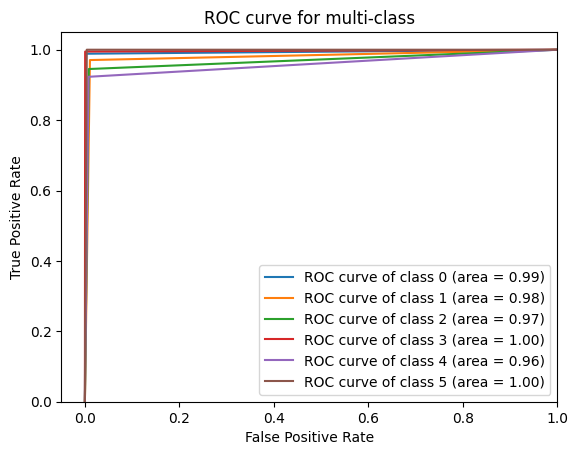

None


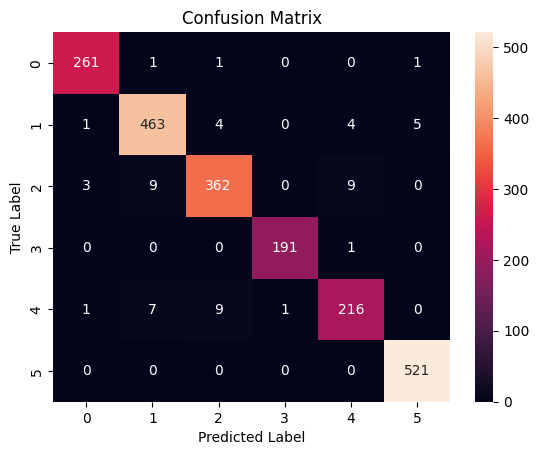

None


In [10]:
# モデルを定義
rfc = RandomForestClassifier()

# 学習
rfc.fit(X_train, Y_train)
# 教師データについてモデルからの予測値を計算
Y_predict = rfc.predict(X_train)

# 精度を確認
print(Accuracy(Y_train,Y_predict))

# ROC曲線を描画
print(ROC_curve(Y_train,Y_predict))

#混合行列を表示
print(Confusion_matrix(Y_train, Y_predict))

Accuracy:  0.37274774774774777
Precision:  0.4149866625804528
Recall:  0.344404156879216
F1-score:  0.3424631613675954
Specificities for each class:  [0.44360902255639095, 0.4858490566037736, 0.23648648648648649, 0.6, 0.4125, 0.3114754098360656]
              precision    recall  f1-score   support

           0       0.44      0.52      0.48       113
           1       0.49      0.50      0.50       204
           2       0.24      0.21      0.22       165
           3       0.60      0.07      0.13        82
           4       0.41      0.33      0.37       100
           5       0.31      0.42      0.36       224

    accuracy                           0.37       888
   macro avg       0.41      0.34      0.34       888
weighted avg       0.39      0.37      0.36       888

None


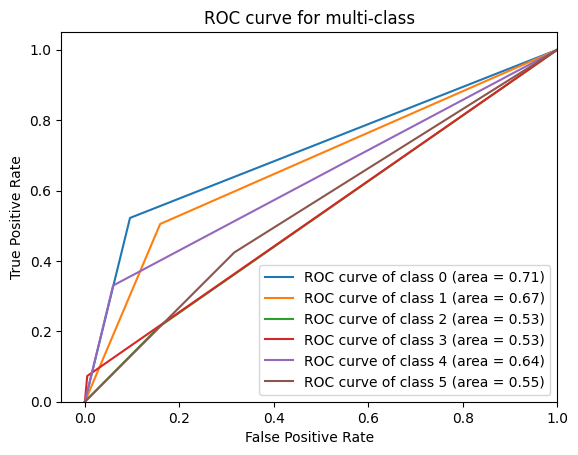

None


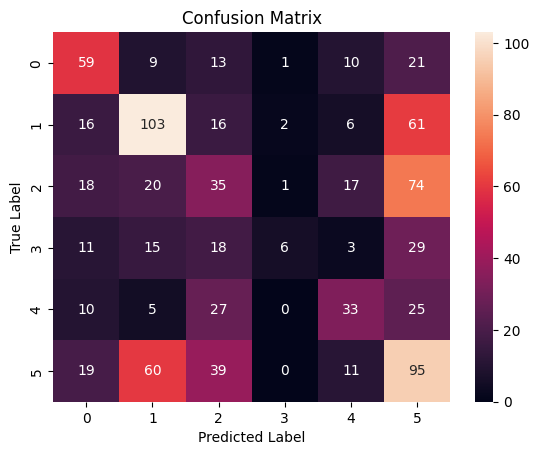

None


In [11]:
# テストデータで精度確認
Y_predict = rfc.predict(X_test)

# 精度を確認
print(Accuracy(Y_test,Y_predict))

# ROC曲線を描画
print(ROC_curve(Y_test,Y_predict))

#混合行列を表示
print(Confusion_matrix(Y_test, Y_predict))

#### Random Forest でグリッドサーチ

In [12]:
# グリッドサーチ
# 探索パラメータの設定
params = {"n_estimators": [10, 100, 300], "max_depth": [5, 10, 50, None]}

# グリッドサーチの作成、実行
gs = GridSearchCV(rfc, param_grid=params, cv=3, scoring="accuracy", verbose=1)
gs.fit(X_train, Y_train)
best_params = gs.best_params_

# 結果の表示
print('best accuracy={:.3f}'.format(gs.best_score_))
print('parameter:', gs.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
best accuracy=0.402
parameter: {'max_depth': None, 'n_estimators': 300}


Accuracy:  0.38738738738738737
Precision:  0.4392968649738383
Recall:  0.3574292284659091
F1-score:  0.35323259296227155
Specificities for each class:  [0.4714285714285714, 0.526829268292683, 0.2125984251968504, 0.6666666666666666, 0.44594594594594594, 0.3123123123123123]
              precision    recall  f1-score   support

           0       0.47      0.58      0.52       113
           1       0.53      0.53      0.53       204
           2       0.21      0.16      0.18       165
           3       0.67      0.07      0.13        82
           4       0.45      0.33      0.38       100
           5       0.31      0.46      0.37       224

    accuracy                           0.39       888
   macro avg       0.44      0.36      0.35       888
weighted avg       0.41      0.39      0.37       888

None


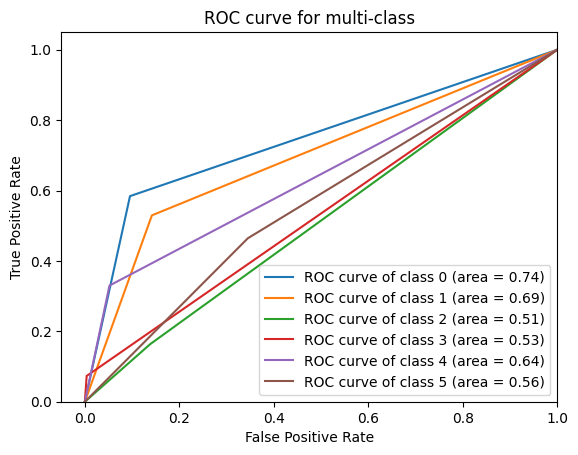

None


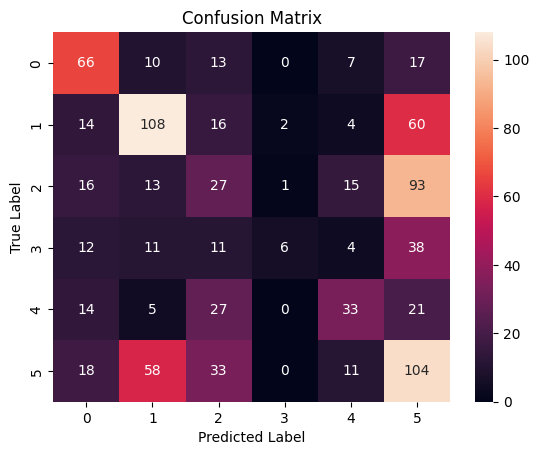

None


In [13]:
# グリッドサーチで求めたパラメータを用いてモデルを再定義
rfc = RandomForestClassifier(**best_params)

rfc.fit(X_train,Y_train)

# テストデータについてモデルからの予測値を計算
Y_predict = rfc.predict(X_test)
print(Accuracy(Y_test,Y_predict))

# ROC曲線を描画
print(ROC_curve(Y_test,Y_predict))

#混合行列を表示
print(Confusion_matrix(Y_test, Y_predict))

#### 3.2 SVM

Accuracy:  0.7687107677450506
Precision:  0.8028318936726887
Recall:  0.7298212671410971
F1-score:  0.7471344951441091
Specificities for each class:  [0.7915194346289752, 0.758364312267658, 0.720626631853786, 0.9886363636363636, 0.8031914893617021, 0.754653130287648]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       264
           1       0.76      0.86      0.80       477
           2       0.72      0.72      0.72       383
           3       0.99      0.45      0.62       192
           4       0.80      0.65      0.72       234
           5       0.75      0.86      0.80       521

    accuracy                           0.77      2071
   macro avg       0.80      0.73      0.75      2071
weighted avg       0.78      0.77      0.76      2071

None


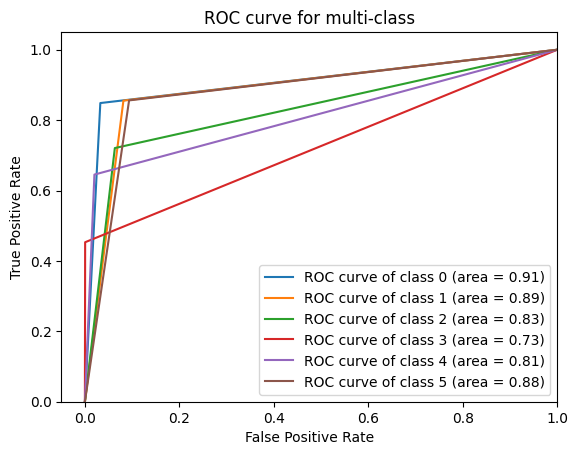

None


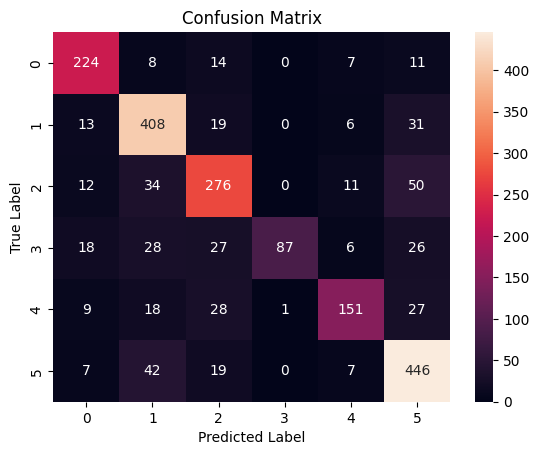

None


In [14]:
# モデルを定義
svc = SVC(probability=True)
# 学習
svc.fit(X_train, Y_train)
# 教師データについてモデルからの予測値を計算
Y_predict = svc.predict(X_train)

# 精度を確認
print(Accuracy(Y_train,Y_predict))

# ROC曲線を描画
print(ROC_curve(Y_train,Y_predict))

#混合行列を表示
print(Confusion_matrix(Y_train, Y_predict))

Accuracy:  0.3614864864864865
Precision:  0.47253477886815265
Recall:  0.3303943653771773
F1-score:  0.3212923322107837
Specificities for each class:  [0.4642857142857143, 0.43673469387755104, 0.23026315789473684, 1.0, 0.4032258064516129, 0.3006993006993007]
              precision    recall  f1-score   support

           0       0.46      0.58      0.51       113
           1       0.44      0.52      0.48       204
           2       0.23      0.21      0.22       165
           3       1.00      0.04      0.07        82
           4       0.40      0.25      0.31       100
           5       0.30      0.38      0.34       224

    accuracy                           0.36       888
   macro avg       0.47      0.33      0.32       888
weighted avg       0.42      0.36      0.34       888

None


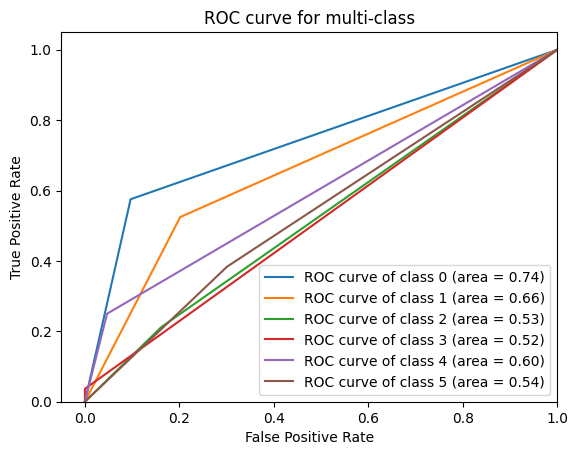

None


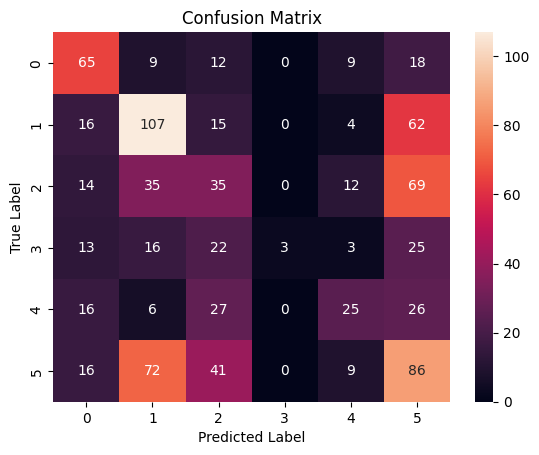

None


In [15]:
# テストデータで精度確認
Y_predict = svc.predict(X_test)

# 精度を確認
print(Accuracy(Y_test,Y_predict))

# ROC曲線を描画
print(ROC_curve(Y_test,Y_predict))

#混合行列を表示
print(Confusion_matrix(Y_test, Y_predict))

#### SVM でグリッドサーチ

##### 実行時間が長すぎたため、以下のコードは途中で打ち切った

In [32]:
# グリッドサーチ
# 探索パラメータの設定
param_range = [0.01, 0.1, 1.0, 10.0]

# グリッドの設定
grid = [{'kernel': ['linear'], 'C': param_range},
        {'kernel': ['rbf'], 'C': param_range, 'gamma': param_range}]

# グリッドサーチの作成、実行
gs = GridSearchCV(svc, param_grid=grid, scoring='accuracy', cv=3, n_jobs=-1)
gs.fit(X_train, Y_train)
best_params = gs.best_params_

# 結果の表示
print('best accuracy={:.3f}'.format(gs.best_score_))
print('parameter:', gs.best_params_)

KeyboardInterrupt: 

In [33]:
# モデルを定義
svc = SVC(probability=True)

# 5分割の交差検証法で学習
scores = cross_val_score(svc, X_train, Y_train, cv=5)
svc.fit(X_train, Y_train)

# Predict the labels of the test data
Y_predict = svc.predict(X_test)

# Evaluate the accuracy of the classifier on the test data
acc = accuracy_score(Y_test, Y_predict)

# 精度を確認
print(Accuracy(Y_test,Y_predict))

KeyboardInterrupt: 

In [ ]:
# グリッドサーチで求めたパラメータを用いてモデルを再定義
svc = SVC(**best_params)

svc.fit(X_train,Y_train)

# テストデータについてモデルからの予測値を計算
Y_predict = rfc.predict(X_test)
print(Accuracy(Y_test,Y_predict))

# ROC曲線を描画
print(ROC_curve(Y_test,Y_predict))

#### 3.3 ナイーブベイズ

Accuracy:  0.35200386286817964
Precision:  0.33515435011136896
Recall:  0.36351871361001437
F1-score:  0.32712693460022774
Specificities for each class:  [0.3859223300970874, 0.43492063492063493, 0.3087248322147651, 0.19287833827893175, 0.28222996515679444, 0.40625]
              precision    recall  f1-score   support

           0       0.39      0.60      0.47       264
           1       0.43      0.57      0.50       477
           2       0.31      0.12      0.17       383
           3       0.19      0.34      0.25       192
           4       0.28      0.35      0.31       234
           5       0.41      0.20      0.27       521

    accuracy                           0.35      2071
   macro avg       0.34      0.36      0.33      2071
weighted avg       0.36      0.35      0.33      2071

None


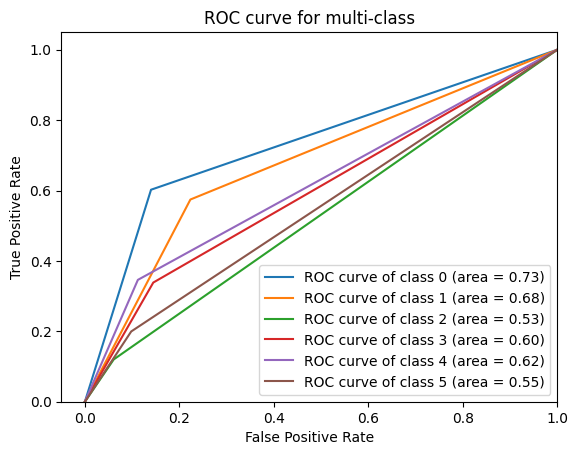

None


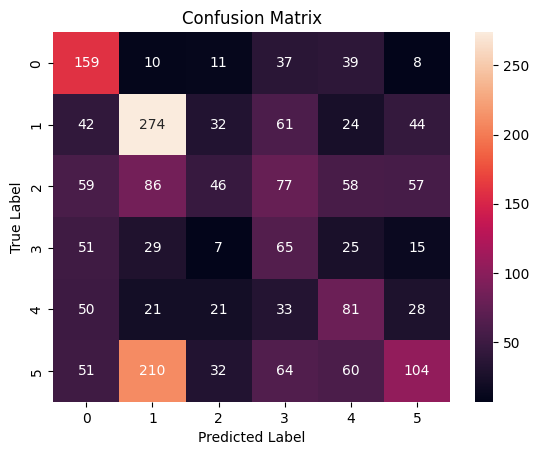

None


In [16]:
# モデルを定義
nb = MultinomialNB()

# 学習
nb.fit(X_train, Y_train)

# 教師データについてモデルからの予測値を計算
Y_predict = nb.predict(X_train)

# 精度を確認
print(Accuracy(Y_train,Y_predict))

# ROC曲線を描画
print(ROC_curve(Y_train,Y_predict))

#混合行列を表示
print(Confusion_matrix(Y_train, Y_predict))

Accuracy:  0.28603603603603606
Precision:  0.2504529242488956
Recall:  0.28601209158159135
F1-score:  0.25195407828928945
Specificities for each class:  [0.34196891191709844, 0.43673469387755104, 0.17857142857142858, 0.13013698630136986, 0.12396694214876033, 0.29133858267716534]
              precision    recall  f1-score   support

           0       0.34      0.58      0.43       113
           1       0.44      0.52      0.48       204
           2       0.18      0.06      0.09       165
           3       0.13      0.23      0.17        82
           4       0.12      0.15      0.14       100
           5       0.29      0.17      0.21       224

    accuracy                           0.29       888
   macro avg       0.25      0.29      0.25       888
weighted avg       0.28      0.29      0.27       888

None


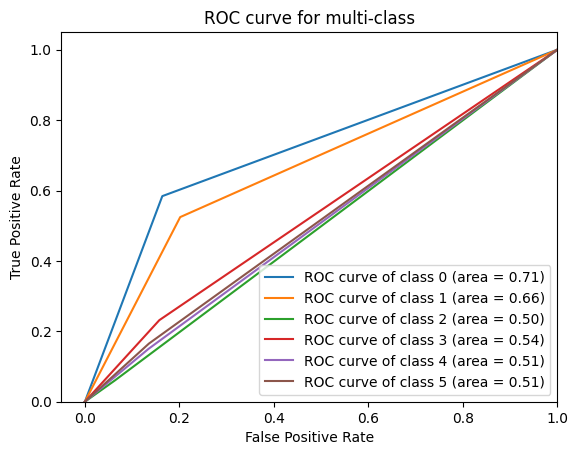

None


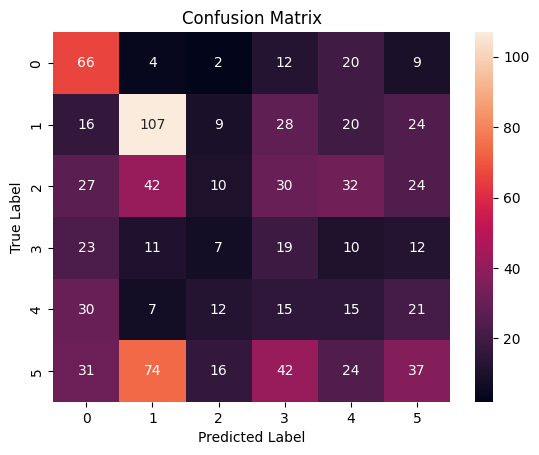

None


In [17]:
# テストデータで精度確認
Y_predict = nb.predict(X_test)

# 精度を確認
print(Accuracy(Y_test,Y_predict))

# ROC曲線を描画
print(ROC_curve(Y_test,Y_predict))

#混合行列を表示
print(Confusion_matrix(Y_test, Y_predict))

#### ナイーブベイズ　でグリッドサーチ

In [18]:
# 探索パラメータの設定
params = {"alpha": [0.01, 0.1, 1.0, 10.0]}

# グリッドサーチの作成、実行
gs = GridSearchCV(nb, param_grid=params, scoring='accuracy', cv=5, verbose=1)
gs.fit(X_train, Y_train)
best_params = gs.best_params_

# 結果の表示
print('best accuracy={:.3f}'.format(gs.best_score_))
print('parameter:', gs.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
best accuracy=0.320
parameter: {'alpha': 10.0}


Accuracy:  0.28716216216216217
Precision:  0.250415725695008
Recall:  0.2852203116528417
F1-score:  0.2513524486474314
Specificities for each class:  [0.3368421052631579, 0.43359375, 0.19607843137254902, 0.1276595744680851, 0.13559322033898305, 0.2727272727272727]
              precision    recall  f1-score   support

           0       0.34      0.57      0.42       113
           1       0.43      0.54      0.48       204
           2       0.20      0.06      0.09       165
           3       0.13      0.22      0.16        82
           4       0.14      0.16      0.15       100
           5       0.27      0.16      0.20       224

    accuracy                           0.29       888
   macro avg       0.25      0.29      0.25       888
weighted avg       0.27      0.29      0.26       888

None


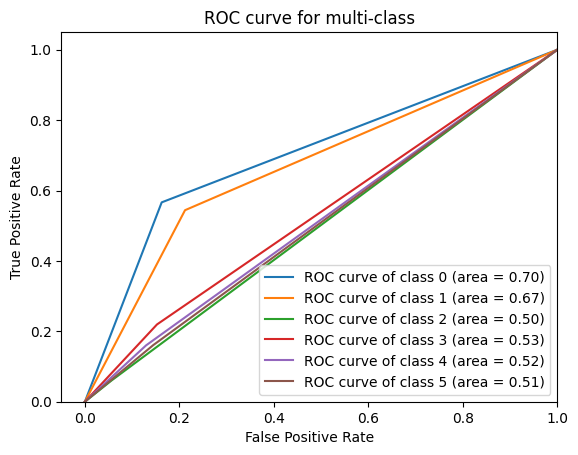

None


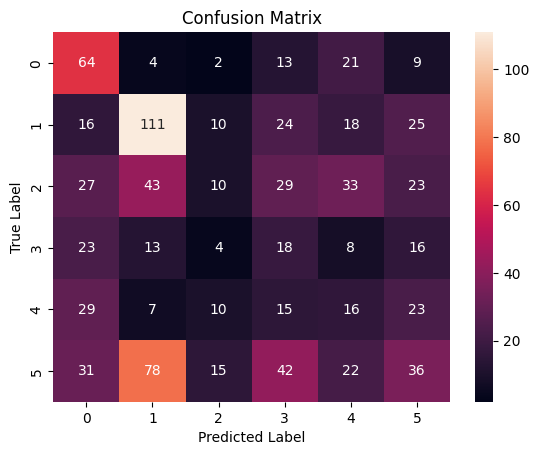

None


In [19]:
# グリッドサーチで求めたパラメータを用いてモデルを再定義
nb = MultinomialNB(**best_params)

# 学習
nb.fit(X_train, Y_train)

# テストデータについてモデルからの予測値を計算
Y_predict = nb.predict(X_test)

# 精度を確認
print(Accuracy(Y_test,Y_predict))

# ROC曲線を描画
print(ROC_curve(Y_test,Y_predict))

#混合行列を表示
print(Confusion_matrix(Y_test, Y_predict))